# Machine Learning Models for IPL Player Performance Prediction and Recommendation

## Introduction

Cricket, especially the Indian Premier League (IPL), is a sport that generates substantial interest and data. This report aims to harness the power of artificial intelligence to enhance player performance analysis and prediction. We have developed three machine learning models: a clustering model for player recommendations, a neural network model to predict if a batsman will score more than 30 runs in an upcoming match, and a neural network model to predict if a bowler will take at least one wicket in an upcoming match. The motivation behind this project is to provide teams and analysts with advanced tools to make data-driven decisions, thereby improving team strategies and player performance.

## Dataset

The datasets used in this project comprise detailed IPL match history from 2008 to 2023, including batting and bowling cards, match summaries, and points tables. These datasets collectively offer a comprehensive view of player performances across different seasons and conditions.
The dataset is available for download from https://www.kaggle.com/datasets/jhalls/ipl-dataset-2008-2022

In [1]:
import pandas as pd

batting_df = pd.read_csv("dataset/all_season_batting_card.csv")
bowling_df = pd.read_csv("dataset/all_season_bowling_card.csv")
summary_df = pd.read_csv("dataset/all_season_summary.csv")

The all_season_batting_card contains batting information like runs, ballsFaced, fours, sixes, strikeRate, runningScore, runningOver etc.
This information is at the batsman level for each match in all the seasons.

In [2]:
pd.set_option('display.max_columns', None)
batting_df.head()

,season,match_id,match_name,home_team,away_team,venue,city,country,current_innings,innings_id,name,fullName,runs,ballsFaced,minutes,fours,sixes,strikeRate,captain,isNotOut,runningScore,runningOver,shortText,commentary,link
0,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,DP Conway,Devon Conway,1.0,6.0,-,0.0,0.0,16.66,False,False,"{'wickets': 1, 'runs': 14}",2.2,b Mohammed Shami,<strong>Shami breaches the defences of Conway<...,NaN
1,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,RD Gaikwad,Ruturaj Gaikwad,92.0,50.0,-,4.0,9.0,184.00,False,False,"{'wickets': 5, 'runs': 151}",17.1,c Shubman Gill b Joseph,"Joseph misses the yorker, but is still a hard-...",NaN
2,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,MM Ali,Moeen Ali,23.0,17.0,-,4.0,1.0,135.29,False,False,"{'wickets': 2, 'runs': 50}",5.5,c &dagger;Saha b Rashid Khan,"<strong>Rashid strikes back, Moeen has nicked ...",NaN
3,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,BA Stokes,Ben Stokes,7.0,6.0,-,1.0,0.0,116.66,False,False,"{'wickets': 3, 'runs': 70}",7.4,c &dagger;Saha b Rashid Khan,<strong>Rashid takes out both Moeen and Stokes...,NaN
4,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,AT Rayudu,Ambati Rayudu,12.0,12.0,-,0.0,1.0,100.00,False,False,"{'wickets': 4, 'runs': 121}",12.5,b Little,Maiden IPL wicket for Josh Little. Rayudu dash...,NaN


The all_season_bowling_card contains batting information like overs, maidens, conceded, wickets, economyRate, dots etc.
This information is at the bowler level for each match in all the seasons.

In [3]:
pd.set_option('display.max_columns', None)
bowling_df.head()

,season,match_id,match_name,home_team,away_team,bowling_team,venue,city,country,innings_id,name,fullName,overs,maidens,conceded,wickets,economyRate,dots,foursConceded,sixesConceded,wides,noballs,captain,href
0,2023.0,1359475,GT v CSK,GT,CSK,GT,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,1,Mohammed Shami,Mohammed Shami,4.0,0,29,2,7.25,13,2,2,0,1,False,https://www.espncricinfo.com/ci/content/player...
1,2023.0,1359475,GT v CSK,GT,CSK,GT,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,1,HH Pandya,Hardik Pandya,3.0,0,28,0,9.33,6,2,2,0,0,True,https://www.espncricinfo.com/ci/content/player...
2,2023.0,1359475,GT v CSK,GT,CSK,GT,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,1,JB Little,Josh Little,4.0,0,41,1,10.25,10,4,3,0,0,False,https://www.espncricinfo.com/ci/content/player...
3,2023.0,1359475,GT v CSK,GT,CSK,GT,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,1,Rashid Khan,Rashid Khan,4.0,0,26,2,6.5,10,2,1,0,0,False,https://www.espncricinfo.com/ci/content/player...
4,2023.0,1359475,GT v CSK,GT,CSK,GT,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,1,AS Joseph,Alzarri Joseph,4.0,0,33,2,8.25,8,0,3,0,0,False,https://www.espncricinfo.com/ci/content/player...


The all_season_summary contains match information for all seasons like home_team, away_team, toss_won, decision, winner etc.

In [4]:
pd.set_option('display.max_columns', None)
summary_df.head()

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,2nd_inning_score,home_score,away_score,winner,result,start_date,end_date,venue_id,venue_name,home_captain,away_captain,pom,points,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,2023.0,1359475,Gujarat Titans v Chennai Super Kings,GT v CSK,"1st Match (N), Indian Premier League at Ahmeda...",GT,CSK,GT,BOWL FIRST,178/7,182/5,182/5,178/7,GT,Titans won by 5 wkts (4b rem),2023-03-31T14:00Z,2023-04-01T23:59Z,57851,"Narendra Modi Stadium, Motera, Ahmedabad",Hardik Pandya,MS Dhoni,Rashid Khan,"Gujarat Titans 2, Chennai Super Kings 0",False,19.2,182.0,5.0,23.0,20.0,178.0,7.0,23.0,"Gill, Rashid lead defending champions Gujarat ...","Shubman Gill,Vijay Shankar","Rashid Khan,Mohammed Shami","Wriddhiman Saha (WK),Shubman Gill (UKN),Sai Su...","Devon Conway (UKN),Ruturaj Gaikwad (UKN),Moeen...","Ruturaj Gaikwad,Moeen Ali","Rajvardhan Hangargekar,Ravindra Jadeja",31 March 2023 - night match (20-over match),Saiyed Khalid,Nitin Menon,Virender Sharma,Javagal Srinath,Abhijit Bengeri
1,2023.0,1359476,Punjab Kings v Kolkata Knight Riders,PBKS v KKR,"2nd Match (D/N), Indian Premier League at Chan...",PBKS,KKR,KKR,BOWL FIRST,191/5,146/7,191/5,146/7,PBKS,Punjab Kings won by 7 runs (DLS),2023-04-01T10:00Z,2023-04-02T23:59Z,57991,"Punjab Cricket Association IS Bindra Stadium, ...",Shikhar Dhawan,Nitish Rana,Arshdeep Singh,"Punjab Kings 2, Kolkata Knight Riders 0",False,20.0,191.0,5.0,26.0,16.0,146.0,7.0,20.0,"Arshdeep, Rajapaksa lead Punjab Kings to victo...","Bhanuka Rajapaksa,Shikhar Dhawan","Arshdeep Singh,Rahul Chahar","Prabhsimran Singh (UKN),Shikhar Dhawan (UKN),B...","Mandeep Singh (AR),Rahmanullah Gurbaz (WK),Anu...","Andre Russell,Venkatesh Iyer","Tim Southee,Varun Chakravarthy",01 April 2023 - day/night match (20-over match),Yeshwant Barde,Bruce Oxenford,Jayaraman Madanagopal,Manu Nayyar,Pranav Joshi
2,2023.0,1359477,Lucknow Super Giants v Delhi Capitals,LSG v DC,"3rd Match (N), Indian Premier League at Luckno...",LSG,DC,DC,BOWL FIRST,193/6,143/9,193/6,143/9,LSG,Super Giants won by 50 runs,2023-04-01T14:00Z,2023-04-02T23:59Z,1070094,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,KL Rahul,David Warner,Mark Wood,"Lucknow Super Giants 2, Delhi Capitals 0",False,20.0,193.0,6.0,21.0,20.0,143.0,9.0,17.0,"Wood five-for, Mayers 73 stud Super Giants' wi...","Kyle Mayers,Nicholas Pooran","Mark Wood,Avesh Khan","KL Rahul (UKN),Kyle Mayers (AR),Deepak Hooda (...","Prithvi Shaw (UKN),David Warner (UKN),Mitchell...","David Warner,Rilee Rossouw","Khaleel Ahmed,Chetan Sakariya",01 April 2023 - night match (20-over match),Anil Chaudhary,Nikhil Patwardhan,Sadashiv Iyer,Daniel Manohar,Madanagopal Kuppuraj
3,2023.0,1359478,Sunrisers Hyderabad v Rajasthan Royals,SRH v RR,"4th Match (D/N), Indian Premier League at Hyde...",SRH,RR,SRH,BOWL FIRST,203/5,131/8,131/8,203/5,RR,Royals won by 72 runs,2023-04-02T10:00Z,2023-04-03T23:59Z,58142,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Bhuvneshwar Kumar,Sanju Samson,Jos Buttler,"Rajasthan Royals 2, Sunrisers Hyderabad 0",False,20.0,131.0,8.0,13.0,20.0,203.0,5.0,29.0,Buttler and Boult trigger demolition of Sunris...,"Abdul Samad,Mayank Agarwal","T Natarajan,Fazalhaq Farooqi","Abhishek Sharma (AR),Mayank Agarwal (UKN),Rahu...","Yashasvi Jaiswal (UKN),Jos Buttler (UKN),Sanju...","Sanju Samson,Yashasvi Jaiswal","Yuzvendra Chahal,Trent Boult",02 April 2023 - day/night match (20-over match),KN Ananthapadmanabhan,Rohan Pandit,Navdeep Singh,Narayanan Kutty,Abhijit Bhattacharya
4,2023.0,1359479,Royal Challengers Bangalore v Mumbai Indians,RCB v MI,"5th Match (N), Indian Premier League at Bengal...",RCB,MI,RCB,BOWL FIRST,171/7,172/2,172/2,171/7,RCB,RCB won by 8 wkts (22b rem),2023-04-02T14:00Z,2023-04-03T23:5

## Data Exploration

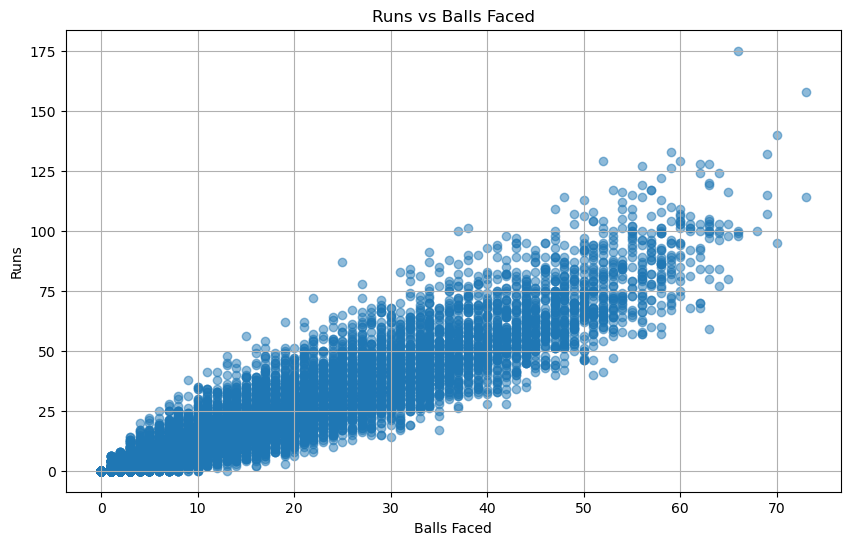

In [5]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(batting_df['ballsFaced'], batting_df['runs'], alpha=0.5)
plt.title('Runs vs Balls Faced')
plt.xlabel('Balls Faced')
plt.ylabel('Runs')
plt.grid(True)
plt.show()

We can see that as the number of balls faced by the batsman increases the runs scored increases. This plot shows a linear relationship between runs scored and balls faced by the bastman.

In [6]:
# Group by season and batsman, and calculate the sum of fours and sixes
batsman_stats = batting_df.groupby(['fullName']).agg({'fours': 'sum', 'sixes': 'sum'}).reset_index()

# Sort and get the top 10 batsmen with most fours
top_10_batsmen_fours = batsman_stats.sort_values(by='fours', ascending=False).head(10)

# Sort and get the top 10 batsmen with most sixes
top_10_batsmen_sixes = batsman_stats.sort_values(by='sixes', ascending=False).head(10)

# Display the results
print("Top 10 Batsmen with Most Fours Across All Seasons")
print(top_10_batsmen_fours[['fullName', 'fours']])

print("\nTop 10 Batsmen with Most Sixes Across All Seasons")
print(top_10_batsmen_sixes[['fullName', 'sixes']])

Top 10 Batsmen with Most Fours Across All Seasons
           fullName  fours
524  Shikhar Dhawan  750.0
151    David Warner  646.0
617     Virat Kohli  643.0
473    Rohit Sharma  554.0
565    Suresh Raina  506.0
193  Gautam Gambhir  492.0
469   Robin Uthappa  481.0
27   Ajinkya Rahane  455.0
169  Dinesh Karthik  439.0
0    AB de Villiers  413.0

Top 10 Batsmen with Most Sixes Across All Seasons
           fullName  sixes
125     Chris Gayle  357.0
473    Rohit Sharma  257.0
0    AB de Villiers  251.0
314        MS Dhoni  239.0
617     Virat Kohli  234.0
151    David Warner  226.0
286  Kieron Pollard  223.0
565    Suresh Raina  203.0
48    Andre Russell  193.0
515    Shane Watson  190.0


Top consistent batters like Virat Kohli, Suresh Raina, Rohit Sharma and AB de Villiers can be seen to be top in both batsmen with the most fours and sixes overall. These players have demonstrated their ability to consistently score boundaries, which is a key indicator of their batting prowess and ability to dominate the opposition bowling attacks.


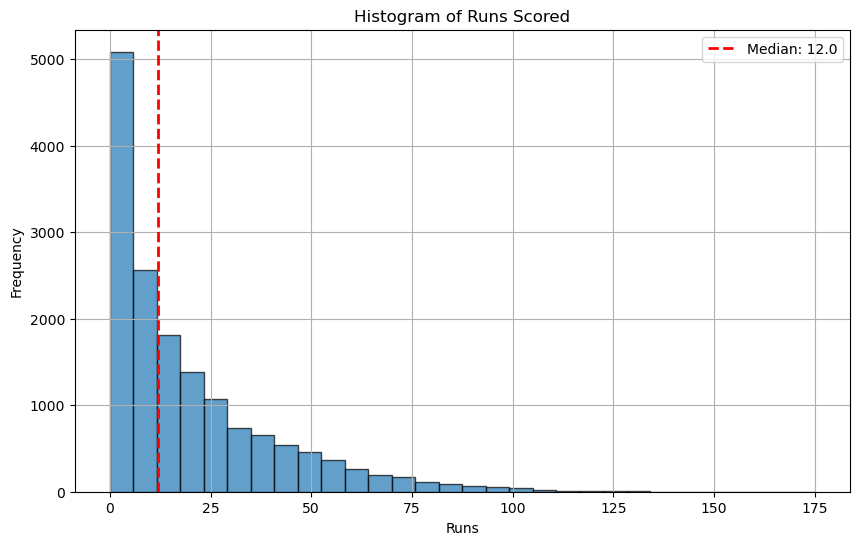

In [7]:
# Calculate the median of runs
median_runs = batting_df['runs'].median()

# Create a histogram of runs scored
plt.figure(figsize=(10, 6))
plt.hist(batting_df['runs'], bins=30, edgecolor='k', alpha=0.7)
plt.axvline(median_runs, color='r', linestyle='dashed', linewidth=2, label=f'Median: {median_runs}')
plt.title('Histogram of Runs Scored')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

From the above plot we can see that majority of the batsman score less than 20 runs in an inngings.
The median of runs scored by individual batsman in an innings is 12 runs.

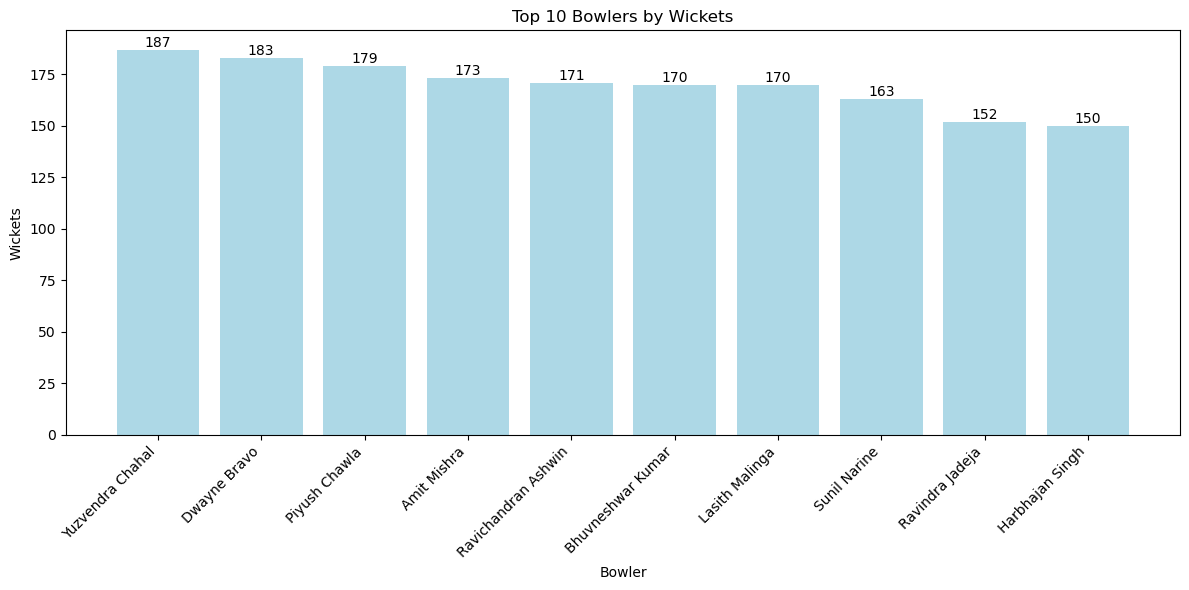

In [8]:
# Group by bowler and calculate the sum of wickets and the mean economy rate
bowler_stats = bowling_df[bowling_df['economyRate'] != '-'].groupby('fullName').agg({'wickets': 'sum'}).reset_index()

# Sort and get the top bowlers by wickets
top_bowlers_wickets = bowler_stats.sort_values(by='wickets', ascending=False).head(10)

# Plotting top bowlers by wickets
plt.figure(figsize=(12, 6))
bars = plt.bar(top_bowlers_wickets['fullName'], top_bowlers_wickets['wickets'], color='lightblue')
plt.title('Top 10 Bowlers by Wickets')
plt.xlabel('Bowler')
plt.ylabel('Wickets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

We can observe that most of the highest wicket takers in the top 10 list are spinners showing the impact they have in IPL.


Each bowler has picked more than 150 wickets to be in the top 10 list.

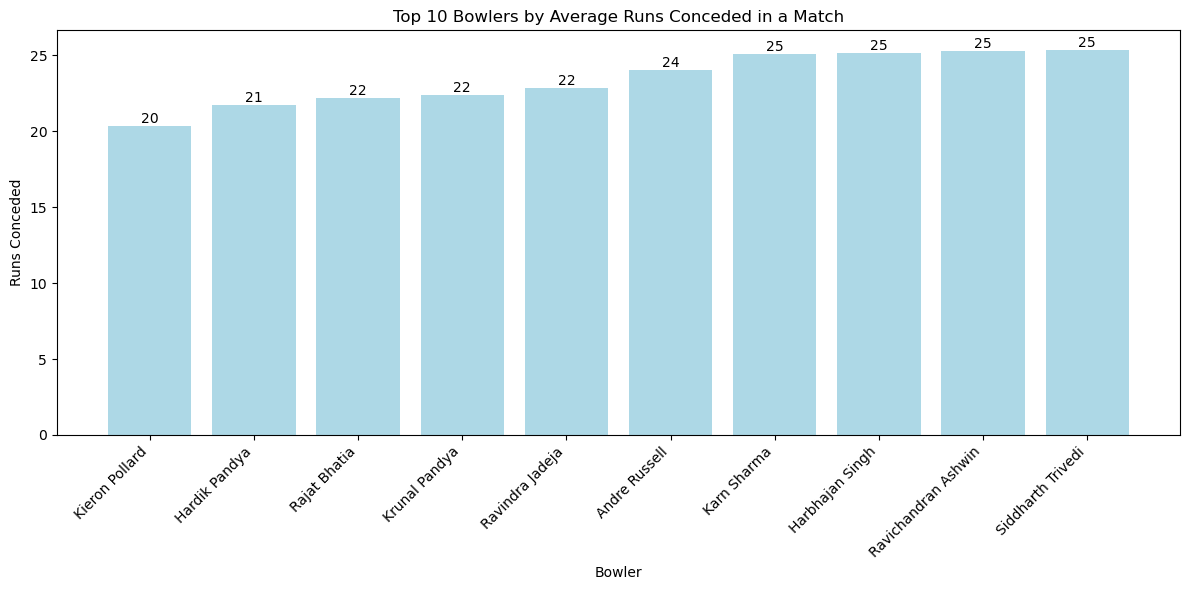

In [55]:
# Group by bowler and calculate the sum of wickets and the mean economy rate
# bowler_stats = bowling_df[bowling_df['wickets'] > 50]
bowler_stats = bowling_df[bowling_df['economyRate'] != '-'].groupby('fullName').agg({'conceded': 'mean','wickets':'sum'}).reset_index()

bowler_stats = bowler_stats[bowler_stats['wickets'] > 50]
# Sort and get the top bowlers by wickets
top_bowlers_wickets = bowler_stats.sort_values(by='conceded', ascending=True).head(10)

# Plotting top bowlers by wickets
plt.figure(figsize=(12, 6))
bars = plt.bar(top_bowlers_wickets['fullName'], top_bowlers_wickets['conceded'], color='lightblue')
plt.title('Top 10 Bowlers by Average Runs Conceded in a Match')
plt.xlabel('Bowler')
plt.ylabel('Runs Conceded')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

Even in the Top 10 Bowlers with least average runs conceded in a match majority of the bowlers are Spinners.

This shows that in the Indian Subcontinent playing conditions, Spinners play a big role in the match outcomes.

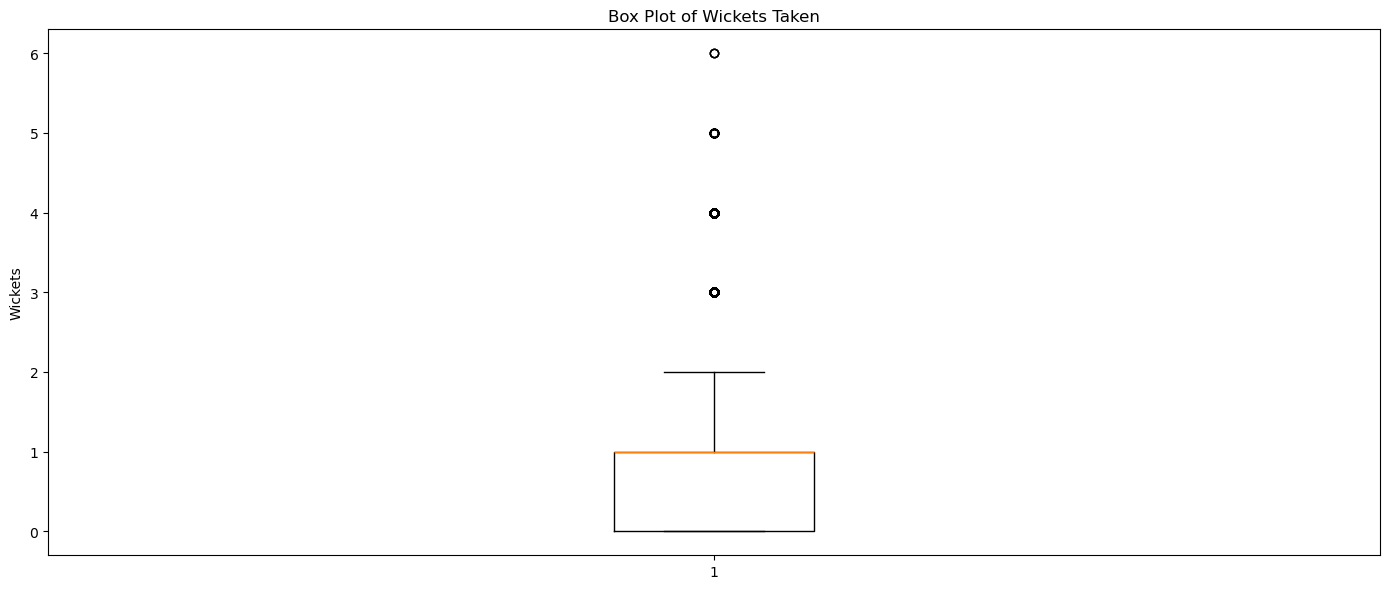

In [11]:
# Create a figure with two subplots (one for wickets and one for economy rate)
fig, axes = plt.subplots(nrows=1, figsize=(14, 6))

# Box plot for wickets taken
axes.boxplot(bowling_df['wickets'])
axes.set_title('Box Plot of Wickets Taken')
axes.set_ylabel('Wickets')

plt.tight_layout()
plt.show()

The box plot above shows the distribution of the wickets taken by bowlers in each match.

Most of the bowlers get between 0 to 2 wickets in a match.

There are few bowlers that do get more than 3 wickets in a match.

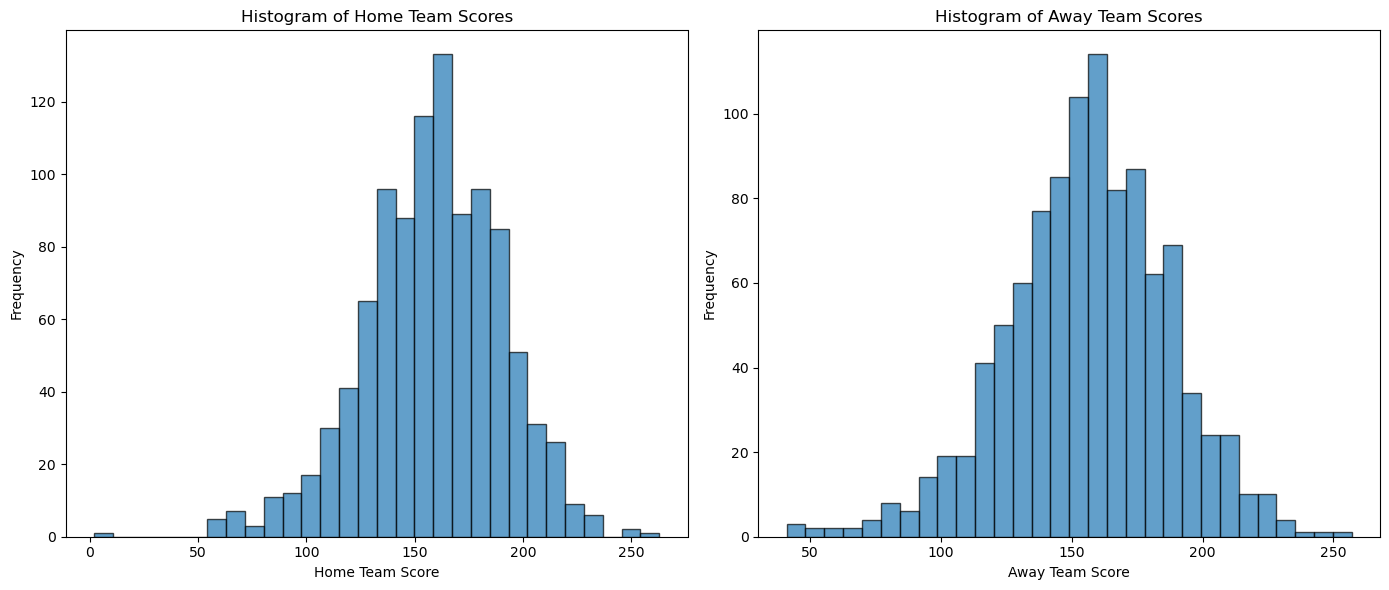

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Box plot for 1st inning scores
axes[0].hist(summary_df['home_runs'].dropna(), bins=30, edgecolor='black', alpha=0.7)
axes[0].set_title('Histogram of Home Team Scores')
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('Home Team Score')

# Box plot for 1st inning scores
axes[1].hist(summary_df['away_runs'].dropna(), bins=30, edgecolor='black', alpha=0.7)
axes[1].set_title('Histogram of Away Team Scores')
axes[1].set_ylabel('Frequency')
axes[1].set_xlabel('Away Team Score')

plt.tight_layout()
plt.show()


The above histogram shows the distribution of the team scores of home and away teams.

The distribution looks like a normal distribution and is quite similar for both the teams.

The average runs scored is around 150 runs for both teams.



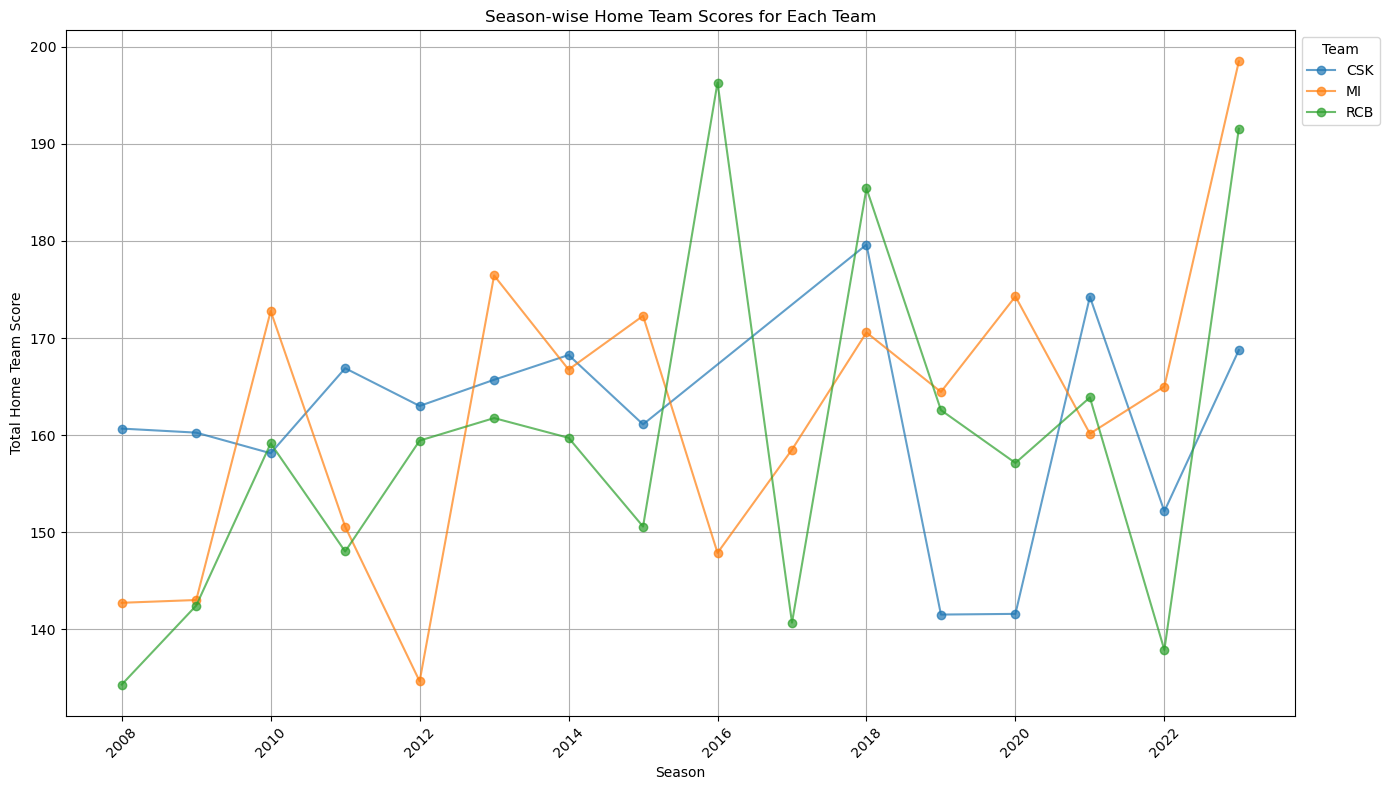

In [13]:
# Group by season and home team, then calculate the sum of home_score
season_team_scores = summary_df[summary_df['home_team'].isin(['CSK','RCB','MI'])].groupby(['season', 'home_team'])['home_runs'].mean().reset_index()

# Plotting the data
plt.figure(figsize=(14, 8))

# Iterate over unique teams to create lines for each team
for i, team in enumerate(season_team_scores['home_team'].unique()):
    team_data = season_team_scores[season_team_scores['home_team'] == team]
    plt.plot(team_data['season'], team_data['home_runs'], marker='o', label=team, alpha=0.7)

plt.xlabel('Season')
plt.ylabel('Total Home Team Score')
plt.title('Season-wise Home Team Scores for Each Team')
plt.xticks(rotation=45)
plt.legend(title='Team', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

The line chart shows the trend for average runs scored in a season in home matches of 3 Teams - CSK, MI and RCB.

We can see that MI have slightly improved their average runs scored in their home ground from 2008 to 2023.

The performance of RCB team at home looks very random, which shows lack of consistency by the team in Home matches.

CSK has followed a almost consistent trend of 160-170 runs in their home mathces.

## Player Recommendation Using K-Means

In each season of the IPL, a lot of players go through the auction process.

It becomes extremely important to replace the player that has left the Club with a player of similar style so that the team can continue working in the same way.

We will be using K-Means Clustering to create an Inital section of players and then for each of the Clusters we will further divide them into different clusters.


In [14]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Aggregating player batting statistics
player_batting = batting_df.groupby(['name']).agg(
    total_runs=('runs', 'sum'),
    total_balls=('ballsFaced', 'sum'),
    total_fours=('fours', 'sum'),
    total_sixes=('sixes', 'sum'),
    matches=('match_id', 'nunique')
).reset_index()

player_batting['average_runs'] = player_batting['total_runs'] / player_batting['matches']
player_batting['average_balls'] = player_batting['total_balls'] / player_batting['matches']
player_batting['strike_rate'] = (player_batting['total_runs'] / player_batting['total_balls']) * 100

# Aggregating player bowling statistics
player_bowling = bowling_df.groupby(['name']).agg(
    total_overs=('overs', 'sum'),
    total_runs_conceded=('conceded', 'sum'),
    total_wickets=('wickets', 'sum'),
    matches=('match_id', 'nunique')
).reset_index()

player_bowling['average_overs'] = player_bowling['total_overs'] / player_bowling['matches']
player_bowling['average_runs_conceded'] = player_bowling['total_runs_conceded'] / player_bowling['matches']
player_bowling['average_wickets'] = player_bowling['total_wickets'] / player_bowling['matches']
player_bowling['economy_rate'] = player_bowling['total_runs_conceded'] / player_bowling['total_overs']

# Merging batting and bowling data
player_performance = pd.merge(player_batting, player_bowling, on='name', how='outer').fillna(0)




We have created new metrics average_runs, average_balls, strike_rate during batting on match and batsman level.

We have also created bowling metrics of average_overs, average_runs_conceded, average_wickets and economy_rate to capture the statistics of each bowler in the match.

These features will help us in creating the cluster of players with similar features.

The final features that we will be using for clustering are **average_runs, strike_rate, average_overs, average_runs_conceded, average_wickets, economy_rate**

In [15]:
# Selecting features for clustering
features = [
    'average_runs', 'strike_rate', 'average_overs', 
    'average_runs_conceded', 'average_wickets', 'economy_rate'
]
X = player_performance[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

We will be using **Silhouette Coefficient** to find the optimal number of clusters of each of the initial clusters as well as the sub-clusters.

The Silhouette Coefficient scores the clustering pattern highly if groups are compact and well-separated.

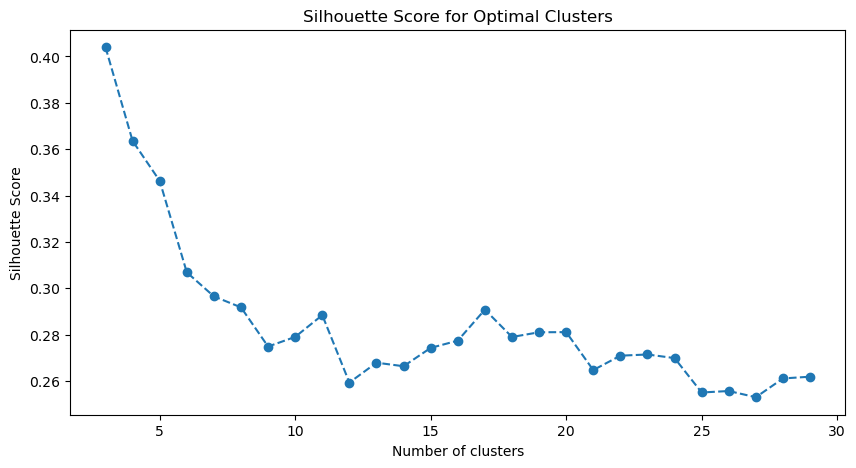

In [16]:
# Determine the optimal number of clusters using silhouette score
silhouette_scores = []
for i in range(3, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range(3, 30), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()



***The Silhouette Score keeps on decreasing from cluster number 3 which indicates that the number of clusters should be kept as 3 for the given dataset.***

In [17]:
# From the silhouette scores, choose the optimal number of clusters
optimal_clusters = np.argmax(silhouette_scores) + 3  # +3 because range starts from 3
print(f'Optimal number of clusters based on silhouette score: {optimal_clusters}')

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
player_performance['cluster'] = kmeans.fit_predict(X_scaled)

Optimal number of clusters based on silhouette score: 3


Based on initial domain knowledge, we will try to visualize these clusters using 3 of the provided input columns.

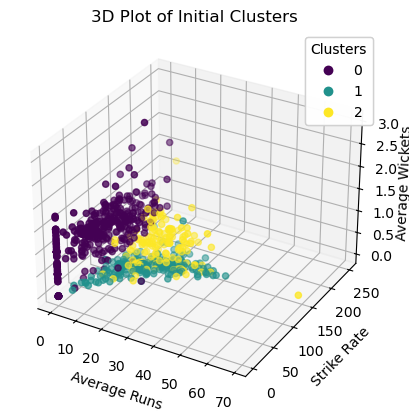

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to create a 3D plot for clusters
def plot_3d_clusters(data, labels, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    scatter = ax.scatter(
        data['average_runs'], data['strike_rate'], data['average_wickets'],
        c=labels, cmap='viridis', marker='o'
    )
    
    ax.set_xlabel('Average Runs')
    ax.set_ylabel('Strike Rate')
    ax.set_zlabel('Average Wickets',labelpad = -1)
    ax.set_title(title)
    
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)
    # ax.view_init(azim=200)
    plt.show()

# 3D Plot for Initial Clusters
plot_3d_clusters(player_performance, player_performance['cluster'], '3D Plot of Initial Clusters')

We can clearly see that from the 3 clusters:
- 1st cluster of players have low batting score and high number of wickets taken
- 2nd cluster of players have high batting score and strike rate and close to 0 number of wickets taken
- 3rd cluster of players have medium to high average runs score as well as good amount of wickets taken

Now we will create sub clusters for each of these clusters since there are different types of batsmen, bowlers and all rounders.

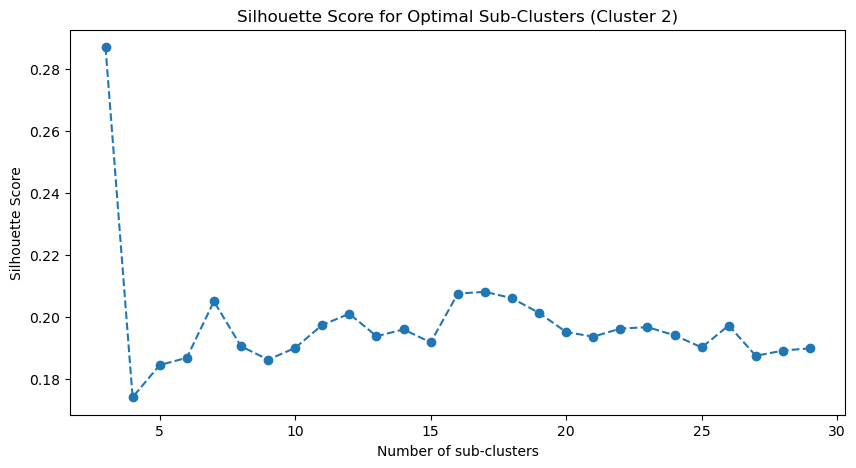

Optimal number of sub-clusters for Cluster 2: 3


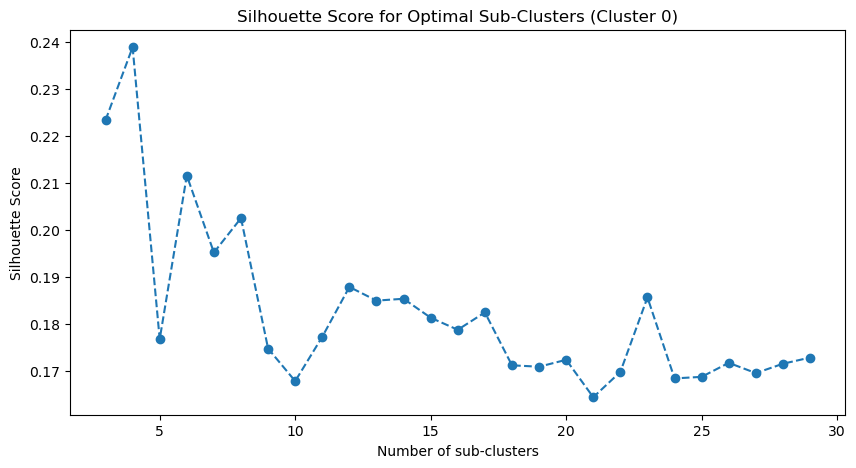

Optimal number of sub-clusters for Cluster 0: 4


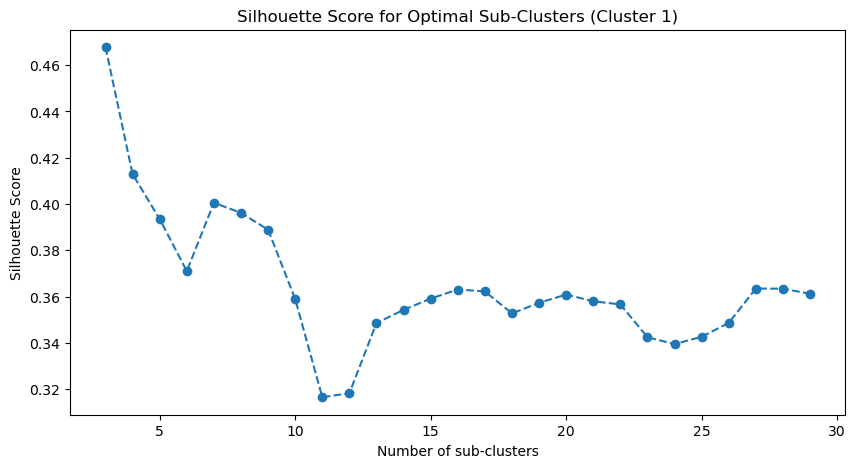

Optimal number of sub-clusters for Cluster 1: 3


In [19]:
# Function to perform sub-clustering within each initial cluster
def perform_sub_clustering(data, cluster_label):
    silhouette_scores = []
    for i in range(3, 30):
        sub_kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        sub_cluster_labels = sub_kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, sub_cluster_labels)
        silhouette_scores.append(silhouette_avg)
    
    # Plot silhouette scores for sub-clusters
    plt.figure(figsize=(10, 5))
    plt.plot(range(3, 30), silhouette_scores, marker='o', linestyle='--')
    plt.title(f'Silhouette Score for Optimal Sub-Clusters (Cluster {cluster_label})')
    plt.xlabel('Number of sub-clusters')
    plt.ylabel('Silhouette Score')
    plt.show()
    
    # Choose the optimal number of sub-clusters based on silhouette score
    optimal_sub_clusters = np.argmax(silhouette_scores) + 3  # +2 because range starts from 2
    print(f'Optimal number of sub-clusters for Cluster {cluster_label}: {optimal_sub_clusters}')
    
    # Perform K-means clustering with the optimal number of sub-clusters
    sub_kmeans = KMeans(n_clusters=optimal_sub_clusters, init='k-means++', random_state=42)
    sub_cluster_labels = sub_kmeans.fit_predict(data)
    
    return sub_cluster_labels

# Iterate over each initial cluster label
for cluster_label in player_performance['cluster'].unique():
    cluster_data = player_performance[player_performance['cluster'] == cluster_label][features]
    
    # Standardize the data
    scaler = StandardScaler()
    cluster_data_scaled = scaler.fit_transform(cluster_data)
    
    # Perform sub-clustering
    sub_cluster_labels = perform_sub_clustering(cluster_data_scaled, cluster_label)
    
    # Assign sub-cluster labels back to player_performance DataFrame
    player_performance.loc[player_performance['cluster'] == cluster_label, 'sub_cluster'] = sub_cluster_labels

Once these clusters are created, we will now use this cluster and subclusters to recommend players.

In [20]:
from sklearn.metrics.pairwise import euclidean_distances

# Assuming player_performance DataFrame is already created and contains 'cluster' and 'sub_cluster' columns.

def get_player_features(player_name, player_df):
    """
    Retrieve the features of the given player from the player dataframe.
    """
    player_data = player_df[player_df['name'] == player_name]
    if player_data.empty:
        return None
    return player_data.iloc[0][['average_runs','average_balls', 'strike_rate','average_overs' ,'average_wickets','economy_rate']]

def recommend_players(player_name, player_df, n_recommendations=5):
    """
    Recommend similar players based on the cluster and sub-cluster.
    """
    player_features = get_player_features(player_name, player_df)
    
    if player_features is None:
        return f"Player {player_name} not found in the dataset."
    
    player_cluster = player_df[player_df['name'] == player_name]['cluster'].values[0]
    player_sub_cluster = player_df[player_df['name'] == player_name]['sub_cluster'].values[0]
    
    # Filter players in the same cluster and sub-cluster
    similar_players = player_df[(player_df['cluster'] == player_cluster) & 
                                (player_df['sub_cluster'] == player_sub_cluster) & 
                                (player_df['name'] != player_name)]
    
    if similar_players.empty:
        return f"No similar players found in the same sub-cluster as {player_name}."
    
    # Calculate the Euclidean distances
    similar_players_features = similar_players[['average_runs','average_balls', 'strike_rate','average_overs', 'average_wickets','economy_rate']]
    distances = euclidean_distances([player_features], similar_players_features)
    
    # Get the indices of the closest players
    closest_indices = np.argsort(distances[0])[:n_recommendations]
    closest_players = similar_players.iloc[closest_indices]
    
    return closest_players[['name', 'average_runs','average_balls', 'strike_rate','average_overs','average_wickets','economy_rate']]

# Example usage
player_name = "F du Plessis"  # Replace with a player name from your dataset
recommended_players = recommend_players(player_name, player_performance, n_recommendations=5)
recommended_players


,name,average_runs,average_balls,strike_rate,average_overs,average_wickets,economy_rate
652,V Kohli,31.716157,24.393013,130.021482,1.580769,0.153846,8.953771
533,S Dhawan,30.634259,24.087963,127.176629,1.333333,0.666667,8.250000
660,VR Iyer,26.555556,20.388889,130.245232,1.537500,0.375000,9.349593
310,KS Williamson,28.013333,22.226667,126.034793,1.500000,0.000000,10.333333
567,SK Raina,27.640000,20.215000,136.730151,2.173913,0.362319,7.453333


In [21]:
# Example usage for bowler
player_name = "Mohammed Shami"  # Replace with a player name from your dataset
recommended_players = recommend_players(player_name, player_performance, n_recommendations=5)
recommended_players


,name,average_runs,average_balls,strike_rate,average_overs,average_wickets,economy_rate
380,MM Patel,2.600000,2.733333,95.121951,3.573016,1.174603,7.543314
555,SB Jakati,3.500000,3.625000,96.551724,3.166667,0.824561,8.038781
113,Basil Thampi,4.000000,4.375000,91.428571,3.444000,0.880000,9.825784
609,Shivam Mavi,4.250000,4.666667,91.071429,3.378125,0.937500,8.714154
228,I Sharma,2.153846,2.384615,90.322581,3.535644,0.811881,8.140577


Using this above recommendation system will be helpful to team owners for selecting their playergroup during the auctions before the start of the IPL Season.

Once the season starts, selecting the playing 11 plays a vital role in winning a match.

Few players perform better against certain team and few players prefer few grounds for scoring runs or picking up wickets.

Given past history, the ground the match is being played on and recent performances we can predict how the players will perform in the upcoming match. This will help the team selectors in picking the team.

We can help the teams by creating models for predicting whether a given batsman will score more than 30 runs in an upcoming match or a given bowler will take atleast 1 wicket in the next match.

To achieve these models, we will use Artificial Neural Networks, since there are a lot of variables which have inter connections and Neural Networks will be able to learn these patterns better.

## Neural Network Model for Batsman Perfomance Prediction

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import json

In [23]:
summary_df = summary_df.rename(columns={'id': 'match_id'})

In [24]:
batting_df['scored_more_than_30'] = (batting_df['runs'] > 30).astype(int)

We need to create new metrics which will help us in predicting whether the bastman will score more than 30 runs in the upcoming match.

These metrics are created using the recent matches playerd by the batsman and the form of the opponent team bowlers.

In [25]:
# Aggregating player batting statistics
player_batting = batting_df.groupby(['name', 'season']).agg(
    total_runs=('runs', 'sum'),
    total_balls=('ballsFaced', 'sum'),
    total_fours=('fours', 'sum'),
    total_sixes=('sixes', 'sum'),
    matches=('match_id', 'nunique')
).reset_index()

player_batting['average_runs'] = player_batting['total_runs'] / player_batting['matches']
player_batting['average_balls'] = player_batting['total_balls'] / player_batting['matches']
player_batting['average_strike_rate'] = (player_batting['total_runs'] / player_batting['total_balls']) * 100

# Adding recent form (last 5 matches)
recent_form = batting_df.groupby(['name', 'match_id']).agg(
    runs=('runs', 'sum')
).reset_index().sort_values(by=['name', 'match_id'])

recent_form['recent_avg_runs'] = recent_form.groupby('name')['runs'].rolling(5, min_periods=1).mean().reset_index(level=0, drop=True)

# Merge aggregated data with recent form
batting_df = batting_df.merge(player_batting[['name', 'season', 'average_runs', 'average_balls', 'average_strike_rate']], on=['name', 'season'])
batting_df = batting_df.merge(recent_form[['name', 'match_id', 'recent_avg_runs']], on=['name', 'match_id'])

batting_df = batting_df[batting_df['ballsFaced'] != 0]
batting_df = batting_df.dropna(subset=['runs'])
batting_df = batting_df.dropna(subset=['runningOver'])



def parse_running_score_wicket(x):
    try:
        return json.loads(x.replace("'", "\""))['wickets']  # Replace single quotes with double quotes
    except (json.JSONDecodeError, TypeError):
        return None

def parse_running_score_runs(x):
    try:
        return json.loads(x.replace("'", "\""))['runs']  # Replace single quotes with double quotes
    except (json.JSONDecodeError, TypeError):
        return None


batting_df['currentRunsScored'] = batting_df['runningScore'].apply(parse_running_score_runs)
batting_df['currentWicketsFallen'] = batting_df['runningScore'].apply(parse_running_score_wicket)


In [26]:
# Merge columns from summary_df into batting_df
batting_df = batting_df.merge(summary_df[['match_id', 'season', 'toss_won', 'decision', 'home_overs', 'home_runs', 'home_wickets','away_overs','away_runs',
                                          'away_wickets', 'winner']], on=['match_id', 'season'])


In [27]:
# Adding recent form (last 5 matches)
bowling_data = bowling_df[['season', 'match_id', 'bowling_team', 'overs', 'conceded', 'wickets']]

recent_form_bowling = bowling_data.groupby(['match_id','bowling_team']).agg(
    overs=('overs', 'sum'),
    conceded=('conceded', 'sum'),
    wickets=('wickets', 'sum')
).reset_index().sort_values(by=['bowling_team', 'match_id'])

recent_form_bowling['avg_overs_last_3'] = recent_form_bowling.groupby(['bowling_team'])['overs'].rolling(3, min_periods=1).mean().reset_index(level=0, drop=True)
recent_form_bowling['avg_conceded_last_3'] = recent_form_bowling.groupby(['bowling_team'])['conceded'].rolling(3, min_periods=1).mean().reset_index(level=0, drop=True)
recent_form_bowling['avg_wickets_last_3'] = recent_form_bowling.groupby(['bowling_team'])['wickets'].rolling(3, min_periods=1).mean().reset_index(level=0, drop=True)

In [28]:
batting_df = batting_df.merge(recent_form_bowling[['match_id','bowling_team', 'avg_overs_last_3','avg_conceded_last_3','avg_wickets_last_3']], left_on=['match_id','away_team'],right_on=['match_id','bowling_team'], suffixes=('', '_away'))
batting_df.drop(['bowling_team'],axis=1,inplace=True)
batting_df = batting_df.rename(columns={'avg_overs_last_3': 'avg_overs_last_3_away','avg_conceded_last_3':'avg_conceded_last_3_away','avg_wickets_last_3':'avg_wickets_last_3_away'})

In [29]:
batting_df = batting_df.merge(recent_form_bowling[['match_id','bowling_team', 'avg_overs_last_3','avg_conceded_last_3','avg_wickets_last_3']], left_on=['match_id','home_team'],right_on=['match_id','bowling_team'], suffixes=('', '_home'))
batting_df.drop(['bowling_team'],axis=1,inplace=True)
batting_df = batting_df.rename(columns={'avg_overs_last_3': 'avg_overs_last_3_home','avg_conceded_last_3':'avg_conceded_last_3_home','avg_wickets_last_3':'avg_wickets_last_3_home'})

In [30]:
batting_df['captain'] = batting_df['captain'].replace({True: 1, False: 0})

In [31]:
pd.set_option('display.max_columns', None)
batting_df.head()

,season,match_id,match_name,home_team,away_team,venue,city,country,current_innings,innings_id,name,fullName,runs,ballsFaced,minutes,fours,sixes,strikeRate,captain,isNotOut,runningScore,runningOver,shortText,commentary,link,scored_more_than_30,average_runs,average_balls,average_strike_rate,recent_avg_runs,currentRunsScored,currentWicketsFallen,toss_won,decision,home_overs,home_runs,home_wickets,away_overs,away_runs,away_wickets,winner,avg_overs_last_3_away,avg_conceded_last_3_away,avg_wickets_last_3_away,avg_overs_last_3_home,avg_conceded_last_3_home,avg_wickets_last_3_home
0,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,DP Conway,Devon Conway,1.0,6.0,-,0.0,0.0,16.66,0,False,"{'wickets': 1, 'runs': 14}",2.2,b Mohammed Shami,<strong>Shami breaches the defences of Conway<...,NaN,0,44.800000,32.066667,139.708940,21.8,14,1,GT,BOWL FIRST,19.2,182.0,5.0,20.0,178.0,7.0,GT,19.233333,150.0,4.333333,20.0,162.333333,6.333333
1,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,RD Gaikwad,Ruturaj Gaikwad,92.0,50.0,-,4.0,9.0,184.00,0,False,"{'wickets': 5, 'runs': 151}",17.1,c Shubman Gill b Joseph,"Joseph misses the yorker, but is still a hard-...",NaN,1,39.333333,26.666667,147.500000,39.0,151,5,GT,BOWL FIRST,19.2,182.0,5.0,20.0,178.0,7.0,GT,19.233333,150.0,4.333333,20.0,162.333333,6.333333
2,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,MM Ali,Moeen Ali,23.0,17.0,-,4.0,1.0,135.29,0,False,"{'wickets': 2, 'runs': 50}",5.5,c &dagger;Saha b Rashid Khan,"<strong>Rashid strikes back, Moeen has nicked ...",NaN,0,12.400000,9.100000,136.263736,29.2,50,2,GT,BOWL FIRST,19.2,182.0,5.0,20.0,178.0,7.0,GT,19.233333,150.0,4.333333,20.0,162.333333,6.333333
3,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,BA Stokes,Ben Stokes,7.0,6.0,-,1.0,0.0,116.66,0,False,"{'wickets': 3, 'runs': 70}",7.4,c &dagger;Saha b Rashid Khan,<strong>Rashid takes out both Moeen and Stokes...,NaN,0,7.500000,7.000000,107.142857,41.0,70,3,GT,BOWL FIRST,19.2,182.0,5.0,20.0,178.0,7.0,GT,19.233333,150.0,4.333333,20.0,162.333333,6.333333
4,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,AT Rayudu,Ambati Rayudu,12.0,12.0,-,0.0,1.0,100.00,0,False,"{'wickets': 4, 'runs': 121}",12.5,b Little,Maiden IPL wicket for Josh Little. Rayudu dash...,NaN,0,13.166667,9.416667,139.823009,8.0,121,4,GT,BOWL FIRST,19.2,182.0,5.0,20.0,178.0,7.0,GT,19.233333,150.0,4.333333,20.0,162.333333,6.333333


In [32]:
# Final features for the model
features = ['home_team','away_team','venue','current_innings','innings_id','fullName','captain',
            'average_runs', 'average_balls', 'average_strike_rate', 'recent_avg_runs',
            'currentRunsScored','currentWicketsFallen','toss_won','decision',
            'avg_overs_last_3_away', 'avg_conceded_last_3_away', 'avg_wickets_last_3_away',
            'avg_overs_last_3_home', 'avg_conceded_last_3_home', 'avg_wickets_last_3_home'
           ]

X = batting_df[features]
y = batting_df['scored_more_than_30']

Both Numerical and Cateogrical Column in combination holds a lot of dependencies in the data, which can be useful for predicting our target variable.

The only problem arises that the machine learning models can handle only numerical values, so we convert our categorical columns into numerical value columns using One Hot Encoding.

Also the numerical values like innings_id,  average_runs, average_balls, average_strike_rate, currentRunsScored, currentWicketsFallen etc. are in different ranges, so we will be using Standard Scaling to bring them on a similar range level.


In [33]:
numerical_columns = [
                    'innings_id', 'captain', 
                    'average_runs', 'average_balls', 'average_strike_rate', 'recent_avg_runs',
                    'currentRunsScored','currentWicketsFallen',
                    'avg_overs_last_3_away', 'avg_conceded_last_3_away', 'avg_wickets_last_3_away',
                    'avg_overs_last_3_home', 'avg_conceded_last_3_home', 'avg_wickets_last_3_home'
                    ]
categorical_columns = [
    'home_team','away_team','venue','current_innings','fullName',
                    'toss_won','decision'
]
# Define column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

pipeline.fit(X)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['innings_id', 'captain',
                                                   'average_runs',
                                                   'average_balls',
                                                   'average_strike_rate',
                                                   'recent_avg_runs',
                                                   'currentRunsScored',
                                                   'currentWicketsFallen',
                                                   'avg_overs_last_3_away',
                                                   'avg_conceded_last_3_away',
                                                   'avg_wickets_last_3_away',
                                                   'avg_overs_last_3_home',
                                                   'avg_conceded_last_3_home',
                                                   'avg_wickets_last_3_home']),
                                                 ('cat', OneHotEncoder(),
                                                  ['home_team', 'away_team',
                                                   'venue', 'current_innings',
                                                   'fullName', 'toss_won',
                                                   'decision'])]))])

We whave split our data into 3 sets, Training (X_train), Validation (X_val) and Testing (X_test).

We have tried multiple iterations and model architecture using the Training and Validation dataset and picked the best model looking at the output metrics.

In [34]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [35]:
# Fit and transform the training data, transform the test data
X_train_transformed = pipeline.transform(X_train)
X_val_transformed = pipeline.transform(X_val)
X_test_transformed = pipeline.transform(X_test)

X_train_transformed = X_train_transformed.toarray()
X_val_transformed = X_val_transformed.toarray()
X_test_transformed = X_test_transformed.toarray()

In [36]:
# Convert to TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_transformed, y_train)).batch(2)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_transformed, y_val)).batch(2)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_transformed, y_test)).batch(2)

We will create a Sequential Fully Connected Model with **2 hidden layers**, one with 10 nodes and another with 5

In [37]:
# Neural Network Model
model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train_transformed.shape[1],)),
    Dropout(0.5),
    Dense(5, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


We will visualize this Neural Network model


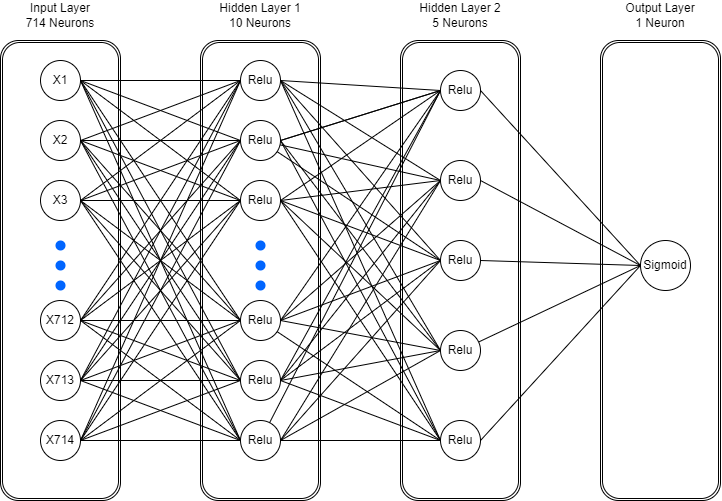

In [38]:
from IPython.display import HTML, display
# encoded_string
encoded_string = 'iVBORw0KGgoAAAANSUhEUgAAAtIAAAH1CAYAAADbKxm5AAAAAXNSR0IArs4c6QABI8d0RVh0bXhmaWxlACUzQ214ZmlsZSUyMGhvc3QlM0QlMjJhcHAuZGlhZ3JhbXMubmV0JTIyJTIwbW9kaWZpZWQlM0QlMjIyMDI0LTA2LTI1VDAyJTNBNDclM0EzNy42ODRaJTIyJTIwYWdlbnQlM0QlMjJNb3ppbGxhJTJGNS4wJTIwKFdpbmRvd3MlMjBOVCUyMDEwLjAlM0IlMjBXaW42NCUzQiUyMHg2NCklMjBBcHBsZVdlYktpdCUyRjUzNy4zNiUyMChLSFRNTCUyQyUyMGxpa2UlMjBHZWNrbyklMjBDaHJvbWUlMkYxMjYuMC4wLjAlMjBTYWZhcmklMkY1MzcuMzYlMjIlMjBldGFnJTNEJTIyS1FJWFowbFNCeDhtbnFRaFdIVVElMjIlMjB2ZXJzaW9uJTNEJTIyMjQuNi4yJTIyJTIwdHlwZSUzRCUyMmRldmljZSUyMiUyMHNjYWxlJTNEJTIyMSUyMiUyMGJvcmRlciUzRCUyMjAlMjIlM0UlMEElMjAlMjAlM0NkaWFncmFtJTIwbmFtZSUzRCUyMlBhZ2UtMSUyMiUyMGlkJTNEJTIyWDhTUG9rQUJtZVVCSHFER0N0bS0lMjIlM0UlMEElMjAlMjAlMjAlMjAlM0NteEdyYXBoTW9kZWwlMjBkeCUzRCUyMjExNjclMjIlMjBkeSUzRCUyMjYxOSUyMiUyMGdyaWQlM0QlMjIxJTIyJTIwZ3JpZFNpemUlM0QlMjIxMCUyMiUyMGd1aWRlcyUzRCUyMjElMjIlMjB0b29sdGlwcyUzRCUyMjElMjIlMjBjb25uZWN0JTNEJTIyMSUyMiUyMGFycm93cyUzRCUyMjElMjIlMjBmb2xkJTNEJTIyMSUyMiUyMHBhZ2UlM0QlMjIxJTIyJTIwcGFnZVNjYWxlJTNEJTIyMSUyMiUyMHBhZ2VXaWR0aCUzRCUyMjg1MCUyMiUyMHBhZ2VIZWlnaHQlM0QlMjIxMTAwJTIyJTIwbWF0aCUzRCUyMjAlMjIlMjBzaGFkb3clM0QlMjIwJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTNDcm9vdCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIyMCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMjAlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTEwJTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMnNoYXBlJTNEZXh0JTNCZG91YmxlJTNEMSUzQnJvdW5kZWQlM0QxJTNCd2hpdGVTcGFjZSUzRHdyYXAlM0JodG1sJTNEMSUzQiUyMiUyMHZlcnRleCUzRCUyMjElMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHglM0QlMjI4MCUyMiUyMHklM0QlMjI2MCUyMiUyMHdpZHRoJTNEJTIyMTIwJTIyJTIwaGVpZ2h0JTNEJTIyNDYwJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjAlMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyZ3JvdXAlMjIlMjB2ZXJ0ZXglM0QlMjIxJTIyJTIwY29ubmVjdGFibGUlM0QlMjIwJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB4JTNEJTIyMTIwJTIyJTIweSUzRCUyMjgwJTIyJTIwd2lkdGglM0QlMjI0MCUyMiUyMGhlaWdodCUzRCUyMjQwMCUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTElMjIlMjB2YWx1ZSUzRCUyMlgxJTIyJTIwc3R5bGUlM0QlMjJlbGxpcHNlJTNCd2hpdGVTcGFjZSUzRHdyYXAlM0JodG1sJTNEMSUzQmFzcGVjdCUzRGZpeGVkJTNCJTIyJTIwdmVydGV4JTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTIwJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNDAlMjIlMjBoZWlnaHQlM0QlMjI0MCUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTIlMjIlMjB2YWx1ZSUzRCUyMlgyJTIyJTIwc3R5bGUlM0QlMjJlbGxpcHNlJTNCd2hpdGVTcGFjZSUzRHdyYXAlM0JodG1sJTNEMSUzQmFzcGVjdCUzRGZpeGVkJTNCJTIyJTIwdmVydGV4JTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTIwJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHklM0QlMjI2MCUyMiUyMHdpZHRoJTNEJTIyNDAlMjIlMjBoZWlnaHQlM0QlMjI0MCUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTMlMjIlMjB2YWx1ZSUzRCUyMlg3MTIlMjIlMjBzdHlsZSUzRCUyMmVsbGlwc2UlM0J3aGl0ZVNwYWNlJTNEd3JhcCUzQmh0bWwlM0QxJTNCYXNwZWN0JTNEZml4ZWQlM0IlMjIlMjB2ZXJ0ZXglM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjAlMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIweSUzRCUyMjI0MCUyMiUyMHdpZHRoJTNEJTIyNDAlMjIlMjBoZWlnaHQlM0QlMjI0MCUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTQlMjIlMjB2YWx1ZSUzRCUyMlg3MTMlMjIlMjBzdHlsZSUzRCUyMmVsbGlwc2UlM0J3aGl0ZVNwYWNlJTNEd3JhcCUzQmh0bWwlM0QxJTNCYXNwZWN0JTNEZml4ZWQlM0IlMjIlMjB2ZXJ0ZXglM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjAlMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIweSUzRCUyMjMwMCUyMiUyMHdpZHRoJTNEJTIyNDAlMjIlMjBoZWlnaHQlM0QlMjI0MCUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTUlMjIlMjB2YWx1ZSUzRCUyMlg3MTQlMjIlMjBzdHlsZSUzRCUyMmVsbGlwc2UlM0J3aGl0ZVNwYWNlJTNEd3JhcCUzQmh0bWwlM0QxJTNCYXNwZWN0JTNEZml4ZWQlM0IlMjIlMjB2ZXJ0ZXglM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjAlMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIweSUzRCUyMjM2MCUyMiUyMHdpZHRoJTNEJTIyNDAlMjIlMjBoZWlnaHQlM0QlMjI0MCUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTYlMjIlMjB2YWx1ZSUzRCUyMlgzJTIyJTIwc3R5bGUlM0QlMjJlbGxpcHNlJTNCd2hpdGVTcGFjZSUzRHdyYXAlM0JodG1sJTNEMSUzQmFzcGVjdCUzRGZpeGVkJTNCJTIyJTIwdmVydGV4JTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTIwJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHklM0QlMjIxMjAlMjIlMjB3aWR0aCUzRCUyMjQwJTIyJTIwaGVpZ2h0JTNEJTIyNDAlMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy03JTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMnNoYXBlJTNEZWxsaXBzZSUzQmZpbGxDb2xvciUzRCUyMzAwNjVGRiUzQnN0cm9rZUNvbG9yJTNEbm9uZSUzQmh0bWwlM0QxJTNCc2tldGNoJTNEMCUzQiUyMiUyMHZlcnRleCUzRCUyMjElMjIlMjBwYXJlbnQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0yMCUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB4JTNEJTIyMTUlMjIlMjB5JTNEJTIyMTgwJTIyJTIwd2lkdGglM0QlMjIxMCUyMiUyMGhlaWdodCUzRCUyMjEwJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtOCUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJzaGFwZSUzRGVsbGlwc2UlM0JmaWxsQ29sb3IlM0QlMjMwMDY1RkYlM0JzdHJva2VDb2xvciUzRG5vbmUlM0JodG1sJTNEMSUzQnNrZXRjaCUzRDAlM0IlMjIlMjB2ZXJ0ZXglM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjAlMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIweCUzRCUyMjE1JTIyJTIweSUzRCUyMjIwMCUyMiUyMHdpZHRoJTNEJTIyMTAlMjIlMjBoZWlnaHQlM0QlMjIxMCUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTklMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyc2hhcGUlM0RlbGxpcHNlJTNCZmlsbENvbG9yJTNEJTIzMDA2NUZGJTNCc3Ryb2tlQ29sb3IlM0Rub25lJTNCaHRtbCUzRDElM0Jza2V0Y2glM0QwJTNCJTIyJTIwdmVydGV4JTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTIwJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHglM0QlMjIxNSUyMiUyMHklM0QlMjIyMjAlMjIlMjB3aWR0aCUzRCUyMjEwJTIyJTIwaGVpZ2h0JTNEJTIyMTAlMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0yMSUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJzaGFwZSUzRGV4dCUzQmRvdWJsZSUzRDElM0Jyb3VuZGVkJTNEMSUzQndoaXRlU3BhY2UlM0R3cmFwJTNCaHRtbCUzRDElM0IlMjIlMjB2ZXJ0ZXglM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB4JTNEJTIyMjgwJTIyJTIweSUzRCUyMjYwJTIyJTIwd2lkdGglM0QlMjIxMjAlMjIlMjBoZWlnaHQlM0QlMjI0NjAlMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0yMiUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJncm91cCUyMiUyMHZlcnRleCUzRCUyMjElMjIlMjBjb25uZWN0YWJsZSUzRCUyMjAlMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHglM0QlMjIzMjAlMjIlMjB5JTNEJTIyODAlMjIlMjB3aWR0aCUzRCUyMjQwJTIyJTIwaGVpZ2h0JTNEJTIyNDAwJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjMlMjIlMjB2YWx1ZSUzRCUyMlJlbHUlMjIlMjBzdHlsZSUzRCUyMmVsbGlwc2UlM0J3aGl0ZVNwYWNlJTNEd3JhcCUzQmh0bWwlM0QxJTNCYXNwZWN0JTNEZml4ZWQlM0IlMjIlMjB2ZXJ0ZXglM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjIlMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI0MCUyMiUyMGhlaWdodCUzRCUyMjQwJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjQlMjIlMjB2YWx1ZSUzRCUyMlJlbHUlMjIlMjBzdHlsZSUzRCUyMmVsbGlwc2UlM0J3aGl0ZVNwYWNlJTNEd3JhcCUzQmh0bWwlM0QxJTNCYXNwZWN0JTNEZml4ZWQlM0IlMjIlMjB2ZXJ0ZXglM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjIlMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIweSUzRCUyMjYwJTIyJTIwd2lkdGglM0QlMjI0MCUyMiUyMGhlaWdodCUzRCUyMjQwJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjUlMjIlMjB2YWx1ZSUzRCUyMlJlbHUlMjIlMjBzdHlsZSUzRCUyMmVsbGlwc2UlM0J3aGl0ZVNwYWNlJTNEd3JhcCUzQmh0bWwlM0QxJTNCYXNwZWN0JTNEZml4ZWQlM0IlMjIlMjB2ZXJ0ZXglM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjIlMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIweSUzRCUyMjI0MCUyMiUyMHdpZHRoJTNEJTIyNDAlMjIlMjBoZWlnaHQlM0QlMjI0MCUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTI2JTIyJTIwdmFsdWUlM0QlMjJSZWx1JTIyJTIwc3R5bGUlM0QlMjJlbGxpcHNlJTNCd2hpdGVTcGFjZSUzRHdyYXAlM0JodG1sJTNEMSUzQmFzcGVjdCUzRGZpeGVkJTNCJTIyJTIwdmVydGV4JTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTIyJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHklM0QlMjIzMDAlMjIlMjB3aWR0aCUzRCUyMjQwJTIyJTIwaGVpZ2h0JTNEJTIyNDAlMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0yNyUyMiUyMHZhbHVlJTNEJTIyUmVsdSUyMiUyMHN0eWxlJTNEJTIyZWxsaXBzZSUzQndoaXRlU3BhY2UlM0R3cmFwJTNCaHRtbCUzRDElM0Jhc3BlY3QlM0RmaXhlZCUzQiUyMiUyMHZlcnRleCUzRCUyMjElMjIlMjBwYXJlbnQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0yMiUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB5JTNEJTIyMzYwJTIyJTIwd2lkdGglM0QlMjI0MCUyMiUyMGhlaWdodCUzRCUyMjQwJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjglMjIlMjB2YWx1ZSUzRCUyMlJlbHUlMjIlMjBzdHlsZSUzRCUyMmVsbGlwc2UlM0J3aGl0ZVNwYWNlJTNEd3JhcCUzQmh0bWwlM0QxJTNCYXNwZWN0JTNEZml4ZWQlM0IlMjIlMjB2ZXJ0ZXglM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjIlMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIweSUzRCUyMjEyMCUyMiUyMHdpZHRoJTNEJTIyNDAlMjIlMjBoZWlnaHQlM0QlMjI0MCUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTI5JTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMnNoYXBlJTNEZWxsaXBzZSUzQmZpbGxDb2xvciUzRCUyMzAwNjVGRiUzQnN0cm9rZUNvbG9yJTNEbm9uZSUzQmh0bWwlM0QxJTNCc2tldGNoJTNEMCUzQiUyMiUyMHZlcnRleCUzRCUyMjElMjIlMjBwYXJlbnQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0yMiUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB4JTNEJTIyMTUlMjIlMjB5JTNEJTIyMTgwJTIyJTIwd2lkdGglM0QlMjIxMCUyMiUyMGhlaWdodCUzRCUyMjEwJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMzAlMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyc2hhcGUlM0RlbGxpcHNlJTNCZmlsbENvbG9yJTNEJTIzMDA2NUZGJTNCc3Ryb2tlQ29sb3IlM0Rub25lJTNCaHRtbCUzRDElM0Jza2V0Y2glM0QwJTNCJTIyJTIwdmVydGV4JTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTIyJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHglM0QlMjIxNSUyMiUyMHklM0QlMjIyMDAlMjIlMjB3aWR0aCUzRCUyMjEwJTIyJTIwaGVpZ2h0JTNEJTIyMTAlMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zMSUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJzaGFwZSUzRGVsbGlwc2UlM0JmaWxsQ29sb3IlM0QlMjMwMDY1RkYlM0JzdHJva2VDb2xvciUzRG5vbmUlM0JodG1sJTNEMSUzQnNrZXRjaCUzRDAlM0IlMjIlMjB2ZXJ0ZXglM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjIlMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIweCUzRCUyMjE1JTIyJTIweSUzRCUyMjIyMCUyMiUyMHdpZHRoJTNEJTIyMTAlMjIlMjBoZWlnaHQlM0QlMjIxMCUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTMyJTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMnNoYXBlJTNEZXh0JTNCZG91YmxlJTNEMSUzQnJvdW5kZWQlM0QxJTNCd2hpdGVTcGFjZSUzRHdyYXAlM0JodG1sJTNEMSUzQiUyMiUyMHZlcnRleCUzRCUyMjElMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHglM0QlMjI0ODAlMjIlMjB5JTNEJTIyNjAlMjIlMjB3aWR0aCUzRCUyMjEyMCUyMiUyMGhlaWdodCUzRCUyMjQ2MCUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTQzJTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMnNoYXBlJTNEZXh0JTNCZG91YmxlJTNEMSUzQnJvdW5kZWQlM0QxJTNCd2hpdGVTcGFjZSUzRHdyYXAlM0JodG1sJTNEMSUzQiUyMiUyMHZlcnRleCUzRCUyMjElMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHglM0QlMjI2ODAlMjIlMjB5JTNEJTIyNjAlMjIlMjB3aWR0aCUzRCUyMjEyMCUyMiUyMGhlaWdodCUzRCUyMjQ2MCUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTU0JTIyJTIwdmFsdWUlM0QlMjJJbnB1dCUyMExheWVyJTI2bHQlM0JkaXYlMjZndCUzQjcxNCUyME5ldXJvbnMlMjZsdCUzQiUyRmRpdiUyNmd0JTNCJTIyJTIwc3R5bGUlM0QlMjJ0ZXh0JTNCaHRtbCUzRDElM0JhbGlnbiUzRGNlbnRlciUzQnZlcnRpY2FsQWxpZ24lM0RtaWRkbGUlM0J3aGl0ZVNwYWNlJTNEd3JhcCUzQnJvdW5kZWQlM0QwJTNCJTIyJTIwdmVydGV4JTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMjElMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIweCUzRCUyMjk1JTIyJTIweSUzRCUyMjIwJTIyJTIwd2lkdGglM0QlMjI5MCUyMiUyMGhlaWdodCUzRCUyMjMwJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtNTUlMjIlMjB2YWx1ZSUzRCUyMkhpZGRlbiUyMExheWVyJTIwMSUyNmx0JTNCZGl2JTI2Z3QlM0IxMCUyME5ldXJvbnMlMjZsdCUzQiUyRmRpdiUyNmd0JTNCJTIyJTIwc3R5bGUlM0QlMjJ0ZXh0JTNCaHRtbCUzRDElM0JhbGlnbiUzRGNlbnRlciUzQnZlcnRpY2FsQWxpZ24lM0RtaWRkbGUlM0J3aGl0ZVNwYWNlJTNEd3JhcCUzQnJvdW5kZWQlM0QwJTNCJTIyJTIwdmVydGV4JTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMjElMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIweCUzRCUyMjI5NSUyMiUyMHklM0QlMjIyMCUyMiUyMHdpZHRoJTNEJTIyOTAlMjIlMjBoZWlnaHQlM0QlMjIzMCUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTU2JTIyJTIwdmFsdWUlM0QlMjJIaWRkZW4lMjBMYXllciUyMDIlMjZsdCUzQmRpdiUyNmd0JTNCNSUyME5ldXJvbnMlMjZsdCUzQiUyRmRpdiUyNmd0JTNCJTIyJTIwc3R5bGUlM0QlMjJ0ZXh0JTNCaHRtbCUzRDElM0JhbGlnbiUzRGNlbnRlciUzQnZlcnRpY2FsQWxpZ24lM0RtaWRkbGUlM0J3aGl0ZVNwYWNlJTNEd3JhcCUzQnJvdW5kZWQlM0QwJTNCJTIyJTIwdmVydGV4JTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMjElMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIweCUzRCUyMjQ5NSUyMiUyMHklM0QlMjIyMCUyMiUyMHdpZHRoJTNEJTIyOTAlMjIlMjBoZWlnaHQlM0QlMjIzMCUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTU3JTIyJTIwdmFsdWUlM0QlMjJPdXRwdXQlMjBMYXllciUyNmx0JTNCZGl2JTI2Z3QlM0IxJTIwTmV1cm9uJTI2bHQlM0IlMkZkaXYlMjZndCUzQiUyMiUyMHN0eWxlJTNEJTIydGV4dCUzQmh0bWwlM0QxJTNCYWxpZ24lM0RjZW50ZXIlM0J2ZXJ0aWNhbEFsaWduJTNEbWlkZGxlJTNCd2hpdGVTcGFjZSUzRHdyYXAlM0Jyb3VuZGVkJTNEMCUzQiUyMiUyMHZlcnRleCUzRCUyMjElMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHglM0QlMjI2OTUlMjIlMjB5JTNEJTIyMjAlMjIlMjB3aWR0aCUzRCUyMjkwJTIyJTIwaGVpZ2h0JTNEJTIyMzAlMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy00NSUyMiUyMHZhbHVlJTNEJTIyU2lnbW9pZCUyMiUyMHN0eWxlJTNEJTIyZWxsaXBzZSUzQndoaXRlU3BhY2UlM0R3cmFwJTNCaHRtbCUzRDElM0Jhc3BlY3QlM0RmaXhlZCUzQiUyMiUyMHZlcnRleCUzRCUyMjElMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHglM0QlMjI3MjAlMjIlMjB5JTNEJTIyMjYwJTIyJTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtNTglMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyZW5kQXJyb3clM0Rub25lJTNCaHRtbCUzRDElM0Jyb3VuZGVkJTNEMCUzQmVudHJ5WCUzRDAlM0JlbnRyeVklM0QwLjUlM0JlbnRyeUR4JTNEMCUzQmVudHJ5RHklM0QwJTNCJTIyJTIwZWRnZSUzRCUyMjElMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMSUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTIzJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjYzMCUyMiUyMHklM0QlMjIzMTAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI2ODAlMjIlMjB5JTNEJTIyMjYwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTU5JTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBlZGdlJTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0xJTIyJTIwdGFyZ2V0JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjQlMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMTcwJTIyJTIweSUzRCUyMjExMCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjMzMCUyMiUyMHklM0QlMjIxMTAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtNjAlMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyZW5kQXJyb3clM0Rub25lJTNCaHRtbCUzRDElM0Jyb3VuZGVkJTNEMCUzQmVudHJ5WCUzRDAlM0JlbnRyeVklM0QwLjUlM0JlbnRyeUR4JTNEMCUzQmVudHJ5RHklM0QwJTNCZXhpdFglM0QxJTNCZXhpdFklM0QwLjUlM0JleGl0RHglM0QwJTNCZXhpdER5JTNEMCUzQiUyMiUyMGVkZ2UlM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHNvdXJjZSUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTElMjIlMjB0YXJnZXQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0yOCUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB3aWR0aCUzRCUyMjUwJTIyJTIwaGVpZ2h0JTNEJTIyNTAlMjIlMjByZWxhdGl2ZSUzRCUyMjElMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjIxODAlMjIlMjB5JTNEJTIyMTIwJTIyJTIwYXMlM0QlMjJzb3VyY2VQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMzQwJTIyJTIweSUzRCUyMjEyMCUyMiUyMGFzJTNEJTIydGFyZ2V0UG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteEdlb21ldHJ5JTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy02MSUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0JleGl0WCUzRDElM0JleGl0WSUzRDAuNSUzQmV4aXREeCUzRDAlM0JleGl0RHklM0QwJTNCJTIyJTIwZWRnZSUzRCUyMjElMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMSUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTI1JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjE5MCUyMiUyMHklM0QlMjIxMzAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjIzNTAlMjIlMjB5JTNEJTIyMTMwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTYyJTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBlZGdlJTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0xJTIyJTIwdGFyZ2V0JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjYlMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMTcwJTIyJTIweSUzRCUyMjExMCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjMzMCUyMiUyMHklM0QlMjIzNTAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtNjQlMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyZW5kQXJyb3clM0Rub25lJTNCaHRtbCUzRDElM0Jyb3VuZGVkJTNEMCUzQmVudHJ5WCUzRDAlM0JlbnRyeVklM0QwLjUlM0JlbnRyeUR4JTNEMCUzQmVudHJ5RHklM0QwJTNCZXhpdFglM0QxJTNCZXhpdFklM0QwLjUlM0JleGl0RHglM0QwJTNCZXhpdER5JTNEMCUzQiUyMiUyMGVkZ2UlM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHNvdXJjZSUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTElMjIlMjB0YXJnZXQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0yNyUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB3aWR0aCUzRCUyMjUwJTIyJTIwaGVpZ2h0JTNEJTIyNTAlMjIlMjByZWxhdGl2ZSUzRCUyMjElMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjIxOTAlMjIlMjB5JTNEJTIyMTMwJTIyJTIwYXMlM0QlMjJzb3VyY2VQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMzUwJTIyJTIweSUzRCUyMjM3MCUyMiUyMGFzJTNEJTIydGFyZ2V0UG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteEdlb21ldHJ5JTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy02NSUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0JleGl0WCUzRDElM0JleGl0WSUzRDAuNSUzQmV4aXREeCUzRDAlM0JleGl0RHklM0QwJTNCJTIyJTIwZWRnZSUzRCUyMjElMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMiUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTIzJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjIwMCUyMiUyMHklM0QlMjIxNDAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjIzNjAlMjIlMjB5JTNEJTIyMzgwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTY2JTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBlZGdlJTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0yJTIyJTIwdGFyZ2V0JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjQlMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMTcwJTIyJTIweSUzRCUyMjE3MCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjMzMCUyMiUyMHklM0QlMjIxMTAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtNjclMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyZW5kQXJyb3clM0Rub25lJTNCaHRtbCUzRDElM0Jyb3VuZGVkJTNEMCUzQmVudHJ5WCUzRDAlM0JlbnRyeVklM0QwLjUlM0JlbnRyeUR4JTNEMCUzQmVudHJ5RHklM0QwJTNCZXhpdFglM0QxJTNCZXhpdFklM0QwLjUlM0JleGl0RHglM0QwJTNCZXhpdER5JTNEMCUzQiUyMiUyMGVkZ2UlM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHNvdXJjZSUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTIlMjIlMjB0YXJnZXQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0yOCUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB3aWR0aCUzRCUyMjUwJTIyJTIwaGVpZ2h0JTNEJTIyNTAlMjIlMjByZWxhdGl2ZSUzRCUyMjElMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjIxNzAlMjIlMjB5JTNEJTIyMTcwJTIyJTIwYXMlM0QlMjJzb3VyY2VQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMzMwJTIyJTIweSUzRCUyMjE3MCUyMiUyMGFzJTNEJTIydGFyZ2V0UG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteEdlb21ldHJ5JTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy02OCUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0JleGl0WCUzRDElM0JleGl0WSUzRDAuNSUzQmV4aXREeCUzRDAlM0JleGl0RHklM0QwJTNCJTIyJTIwZWRnZSUzRCUyMjElMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMiUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTI1JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjE3MCUyMiUyMHklM0QlMjIxNzAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjIzMzAlMjIlMjB5JTNEJTIyMjMwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTY5JTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBlZGdlJTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0yJTIyJTIwdGFyZ2V0JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjYlMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMTcwJTIyJTIweSUzRCUyMjE3MCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjMzMCUyMiUyMHklM0QlMjIzNTAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtNzAlMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyZW5kQXJyb3clM0Rub25lJTNCaHRtbCUzRDElM0Jyb3VuZGVkJTNEMCUzQmVudHJ5WCUzRDAlM0JlbnRyeVklM0QwLjUlM0JlbnRyeUR4JTNEMCUzQmVudHJ5RHklM0QwJTNCZXhpdFglM0QxJTNCZXhpdFklM0QwLjUlM0JleGl0RHglM0QwJTNCZXhpdER5JTNEMCUzQiUyMiUyMGVkZ2UlM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHNvdXJjZSUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTIlMjIlMjB0YXJnZXQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0yNyUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB3aWR0aCUzRCUyMjUwJTIyJTIwaGVpZ2h0JTNEJTIyNTAlMjIlMjByZWxhdGl2ZSUzRCUyMjElMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjIxNzAlMjIlMjB5JTNEJTIyMTcwJTIyJTIwYXMlM0QlMjJzb3VyY2VQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMzMwJTIyJTIweSUzRCUyMjQxMCUyMiUyMGFzJTNEJTIydGFyZ2V0UG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteEdlb21ldHJ5JTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy03MiUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0JleGl0WCUzRDElM0JleGl0WSUzRDAuNSUzQmV4aXREeCUzRDAlM0JleGl0RHklM0QwJTNCJTIyJTIwZWRnZSUzRCUyMjElMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtNiUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTI3JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjE5MCUyMiUyMHklM0QlMjIxOTAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjIzNTAlMjIlMjB5JTNEJTIyNDMwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTczJTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBlZGdlJTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy02JTIyJTIwdGFyZ2V0JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjYlMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMjAwJTIyJTIweSUzRCUyMjIwMCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjM2MCUyMiUyMHklM0QlMjI0NDAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtNzQlMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyZW5kQXJyb3clM0Rub25lJTNCaHRtbCUzRDElM0Jyb3VuZGVkJTNEMCUzQmVudHJ5WCUzRDAlM0JlbnRyeVklM0QwLjUlM0JlbnRyeUR4JTNEMCUzQmVudHJ5RHklM0QwJTNCZXhpdFglM0QxJTNCZXhpdFklM0QwLjUlM0JleGl0RHglM0QwJTNCZXhpdER5JTNEMCUzQiUyMiUyMGVkZ2UlM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHNvdXJjZSUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTYlMjIlMjB0YXJnZXQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0yNSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB3aWR0aCUzRCUyMjUwJTIyJTIwaGVpZ2h0JTNEJTIyNTAlMjIlMjByZWxhdGl2ZSUzRCUyMjElMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjIyMTAlMjIlMjB5JTNEJTIyMjEwJTIyJTIwYXMlM0QlMjJzb3VyY2VQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMzcwJTIyJTIweSUzRCUyMjQ1MCUyMiUyMGFzJTNEJTIydGFyZ2V0UG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteEdlb21ldHJ5JTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy03NSUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0JleGl0WCUzRDElM0JleGl0WSUzRDAuNSUzQmV4aXREeCUzRDAlM0JleGl0RHklM0QwJTNCJTIyJTIwZWRnZSUzRCUyMjElMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtNiUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTI4JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjIyMCUyMiUyMHklM0QlMjIyMjAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjIzODAlMjIlMjB5JTNEJTIyNDYwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTc2JTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBlZGdlJTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy02JTIyJTIwdGFyZ2V0JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjQlMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMjMwJTIyJTIweSUzRCUyMjIzMCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjM5MCUyMiUyMHklM0QlMjI0NzAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtNzclMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyZW5kQXJyb3clM0Rub25lJTNCaHRtbCUzRDElM0Jyb3VuZGVkJTNEMCUzQmVudHJ5WCUzRDAlM0JlbnRyeVklM0QwLjUlM0JlbnRyeUR4JTNEMCUzQmVudHJ5RHklM0QwJTNCZXhpdFglM0QxJTNCZXhpdFklM0QwLjUlM0JleGl0RHglM0QwJTNCZXhpdER5JTNEMCUzQiUyMiUyMGVkZ2UlM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHNvdXJjZSUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTYlMjIlMjB0YXJnZXQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0yMyUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB3aWR0aCUzRCUyMjUwJTIyJTIwaGVpZ2h0JTNEJTIyNTAlMjIlMjByZWxhdGl2ZSUzRCUyMjElMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjIyNDAlMjIlMjB5JTNEJTIyMjQwJTIyJTIwYXMlM0QlMjJzb3VyY2VQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyNDAwJTIyJTIweSUzRCUyMjQ4MCUyMiUyMGFzJTNEJTIydGFyZ2V0UG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteEdlb21ldHJ5JTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy03OCUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0JleGl0WCUzRDElM0JleGl0WSUzRDAuNSUzQmV4aXREeCUzRDAlM0JleGl0RHklM0QwJTNCJTIyJTIwZWRnZSUzRCUyMjElMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMyUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTI3JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjI1MCUyMiUyMHklM0QlMjIyNTAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI0MTAlMjIlMjB5JTNEJTIyNDkwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTc5JTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBlZGdlJTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zJTIyJTIwdGFyZ2V0JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjYlMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMjYwJTIyJTIweSUzRCUyMjI2MCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjQyMCUyMiUyMHklM0QlMjI1MDAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtODAlMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyZW5kQXJyb3clM0Rub25lJTNCaHRtbCUzRDElM0Jyb3VuZGVkJTNEMCUzQmVudHJ5WCUzRDAlM0JlbnRyeVklM0QwLjUlM0JlbnRyeUR4JTNEMCUzQmVudHJ5RHklM0QwJTNCZXhpdFglM0QxJTNCZXhpdFklM0QwLjUlM0JleGl0RHglM0QwJTNCZXhpdER5JTNEMCUzQiUyMiUyMGVkZ2UlM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHNvdXJjZSUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTMlMjIlMjB0YXJnZXQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0yNSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB3aWR0aCUzRCUyMjUwJTIyJTIwaGVpZ2h0JTNEJTIyNTAlMjIlMjByZWxhdGl2ZSUzRCUyMjElMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjIyNzAlMjIlMjB5JTNEJTIyMjcwJTIyJTIwYXMlM0QlMjJzb3VyY2VQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyNDMwJTIyJTIweSUzRCUyMjUxMCUyMiUyMGFzJTNEJTIydGFyZ2V0UG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteEdlb21ldHJ5JTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy04MSUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0JleGl0WCUzRDElM0JleGl0WSUzRDAuNSUzQmV4aXREeCUzRDAlM0JleGl0RHklM0QwJTNCJTIyJTIwZWRnZSUzRCUyMjElMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMyUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTI4JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjI4MCUyMiUyMHklM0QlMjIyODAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI0NDAlMjIlMjB5JTNEJTIyNTIwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTgyJTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JleGl0WCUzRDElM0JleGl0WSUzRDAuNSUzQmV4aXREeCUzRDAlM0JleGl0RHklM0QwJTNCJTIyJTIwZWRnZSUzRCUyMjElMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMyUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB3aWR0aCUzRCUyMjUwJTIyJTIwaGVpZ2h0JTNEJTIyNTAlMjIlMjByZWxhdGl2ZSUzRCUyMjElMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjIyOTAlMjIlMjB5JTNEJTIyMjkwJTIyJTIwYXMlM0QlMjJzb3VyY2VQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMzIwJTIyJTIweSUzRCUyMjE2MCUyMiUyMGFzJTNEJTIydGFyZ2V0UG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteEdlb21ldHJ5JTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy04MyUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0JleGl0WCUzRDElM0JleGl0WSUzRDAuNSUzQmV4aXREeCUzRDAlM0JleGl0RHklM0QwJTNCJTIyJTIwZWRnZSUzRCUyMjElMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMyUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTIzJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjMwMCUyMiUyMHklM0QlMjIzMDAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI0NjAlMjIlMjB5JTNEJTIyNTQwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTg0JTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBlZGdlJTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy00JTIyJTIwdGFyZ2V0JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjclMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMzEwJTIyJTIweSUzRCUyMjMxMCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjQ3MCUyMiUyMHklM0QlMjI1NTAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtODUlMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyZW5kQXJyb3clM0Rub25lJTNCaHRtbCUzRDElM0Jyb3VuZGVkJTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBlZGdlJTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy00JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjMyMCUyMiUyMHklM0QlMjIzMjAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjIzMjAlMjIlMjB5JTNEJTIyNDAwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTg2JTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBlZGdlJTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy00JTIyJTIwdGFyZ2V0JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjUlMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMzMwJTIyJTIweSUzRCUyMjMzMCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjQ5MCUyMiUyMHklM0QlMjI1NzAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtODclMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyZW5kQXJyb3clM0Rub25lJTNCaHRtbCUzRDElM0Jyb3VuZGVkJTNEMCUzQmVudHJ5WCUzRDAlM0JlbnRyeVklM0QwLjUlM0JlbnRyeUR4JTNEMCUzQmVudHJ5RHklM0QwJTNCZXhpdFglM0QxJTNCZXhpdFklM0QwLjUlM0JleGl0RHglM0QwJTNCZXhpdER5JTNEMCUzQiUyMiUyMGVkZ2UlM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHNvdXJjZSUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTQlMjIlMjB0YXJnZXQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0yOCUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB3aWR0aCUzRCUyMjUwJTIyJTIwaGVpZ2h0JTNEJTIyNTAlMjIlMjByZWxhdGl2ZSUzRCUyMjElMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjIzNDAlMjIlMjB5JTNEJTIyMzQwJTIyJTIwYXMlM0QlMjJzb3VyY2VQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyNTAwJTIyJTIweSUzRCUyMjU4MCUyMiUyMGFzJTNEJTIydGFyZ2V0UG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteEdlb21ldHJ5JTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy04OCUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0JleGl0WCUzRDElM0JleGl0WSUzRDAuNSUzQmV4aXREeCUzRDAlM0JleGl0RHklM0QwJTNCJTIyJTIwZWRnZSUzRCUyMjElMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtNCUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTI0JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjM1MCUyMiUyMHklM0QlMjIzNTAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI1MTAlMjIlMjB5JTNEJTIyNTkwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTg5JTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBlZGdlJTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy00JTIyJTIwdGFyZ2V0JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjMlMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMzYwJTIyJTIweSUzRCUyMjM2MCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjUyMCUyMiUyMHklM0QlMjI2MDAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtOTAlMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyZW5kQXJyb3clM0Rub25lJTNCaHRtbCUzRDElM0Jyb3VuZGVkJTNEMCUzQmVudHJ5WCUzRDElM0JlbnRyeVklM0QwLjUlM0JlbnRyeUR4JTNEMCUzQmVudHJ5RHklM0QwJTNCZXhpdFglM0QwJTNCZXhpdFklM0QwLjUlM0JleGl0RHglM0QwJTNCZXhpdER5JTNEMCUzQiUyMiUyMGVkZ2UlM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHNvdXJjZSUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTI3JTIyJTIwdGFyZ2V0JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtNSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB3aWR0aCUzRCUyMjUwJTIyJTIwaGVpZ2h0JTNEJTIyNTAlMjIlMjByZWxhdGl2ZSUzRCUyMjElMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjIzNzAlMjIlMjB5JTNEJTIyMzcwJTIyJTIwYXMlM0QlMjJzb3VyY2VQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyNTMwJTIyJTIweSUzRCUyMjYxMCUyMiUyMGFzJTNEJTIydGFyZ2V0UG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteEdlb21ldHJ5JTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy05MSUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0JleGl0WCUzRDElM0JleGl0WSUzRDAuNSUzQmV4aXREeCUzRDAlM0JleGl0RHklM0QwJTNCJTIyJTIwZWRnZSUzRCUyMjElMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtNSUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTI2JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjM4MCUyMiUyMHklM0QlMjIzODAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI1NDAlMjIlMjB5JTNEJTIyNjIwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTkyJTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBlZGdlJTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy01JTIyJTIwdGFyZ2V0JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjUlMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMzkwJTIyJTIweSUzRCUyMjM5MCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjU1MCUyMiUyMHklM0QlMjI2MzAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtOTMlMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyZW5kQXJyb3clM0Rub25lJTNCaHRtbCUzRDElM0Jyb3VuZGVkJTNEMCUzQmVudHJ5WCUzRDAlM0JlbnRyeVklM0QwLjUlM0JlbnRyeUR4JTNEMCUzQmVudHJ5RHklM0QwJTNCZXhpdFglM0QxJTNCZXhpdFklM0QwLjUlM0JleGl0RHglM0QwJTNCZXhpdER5JTNEMCUzQiUyMiUyMGVkZ2UlM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHNvdXJjZSUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTUlMjIlMjB0YXJnZXQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0yNCUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB3aWR0aCUzRCUyMjUwJTIyJTIwaGVpZ2h0JTNEJTIyNTAlMjIlMjByZWxhdGl2ZSUzRCUyMjElMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI0MDAlMjIlMjB5JTNEJTIyNDAwJTIyJTIwYXMlM0QlMjJzb3VyY2VQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyNTYwJTIyJTIweSUzRCUyMjY0MCUyMiUyMGFzJTNEJTIydGFyZ2V0UG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteEdlb21ldHJ5JTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy05NCUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0JleGl0WCUzRDElM0JleGl0WSUzRDAuNSUzQmV4aXREeCUzRDAlM0JleGl0RHklM0QwJTNCJTIyJTIwZWRnZSUzRCUyMjElMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtNSUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTI4JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjQxMCUyMiUyMHklM0QlMjI0MTAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI1NzAlMjIlMjB5JTNEJTIyNjUwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTk1JTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBlZGdlJTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy01JTIyJTIwdGFyZ2V0JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjMlMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyNDIwJTIyJTIweSUzRCUyMjQyMCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjU4MCUyMiUyMHklM0QlMjI2NjAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtOTYlMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyZW5kQXJyb3clM0Rub25lJTNCaHRtbCUzRDElM0Jyb3VuZGVkJTNEMCUzQmVudHJ5WCUzRDAlM0JlbnRyeVklM0QwLjUlM0JlbnRyeUR4JTNEMCUzQmVudHJ5RHklM0QwJTNCZXhpdFglM0QxJTNCZXhpdFklM0QwLjUlM0JleGl0RHglM0QwJTNCZXhpdER5JTNEMCUzQiUyMiUyMGVkZ2UlM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHNvdXJjZSUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTIzJTIyJTIwdGFyZ2V0JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMzQlMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyNDIwJTIyJTIweSUzRCUyMjkwJTIyJTIwYXMlM0QlMjJzb3VyY2VQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyNTgwJTIyJTIweSUzRCUyMjkwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTk3JTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBlZGdlJTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zNCUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTQ1JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjE4MCUyMiUyMHklM0QlMjIxMjAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjIzNDAlMjIlMjB5JTNEJTIyMTIwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTk4JTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBlZGdlJTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zNSUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTQ1JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjE5MCUyMiUyMHklM0QlMjIxMzAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjIzNTAlMjIlMjB5JTNEJTIyMTMwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTk5JTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBlZGdlJTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zOSUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTQ1JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjIwMCUyMiUyMHklM0QlMjIxNDAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjIzNjAlMjIlMjB5JTNEJTIyMTQwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTEwMCUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZXhpdFglM0QwJTNCZXhpdFklM0QwLjUlM0JleGl0RHglM0QwJTNCZXhpdER5JTNEMCUzQiUyMiUyMGVkZ2UlM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHNvdXJjZSUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTQ1JTIyJTIwdGFyZ2V0JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMzYlMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMjEwJTIyJTIweSUzRCUyMjE1MCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjU2MCUyMiUyMHklM0QlMjIzNDAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMzQlMjIlMjB2YWx1ZSUzRCUyMlJlbHUlMjIlMjBzdHlsZSUzRCUyMmVsbGlwc2UlM0J3aGl0ZVNwYWNlJTNEd3JhcCUzQmh0bWwlM0QxJTNCYXNwZWN0JTNEZml4ZWQlM0IlMjIlMjB2ZXJ0ZXglM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB4JTNEJTIyNTIwJTIyJTIweSUzRCUyMjkwJTIyJTIwd2lkdGglM0QlMjI0MCUyMiUyMGhlaWdodCUzRCUyMjQwJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMzUlMjIlMjB2YWx1ZSUzRCUyMlJlbHUlMjIlMjBzdHlsZSUzRCUyMmVsbGlwc2UlM0J3aGl0ZVNwYWNlJTNEd3JhcCUzQmh0bWwlM0QxJTNCYXNwZWN0JTNEZml4ZWQlM0IlMjIlMjB2ZXJ0ZXglM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB4JTNEJTIyNTIwJTIyJTIweSUzRCUyMjE4MCUyMiUyMHdpZHRoJTNEJTIyNDAlMjIlMjBoZWlnaHQlM0QlMjI0MCUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTM2JTIyJTIwdmFsdWUlM0QlMjJSZWx1JTIyJTIwc3R5bGUlM0QlMjJlbGxpcHNlJTNCd2hpdGVTcGFjZSUzRHdyYXAlM0JodG1sJTNEMSUzQmFzcGVjdCUzRGZpeGVkJTNCJTIyJTIwdmVydGV4JTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMjElMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIweCUzRCUyMjUyMCUyMiUyMHklM0QlMjIzNTAlMjIlMjB3aWR0aCUzRCUyMjQwJTIyJTIwaGVpZ2h0JTNEJTIyNDAlMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zOCUyMiUyMHZhbHVlJTNEJTIyUmVsdSUyMiUyMHN0eWxlJTNEJTIyZWxsaXBzZSUzQndoaXRlU3BhY2UlM0R3cmFwJTNCaHRtbCUzRDElM0Jhc3BlY3QlM0RmaXhlZCUzQiUyMiUyMHZlcnRleCUzRCUyMjElMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHglM0QlMjI1MjAlMjIlMjB5JTNEJTIyNDQwJTIyJTIwd2lkdGglM0QlMjI0MCUyMiUyMGhlaWdodCUzRCUyMjQwJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMzklMjIlMjB2YWx1ZSUzRCUyMlJlbHUlMjIlMjBzdHlsZSUzRCUyMmVsbGlwc2UlM0J3aGl0ZVNwYWNlJTNEd3JhcCUzQmh0bWwlM0QxJTNCYXNwZWN0JTNEZml4ZWQlM0IlMjIlMjB2ZXJ0ZXglM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB4JTNEJTIyNTIwJTIyJTIweSUzRCUyMjI2MCUyMiUyMHdpZHRoJTNEJTIyNDAlMjIlMjBoZWlnaHQlM0QlMjI0MCUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTEwMSUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMSUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0JleGl0WCUzRDAlM0JleGl0WSUzRDAuNSUzQmV4aXREeCUzRDAlM0JleGl0RHklM0QwJTNCJTIyJTIwZWRnZSUzRCUyMjElMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtNDUlMjIlMjB0YXJnZXQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zOCUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB3aWR0aCUzRCUyMjUwJTIyJTIwaGVpZ2h0JTNEJTIyNTAlMjIlMjByZWxhdGl2ZSUzRCUyMjElMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjIyMjAlMjIlMjB5JTNEJTIyMTYwJTIyJTIwYXMlM0QlMjJzb3VyY2VQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMzgwJTIyJTIweSUzRCUyMjE2MCUyMiUyMGFzJTNEJTIydGFyZ2V0UG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteEdlb21ldHJ5JTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0xMDIlMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyZW5kQXJyb3clM0Rub25lJTNCaHRtbCUzRDElM0Jyb3VuZGVkJTNEMCUzQmVudHJ5WCUzRDAlM0JlbnRyeVklM0QwLjUlM0JlbnRyeUR4JTNEMCUzQmVudHJ5RHklM0QwJTNCZXhpdFglM0QxJTNCZXhpdFklM0QwLjUlM0JleGl0RHglM0QwJTNCZXhpdER5JTNEMCUzQiUyMiUyMGVkZ2UlM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHNvdXJjZSUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTIzJTIyJTIwdGFyZ2V0JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMzUlMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMzcwJTIyJTIweSUzRCUyMjExMCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjUzMCUyMiUyMHklM0QlMjIxMjAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMTAzJTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBlZGdlJTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0yMyUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTM5JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjM4MCUyMiUyMHklM0QlMjIxMjAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI1NDAlMjIlMjB5JTNEJTIyMTMwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTEwNCUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0JleGl0WCUzRDElM0JleGl0WSUzRDAuNSUzQmV4aXREeCUzRDAlM0JleGl0RHklM0QwJTNCJTIyJTIwZWRnZSUzRCUyMjElMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjMlMjIlMjB0YXJnZXQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zNiUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB3aWR0aCUzRCUyMjUwJTIyJTIwaGVpZ2h0JTNEJTIyNTAlMjIlMjByZWxhdGl2ZSUzRCUyMjElMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjIzOTAlMjIlMjB5JTNEJTIyMTMwJTIyJTIwYXMlM0QlMjJzb3VyY2VQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyNTUwJTIyJTIweSUzRCUyMjE0MCUyMiUyMGFzJTNEJTIydGFyZ2V0UG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteEdlb21ldHJ5JTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0xMDYlMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyZW5kQXJyb3clM0Rub25lJTNCaHRtbCUzRDElM0Jyb3VuZGVkJTNEMCUzQmVudHJ5WCUzRDAlM0JlbnRyeVklM0QwLjUlM0JlbnRyeUR4JTNEMCUzQmVudHJ5RHklM0QwJTNCZXhpdFglM0QxJTNCZXhpdFklM0QwLjUlM0JleGl0RHglM0QwJTNCZXhpdER5JTNEMCUzQiUyMiUyMGVkZ2UlM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHNvdXJjZSUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTIzJTIyJTIwdGFyZ2V0JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMzglMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyNDAwJTIyJTIweSUzRCUyMjE0MCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjU2MCUyMiUyMHklM0QlMjIxNTAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMTA3JTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBlZGdlJTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0yNCUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTM0JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjQxMCUyMiUyMHklM0QlMjIxNTAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI1NzAlMjIlMjB5JTNEJTIyMTYwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTEwOCUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0JleGl0WCUzRDElM0JleGl0WSUzRDAuNSUzQmV4aXREeCUzRDAlM0JleGl0RHklM0QwJTNCJTIyJTIwZWRnZSUzRCUyMjElMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjQlMjIlMjB0YXJnZXQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zNCUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB3aWR0aCUzRCUyMjUwJTIyJTIwaGVpZ2h0JTNEJTIyNTAlMjIlMjByZWxhdGl2ZSUzRCUyMjElMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI0MjAlMjIlMjB5JTNEJTIyMTYwJTIyJTIwYXMlM0QlMjJzb3VyY2VQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyNTgwJTIyJTIweSUzRCUyMjE3MCUyMiUyMGFzJTNEJTIydGFyZ2V0UG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteEdlb21ldHJ5JTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0xMDklMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyZW5kQXJyb3clM0Rub25lJTNCaHRtbCUzRDElM0Jyb3VuZGVkJTNEMCUzQmVudHJ5WCUzRDAlM0JlbnRyeVklM0QwLjUlM0JlbnRyeUR4JTNEMCUzQmVudHJ5RHklM0QwJTNCZXhpdFglM0QxJTNCZXhpdFklM0QwLjUlM0JleGl0RHglM0QwJTNCZXhpdER5JTNEMCUzQiUyMiUyMGVkZ2UlM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHNvdXJjZSUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTI0JTIyJTIwdGFyZ2V0JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMzglMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyNDMwJTIyJTIweSUzRCUyMjE3MCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjU5MCUyMiUyMHklM0QlMjIxODAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMTEwJTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQiUyMiUyMGVkZ2UlM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTM2JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjM2MCUyMiUyMHklM0QlMjIxNjAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI2MDAlMjIlMjB5JTNEJTIyMTkwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTExMSUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0IlMjIlMjBlZGdlJTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0yNCUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTM5JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjQ1MCUyMiUyMHklM0QlMjIxOTAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI2MTAlMjIlMjB5JTNEJTIyMjAwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTExMiUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0IlMjIlMjBlZGdlJTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0yNCUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTM1JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjQ2MCUyMiUyMHklM0QlMjIyMDAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI2MjAlMjIlMjB5JTNEJTIyMjEwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTExMyUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0JleGl0WCUzRDElM0JleGl0WSUzRDAuNSUzQmV4aXREeCUzRDAlM0JleGl0RHklM0QwJTNCJTIyJTIwZWRnZSUzRCUyMjElMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjglMjIlMjB0YXJnZXQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zNCUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB3aWR0aCUzRCUyMjUwJTIyJTIwaGVpZ2h0JTNEJTIyNTAlMjIlMjByZWxhdGl2ZSUzRCUyMjElMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI0NzAlMjIlMjB5JTNEJTIyMjEwJTIyJTIwYXMlM0QlMjJzb3VyY2VQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyNjMwJTIyJTIweSUzRCUyMjIyMCUyMiUyMGFzJTNEJTIydGFyZ2V0UG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteEdlb21ldHJ5JTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0xMTQlMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyZW5kQXJyb3clM0Rub25lJTNCaHRtbCUzRDElM0Jyb3VuZGVkJTNEMCUzQmVudHJ5WCUzRDAlM0JlbnRyeVklM0QwLjUlM0JlbnRyeUR4JTNEMCUzQmVudHJ5RHklM0QwJTNCZXhpdFglM0QxJTNCZXhpdFklM0QwLjUlM0JleGl0RHglM0QwJTNCZXhpdER5JTNEMCUzQiUyMiUyMGVkZ2UlM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHNvdXJjZSUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTI4JTIyJTIwdGFyZ2V0JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMzUlMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyNDgwJTIyJTIweSUzRCUyMjIyMCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjY0MCUyMiUyMHklM0QlMjIyMzAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMTE1JTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBlZGdlJTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0yOCUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTM5JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjQ5MCUyMiUyMHklM0QlMjIyMzAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI2NTAlMjIlMjB5JTNEJTIyMjQwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTExNiUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0JleGl0WCUzRDElM0JleGl0WSUzRDAuNSUzQmV4aXREeCUzRDAlM0JleGl0RHklM0QwJTNCJTIyJTIwZWRnZSUzRCUyMjElMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjglMjIlMjB0YXJnZXQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zNiUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB3aWR0aCUzRCUyMjUwJTIyJTIwaGVpZ2h0JTNEJTIyNTAlMjIlMjByZWxhdGl2ZSUzRCUyMjElMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI1MDAlMjIlMjB5JTNEJTIyMjQwJTIyJTIwYXMlM0QlMjJzb3VyY2VQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyNjYwJTIyJTIweSUzRCUyMjI1MCUyMiUyMGFzJTNEJTIydGFyZ2V0UG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteEdlb21ldHJ5JTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0xMTclMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyZW5kQXJyb3clM0Rub25lJTNCaHRtbCUzRDElM0Jyb3VuZGVkJTNEMCUzQmVudHJ5WCUzRDAlM0JlbnRyeVklM0QwLjUlM0JlbnRyeUR4JTNEMCUzQmVudHJ5RHklM0QwJTNCZXhpdFglM0QxJTNCZXhpdFklM0QwLjUlM0JleGl0RHglM0QwJTNCZXhpdER5JTNEMCUzQiUyMiUyMGVkZ2UlM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHNvdXJjZSUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTI4JTIyJTIwdGFyZ2V0JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMzglMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyNTEwJTIyJTIweSUzRCUyMjI1MCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjY3MCUyMiUyMHklM0QlMjIyNjAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMTE4JTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBlZGdlJTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0yNSUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTM0JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjUyMCUyMiUyMHklM0QlMjIyNjAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI2ODAlMjIlMjB5JTNEJTIyMjcwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTExOSUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0JleGl0WCUzRDElM0JleGl0WSUzRDAuNSUzQmV4aXREeCUzRDAlM0JleGl0RHklM0QwJTNCJTIyJTIwZWRnZSUzRCUyMjElMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjUlMjIlMjB0YXJnZXQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zNSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB3aWR0aCUzRCUyMjUwJTIyJTIwaGVpZ2h0JTNEJTIyNTAlMjIlMjByZWxhdGl2ZSUzRCUyMjElMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI1MzAlMjIlMjB5JTNEJTIyMjcwJTIyJTIwYXMlM0QlMjJzb3VyY2VQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyNjkwJTIyJTIweSUzRCUyMjI4MCUyMiUyMGFzJTNEJTIydGFyZ2V0UG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteEdlb21ldHJ5JTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0xMjAlMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyZW5kQXJyb3clM0Rub25lJTNCaHRtbCUzRDElM0Jyb3VuZGVkJTNEMCUzQmVudHJ5WCUzRDAlM0JlbnRyeVklM0QwLjUlM0JlbnRyeUR4JTNEMCUzQmVudHJ5RHklM0QwJTNCZXhpdFglM0QxJTNCZXhpdFklM0QwLjUlM0JleGl0RHglM0QwJTNCZXhpdER5JTNEMCUzQiUyMiUyMGVkZ2UlM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHNvdXJjZSUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTI1JTIyJTIwdGFyZ2V0JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMzklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyNTQwJTIyJTIweSUzRCUyMjI4MCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjcwMCUyMiUyMHklM0QlMjIyOTAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMTIxJTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBlZGdlJTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0yNSUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTM2JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjU1MCUyMiUyMHklM0QlMjIyOTAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI3MTAlMjIlMjB5JTNEJTIyMzAwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTEyMiUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0IlMjIlMjBlZGdlJTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0yNSUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTM4JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjU2MCUyMiUyMHklM0QlMjIzMDAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI3MjAlMjIlMjB5JTNEJTIyMzEwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTEyMyUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0JleGl0WCUzRDElM0JleGl0WSUzRDAuNSUzQmV4aXREeCUzRDAlM0JleGl0RHklM0QwJTNCJTIyJTIwZWRnZSUzRCUyMjElMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjYlMjIlMjB0YXJnZXQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zNCUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB3aWR0aCUzRCUyMjUwJTIyJTIwaGVpZ2h0JTNEJTIyNTAlMjIlMjByZWxhdGl2ZSUzRCUyMjElMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI1NzAlMjIlMjB5JTNEJTIyMzEwJTIyJTIwYXMlM0QlMjJzb3VyY2VQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyNzMwJTIyJTIweSUzRCUyMjMyMCUyMiUyMGFzJTNEJTIydGFyZ2V0UG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteEdlb21ldHJ5JTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0xMjQlMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyZW5kQXJyb3clM0Rub25lJTNCaHRtbCUzRDElM0Jyb3VuZGVkJTNEMCUzQmVudHJ5WCUzRDAlM0JlbnRyeVklM0QwLjUlM0JlbnRyeUR4JTNEMCUzQmVudHJ5RHklM0QwJTNCZXhpdFglM0QxJTNCZXhpdFklM0QwLjUlM0JleGl0RHglM0QwJTNCZXhpdER5JTNEMCUzQiUyMiUyMGVkZ2UlM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHNvdXJjZSUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTI2JTIyJTIwdGFyZ2V0JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMzUlMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyNTgwJTIyJTIweSUzRCUyMjMyMCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjc0MCUyMiUyMHklM0QlMjIzMzAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMTI1JTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBlZGdlJTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0yNiUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTM5JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjU5MCUyMiUyMHklM0QlMjIzMzAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI3NTAlMjIlMjB5JTNEJTIyMzQwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTEyNiUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0JleGl0WCUzRDElM0JleGl0WSUzRDAuNSUzQmV4aXREeCUzRDAlM0JleGl0RHklM0QwJTNCJTIyJTIwZWRnZSUzRCUyMjElMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjYlMjIlMjB0YXJnZXQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zNiUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB3aWR0aCUzRCUyMjUwJTIyJTIwaGVpZ2h0JTNEJTIyNTAlMjIlMjByZWxhdGl2ZSUzRCUyMjElMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI2MDAlMjIlMjB5JTNEJTIyMzQwJTIyJTIwYXMlM0QlMjJzb3VyY2VQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyNzYwJTIyJTIweSUzRCUyMjM1MCUyMiUyMGFzJTNEJTIydGFyZ2V0UG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteEdlb21ldHJ5JTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0xMjclMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyZW5kQXJyb3clM0Rub25lJTNCaHRtbCUzRDElM0Jyb3VuZGVkJTNEMCUzQmVudHJ5WCUzRDAlM0JlbnRyeVklM0QwLjUlM0JlbnRyeUR4JTNEMCUzQmVudHJ5RHklM0QwJTNCZXhpdFglM0QxJTNCZXhpdFklM0QwLjUlM0JleGl0RHglM0QwJTNCZXhpdER5JTNEMCUzQiUyMiUyMGVkZ2UlM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHNvdXJjZSUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTI2JTIyJTIwdGFyZ2V0JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMzglMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyNjEwJTIyJTIweSUzRCUyMjM1MCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjc3MCUyMiUyMHklM0QlMjIzNjAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMTI4JTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQiUyMiUyMGVkZ2UlM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTM4JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjM2MCUyMiUyMHklM0QlMjI0NjAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI3ODAlMjIlMjB5JTNEJTIyMzcwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTEyOSUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0JleGl0WCUzRDElM0JleGl0WSUzRDAuNSUzQmV4aXREeCUzRDAlM0JleGl0RHklM0QwJTNCJTIyJTIwZWRnZSUzRCUyMjElMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjclMjIlMjB0YXJnZXQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zNiUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB3aWR0aCUzRCUyMjUwJTIyJTIwaGVpZ2h0JTNEJTIyNTAlMjIlMjByZWxhdGl2ZSUzRCUyMjElMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI2MzAlMjIlMjB5JTNEJTIyMzcwJTIyJTIwYXMlM0QlMjJzb3VyY2VQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyNzkwJTIyJTIweSUzRCUyMjM4MCUyMiUyMGFzJTNEJTIydGFyZ2V0UG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteEdlb21ldHJ5JTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0xMzAlMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyZW5kQXJyb3clM0Rub25lJTNCaHRtbCUzRDElM0Jyb3VuZGVkJTNEMCUzQmVudHJ5WCUzRDAlM0JlbnRyeVklM0QwLjUlM0JlbnRyeUR4JTNEMCUzQmVudHJ5RHklM0QwJTNCZXhpdFglM0QxJTNCZXhpdFklM0QwLjUlM0JleGl0RHglM0QwJTNCZXhpdER5JTNEMCUzQiUyMiUyMGVkZ2UlM0QlMjIxJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHNvdXJjZSUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTI3JTIyJTIwdGFyZ2V0JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMzklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyNjQwJTIyJTIweSUzRCUyMjM4MCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjgwMCUyMiUyMHklM0QlMjIzOTAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMTMxJTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBlZGdlJTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0yNyUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTM1JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjY1MCUyMiUyMHklM0QlMjIzOTAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI4MTAlMjIlMjB5JTNEJTIyNDAwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTEzMyUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0IlMjIlMjBlZGdlJTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0yNyUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTM0JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjY2MCUyMiUyMHklM0QlMjI0MDAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI4MjAlMjIlMjB5JTNEJTIyNDEwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZyb290JTNFJTBBJTIwJTIwJTIwJTIwJTNDJTJGbXhHcmFwaE1vZGVsJTNFJTBBJTIwJTIwJTNDJTJGZGlhZ3JhbSUzRSUwQSUzQyUyRm14ZmlsZSUzRSUwQdCIneEAACAASURBVHhe7J0JuB9FsfYbRDaBCITVoCyyg2xhDQiCoOAFg6wqmwQQ2UFQbiIgIriAoBFU5OayCEpQwuJVNkFZZRNEuRAQAgqySOBjk02E7/m1t459Oj3TPTM985+Z0/085zmQM9PdU9U183b1W1Wzvf3222+r1JIEkgSSBJIEkgSSBJIEkgSSBJIECklgtgSkC8krXZwkkCSQJJAkkCSQJJAkkCSQJKAlkIB0WghJAkkCSQJJAkkCSQJJAkkCSQIlJDAwIP3ss8+qgw46SH35y19WK664Yomp599ywgknqGWXXVZ9+tOfHnYh4/JvxxxzjBo3blz0cVOHSQJ5EmBd0lh/0h544AFtB6effrqaOXPm0H8vvPDCw7q64IIL1I033qhOO+00Nc888wz9LfaaZj6HHHKImjx5ci22WXSF8NwzZswYJrOifaTruyGBZB/hekJWxx57rL7hIx/5iMJO7HdGeG/pyq5L4NVXX1WHH364OvPMMwuviSy8FCqTPDzXtu9J6DMVuS4B6SLSStcmCVSUgA8o5H0IRyKQ5pl322039ZWvfCUB6Yprrwu3J/sI09LNN9+srrvuuiGbcMktrKd0VR8kIM6U3Xfffch5yBo58MAD1dSpU70OkQSkq62CVgDp9773vXon9Z73vGdohy0fTvHWrbfeeuqII45Qa6yxxtDCYKH86Ec/GvLQiecKTzQfX9r5558/zCvt897Jh5t7ZSy8hOY4zGnKlCnq+OOP12OYu8CbbrpJe7plF8bfZ5tttuQtqLZOe3O3DyjYHmnW+MYbb6zX4lZbbaVefPFFvd7NdffZz35WPfroo0OnLKy9XXbZRd1zzz3DPFX0hdebduGFFw6zJVPAeR4EsZ+rrrpK3yJ2ar+IsSMapz958+H+p59+Wm2wwQazeNrp869//atae+219TWmF783CyI9yDAJJPv4t2cZe82zD1NwXIvskld6ZBpU1qmd+e+heGnppZfWeGeBBRZQJ5988tA3ZN5559VYB7AOxhEv9NFHH62+//3va0+4ic9EE235ntS5MloFpHlQQMJdd901tJPi3wAFO+ywg/6Qml45rnMBaa4rQ+2wX0byUj/ggAOG0VBMkGC++M0doMz7jDPOSBSSOldwx/ouAhQA1ax91hBgkpeY2Mgpp5yiQabYC2CbTdxKK600jLokYNS+Tvpj82oD1KwXnxwdbrLJJkMAWSgg5maTOR533HFqwoQJavTo0bnzCfGYJGpHxxZ5hekm+/jX5tH+Dvroj1mnVRVUkW7tiATkvSwAN2uDNX369CC8JM4bcUKKTR555JFOIA0tkfd8FlW3bd+TOtTaKiAtH2iTb8NDm3xN82+2p9j84JYB0raA7f4233xzDWiyQIK5oFlYbeKZ1rF4Up/FJWDyGs27heNoeqTtF594FE466SQ1ceLEIc+Aue7o0/RMmfxr+jP/lgVQQzltpi2y3idNmqROPPFEzfOWExs2u6HzyZJmAtLF11lX70j28e94Cdtes3Qaaq9dXRNp3vkSyAPS9vs/xPFoOxSlD5w32KftkS4LpO2naup7Usd6ahWQdimIh5ZALPijdQJpm6zP2HJ0LZy0nXfeeQgkvPLKK9rbJsfcoiB2cmPHjs0MGqtDkanPbkigiMftyiuvHBZcKEAaDzLeXgmYtYE03mmzZVGUygBp8VZI/+ZRHs/GZhOaCQ3bsK/n37Pmk4B0N9ZwnbNM9lHMPoQ2lU4+61yV7e67DiBtU1nBYHUA6UF8T+rQZieAtOnZNXfftkfafAmX8Ujbx2Mm0ADA43HjiG3RRRfVIMEXqWpuAOpQXuqzexIoAhTKeqTNl6ApoSyOXCi1w44vsNc//V922WV6SIA+tmKPmTefBKS7t55jzzjZx78lmmc7XFUkmCy2nlJ/7ZJAGY50Fl6yPdLy/5wymh5pE4uVoXYM6ntSh+Y6AaThiR511FEavNocaeFYChcTEnxZjrTZt3ibpT+EzyK6+OKLh0XBmovR9A4wnwSk61iy3e6zCFAQry7r2eZIT5s2bchbDX0iiyPNmgZY8zuPI2dKNeuo2H7x0SfBKBIVLn8nWEVS9LnuyZpPAtLdXtsxZp/sI9teQ2w0hg5SH92TQEjWDnPjlYeXxEssiRNsjrTE1Zjv/xhAuqnvSR3a7QSQBpCOGjVKR4Xa+TKFU8e/8/Pyyy8PBSWSuSMra4dNxzADtfgbfX3uc59TV1xxxRAocHkIbDqIjGdyk1JuzzqWbjf7LAIUWDfm0Rfr/6GHHpolWwxZO4iw/vjHPz6UMUaydoRkuXF5pOV+kbL0c+eddw5lxGE+gHgzyMV1EmRm7cibTwLS3VzTMWed7CM7K5UpZzO7lPx7yiUdcyV2r6+QPNIheAlHiJndie+LOEbMd/mpp56qbr/9du0wlMxrt9566yzp9sx72vA9qUOzAwPSoQ/TJkCaRRcJfZZ0XZJAnyVQd5GlPssuPVv/JZDso/867sMT+ihFTT1jl+wlAemAVSE7PS61q8oF3J4uSRLovQTE6yAUrN4/cHrAJIECEkj2UUBY6dKBSqANQLpr9tJ6ID3QFZUGTxJIEkgSSBJIEkgSSBJIEkgSyJBAAtJpaSQJJAkkCSQJJAkkCSQJJAkkCZSQQALSJYSWbkkSSBJIEkgSSBJIEkgSSBJIEkhAOq2BJIEkgSSBJIEkgSSBJIEkgSSBEhJoDEi7Sr/a6XryMnTY+WjNZ5W/mTmf+XsqLVxiRaRbWiUB1xo20wlJ5U170lnBGinzTKvUmyYTQQJ2eq2sNHCsfQKpsClJSdqmrFARRJG6SBIIkoBv3SdbCRLj0EWNAWlzWpIFY5NNNtFFVmjyMlx88cWHvejkPgHikiTcBaSfeuqpYTkME5AuthjS1e2SgOSKNcGyuaGUIi2mHckTZNlTAtLt0nGaTXUJhGYZkG+IWVvAByiqzy71kCTQLgn4sBazTbZSTGcDAdL2i08q7hx//PHqwgsv1MnAzSImcv2jjz6qi63gebaB9EEHHaSWWmop9eKLLw6lqLOBtFncQpKM08/hhx8+VFTCzF3I3yhPTpttttk0wKcsuRSrMD0f9G0mMbcLT1B5jpaS5hdboCP1al5kf/3rX3VFw6efflqve9lwmhUz7bL2JpCWQkZSiUpekMsuu6zewNoJ/GWTaoML014pwAKwZ04bbLCBtjWprEj/tl0x9rHHHqunZW4IzBOqLK/6SNV9eu5iEgh1mLDmXnrpJXXPPfeoyZMn6xL29lo3vdv2+52KnJL+VMY88sgj9ffj+eef104cbEg2uBQsotl2JcXFzL9lFfYqJol0dZJAvgR8WEvubrOttFHHjQNpeWGY1dDsj78JpAXYApRRbh6Q/uIXv6h+8IMfDIFi8wVrlj2WKjx85OVFKPOxgTSg+YwzztDg3S7DKWDHBBPmi5T+DzjgAMXcATW8uJkTTTzxbVwUaU7tkYBrM2h+0Hkxsg7N42oTcLM5Pe6444bWn+mRNqvImeVjud8E6zaQPvDAA4dOfgR4YCMCIEy7oi+xD7mPzag8A39nfhMmTND2kVqSQFEJ2LRB16mluYnkv2fMmKG/JSaQlveyfGPs93sekLY3q2yC7XVP/3xPJNe62f+0adOG5sR3ZtKkSerEE08c5lAqKpd0fZJAlgR8JzHynWijrcwzzzytU2zjQDrvGM6lXAGeH/3oRzX4zAPSfPz5SAuwuPLKK4deTrbnTuZx0kknqYkTJ+Z6pPO8F3is+bs5Lt50AUA2kG7dCkgTarUEbCDtWsd5QJpNKXZw44036g/7KaecovBI2/ZkbnBHjx6dC6TN8VynS/x9ypQp2g6FdmJuUE0g3caXYqsXRJrcMAnYNEFzQ2hvzAQcmGvfXOvTp08ftik1v0f8LQ9Iyzq3HUXm/MaOHatPOOV7YtqOCaSTipME6pZAKJBuo6208ZvROJDO42i6jtn4IONVe+WVV4KANC9P125K+KbmAuXoTj74WR5p2zNngog8cGB7w4UOYtatr9tYUv/dl0BVjzRAet555x2iL1133XXDgPRVV101TEjwR/ng53mkbUAhIJ0XnNgwgB1bcdmVnMzstttuemyTs9p9jaUnGKQEXPE3Mh/z2yMgdv/991ff+MY3NC0PsCwUPLlHKHr25s+mdpjr3Hb4yLh5doXtmJ71LK/6IGWbxu6PBEKBNGu5jbbSNk00CqR9tdNt5brALwK0XzJ2v0Lj4CU4//zzay92Fo/O9iCYFBDGMgGFC+ibHmmXx0K4raL4UD5f2xZKms9gJGCvF5eNmEBWZuniOfOhXnrppbWXGE+DSTkyny5vDPjQNrXERTXJ26CansI8qtdgJJ5G7bIE8taTCaTlugUWWEA99thjQ0DaXMumHOyTF6FF2dRAn0c6a4Nqetl838ku6yfNvR0SKAKk22wr7ZCmUo0CaZ/yqqS/s0GBnfHABMjitYbHJtQO4bhx38knn6w5oDaQ9nGkXUB65513HgbGE0e6LUu/G/OwgXSRrB3mR5untSOxTY60yXXmuFtiA4T3zP3C+TTXuY8j7fJI33nnnUOUK17SiSPdjbXYxlnaoDMrZkDWvwTa8v929gL+zfQmY3usdX7jrRaOP/bBdcTN2EBaxsniSGcBaaFc0W/iSLdxpfVrTj4sZjMH2mQrI57a4UtTFBNIyy7KDAIxs3aYEdlmpPapp56qbr/9dg1+bSBtvnyJ/A6J6hZvuBxjJ2pHv15IdT9NlTzSNpC2N4J5mQJkI8qpDjx/PNEuIM3zF82GI8G+ktUgUTvqXkX97t98f5vZkuyndtEKTbBMbEteX7IR5b3Pz8svv+wE0mWy4Qh1UahWidrR7zU76KcrCqSZb1tsZcQD6UEvnjR+kkCSQJJAkkCSQJJAkkCSQJJALAk0Su2INenUT5JAkkCSQJJAkkCSQJJAkkCSwKAlkID0oDWQxk8SSBJIEkgSSBJIEkgSSBLopAQSkO6k2tKkkwSSBJIEkgSSBJIEkgSSBAYtgQSkB62BNH6SQJJAkkCSQJJAkkCSQJJAJyWQgHQn1ZYmnSSQJJAkkCSQJJAkkCSQJDBoCSQgPWgNpPGTBJIEkgSSBJIEkgSSBJIEOimBBKQ7qbY06SSBJIEkgSSBJIEkgSSBJIFBSyAB6UFrII2fJJAkkCSQJJAkkCSQJJAk0EkJJCDdSbWlSScJJAkkCSQJJAkkCSQJJAkMWgIJSA9aA2n8JIEkgSSBJIEkgSSBJIEkgU5KIAHpTqotTTpJIEkgSSBJIEkgSSBJIElg0BJIQHrQGkjjJwkkCSQJJAkkCSQJJAkkCXRSAoWB9Ouvv65++ctfqhtuuEHdfffd6uGHH1bPPPOM4t9TiyuBueaaSy2yyCJqueWWU2uttZb64Ac/qLbZZhvFv6fWTgkk+2hOL8k+mpN1rJGSfcSSpL+fZB9+GbXtimQfzWkkpn0EA+nbb79dnXnmmeqCCy5Qm222mdp8883VOuuso5Zffnm12GKLaXD3xhtvqDnnnLM5SfR0JJEjRvX000+rP/3pT+p3v/uduu6669RvfvMb9elPf1p99rOfVeutt15PJdC9x0r20ZzOkn00J+tYIyX7iCVJfz/JPvwyatsVyT6a00gd9uEF0jNmzFDHHnusuv7669XBBx+s9tprL7XooosOAbvbbrtN3X///erxxx9XL730knr77bebk0hPR5ptttnU/PPPr8aMGaNWXnlltf766w9tXP72t7+pc845R333u99Vm266qfrKV76ill122Z5Kov2PleyjeR0l+2he5mVHTPZRVnLl70v2UV52Td+Z7KNpiStVh33kAukf/vCH6pBDDlETJ07UYJr2ve99T5199tnqueee0zSDTTbZRK2xxhrqfe97n5p77rmbl0pPR3zttdfUn//8Z3XPPfeoG2+8UdNpFlpoIfWZz3xGHXDAAfqpAdEnnXSSmjx5stpvv/16Kon2Playj8HpJtnH4GQfOnKyj1BJxb8u2Ud8mcbuMdlHbImG9xfbPjKB9OGHH6550NA5xo4dq8477zx1wgknqNVXX10deOCBaosttgifdboyigSuvfZadcYZZ6g//vGP6phjjlF77LGHuvPOOzXNA/70aaedFmWc1IlfAsk+/DJq+opkH01LPHu8ZB/t0YXMJNlHe3SSZR+rrbaaOuiggxK+GoCqqtiHE0hPmDBBPfvss2rq1KkK5I5ip0+frr75zW+qD33oQwN4xDSkKYFf//rX6gtf+IJaaaWV1Omnn65PAnbZZRe18MILqylTpiRh1SyBZB81C7hi98k+Kgqw4u3JPioKsObbk33ULGBP98k+Bit/3+hl7GMWIM1O6ZFHHlGXXnqp5j4T2EZw4amnnuobP/29YQkcccQROviQAFC41OPHj1fLLLNM8kzXqIdkHzUKN3LXyT4iCzSgu2QfAUJqySXJPppXRLKP5mVedsQi9jEMSMPZgcpxyy23KEjw2267rQ4wPPTQQ8vOJd1XswS+853v6MDDn//85zrocKONNtJUj8SZji/4ZB/xZVp3j8k+6pbwv/tP9tGcrGONlOwjliT9/ST78MuobVeE2scQkAY4r7LKKuqmm27SKe2gcOy5554JRLdNs475oOxzzz1XcSRBqryNN95Y3XfffSmbR0TdJfuIKMyGu0r2Ub/Ak33UL+O6Rkj2UZdk/91vso/6ZVzXCCH2MQSkd9ttN7XCCivo7By77767LgSS6Bx1qSZ+vxxDUBjnRz/6kc7m8eCDD6rzzz8//kAjtMdkH91WfLKPevWX7KNe+dbde7KPeiWc7KNe+dbdu88+NJAmGfgOO+ygHnvsMZ2dA6rAHXfcUffcUv+RJbDuuutqKg7ZPJZaail18cUXp6ItEWSc7COCEFvQRbKPepSQ7KMeuTbda7KPeiSe7KMeuTbda559aCBNFOmKK66oM0FA64DLk7JzNK2m6uNB7YAbDb2DDCsPPPBAyuJRXawq2UcEIbagi2Qf9Sgh2Uc9cm2612Qf9Ug82Uc9cm26V7EPTvtPPvnkYfhqttdee+3tUaNGqb/85S/qZz/7mfrVr36lpk2b1vQc03iRJPCJT3xCffjDH1Y77rijeu9736teeOEFXb49tXISoEx7so9ysmvjXck+4mol2UdceQ66t2QfcTWQ7COuPAfdW5Z9zDZt2rS3ydRx5ZVXKlzXX//611My8EFrq8L4JBU/+uijNTXnox/9qM7gsf3221focWTfeskll+hMNsk++rEOkn3E1WOyj7jyHHRvyT7iaiDZR1x5Drq3LPuY7bDDDnt7iSWW0OB55513Vg8//PCg55rGryiB5ZZbTl100UUKpT/55JMpr3QFeZL3M9lHBQG28NZkH/GUkuwjnizb0lOyj3iaSPYRT5Zt6cllH7Ntuummb1Nu+q677tL0DgINU+u2BAg4hNax9tpr67LuFG1JrZwEKEaU7KOc7Np6V7KPeJpJ9hFPlm3pKdlHPE0k+4gny7b05LKP2caMGfP2zTffrEjvgUean9S6LQG80fyQvnDcuHE6G0tq5SRA9pNkH+Vk19a7kn3E00yyj3iybEtPyT7iaSLZRzxZtqUnl33MNtdcc71NQBreS4IMyd6RWrclQLYOSPGcMhAo99prr3X7gQY4+7nnnlsHbCb7GKASIg+d7COeQJN9xJNlW3pK9hFPE8k+4smyLT257GM2pRQZ8DTgevrppxWKT63bEgA4L7bYYhoAzjbbbCi42w80wNmL/JJ9DFAJkYdO9hFPoMk+4smyLT0l+4iniWQf8WTZlp5c9qGBNClaANBvvfVWW+aa5lFRArPPPrvWZwLS1QSJ/JJ9VJNhG+9O9hFHK8k+4sixbb0k+4ijkWQfceTYtl5s+xjySPcNcBE4SU7sW2+9Vd17773qz3/+s5o5c6Z644031JxzzqlGjx6t3ve+96nVVltNbbDBBjr3MgF6fWmiz77ptWn99FWOyT7+dVKT7KOaRfXVPqpJpft3J73G0WGSYxw5tq0XW6+9A9L//d//rX70ox+pP/7xj+ojH/mIDrb7wAc+oJZZZhkNnilOgocRUP3II4+oP/zhDzqY7KqrrlKrr7662n333dXee+/dNr0Vnk8y4MIic97QNzkm+/iXmvum1zirvXgvSY7FZdaFO5Je42gpyTGOHNvWS2+B9A9+8AP1jW98Q4NhgPD48eMLy/7SSy9VAA1A+Be/+EW1//77F+6jLTckA46jib7IMdnH8PXQF73GWeXle0lyLC+7Nt+Z9BpHO0mOceTYtl56B6TvvvtuRdJzPM3k+914440ry/ymm27S+ZfxXJ922mlqrbXWqtxn0x0kA44j8a7LMdmHex10Xa9xVnf1XpIcq8uwjT0kvcbRSpJjHDm2rZdeAWm8xxMmTFBnnHGGOuCAA6LL+nvf+5468MAD1ZQpUzpH90gGHGc5dFmOyT6y10CX9RpnZcfpJckxjhzb1kvSaxyNJDnGkWPbeukNkD7xxBPVeeedp/nQ6623Xm1yvv322zVveo899lCTJk2qbZzYHScDjiPRrsox2Ue+/ruq1zirOl4vSY7xZNmmnpJe42gjyTGOHNvWSy+ANCDhkksuUZdddpl6z3veU7uM//rXv6qPf/zjavvtt+8MmE4GHGdZdFGOyT78uu+iXv1P1fwVSY7Ny7yJEZNe40g5yTGOHNvWS+eBNMfVBBVed911jYBoUSBgevPNN9dBiF3I6pEMOI7pdU2OyT7C9N41vYY9VfNXJTk2L/MmRkx6jSPlJMc4cmxbL50G0gROUar5tttuq5XOkaU0aB7rr7++Lr3d9gDEZMBxTK9Lckz2Ea7zLuk1/KmavzLJsXmZNzFi0mscKSc5xpFj23rpNJDebLPN1M4771xLYGGooghAvOiii9RvfvOb0FsGcl0y4Dhi75Ick32E67xLeg1/quavTHJsXuZNjJj0GkfKSY5x5Ni2XjoLpMmDCy+awimDbhR6gS/d5jzTyYDjrJKuyDHZRzF9d0WvxZ6q+av7KsdU+TNV/oxhTX21jxiy6XIfnQXSVCYkQ0eMPNFVFUieaTJ5UBmxrS0ZcBzNdEWOyT6K6bsrei32VM1f3Tc5psqf/1pDfdNr85aR5DgomTcxbieBNC83qg5efvnlTcgoaIzttttOV09sa+BhehEGqdF7URfkmOzDq8ZZLuiCXos/VfN39EWOqfLn8LXTF702bxFJjoOWeRPjdxJIf+hDH1KHHnpoqbLfdQkVYP+d73xH/frXv65riEr9phdhJfEN3dwFOSb7KK7rLui1+FM1f0fX5Zgqf7rXTNf12rwlJDm2ReZNzKNzQBquGpk6Zs6c2YR8Co0xevRoncHjve99b6H7mrg4vQjjSLntckz2UU7Pbddruadq/q4uyzFV/sxeL13Wa/NWkOTYJpk3MZfOAWledtdee6264IILguXDtfCp+b3wwgvr+26++WZd7nvq1KlqxRVXHOrrhBNOUMsuu6z69Kc/Hdy/XMg9W2yxRSvpHelFWFidzhvaLkeffTzwwANql112Uffcc8+w5/vKV76ijjnmmFwhce+Xv/xldfrppw/ZURGpJvsoIq1uXtt2+8iSaqr8mb/euqrXtllRkmPbNBJnPp0D0vvtt59ac801C6e8AyDTAAvPPvusBsr897hx44aB6GOPPVadf/75pYA0qfB+//vfqx/+8IdxtBOxl2TAcYTZdjn67AMwfMghh6jJkycPbSCz7MGWWFUgnewjzhpscy9ttw+X7FLlT/+K6qJe/U/V/BVJjs3LvIkROwekN9poI/XNb36zcLYOEyxQBVFANb9fffVVdfjhhw9VRizrkSZ7xxe+8AV1yy23NKG7QmMkAy4krsyL2y5Hn324gDQPa57EiD2ceeaZWg6sazacJpCePn26PuU57bTT1DzzzKNPe2bMmJHr1U72EWcNtrmXttuHLbtU+TNsNXVNr2FP1fxVSY7Ny7yJETsHpN/znvcoKgryu2iDzkG6PPI+mzQPs58q1A7Khq+33nqK321ryYDjaKTtcvTZR4hH2jy9MSlQSFCoHWWAdLKPOGuwzb203T5M2aXKn+ErqUt6DX+q5q9Mcmxe5k2M2DkgPddcc6kXX3xR8btoE6803rUsPmgVIP3666+rBRZYQPG7bS0ZcByNtF2OPvvI4kgLncmmeYh3mjzpBNNWAdLJPuKswTb30nb7MGWXKn+Gr6Qu6TX8qZq/MsmxeZk3MWLngLRMuIxwAMl4xR599NFZ+NHSXxUgTR/ML7UkgUFK4O23384c3vZI43FmzcsJjQBpu2IoQHvs2LGVgLTYxzvf+U59ovTud797lp9Ro0Y5/928tg7Zpg9cHKl2RY6p8mcxfXdFr8Weqvmrkxybl3kTI3YOSPs8bllCMwEDx9ImeDDvqQKk8bjNPffcavbZZ1eLLrqomnPOOdUnP/lJ9alPfUp94AMfaEKfmWMkA44j/jbJ8Q9/+IP68Y9/rH7yk5+oN954Q/3tb39Tb731lnrttdcyT2xc1A7ZYMJ3fuWVV9RBBx2kAbOZzQbp5XGkTTpIlqSxD/jUtBVWWEEdccQR+vfzzz+f+fPCCy/M8jcXADf/zQfGXfNrk17jrNTB9NIVOabKn8XWR1f0Wuypmr86ybF5mTcxYueAtI8D6hKaHGefccYZQ1k6sj78VYA03u411lhDZwUBOL/55ptq3XXX1UVayC0NqOZnwQUXbEK3w8ZIBhxH5IOW4//7f/9PA2d+yBlN8ZU77rhDzTHHHApgTXpHUttlxRAU5UibtmNTOyR9JP9OFpw8yhTSxz7WWmstbR/YABvNHXbYQX3ta19T8803X5CC8LabwNsFtH1/dwFxCioddthh6tvf/rYOoMwD60ETHaEXDdo+QsSeKn+GSGn4NV3Qa/Gnav6OJMfmZd7EiJ0D0r6sBLbQsnjR8u9wZbgGHgAAIABJREFUP82c0VWAtGQlePrpp3UGg+OOO04df/zxiuwHSy655JD3ULzU//Ef/9GEjvUYyYDjiHpQcvyf//mfWdbPE088oT772c8OrTOyzSy22GK5WW2ysnaYudbnnXdencVGsnYIf9pOf4etkC6S4F1+Xn755aCsHf/4xz/Un/70J73ZZON5ySWXaDCNLdbdsoD49ttvrwE0z03VVAHjTXnE637upvoflH0Ueb5U+bOItP51bRf0Wvypmr8jybF5mTcxYueAtC9PbhNCyxpD8uSOHz9ebbfddmqdddZR/Btgh/8GmNgexaaoH8mA46yMJuVoUjfsEw3W1O9+9zu9pg444AD935dffrnCs1omz3oc6eT3YtrHbrvtplZaaSU1ZswYtf/++6v//M//1F50ALVNKWlibqF6NYG4zxsOGB9pQDxUjk3o1DVGqvxZTvJt12u5p2r+riTH5mXexIidA9K+ym1NCC1rDLNy29JLL629Wnjs4IKawAdQTcsDSrGfIxlwHInWLUffRgvAbG7MTj31VEVVQqgIBNF2xT5WW2017ZXeaqutNO0J2tXXv/51DagB00cffXQchQX2UrdeZRoCxENAeBkg7uOH83eeta7WlBzLzt9nH6nyp1uybddr2fXQ9H1Jjk1LvJnxOgeku+JR+K//+i/Nufz73/+u7r33XrXqqqvqioeAILyIeNbN5jq6j0n9SAYcx6DqkmOI/u3187//+78KQPqud71Lc3v32WcfzZtee+211cyZM+M8cMRe4FLfddddGjhjHxRW2mSTTTQNatNNN9UBjg8++KAG0fCpAdSbb755xBlkd1WXXuuYfF5wpv23Ih7xEBDOhi0PiLddjr4TzZAYgiydpsqfdaz2fvXZdvvol7Sbe5rOAWlE0xWO20ILLaTgmwJ2rrzySq1V26Noq9rnkSy7NJIBl5Xc8PtiyrHIiYTrROOjH/2o3qSRaeO5554bmmhX7EMCIr/zne9onjcUFQIYaVRNxDsNd7lIMGJZLcfUa9k5NHVfnUAcXQrXHO67BG2aIL1Oj7hPhr4Ym1T5M3mkfWuoyt9H0numipy6dm8ngXRXoq45cv/+97+vFllkEbXXXntpioc0FzCyF08RoOVbeMmAfRIK+3tVORbdKGVtvKB0nHvuuTrl3ec+9zlNIZLWJfu4/vrrFUVfzjrrLL1BhuKx00476UfhNAfvdBPBiFX1GrZ6+nFVHhCXYE0A9cc//vFgjnioN9znEfdJ2Jf1KcQjnSp/Zuep98l/pP89vWf6uQI6CaRRRRfygAJyyKJANgWOr4XiIUspj+phL7eQo/+8JZoMOI4Bl5VjGf1lrQ+hdMi6IksMecvN1iX72GKLLTToWn311TWYJl0kVeekXXfddbUHI5bVa5xV1Z9eQuQY6hHP4pHbqQmLgPDFF188tzJuqvyZPNJ1WmOIfdQ5fuq7Hgl0Fkh3pTIV3kKAACCB9GBC8RB1+qgettqLejTl/mTAcQyoiByrnCjknVhA6Zh//vl1sCocYk497NYl+yAAb+rUqTr4EBANvYPfxBWYrc5gxCJ6jbOS+tlLE3L0AXEbgJMmEs49FCjWWtsrf/7qV79SbC7b1JrQa5uet665JDnWJdnB9ttZII3Y8FrtvPPOmls5qEZKr4suukj95je/cU7h97//vdpyyy01V5p0X+TbNSkeclMI1cMeoAhQSwYcZ4X45Fh2oxO6sYLScfXVV6v7779fA4NrrrlGp7tzta7Yx8c+9jG166676oqMUDv4YXPABtT2tNcVjOjTa5zV0/9e2iLHn//854rNJBVtX3zxRV1REwoRILrNlT/ZIBM8DJiW7E5tWDVt0WsbZFFlDkmOVaTX3ns7DaTvvvtunaHgtttuU+utt17jUr799tvV+uuvrzMRULEtq3FszfH7hhtuqLMr2BQPua8I1cMey0cdSAYcZ3lkydEn/5DRffoXSgfZYH77299q2tBll12W2XWX7IM0eF/96lfVT3/6U7XxxhvrDB7wpwHTruC02MGIyT5CVqj/mkHKkWxIxA2w7qkqu/LKK6v3v//96tprr1Xve9/71B//+EdtM5wCtrXyJ98xYmuwBcD0csst5xd6A1cMUq8NPF5jQyQ5NibqRgfqNJBGUgRWfeMb39Af3KyXYx0S5aiQY/UvfvGLau+9984d4pe//KX6whe+oB5//HH9+4YbbpiF4hHqkfQ9S5ZHlApyeGNE4b5+0t/dEjANhlLcP/7xj3W57qol4ENOJKB0kCaO9U4hE9LHbbPNNrmq6op9kLWD1GTIElumQfF45pln9ImPq8UMRkwfuDgW37QcCfxjfUyfPl3NMccc2rFCYDel56lQyb/z/4cccoj64Ac/qF5//fXWV/685ZZb1Le+9S1FRVHA9MILLxxHORV6aVqvFaba6luTHFutntKT6zyQ5slPPPFEHdmPd64JMA2IxstMaq5JkyYFCX/dddfV3hC40niwsyge0lkIsPINbFI/yC/MkTngJI8j6OtzpP8dgxE5Cnj+1Kc+pctdl2mhHHmhdHDygWeNE4477rgjaMiu2Mfxxx+vTjnlFEW1z3333Vc/G9Qtst4g86wWIxgxfeCClpL3orrlyLpnPUPd+POf/6wWWGABNW7cOF0dc9ttt9Xz+9nPfqZz+FMgSzadTz75pE4RedRRR7W+8icnU7RjjjlG3XTTTdqjPvvss3tlX+cFdeu1zrm3qe8kxzZpI95cegGkBUyfd955Ov9snTQP6By777672mOPPYJBNPOjAAWeEzit/MCbzqJ4iHp9R/1FlgGKBqDg8ZOy5DELvhSZSxevtakbyLHqhiRUv0LpkHXD2gFgUoAltAE+2m4fgCOADunvHnroIc0VpZHJQwq25D1vlWDE9IELXUn519UhRzab5KbGOwuQxiHx4Q9/WJFqz+QR/+Mf/9BeaDZWpN/DWYEnmtSK2223nQ5o9VU2jCOFcr2YlXGlh4MPPlgHSk6bNq1cp5HuqkOvkabWqW6SHDulruDJ9gZI88S8JCdMmKC9V3UEIBJYiEd3ypQpXjqHSwN4y3m5zz333Jq7R9CYncXDvi/UY+nTuKlo5AMQxEstoLqsR9U3bpf/7grmFI9+VYpMkRMHKB2sG7JaECh11VVX6Y9r0dYF+/jFL36hK4ASHMbxNo00koBps2BL1rOXDUZMH7iiq8l9fSw52sGCcJzxOHMCCJC2GzaBF5p1Aoh+5zvfqcEnJxsvvfSSDjjkvduVyp/m8+G44Xmw30G1WHod1PzbMm6SY1s0EXcevQLSiIZAEzwVc801lz4aI3CpauN4DS4e/Do8I3mBhXljEUTCceTFF1+sbrzxRnXkkUd6KR7SXxHg5ZqDy4CLZP2oKsOu3O/LulH1RVh0YySUjpNPPlmX04b7CagwC7AUkW3b7YMjeGxt+eWX1yc3Y8eO1Y+HVx6QdPrpp2tvvK8VDUasqlfffEbK36vI0RUsiK6/9KUv5YqPoj3oGwC944476muhceAcePbZZ9Wee+6pM3hI60rlT/OhOT1cYYUVFO+DQbQqeh3EfNs6ZpJjWzVTbV69A9IiDl6c8OPgJBMMOH78+MKSuvTSS7UXAE4qQYXw8Ko0KdCCV+WRRx5REydO1OXDfRQPGTOUChAKpM3rYmSdqCKbQd8b+vxVXoRF9SeUDtbHSSedpIsQQdFwFWApKr822wfPxzH8FVdcoQjUlUaKSVfBlqxnLxKMWEWvRWXf5+uLyjErWFA48nmyIigPL/SKK66oQfRCCy00dPluu+2mN1+cUOCRNjnGXan8aT47ThxyS5Pdpuwmusq6K6rXKmP1+d4kx35qt7dAWtTFSxNvBWCY43ECU/BUAEpGjx6tPde8pGbOnKnBLV5aco9yVAgI51jNl5WjyNKgQMsSSyyh6SEXXHCBgnMdQvGQMYp6NOW+UAP2eWSLPGvbry3jkQ+Vo/3sZU4UhNJBoCr8SWhLeGxdBVjKyrqt9gFY2GijjXT5c2xQGunxsgq2ZMkgJBixrF7Lyr2v9/nkGBIsGCIbNpQ4SgDQn/nMZ4bdQjwKNkJWHbIksQm1Wxcqf9pzRnaAabLbwP1usvn02uRcujxWkmOXtZc9994DaXl0uHEEq9x6663aAwzFAvD8xhtvqDnnnFODao7M8RBvsMEGOpiFrAyxGwVaKEDBcSV8UDyhAHxfFo+qwKyMAZcBmrHlFbu/qhuFonIsu/ERSgcceo51WTPklmXNZBVgqSKrttkHHHDsFdAAN/wd73jH0OMRq8CPq2BLngzyghGL6rWKrPt8r0uOocGCIXLBIYIXmsIlgGje2WYjSBVHCe9wsiNRBdHVulL505476fz4NrE5IOC9qZbsI46kkxzjyLFtvYwYIN0mwZM6j8CZyZMnq6997Wtq6aWXLkTxkGcpQhWoasCh1Ic2ydmcS6z5F5FjEf2YczUpHY8++qj6z//8T+2BIgArrwBLW2VfdF5iH2Ql4TSIExw8kGbzFWzJGvOBBx7Q8gSoY3vkgqcV0WvR5xlJ15tyJMe5VBb0BQuGyIj3JSCaolZZHlnGhOpBQDX6/fznP5/ZdRcqf7omjzMIME0Oe7KRNNGSfcSRcpJjHDm2rZcEpAegEXifFKAgKJIjSAIPTQ9kkSmFejxjGXBVj26RZ6t6bR0e9VA5lqFyyPMKpYP1QYAh9AaCXMmz7CvAUlVmbbhf7IM82RQxIvCQ/+a0yGy+gi15z2IHI+LhTAWLqmmfYEHiSMiOQXYZqHEhwYK+UdlMAqDJvAGYtteB3E+BInj0cOPx3EKFyGtdqfzpegZOqgDRnNpQaKbuFvreq3seXe8/ybHrGnTPPwHpAekV3ivACK8JQImiHmUoHjJ9H3Crw4DrAKpV1VE30PfJMXRjk/Wc5oYKjxMbLTyobLxCC7BUlWEb7hf7YONAxhJKorty6YYUbMl6HjMYEQ91AtLFNW8HCwKgOYmBklM1zzqzOfvsszWIJr94XvaO2267TQeiQvk56KCDNO2DmAJf60Llz6xnuPDCC7VnnoItbFrqbL73Xp1j96nvJMc+afPfz5KA9ID0SkAMR/V8cABKgFLzSH/VVVctPLM8KkHdBhyLOlH4of/vhqbGz5NjWSqHPLOtf7iebLToFypQkQIsZeXYlvvEPoTKQulnstxIejNznqEFW7KeDa41QVxUKqVCagwA2BY5xp6HL1gw1nuGtHUAaDzLeKE33HDD3EeBE419AKBfeOEFnS86tHWh8mfWs8D1lmI1Sy21VOgjF74ull4LD9yzG5Ice6bQ/3ucBKQHqFcKtBA8hqeFYDI802UpHvIYWR7Rpgy4bo+wqa5BeMSz5Og7EQhZZialA080a4MAQ9ZGmQIsIWO2+RqxD4Ir2SiRgeG+++6bZcpFCrZkPS96ZdPCppbf5CZO7V8SKBIsGOM9Y5f49umB1KTYh1Qy/O53v6tIf1ektb3yZ96zEETLBhCaBxSlOloMvdYxr671meTYNY2FzTcB6TA51XIVBVpIZ0ZqM37IJEKrQvGQidrAbhAGXAfQbRKou5Ruy7EqlUPGsDdQBGeRHpEfgu0GkTu2lkVfoFOxD0n3B/1p5ZVX1oWW7Fa0YIt9v6lXPNN2MGKBaffi0qKVBeWhq7xnXCW+fcIk1zg5p3nXQG+Yb775FAGlZVrbK3/mPRMbPzjfpG2to1XRax3z6WqfSY5d1Vz+vBOQHqBepUALx6UElvEh4IVYleIhj2RSDQDWg+SAVqVeVL0/lppNgyG4CrnyG4pO2WbrGw8Tab44sqUccowCLGXnNsj7TPtYdNFFFanNCDwkHd773//+WaZWtGCL2YH9IixaGXGQcoo19llnnaXOOeccnTbuzTffVCuttJLaZZddvJUF8+QYOjdXiW/fva+++qpOdUc+6RkzZijsBo50SOXLrL7bXPnTJw/eRaT7o5hR7JYAYByJJjnGkWPbeklAesAakQIteMHI0IBXetSoUZUpHvJY4jHl9yCBtMyniEe5Do92VXWbBrPOOutoEM3vKs2kdMDvxBtNJheOa2MXYKkyz0HcK/YhHnmC2+6//36d+svVyhRsoR/XB65IZcRByCbGmFUqC7rGLwMUoGacf/75w0p8hzwbnuh55plHcXIBDYgS2gDhGK2NlT9DnouNz7vf/W79XorZyug15vh96SvJsS+aHP4cCUgPWK9SoIWj5AMOOECDaDiatBgUD3k8FA3gE0A94MfWw7uA8tZbb61LQ//kJz/RAUOf/OQndUYTPE9taLHlaFM64OgCpvGsmRzhNjz7IOZg2oeMD72DTB4UqnE1ZEce4V//+tcKT3ZIy/vAhVRGDBmjDdf4ggWrzrEIUMgr8e2bB5Qn0t1RvfDII4/U1Ws5gSMHeczWtsqfIc/Gd4O4Ajz1sVoRvcYas4/9JDn2UauzOmJmUwrH5dtDHpp+Pna7nkoKUGy11VbaG4lXmqqKsSgePC0GHIuKUIf0SO927rnn6mdHBnvuuadOD9im5qLKVJmfrV82DqJ/ysaPlAIsPhmaBVq4Fq8zm00oCFmtaMGWkA9cXmVE3zMM8u9FggWrzjNEjoxBEC1A2FXi2zcHnA5srC+++GIdPwAlbv3119enOHW1tlT+DHm+l156SRdsGT9+vA6ejdFC9RpjrD73keTYT+0mj3QL9GoWoDA9kkytahYPeTybkiC0hEE+fpc80hK8GZMiY1I60IN5ImHmUR6kjtowtmkfMp9PfOITOiUa+YWzWpGCLaEfuKzKiG2QkzmHssGCVZ/DJ0dfie+Q8XfYYQcNpNl877777uqaa67R3G7sKbV/SeCxxx7TYJoUgtCjqjafXqv2P1LuT3Lsp6YTkG6JXgU4jRs3bogjK0n2Y1A8bEXHSNdWRnRd40jbWTlivQjtDRIAQzjylFUeaQVYfGvJ3ljce++9in8j8HDMmDGZt4cWbCmq1zYGI7qCBXl+V5YTn7zL/j1PjuSDPvTQQ7UXOqvEt29cUttRmAfazg033KDYULEOoIOlNlwCvFMA08h71113rSSeovZRabAe35zk2E/lJiDdEr2aBSgkawM8QFoMiofLgKsWECkiuqpZN6reX2Sucq1LPjFehC59kv5QsrbYVIYyc+/bPXaBFp5v0qRJOhgTHmteCynYUkavL7/8sj46JygUqgne0aZb7GDBqvN3yVFKfEM5ANRllfj2jc0J1hprrDGU6g4qnJxqbb755r7bR+TfobtQbOjyyy+v5LEvYx8jUuCeh05y7OeqSEC6RXo1g8skj/DGG2+sZ1iV4pFlwLHyILvEWEfWjSIe7SqqzfLYx3gR2pSOm266aSiPuCu4rspz9OleO/jyn//8p06DhycWz1tWCynYUkWvTQYj1h0sWHW92HKkxDdeaDJzsPGp0tgQ4YE++OCD1UUXXaQL9BBUd+mll1bptvf3QvMhaJuCLVSALNOq2EeZ8fp6T5JjPzWbgHSL9GoWoJDKdnhipVWhePgMOBbVoymgi0zqAOq+jYVPjr7l5NoQkX1CKlva6d58/Y2kv9sFWnh2KBbYChkg8pqvYEtVvTJ2XcGITQYLVl1PphypLhha4ts3LoHH2DsBhjQ800899ZSmeUCHSy1fAkJFAkyTH7xoi2EfRcfs4/VJjn3Uasra0Sqt2gUoCKjhyBiQRatC8Qgx4CpUj0FQL0zlxRg/5PlD5Ji1qFz6oww49ABAgq3/Vi3OFkwmSz7bbLONIm0insq8llewpYpezTFjBSMOKliwqpqRI1lVdtppJ+0xjpGCDb0RYIiNcCoBT5oMRKuuumotxUeqyqCt98NR5x0HmF588cULTTOWfRQatIcXJzn2UKmOOgQp/d2A9Wx6JCk6gbfNTOtUluIRasA+j6wpnjo8wlXFX9YjHuqRD5Wj6zlsSgfXEGCIzsmV7fK4VpVH3+53eezvvPNOteWWW+rAw9GjR+c+clbBlip6dQ1YJhixDcGCVdYLJb7nnHNOteKKK+oy3aRRjdHwPgPKiSOgmuEyyyyjoPWQzYVAw9TCJcA7htSagOm55547+MbY9hE8cM8uTHLsmUL/73EStaNlerU5sibQkqmWoXgUNeAsYFkWqA5CzCFAv8jGgWcoKkd5btcGyN4opQIs/lWSxSH//Oc/r1577TVdiMXXXAVbyuo1b6yQYMS2BQv6ZJf1dynxDZXjjTfe0IA6BpAmuwfgmU0G7Utf+pIGgoB1NiupFZfAEUccoR588EFl0gZ9vdRhH74x+/j3JMc+ajVRO1qpVTNrg3n0L5MtQ/EoY8Am1WHJJZfUZZmpOCjVBrMqy7VRqC7qxxNPPKHYMHBMvN9++wVNu4wcs/RlUndcWSmCJjQCL3JlNaGcN4GHeJwlQDdPNHbBljJ6DRW9GYwI4J86daoutkPxoQUWWEBzfPfff3+17bbbhnbZquvMEt9QOmIV9IL/TN9siCkFTvYPvNGUwL7++utbU+20VcoInMzee++tNzyUZg9pddpHyPh9uSbJsS+aHP4cI8Yj3aXKVHYBCjMYTdRXlOJRxoD5gDEO4HmhhRbS+WgB0QsuuGBnrUE86ngCn3vuOf08eGhCS5CXkaOL0mEHkw66AEuX7UMWI15L1irANaSZBVvK6DVkDK6RYMHLLrtM4aWeb775dCnrww8/XFEYqavNVeI7lhyxTWwSncJ/p+27777ak7r88ssrNp6pVZMAGVBwkJx++unejmLp1TtQzy9IcuyngnsPpMkxyxEgyemhROD94QWNZwM+5VxzzaVef/11NXPmTPXII49o7wcFMTiqJK8vuWHZvTfdTGBlpkcz51GE4hFqwFnUDY7MAQR4b7v88TepHAAp8bJTkh1Q7dsohMrRt+Ex0xu6Kvc1td76YB+mrMgnjA4BXSFNCrZA94jlSWXcrGDBXXbZRX3rW99SlLkmkLir+Y+zSnwXtY8sHZHxA6qTBCvedttt2mP/yiuvKDjxZTJPhKyHkXTNW2+9pdNG8k3EsZDXYul1JMnX9axJjv1cAb0F0j/4wQ/0SxgwDBAeP358YQ2SnxSgAQjniJHj16aafdRvFuyQORShePgMOCTrRUhWi6bkU2acvPmHPD9j+uRozitLP3bBnUEUYOmbfYjc2XRCL3jooYfUu971rqBlQn5iMkNUBdJFggXLBCMGPUzNF/lKfBexj6yp8u7j59Zbbx26ZLvtttMOj+WWW06x6UktjgTw/FOwhY0LtKOsFkOvcWbc7V6SHLutv1D76HzWjrvvvlsfmeJphooQwpf0qZaPMzt2XuSnnXaaWmuttXy3RPm7GXxmlpAeNWrUUP+hFA+XAYcE49kPUjQ4L4ogInQSmpXDF0xZ5EXoonS88MILw0rAN12Apa/2YS6RAw44QHNq8fyGNEmrxxH3QQcdVChIrkqwYEgwYsj8m7qGqoSHHXZYbonvIvbhmjcbIE4MKQG+/vrr60uoykeKSLKykA2E08TU4klgxowZGkwTyDlhwgRnx1X1Gm+23e4pybHb+hsRQBrvMS8CaAh8TGM3PCHQAaZMmdII3cNOh8YzAaI5EjZbCMXDNGDkA5cUXqwEDoZyhGXcUGAaWwdF+6sC/F0bDfQf4rnM2uAACADT4lVrsgBL3+1D1gY0LXi011xzjRo7dmzQksE+FllkEfXMM8/kAuk6Kgs2WRkxSBjWRUVKfFcFCuQE32yzzXS6O2kA6kUXXVQHk+LISC2+BO666y4NpjkJIGe33arqNf6Mu9ljkmM39eabdW+oHSeeeKI677zzNB96vfXW8z136b/ffvvtmje9xx57VC5565uEXYAC4Au3lmh/OL3SQigeKBrQHDPrRtupHjHnZ1M/kGNWeq8sfdj6a7IAy0iwD9OeKNpxxRVX6FzDIQ37wAsKzYPfgDlpTVUWrKsyYsjzZ11TtMR3FaDwzW9+U1NsTJ1Bl+GdTtwK9sMpXWr1SODaa6/VnGlyTAOqzVZFr/XMtpu9Jjl2U2++WfcCSAMSLrnkEkVUfBMvWgKF4LVuv/32tYNp22NpezRFwS4PqOlR5SOEJ1o8qr6FEfr3Kh7f0DHKXFeXxxyDETlKgCLFVEyPvovSwTPYJwpNFWAZSfZhrpWNNtpIF7th4+tr5osQz/Rxxx2nAR0A7sUXX9QbWILdJk2apBZbbDFfd6X/HqsyYukJ/N+Nzz77rKZxMB8oHRtuuGFQl2WBAsGEbGJ4Z+F5prFRhcZBcDP/FqNKYtBDjOCLKMG+zz77aDBtBpWX1esIFqXz0ZMc+7kiOg+kOa7mBcvxaBMgWpYBYJqIe4IQ68zqYXNobY6tuSyheHzwgx/U6els6gbVwUIoCWWXeV3Ateh86gb2psHcc889s2T9gGNNJcorr7xy2NRdHPcmCrCMNPswhQ4YID843Np3vOMduUsJvXKCwfXvfOc71ZtvvqmLfrBJItai6TbIYMSf/exn6tBDD9UbELzkRVpZoLDBBhtoAMePNDKDkKGDDEqPPfaYt2plkXmma7MlAHUR2WM/BHfSyuo1yXm4BJIc+7kiOg2kCZxae+21Fd6MOukcWaqH5gF/D35ZnQGIdlYHO+sD84N6QG5ivGjwDPHEmQVTmjDgmFSKMubWxPhZcvTJ38660kQBlpFqH+baYZO7xBJLKLzyribBgvfee68umUx1RNYRG2WKfrBBR+eDaE0HI1LiGwDNM+OFZmNetJV5z+CMQN5mcZCnnnpKe6PJ1sGGhtOb1JqTAIG66AO6BzUEyui1udl2Z6Qkx+7oqshMOw2k4TGSB7aOwMJQIRI0dtFFF2luX13NlWeYo2Y+Lvfff7/2PgvNIMsj2pQB1+0RzpJxUx7xPDlC6eBEgMpr5onAyiuvrI499ljNbZfWRAGWkWwfIufHH39cBx7ecccdarXVVlNZwYLYmH1iYxZsqcu2Q/ptIhhRSnxDrwBE45Uv04q+Z+Cxk/MbSgc1cqJcAAAgAElEQVSATdrBBx+si9dA2cMbPf/885eZTrqnggQ4iSFjFWCaE506TzQrTLNTtxa1j0493AiebGeBNHlwecnyARh0w3MDX7rOPNMCvOAqAtLgRFPi+pBDDtHHzyZH15XFo2kDbgrYNg3cs+SYx1GfPHmyriBGBUUCPn/7299qDi7grq42Uu2D0xi74WXlXUFJZIA0HGeCqszKgll6lYIt8OIH3eoKRjRLfO+4446VHrPIe+bVV1/V7y2oeVTZkwZlik0gFQ1XWWUVnZYttcFIgA0NpwXYTwLS1XVQxD6qj5Z6aEoCnQXSHPvBI4yRJ7qqsNm1wyekMmJdDcA8bdo0/VKTlHUTJ07UqfA+9rGPDRvWlTViEAZcN9Wi7v5dunTJMS9ryi9+8QudA/ekk04a4lPDjQY4ALDraiPNPmyqjF1ZEA8rmQjIQuEKFsyzD7y0m266qfryl79cl7qC+40ZjOgq8R08kYwLi7xn8EST79u2AzYvbDypOoo3mpoAqQ1OAnzboHkkIF1dB0Xso/poqYemJNBJIE0AFVUHSdTflgaXj+qJMQMP7TzGBKzxzNAHaHxo4EUT3GY320M6KAOuy2PclMfblqtLjllZOrh3k0020Xx1Tg1oN9xwg+Z9UnGzSh7vvHU/UuzDlgFBtlCeAJsEC1JGGlDGETUcdnIT33fffU7R5dkHaQoB01DIoHu0oVUNRswq8V312ULfMxdccIEi3R3eZ7NdffXV+pSN2BfiTo466qiqU0r3R5AAeuUEhzzeWWk/IwzT+y5C7aP3gujZA3YSSPNR47i2TNnvuvQHsIdbSA7aKi2vsp4rXZoN1MyxTYrHoA04FvCtC5iH6syWY15lSddGx0xnWKayZMg8+2wf9vMDCIlRIFaANnr0aO05Zr3Zjc0MfHVXFg6ffXDqgFypfgg4b0MrE4zoK/Fd9bl8cqR/TtWgdJBqzczXzd/w/PNvbAbxRqfWDgmg13Hjxul0kAlIl9dJiH2U7z3dOSgJdA5I48XDW0H1srY1PuJk8DCLpYTO0S74wUffzLpBP64CHkIdAJTZzaQcEGg16KO5qlSMqveH6iLvOtNgyPSAXPm96qqrznIbYMGk3uQVYAnRf8j8+2of8ux5lQXJoANtg2uohGc3yk8TeEg6PMlVLNeEfOAIKHYVbAnRS53XhAYjhpT4rjrPEDlSOQ/bIE7AbHjZoejwHgVQ45lOrR0SQK9PPvmkzoDDOkq6KaeXEPso13O6a5AS6ByQxlNBFDFHg6GNa3lJ83vhhRfWt7Gz5ph26tSpGvhybHXmmWfqv+HN4ggL/l6RRoozeJih9I4yHklXSWkANzxp/mY38ZgSlDloIM3cynqUY3m0i+jTda1pMOLxZ+3YDcoNmxwAsrSQAix5JxIhc/fZB7SHXXbZZZYjdebmy5fMvXh78cqKHYXMSa4pah9yX5HKgr6S66S7w3vNaYHZQj9wP/3pT/V7g5Mn1+apiDxiX5sVjFikxHfVOfnkSMVJYj1cJ3ekuSOPN5mQHn744apTSfdHlICpV2I8iPmgum9qxSTgs49ivaWr2yKBzgFpXrRrrrlm4ZR3fEBpgAWqdvFR5785rhJQzr8RSQ4wgjLB/xdpfAAooILnNKtVBUp2gRbGIdiRuZrp1czxAXxwD9sApGVeocC4LPAuorci19pA2i68In3B1WVdmcGwRQuwlNlo+ewDMIw3iQAvgAvNtocseVQF0iH2IWPbwYKhlQVd9mE/D5kg4OeWzbPOc5DFAzDo8nwXWU+xr7WDEQVEk5mDqox1tzygwHqmMBS/iREw2ymnnKLIy8/7F6dAnRmQ6pZBH/s39UrWIbLesBkl3iO1cAkkIB0uqy5d2TkgTdlfPoJFs3WYYIGjUAHVLmUBgAjgK+qVBtAS0EQ0vN1iHd3Tr12ghX+zC36Y47soHm1YpD6qhu/vg3gGDMZH6XAVzKlagCV0/fjswwWkkSMbzWWXXVavI9lMygkN65oNpwmkp0+frk95xEawmRkzZuR6tfPsgzmcddZZ6pxzztH0KDtYsIiuXfZh3o9XGcoN40gr+oHDMz/ogi15MuFE5Mgjj1TzzTefTpdJFdYmWp4cocWQrYaUamZ7/vnn1dJLL63T4EEbyAoIbWL+aQy3BGy94kAARFP9UILfk+z8Eij6nvH3mK5ogwQ6B6Tx6uG5KFMOHDoHABwPrUnzsBVheq+LKIkgGios8ptWxqMYMp6rQIurBLXZF4rmuYXiETJOE9dkeZxDPdZNzLGIHLNKuMcqwOI70fDZR4hH2lz/JgUKOQi1owyQtu2D/sxgwTnmmENnathzzz2dwYKhunbZh30vgI6c7JIVoswHri0FW+xnkxLfUHioVkgOYDYOpDGru2XJ8fjjj9fvQwIM7YYOqCjJ2iS152c+85m6p5n6LygBl14vvPBCfboF1dI+YSjY/Yi5vMx7ZsQIp8MP2jkgTU7RF198sVRuUfFK413L4oMCHAASeUA7S9+vv/66WmCBBbSXzqxsZxdMibFeXMCM9FyjRo3SH027oeitttpqiOIRYw4x+xDgfNhhh6lvf/vbap111hnirMccp2pfvg0JOaMB0xz/SwsBdmXm5dqoQUvKs48sjjR5YvFG2zQP8U4DwiQjBhzpMkBa7ANdQ92AioS9YI8c5W+77bZlxOC8x7dx4VSBawg8HDNmTOkSyG0q2CIlvqGcYENS4js0GDGG8F1AgSBNAgxZr7YDhPUIVY/TJ+I5KGufWvskkAUAKfzE9w7P9FJLLdW+ibdsRglIt0whkabTOSAtEy7z/ABkvGLwBoUfbfZjet+EP1p0HOaXWpLAICWQl57K9kjbG0cB0nbFUID22LFjK3mkkQn2QQl1eLBmZcHY8gqh0sAZJhMBAZpVPnBtKNiCvkgJSrAzINpV4ruuyoim7lxyhBcN5c0Vc8IGjXctQIwCLUXjUmKvm9SfWwJ59sG64tQDHaZS7vkrqMp7Jq3N9kqgc0C6rEfaBAx402yvsyuzR1G14XGTTB8cUZOiT6oQmiW8i/abdb0reM3lERUAI8GGeKqyguRiza1oP13wSFN4JS/7ietEICT4rais5HrTI423WLx5eJGzqsG5qB2ywcSz9Morr6iDDjpIA2Z7M5nHkQ6hQ2Ef8847r1pooYU0gIXKUWfzBXf+85//1Gnw4GZvueWWpYNxB12wpUiJ75iVEV26sz8oHP2zHpGx3ShOROaHb33rWzru5bbbbqtzOaS+K0jABwBZg7zr7A14hSF7eatPjr186BHwUJ0D0j4OqEtncpxNpD3HyDSbB1qWzmGOh7cbrx0fVsACQU0AVmgepNgDVPNDBbYYzZVOLYujayoaigdg+ogjjogxjUp9dIUj7UsjmMVR96VjKyo8F0cagL/TTjup5557TmeRuPPOOzNjCIpypE3bsakdkj6Sf8eTmEeZ4jnFPpjn1ltvrauT1tlC0g0SMElgHpkIqmS1GUTBFoKa8UJTwZEgPd45oa1qZcSsccz3DHxoABYbPlcqUd5DrFtOBD7/+c+rHXfcMXT66bqGJRACAHGGEDhKStnU3BIIkWOSXfck0Dkg7ctKYKsgixct/87RItkGjj322GG3lsklLVkJKAzB8SocTLwsCDk060KRJZRV4MOVNcJUtC/rRJE5VLnWl5XD9/cqYxe5N6SwjStrSl4BliLjc23W+gH8sd7uuOMOBb+c9ZaX1SYra4d5IoPX2MyrLvxpO/0dm0/sRvJpU2kvLxe12AfR/nghubbOwg6h8t9mm23UFVdcUQlIo6MmC7bEKPFdpjKib92a7xmcHnii2TTZjWqUrAHWLBsZvNOptVcCoQCQAFeoW5Lxp71PNJiZhcpxMLNLo5aVQOeAtC9PbllBxLjPzJOLdwieIhW6+GhI82VdKDqPLI+nncfYVnReaeuicyhzfWhWjjbkkcbjC1gEXLpehFl5vEM8onmyC8n6QrAbadgINMPT23b74AMLgMabTVAkR8F1ps8KORHAg8+mFyoW3vUqJZDrLthSR4nvmMGIpn3AiyalnavBm2YjBoWIn5SPuMxbtLl7igBA3pUEkGbpvrlZt2+kInJs3+zTjLIk0Dkg7avcNkhVm5Xb8LJQAnfJJZfUR97QSuwWApR8z5PFwbUr67kMWDyJTVI8ygLjUODtk1fRv9sbDpccsypL+ji6rrkU2WgBRuH+P/HEE4r0YoDGNtsHmRto5IgmswScabjcEydOVJtttpn2rMcO1g3lqDMuHHc2w1WANM9XV8GWukt8xwhGRI54oQkczJIj1Q2vueYanckDiglBaqm1WwJFAOBLL72kC7aMHz9eEbOT2r8lUESOSW7dkUDngPRf/vIXtfbaa2vvUdsa3iyKPMCHpq2wwgo6vRbeLo6P8bxktSrUj6wCFAQ4kgqPDAkuAzYpC02UO65K1ah6f9H14pKPLUfKgPOxYFNktpCsEeb1RfXPWiKtHpSO5ZdfXj344IO6uy7ZB8GMpL+DV8lvvK2A6Q022ED/5idGSi1fgRbkhl4XX3xx9dRTT1UG0vQXs2BLkyW+qwYjIkf40AQYuoA0/77MMsuoyy67TE2YMEHTOyRNX1H7TNc3J4GiAPCxxx7TYBrqDhv81P4lgaJyTHLrhgQ6B6QRK+mmCLJhx9uWRuAUHiM8bdIoofqlL31JQbOAr4nHCy9iXivikZR+svIUMz6eaao0ZhlwUxSPWB7lsh7tMuvEpHTI/bYcKSXPh4Jc4Wbz5THm2rInEpxu4PUksJBczPBlzfG7ZB+sz7nnnlunbaPiHRzvW2+9dej3u971riFQLeB69tlnL6TOkDze6JWNGtSYqh5pmVyMgi2cMABGmirxLXMvG4yIHDnSZ74uOfI+fPrpp7VzATDNRjS19kugDABkYwyY5ru46667tv8hG5hhGTk2MK00REUJdBJI83EBuF5++eUVHz/e7XD8APZ77733sE4BWnBB8bpQ/hgQRKR6SCsCtLKAmwA9aCdZWQnqpHjUBXxjAfMsPWRtMEyDIUBPNipmP3nArcxGyexbOLh77bWX5hfjyWWjZLau2QfZGtgMAN7YvJgNT7sJrMVrLaAa73WI19q3sTH1CqCGmhCjlS3YQjA0ABoPMYHLBFk33YoGIxLkKgBa5GnOGc863uhHHnlEpxtEzmz6Umu/BMoCQN5NbJL5Vtu23f6njj/DsnKMP5PUY0wJdBJIIwBeyHx4Kfk96EawGdk/+EDYDY8LQWpQPM4++2xd/havNZzQIs139J9FJRDqAQAkC0jXRfGom4pRV/958jANhrK4Qp0xdemiEvj0F7IWJCuErCMoHeR+hrpjty7ZB9QYON6cMkFVWWyxxTLF8fe//117q03PNVQCkw4CyLa91j6qjalXKB4PPfSQwhtetWFzm2++uQ46zqN2meNIiW/eKfCWB91CghHRB6BYKB0uIM3mBN0iX8pKU8QjtW5IoAoApIopaV/hwmOnI7lVkeNIllvbn72zQJrSpLyI25AAHo/u9ttvr8scuxrBaBxfE4Sxzz77aHoHYLoMLznPo5kV3Mb4AOq8PLmxKR51e4xFznV4vF2UDhnPNBgALADZbGZwW5ETBd+LQvIUc6IBKMQTDWixx5d+umYfyBJ+MkVlip40mV5rAB1yF4+1/CZuIS/409QrFCzsFf5ujBZasCWrxHeMOcToIy8YEYDEu02CDG0gjV7YYOJsIO81ufUH4WWPIYeR2EdVAChUIcA0+h+praocR6rc2v7cnQXSCBavLkenfPgG1eCqkt4Ob2FWk/RoK6+8sqIIAZkKoATg6YHnWrbZQG3UqFG6P472zcb4UDx8BSdiUDzqALYh8okF3H0bCtNgOLa0T0Sg9gCcKIxD4F+Mypb0h1cTLjaZLq6++mp1//33K6gleScybbEPPLGsiywKhpk+ELBFajRSB5ZtVGcUOoh4rvFazzfffHoDcsopp2igbXqtTb0+88wzOoCTzBIUWIrRfAVbQkp8x5hH1T5cwYjQOSi2Q77xLKAA9Q06xxtvvKFPHS688MKqU0n3NyiBGABw8uTJms4DmOZUYiS2GHIciXJr+zN3GkjjvSKDBx/L9dZbr3FZ33777fqDTKYOSoLnNTjKgFz4jhREgetK/l/ANEqo2vBMAqDx0uMdB9DhiZbGGNAQOEbPCqaqSvGoi2oRKpuq44c8f5YcffIPfQb7OpMaALd+tdVW09xZwDVAOq+1xT7Y5OCBxMOL19LVpKAN1Cf4zAQosY5jNbzWAGPKnwPU0bVJB2FDbm40SdFGkRb47rFaVsGWIiW+Y82laj/iYeT9yyYJ6hi5811AgRMGcoeTr5vNFKdj66yzTtUppPsblEAsAMgGGUcAYJpTn5HWYslxpMmt7c/baSCNcAGPRIkDSDm6barhgcFLyEfQDjB0zUFKSFOkAACNBypGVL89VpZHFPCAxxpPaV5WAp9HNku+sTzCVfVXxSOeR+kwNyQix3vuuUeRGUVKwGedCFR5JjNYjRMDvMysd7zhcLR9rS32QQluykCPGTNGA2rbO22WWMebDLDGcwnXO2aTAi1HHnnkMJ41GSSWXnppRUAcNsAGmWu4Hq5yrGYWbMEW4YVzUsUGu0iJ71jzqdKPeO7f8Y536PkjJxdQQJboHt45Hu1zzz23yrDp3gFIICYApG4BG9ssWtoAHq+xIWPKsbFJp4G8Eug8kOYJTzzxRO2J5WPYBJgGRHMEjcds0qRJXiHLBVBQAFt4CqF48EIpG9WfNWgWRxeaAfQOAJgvvVcRikcV4BosuBIXFgX2oRsIDEbkCO/WpG6UKcCS92jmRkvmx8kHAAxKUWhrk30QVMizuLzTYh+cnMDHxWsVu1hHVoEW9ArII7c1cgfMcy3VSQHTeK/5kRzxobJ3XYfukAMUFI678cJ3scGHhjIjhTdY/7yHTc8+xVnYPPDvbJ5wIoRsALsojz7POTYAxOEDzQc60EhqseU4kmTX5mftBZAWMH3eeefpTB510jygc+B52WOPPQqBaOYImCWnNEfM8AWheBBwSLR7kah+34JyZY1A0fw7mw1+c8RuUj/MPkMoDlxflUrhe46qfw+dX8jz4j0hyE/kx29zQ+LLClH0WaSgB0GpMj9ZN+SOLgroANNtsQ9AKptIgBegWrzTYh/yfOSe5W8nn3xyUfHlXp9lH3YMAUCX6nvw0uFWQyEjvsHOEIJHNrTheccLTTXKBRdcUN1yyy1RqF2h48e6DloR6e44lZFmBiNCIXvrrbf0iQIeaNYxDgiAdWrdk0AdAPATn/iErvx7+umnd08gJWdchxxLTiXdFlECvQHSyIRjbKplkdmgjgBEPEl4q6ZMmRJE53DpiQ8MHsX3v//9mt7BT2hUf6jeXXmMTUVL4GFeMJzPQ1vU4xs699jXhXjMsygddjAnMhSPvp2VwJenuMhzScEVwAe8ek4ImCMpFDnRwGNbprXNPlzeabEPbI0sN8gVfi1Uj1jNZx/mBunxxx/XgYfQTOCnowMzkBGvtZkhJM9rbZf4roPaFUtGef0AiKmaevHFF8+SxhO74KQODzSedjKR8NxsiDiJo9prat2TQB0AkI0WBVvGjRunTjjhhO4JpcSM65BjiWmkWyJLoFdAGtnwsiZvM54jPsAx8kyTVQBDxzNF3l5fYGGejgDReKUBZEcdddQQxcMX1V9U7zawMxUNGBNAaHJ8oSnwg6eM5qJ4hADTonNt4vos4G9vGLLSCwqlQzjmJpAOqZwX+oxkgCEgTtIjyvzwyrIBwluL/sq2ttmH6Z2G7sGziX1AAbjhhhv0JoJAtVVWWaXsY89yX5592NQnZA/He9q0abP0g9da8lpLhhDePWbBGHIn44GnwAmgEkAuLTa1K5qAcjrCSw+QPu6442a5ynzP8N9U3CRDw2uvvTaiPI9N6KHJMeoCgM8995wu2LLbbrtpHn3fW11y7Lvc2v58vQPSInDy6BKUxccYPlaZcuJUT8SLx3EsQYVZeaKLKpkjUPqcOHGi/qgKxSMrqr9o/1xvUw1MRePRZHwz64OrYAjHsub8QqkSZebbxD32/E1KB/ltZVMhvGeT+iJZJSTriQmkXVSBMs9j69+c30knnaTX8tFHH12m61nuaZt94J0GSLNxmDlz5rD1CY946tSp6uabb47y7D77cMUQkJ0C3YdUJcVrLaCaDBUEMLI5AIAKwOb/aWUKtkQTQomOyGbChoKNnquZ75lDDjlEnypQQAi94uBIrZsSqBMAzpgxQ4NpysdzotznVqcc+yy3tj9bb4G0CB4gDG8a4IiHlWMkvCmAxNGjR2vPNZ5mPt6AKY7z+WBDuQC4wIcOycpRVNF8SAGycK5JB3TllVfqLsyo/jIFW8x5mMFvtqJlfNtjb3tkoaDgTQJQ440+88wzO526yvSos4EhBRPZBCRw0PTIiyzNPMe2HLOC14quB7PgioA1oXTgPQXI442O3dpkH3in8UrBm4Q7DHiW9YkNEtgG7SVWy7MPeww2mmTcue+++4KGN0t8s6GnmRUZTa81dAc26tDRoHu0tfFuJPsPv7MCBrEPbGLNNddUvEs4yYNCxg/yZhNPQGdq3ZJA3QCQFLKAaRxAbDj72uqWY1/l1vbn6j2QFgXwIicDAB9rABSgBPBM5PCcc86pQTXgEsAIzxHuVtGAriLKpiAL3io+0BxdSxYP+oAfyk/Vgi3k7HzyySd18Rdb0eb4WfPmg4kniY0I5ZLxpLuAZpHnHvS1slHAs0u5aTZKHLuzucpqeKapvEf2BluOkk7t2GOPLf1oUnAFICXcfpNyYo5fehDPjW2yD7zTrDW4yaxB2ptvvqmDiJFPVi7qorLJsw9XX9AUSFUHZSyvhZT4Fq+1eK4BEgQt8h4gkBnPtXitiz5XXdcTFE2A2MEHH5w5BPbBRhCHAJ745ZZbTj322GNqiSWW0DrFqw+YjnWyUtez2v22yT6aemZznCYAIGXj+e7ynQZU97E1Icc+yq3tzzRigHQbFQF446NC/lqTQsFcJWtDlYItADT4mU8//bT+bWclkPEBia4mVAi4kICbbbbZRheocFEf2ihfc04mdUWeQ54LL/t+++3nfAQ2O3z8BdCZBiNy5XfZCpWuo32T0gEYMcdvu5xjzY8NLx9T4hGg3LCphSeNd57AvxgVB332YT8LJxeAe0AwJzV2q1Lim3LvrEPoD3jhH374YZ16z8wQwn8XyRASSxf0g/1jAwQY5jXsA48zqQTxrs8///zDgmNdlRFjzjN2X206sYn9bEX6awoAsr7YKAOm+1i0pyk5FtFtura6BBKQri7D0j0AEPAME/jnypIRI6pfPKaARhtIm+PbD2EH58n8KD4iP7FKYJcWoOdGO+uGBFPyG9oEoMUXPEmAHzLEG0kzDQZwIR7/ss/gCjYTSgfzs8cvO04X72N9songFAH+NHmLOfqF3gGYnmOOOSo/Vp59uDqHqkB5duZmtlglvk1qFydlZiAjXms7Q0gTXmu4+xy3Y0++PP3YB2kW8arPO++8mtKx8MILzyJKqYxIhg881Zx4tam1LYZg0LJpEgCSFeurX/2qBtOcaPSpNSnHPsmt7c+SgPSANWQCJZviwdSqRvULh5e8tTaQpn8bqOUBSzuLRxZQlawfgxBtVtYNoW5kpfVzZfVwbTRMg4HLi8caPmiZ5toomfPL2+iUGa+L97A+ybkOUIUegHzgHOPBxVtYtfnsw9U/2UPIoSzBqPCbiXegut+OO+5YdUqa1sVmQdIfSoc8s50hBK814Nr0XMfYYJgPAS8afrgvBSHgGAAt7xnoTmw2sxpZTNgokSqPk7mYFSTLKqFtWW3KPkfs+5oGgGycKdYC3aNrFT/zZN+0HGOvg9SfWwIJSA94ZZjUgazCIFULtpBV4vLLL3cCaXN8X1aOvMIlrqwfWQVf6hB5yPi+wiv287uoL6bBbLfddrpAS5lmFlyR++35+ag3Zcbt2j3m+oTTTCo6wPQ555yjdtllF0VmiKotzz5cfcOBJosKhSTqKvEdSu2CbiI8a36zEbYLxkAdK9uQLwA+pJAKlA5KPxPYTTAiGTvmm28+79DQ1wDUgw5GbFueda/gGrxgEACQWAQCvQHTs88+e4NPW99Qg5BjfU+TehYJJCDdgrVgBpO5PKZVC7bAa4YH7fJI8/iMT35k4WnmcdN8hVp8HuGY4i7qEc8qvGLOSTzyZIggpzEA3WymwQDy4FsXbXbBFbnfpHSEBIMWHber15v2AVgkOBQqAB9Zst188IMfrPRoPvtwdU5GHXjM6KmuEt9lqF15XmvTcx3itSbNHd527Ax7yGunnHKKzkAENQWvNPQOVxrBvD4GGYzYpsqflRZzTTcPCgAS2EoBIFcO95oetdZuByXHWh8qdT5LEoLZ/pXa9O2hPyQZ1S8BM70ao7koHlULtmDAAD8B1PJUAEeObHlZ4UEKaa5CLa77igLdkLHLAnXfBsAemyApPGQc2Zsbiyw5hsyda+yCK3KfPb+s9ISh4/TpOts+eDa809AB3v3ud2svKPqq0kL1KiW+GYsUfXiEx4wZU2Xo3HurUrvoXLzW4rnG5s2CMfy37bWmUAYnIniit95669w5Pv/88/r+66+/XtOcJMC5KJBmkEEEIwKioZdwuuTjgMdQNO9aTkHgh0+aNClGl7X3MUgACOUHClMMKlftgvIMMEg5DvrZ+zx+8ki3RLtS8IO0UFkUhCoFW1A0VAShePDYJpWBj2BowQ8fRcIl0hDqRZ4qqtxfdL5SMGfTTTdVcKfNrB4uOYYuoSz92fOT8c2COaFj9PU60z7kGQGGBMGhE8B2lcC7EL3aJb4BQQSb1vmBr6NgC3nhTToI/002EJMSgqedDYLkwM5bV1RopU+KtSBH6Df8WxkgLeM0FYyI7nhG6CVNgGh5PsD05ptvrj3+ddQpiP0eGDQA5DEsQvwAACAASURBVFSKfOs4HLrcBi3HLsuuzXNPQLol2sHTZZaAzvKgli3YgqIJjpOgQzu4zh7fJ5aiHl7pr4hHOZZHO4TSIfMzS7izsbCDL205+uQkf3cVXJG/mZQOe/zQ/vt+Xd76JLL/8ccf10AuK42hTz55eiUFIVxou8T3P//5T50GD68t+W/ralWpXSHzMr3WbFopTrXhhhsOC2R0ca3xIOOF5np+Ntpoo0wKWcg8zGvqDkYksJCKlWwkyFHedIMKw2kA2VhI89jmNmgAyEYNGyPPepWc/YOW8aDlOOjn7+v4CUi3SLMUm4CXy5E1zUXx4N+zovrzHgVFE0FPGjyoCvzgaTWbPb5PNKEUj6x+XECZY+QrrrhCp9iLkV6vKOAn6Akwi4zNJhsPgLXIMdTjJkAIzqsUXJG+7fllje/TxUj4e9b6BMABiPAorrTSSjpVXlHvtGkfpl7xWB522GHac+g6hsdzivcWmkedrSq1K3RuAGooHWRJeeutt4ZVY8RrbfKs8WDDDyfIkPLOFGuBIhGbGmgGI3Jag2cyRttss810ViTbJmP0HdoH7xnoXpxWtbm1AQA+9dRTGkyzWY4RZDwIebdBjoN47r6PmYB0izQMcAQAUHWRAhR5lITQqH55PBRNQNCRRx6pf1OK2W72+D7RFKVM5PUHwD/33HP1syODPffcMzd1lm9u/L3o/HzPD0AT+fE7BEjnHc3b8/ONH/LMfb4mTz4AOLzG5AgHnKCrIt5p7MMssANoBEDjcSWtHZ7WrEbAKRvAvIp/MfRShdoVOj7PAsAk3Z3dTK81XlxyeZPrmlzccNQJMMR+YwNpmUfMYETyRLNm2DAMuuGQgC+9//77D3oqmeO3BQBOnz5dg2my5hDU2rXWFjl2TW5tn28C0i3TkO2RzPOoFonqR9F4ocWjmnU8VtQjWtTja4q7bo90EUoH8/J55AlwE48+cgwB0nnBYialI2T8li3VgUwnb32iG47r8Y6S2YOgN9ZniHfafBGSVo8iSQQ5Ad58jYqL5LoGaLqKj/juL/L3stSukDHIjQ1YJ4tJSAPQQElYZJFF1GmnnaZ50gQekkubFIHIEA82gWKxWqxgxGWWWUZxmkAVyUE3+P2sNU5W2traBACpesraI88+cT9dam2SY5fk1va5JiDdMg25OLJZFA+m7ovqF46vAD/hghLs4mplOLpFKB5NcaSLAvwQjjjUAbOwjdBjstIF5m107PmFjN+ypTqQ6fjWJx9WwB30G6oQEkiGrH3eaezijTfe0B5WUsPBE2ZdhzZOeACSpDasu5WhdvnmhIeZfPVsbl3lz+37AfScbHHf1VdfrauEcsKCHAmSJTgU3jFea7tgDCC2aqsSjAhd59JLL9WB121prNvx48e3NvCwbQCQtJfIjBzTxBZ1pbVNjl2RW9vnmYB0CzVkZ23wURSyCraYWTng+MqRKy+gbbfdVu2zzz7Opy+aNcI3PwapknWj6P0h87Ef3JUVwryG0tQ///nPhxW2gWNuZ/WQe1wFV+Rvrvn5xm/hMh3YlPLWJ/SMddddV5Fhg+NyArrEOw3dI6s4CS9CuL54PMkQQHqyLPtwPfjf//53DUABmE14OVlfeI+pfsjcqzb4zjxv6DNT7ZCNCu8SvPGs37322muWfKqSIcSsyMh8JUOI/C7jtS4bjMj7EhoQwLUtDWDPmkWfbWxtBIAXXnih1iOlxAkM70Jroxy7ILe2zzEB6ZZqyM4jnOdhdUX121k5TEWTT5pjcLxFWa1oHmPX/GJl3TDnGOLRLkrpcOUptuUCOMPLaRe2cZVUzyq4In3alI6Q8Vu6TAc2rbz1Ce8VYMf6Fu9nnneaQEJoDYDgnXbaSedb99mH68HJ3kGQLMFxTbQi1K68+fD8nFBRkjmkkR3lmmuu0ZtKNpfIiswTtBCgQCEbE1hL9grTc13Ea10kGBGePYGpM2fODHnURq8ZPXq0liPxMW1rIXodxJzhukMrAkwvtdRSg5hCoTHbKsdCD5EunkUCCUi3dFG4KtvlUTwkqh/vG/xEOyuHrWgBhlmV+cpU1gMgUmVuwQUXjJZ1I089LqAO0IabydFfaDMr57nugTMqwCrrRSgbF/ihbCrwLFH9zm6uDYdv/NDnGEnX+dYnXmuOfQF80gBsUDAWXXRRHYwITUdKfEMVMIPkfPaRJWtyAxPwuO+++zaiDh+1yzcJMuQwV2xpoYUW8l2uq58CcileAvDF3gk25JlDgbQ9yOuvvz5LXmvTay0A2+e1DglGhNbBusjK0c6JBBz5e+65Z9g0iY+gZHVe415OCigdX4Yrz+Zviy22aCW9o80AEL0TOAqYrlqYyWsAFS9osxwrPtqIvj0B6RarnzRUpMLDC0rzURbIJAFAACzAXzSbrWihKvBBzGr2+HmigroBuAF0As75uAIQm2plx8f7SAAbQCKrccwvVJi8F2Ge/LP0FzJ+UzLs2ji+9bnrrrtqLxUFQsyGd/qrX/2qmn322XWGD1K4lbEPl7w4XcCrTeAhZczrblUKtgCKkSE8clLXhTQCOaHP4H1nw8775re//e3QrbGAgu21xoNtFozhv11ea18wIlx58l5npbzjflKrTZ48WVN9aM8++6w+4QBIjxs3LlNMVYE0a/H3v/+9LpTVthZLr3U9F6cqyK4NWVjynrHtcqxLP33vNwHpFmuYqGTAKR5WaVkUD/GI8hHn42Z7RF0GTPAcQI4Pi6u5xjevi+URjqUCPPZ4yCgbHZqHmkAVQP+nPvUp5zR4ObORkeDMrBehnAiwiYEi4MrTbVM6GNA3fizZ9LEf3/qk5D2eZQAQQIgmJb4ppgKQBGhjL4AyO22bzz6yZArlYu6559b9NtGgduEJZx0zdmjDEz3PPPNo0BjSKEyDnMguAdccMEsFQ6pLSqsLKIjXWighZG5gLDuQkWBRWlYwImkMofFk8dhdQJr+2Hwtu+yyeh2xbgiulDz8bJ4A2CaQJk0bc4B2gIzxgM+YMSPXq00/pB2sOyd5iK7ta+rSa5m5ZN3DN5CsMVOnTo3ZbdS+uiDHqA88QjpLQLrlinYBLZPi4eLouqL6XQbMcSUljgHrWc0eP4SjXCSLRyzxl+Fo+4AYcwOcLLHEEkPVtFxydBVcsTnqrvmFjB9LPn3tx7cRueGGG3SOZ/jS0DzIDU1QlxR0wDPN0TDBgjaQDrEPl1zh3y6//PJ6vLFjxzYi+qIFWwB2AEqbwpA3WYA3KQWRGWsXIHn99dcPu6VJoAAwBVCbfGsTWONtl3zRnOyRYo7NERSfrHLgIR5pQDWNDdrNN9+sNy8C3oTaUQZIs1kn00lWRqVGFlLGIE3qtcpzQsvBkWIXG6vSZ8x7uyLHmM88EvpKQLrlWnYd/QvFA94uAXC8NOz0XnbBliwAyIeRo1p4o64m45MAn48nnl74kHhws6gbPgpKbJGHjOfKGjJx4sRh1Bl7XgBkWz62HPOO1iVriujp3nvvHcab9lETYsupj/2FUGOwBQLkOHmhuIod4Q/IBsCQ5UMq8yErl/5DZch48I9DczKH9pt3XWjBFoAaa+/iiy/WxVdCGmAVihPeaDyspBgEUNrvgEECBdtrzZxpeJKZN950aCicVMw111zOx87iSBOIiTfapnmIdxqQTrBgFSDN/BdYYAHF77a1Qeq1qCxw5GDrUJba1rokx7bJrs3zGTFAmmhtghHwYABoqMCF50hyx/ISJBPAaqutpo8sSfjeluhpVzDahhtuqO677z6dISAkj3GWAdseV3OxCnWDo98ll1xSpxEDRBNM6GtF8zj7+sv7e5EsHeJRZ34Em+GZZFMAsLCbyyNpy9EX7MWJAcfuBB6aR7a+YLkq8ihzb9/sQ2QgJb7xEGPXWXme0SvAEC8jXkxOFGh59uGTMzQC7gdkNdVCCrZAxWC9s8ELbZLmjuqNZ599tt5Qkz/aboMGCpQ1h4LC+53fULP4gXPN6Rt/zyukZHuk8TizLvDgE0AoQNrm4gK0OX2oAqSRJfI7+uijdUl6PKttaYPWaxE5sFHi+016Q+Jf2tS6JMc2ya3tc+k9kOZDClcNbiQ7VbhsfETwTgCe8UzgAQBU47UAPPLy5EWJ54qP4N577z1QPZrp0UwqBx+LrbbaSgPcrCZAD7qHq3SvzQF2UTdWXnllTW1gvCKtCYpHWcDOpgmgfP/992tQwKaJTYK5UXBxZE2DIWDpmWeeURdddFGmWGR+jIfuOD1g41M0vWARuRe5tm/2Ic8O4DFLfONxhi/NMbwrV7KpV/izVOuD40wBGJMjX0S2bNyhQxB4SMnxplpewRY85dOmTSuUr5g0d2wwhAayyiqraM8+756mgbQNlE3QLOAZ/jb2xW/5bzaxU6ZM0UD1lVdeyfVI28GGAGm8+PCdufeggw7SgFmCEUUGeRxpkw6StQ7EI836BJgLoCYodtCtawDwscce02AaLnubSq93TY6DXnddGb+3QBqvEkc7gGGAcJnk+yTJB2gAwvEQDNIgJciFo2ehcoRQGliIFCDg2NcFpPk7R7Z8eNhMZFE3yhQMCZ1fWWMp27+roIdN/WCTxYfZzmpiGgzH4nkFFOz5CdUDCoEEIJV99qr39dE+sHXAB9kkSGtnl/imlDdgGiqHzV22X4TwgOHVshGCnpFXwChPF7x74NifeOKJVVVW6H5XwRbeYzgRcBYUKWAB75ggWjblvHvIHY29uFpVoFAWKJug2QaeeCU5VZt33nl15cqYHGmhgnDSYVM7hDvNv/P+xImTl0LP5Ehzasr3i/c2a7pIEGmhhRJ4cVW9Bg4T9TLWO2CamAgy+LShdVGObZBb2+fQOyB99913610onmZeWjGqjOERxqOAxwCvBPzAphvZOADR5EDddNNNh4YP8cgK15P8pnhT5GhTqBtsFuD68eLOom6ULWEdMr+ysixC6ZAxfCWmxSPPxgmwCxAyqR8YjMgxj1vOeK4sHQRnkSsWMM0xfNOtr/Yh65M83pwo4TF1lfgm7SOgBzBNKXBprg8c1wAg33zzTUUVvbwUiVl6fPzxx3XgIX1BG2uy2QVb2FCT5g56RmgjzR3rVGgcVG/Es2u+g8y+fEChDqCc9yykNsTmsFU88cSUlMnaAbWDk01+A8jNrB3Cn7bT3/HN4CRPTuZYQ3lA2pW1A086G3+oKQDqJmlCRfQaup6avo6MV7xvOVXhezHo5rOPQc8vjV9OAr0C0gDCCRMm6A9lVp7QcmL6110cmfJx4kPSFN3DpHJwPDxq1CjtKTNbXqEWEyhwXA0VAfnY6eGQGx+ZrAIt9INMXeP7ZFoHxaMsQMc7BZhGl1lNCrCgZwmwFOoH+hc55nEts+Yn45N+zaR6+GQY4+99tA+RC1QsvE4ElhEHkVe8Ax2ycUQeeUBa/oY3GUAE35lNVNFGHmuC3AByTTehdhFMzEaAAMPQxvqGAnfuuedq4IxXF1Ca1wcfFEDfcsstp+UbSr3I8yiHzte8DhtnPQBeiSUhzoTn8OWRLjNWrHvy8khTYApAjTMHQM0pYpOtywCQExQcRFCtiJMYZOuyHAcpt7aP3RsgzcfuvPPO014D+JB1NY4F8QrsscceatKkSXUNo/sVKoBQOQgIg4IB5cAMhAyhOKBoduZ4tPkNf9SMuA8p0JI1vk8IIfPz9WH+vWx/ofM3C7DIuBxl4+UU+fE7C0hnzc8e39ZvERkUvbaP9iEy4PQATyHFQgC7tn24ZMUxO6myJA2e7wNH39BhSLfHJqlICWvGpyw1myhOlppsrFHGxlv6pz/9KTPtm2tO0Fu4j3cqjZzbF154oaaqCB85Cyjz73vuuecQRzk2UM6TIXMGRENj4ZtAtTvAPRtgX2XDJnVjjxVS2ZB4DAA1zwKg5pShieazjybmUGUM1gFZmgDTK620UpWuKt3bdTlWevge39wLIA1IgPYAnzUrP2hMHcJlA2xxPF8XmLbzEMv8szyqvjzKgDg80eJRdZWwDilAEeLRdcm6rAfZ1VcZSgf9hHjU7eBLGV/y9IpHHzmKl9rO+uGidGSN78oDHnOt0lcf7YPn4tgbLjQfRniQlLgOXZ94KeFLk6KOIj4hHzjsA5snawWBiEViJtiIUWyDcZtuZIx58cUXg7i2Qr2AAiSlzsmxzRE59Aj+2xXMJ/+GJzorFqOJ58ZjDohmXeCBhi8NnY0NFo33IBsL4kHa1uBS33XXXUHZonB8AKihGQKoszI3xXrGEPuINVZd/XCigvMCML344ovXNUxuv32Q40AE1/JBOw+k8TDA7SUNXBMgWvQJmCatGd6wmDQPH7DK4/gCMPGYkZ7Opm6sscYaQx84ADU/gGkzf3RIAQofxzhvvcegeJQF5KEcb1e6M7PgCgBagAJZDGzqBxxrQAdHsWbzjZ+1car6/uibfYg88JZCmeCUAB6stCLrEy82PFb4y+Tv9QFAsQ9oUGTKIR1aEe80Gy4y4OTxZKvq274fjzs0Fk6g8F6StYMNhM+j/I9//EOnX4NzznuVTQBePTKY5GWRGCRQoCgKIBqvOT9k2IBCBXAyG3IAaJcJQI+tH+mPwHY2g3nBy66xWX8AatIT8i2Cj19HG6ReYz4PNgzfnzVB9dGmW1/k2LTc2j5ep4E0XhO8CyTer5POkaVEaB5EtONFiBGAGHrUn5V1gtzE8HvhOQMITeqGrWi7YAvPGFqAwjV+yEIvS8mQvqvcH5J1xPX8dsGVrBchHsc8+YeMH6r/EFlzTd/sg2eSEt8AX4AHVCe7FVmflLgmVRYgzAek7fWBp58fwEyId5o0eAAdKBYE7dXRzGA+uMxsqHkf8IxQHp566intjSN1m0m3ML3MyBhONPQMwDTPyJzPOecc75QHBRRYC+gdAM0pA3xwuPJsaO1vA5tLgCsBaG1pAGGAfRmnjASK8/ycugGoKSQVsw1KrzGfQfpiE/zggw9mZp6pY0zps09yrFNOXeu700Ca9GME09QRWBiqSAJE4K2RpqhKK+qRzMqDnOURdRmwHdXP/EMLUJTNg1zWo8zcylI6zDzceTpyeeTtgit5L0I87gAQwId5IlAkD7fvRKLIGuuTffDcgCWyJeCFFm5zljyKrM8tt9xSe6h8QNplH6TUE+80dA+CHfMaHnByl3OSUaaFZr3Ai8xGCioKMREClJkvVAcXtUvmw5rHa80mg+IWcKOxoZCsI4MACtB5AMyAaII6OaEEPAMmydDhanDc4X7HyOpURo/mPciWuBvqGFRpUG94dr5JkoOazEMx2iD0GmPeWX2wYaEYGxlXmmx9k2OTsmvzWJ0F0gT+wIu2K0wNQtgAKD5YIV4pe35FgVNIZT5XFo8sA7aBYhZH2J53lcp8ZSgeVQC4qzKka53YHHHXRiNLjnkc9TKVIYturOzn6Yt98Fx4RjmKJwODq8S3S5dF1icABgAMGMN28rKxZNlHEe80BU0AeHZ5bZ4jFCjbBUdMjzLUi912201TMlxlkvMKtnDsTXo8vNc0spXgxea0JKQ1DRSg9TA/QDQbFCq+skbYdOF1NFMcmvPvk33YeuH0AL3jcQdQ5xXsCtEp1zSt19B5VbmOVJDYCHSnplof5diU7No8TmeBdB88CkWO8u2CIfAtiUImFR68RbO5KBB5BgxnEE8qdA+aK2uFaxETFe8a37fgi1I0il5vjv+LX/xCB6D5cgDbWUuE+mJzFl1yzJufjH/SSScN8akJ4kJ/LiBlzr3I+rBl3gf74JmkxDfH1UUDe4usT/SK5xUKRB6QzrMPvL3knSboMcs7DVAG5AP0WJdF0sMJePZVumMt8wO1Iau5CrZwLe8BOOBkJaI6JDIhFiCUe9sUUJD0dtBUCP58/vnnNYhmnQCM8Kb7inD07cTG1jVOGugenEwAqF0VPX3vavl7U3oNnU+M67BFCraQwUcqT8boN6+PPsqxbpl1of9OAuk+cNxCPI5SMCWrhDXHw3yUCW6zm+0hzTNgCaaDIoMXVvIoE4SV1/LG9y3+Ih7mspQO5kDwJXQVgGte4yhb8mgTiInXzg7G5H6XHLOydLjGd5Vgt7N+mPMsemIh4LPrHFC7xPdGG23kW1Kz/L3I+kSveF+h9/iAdJ598HEmMI9805z2sKGRwD6zhDXedYAxmykByKFAOU8Q8LDZQLB2id/Ia/aJC1QHADiZL2iAL7J0FPHYNQEUJL0d7wXJqc+JILxv8twTsxJS7KiPMQQufbMWANRkHEKnrMuirQm9Fp1TjOufe+45TX3iBIdNcN2tr3KsW25t77+TQLrLUdc+YFQUaOUBRZPi4TNgSe8mAMAElnmLOBSouvoIoXgUAdz2GKFAygRG8N3zOKS2HPPm5xvft1Eynydk4yXXd9k+eIasEt9lXqah69PUK4CaTZWrCfWCAL6tt95aZ/twAWW80mT2gS8PHxN7MoEyJaD5N4BvzGxDzAtPK2A+pJnULoAooHmrrbZSTzzxhPZGQ3sxc9b7+vS9Z3z3+/4u6e0AhNB9BPADrqEz8Az89worrODrSv+9r1ltXA9PelgANVV/kV+RSn916zVIWTVdNGPGDA2myRXPaUydrc9yrFNube+7c0C6y3lA847qXdQN39E/iyuPumBSDggU8gVTETAJCMODwQeeilC8fPNaKHXC1YePsuH7u8+4Qo/2hcpCJgV5fsCIq5kGAxhCrvwmV6/dQsfnvhD9h1A9umwfpFwDHLH+skp8+3Ru/z10fZp6peAIpxhjxozJpF7MOeecOq0cIDnPowylh1R9UD0kl7HMEarKk08+OazCYtHnM6+Hd40NszEMbZKVhkqQgH42kjSCOqmkesopp4R2pa+rEyiY6e0opkMjkwgAmiDDfffdd6jwTZFJ9zXPepYMOHkAUJPzG0AdctpTp16L6Kqua3FwQfPgRGaHHXaoa5ha7aO2SaeOvRLoHJAuU5mKfLG8PPhN7lfazTffrGkMvJzxYsCRwhNFI5KXdGVFW15lKpdHsYhHMm8uecF04jElKNMHpBmDI1HkApjBMwUQWXPNNXNFERrM5+okz6NbhdIRGmwmwWMEWQGioXXkVZ8zDQb5MEdAh91Cx7fv851I+E40fPaBtw4QAu/VbFAafPmNuRduLacWYkdFbCTPPlifgGg8Q4DovBLfRcbkWnN9ZgXzUbyDgD04y2R74MiXlGRslLKAckgBI8ZHZwR8kd+d9S6ZPchxzObtrLPO0h/xKo0UoKxf3ilFU+sRnEZmGbzYAH+80Hh04YsXLVxRF+Ay09vB46bBAYcXDYhGb+QVR9ZlWp8rf2bJg3cdgBqnAdzyvKwsdem1jK7quodqtdghGXx4D9XRRoIc65Bb2/vsHJDeb7/9NLArmvJOggkAC/Av+ajz3wQaAKop6OL6WxEFwqsFmJkR7jbw8QGlIuPJtb70boC9UCBNnxLVDwChIhqgMK/5xvc9k4viUYXSwXih6c/wEnI8j0eYDYRvXZkGw7ztwivyrKHj58kmb6OVRfXw2QdgmNRxZBJhA0mz7SFrTlWBtMs+GEtKfAOgKQBSpbmAMlx/7BtPM4DLVZkPzzJlpKUyHwCDD+s111yTOZ2QAkbmzYBU3kOsbfFOs8HHvqjSWKVtsMEGOpisTEAZgXlQOXhWwBVebbjGzLdoqwMomOntZM2awYXwWwH+yBGbLNvYhHK0jwx874EyY7D+ecdMmTKlVL7oMmP67sFe8Oiz3pEjtuii8tShV9/cBvF3cq9jQ4DpOqpFjhQ5DkJ3gxyzc0CaYyiOMIvm/zTBAh9VWpYHjo8dXqOiXmkAJV4d+SiaR/FLLrlk4awNRRZGXsEPF8XD1zeeRz6sPAv5Sc0KiK57QwqOZI1pUziqUjpCC3JIgQ3WFLmEJWtJnmwwGB+lI3R8nw7Mv7uoH4AfAPWZZ56pANA0n324gDT3mWseygJedvqlsa7ZcJpAevr06fqU57TTTlPkquW0B65hnlfbtg9XiW+fTMqmh2N+FG9CN66sF64PHFkf4Anj6XS10AJG5r2mdxq6B8Bd+NaknSvTAD/wscvkxEWnOCbwQqNTvNpUfGNt4UEv2mIDBTO9HeBemgQXok/euTgo8OxXbQQgsvbhEbOWi35nXOOz7rGv119/XdtLjOJdVZ/Tvp+NiQBqyUEN1UdabL3Gnn/M/tjoQMdiI+3LC1903JEkx6Ky6fL1nQPSHKdSUbBMgA6eZ16MeC1MmoepwFDvnEvpfMwoBMBvAA4vUAKKoEmwyyftGT9lPlC+ReYrQY2ieW7xTPv64+94T7ieVFhCe8m6zze+bzzTA12F0lGkRDQeRcoeIxe8UCENOULpgAriyu5QZPyQ8exr7BMNgA8eV9Y1wNdnHyEeafP0xqRAMRehdpQB0qZ9ZJX4LguU7TzKttx869P1gaMYCfYLoMraVIcWMLLnI95pwDTvDDZyxCUUpcxQxQ9uMKcXBDgWbRQCwctLoBWNI21oIvy4eP++/mMBBTu9nTkuQI91TB0BvgW8L/j/RRZZxDe94L+TZxpgufrqq2vvcZly4mTOwcvN2mOzU6bOQPCEI11IjAXPzaZMADUbz1h6jTTN2rvBLpEBYLqMXWVNcKTJsXZFtWSAzgFpPAXQDfhdtAlIxrvm8pwBrjneAgSLp63IGHgc5p9/fn2ETNUkApIkZzCBZ3U3jiPx2khKKHO8MkCa+wGNeA5J1+VreeP77uXvAFq8YcgxizLh64djYD7CHKP62nzzzac9uIDi0OaTY5HxQ8fMus6kfsh6I3gNAJhlH1kcaYkLsDeS4p0GcI0ePboSkBb74MiUQDaCPEmvBt3CzKfsol74gHKILH324YohuOGGG3R2DjYrFFKxW2gBI9f88E6TcgvPHwAanYWsW+kL3fBeAfhQXKJo49nYJOONZl2zntiY8W7Eu+tK/+gbIwZQcKW3k3HN4ELkBqeV4DA7kNM3z9C/A4Q5eQEM837i24HMSWuIPaAz8PMQfgAAIABJREFU1vXMmTO1HJEhm08cEIBw7KZM2e/Q+dV1HadurCtoPgBqMhmFxNjUNZ9B9IsdoEtoHr7c7aHzi2EfoWOl65qTQOeAtEy4jIjwtOEV46Mt/GhXPwBqcjOXAdPML7UkgUFKIC8Psu2R5kOBXcgJjQBpu2IoQHvs2LGVgDQywT4A0QS3AahNgBwjj3Ke3PG2MQbp6mweaN4HDj45QcnIytVCCxhlzY2NL6cjbLwJ7g2lE+CJhlbD/Mo0NskE1tIPDVCNXtgMSsEWgFSRVhUouNLbyfhmcCGccDjRcFoBOnU31g7jMAdAJmsI8CwbWEA1a4uAPeYGwC+SNrDu+ZftHycK9BkyOHF6xxrx5VkvO1Yb74NuBWaYNm1alOlVtY8ok0idRJdA54B0WY+0CRg4ljbBgy1VG1yESh3PxLzzzqtfNARNSSqp0PtjXJflEQ0NknPNgXzIBGDAFYXukdeqeGQ5osUj/dprr5XySId6xKFxEGBFqiNfoRbzWfFICaXDtaELHT+Gnu0+yAdM/mXm9corr+R6pO1gQ9lgsnHkXrxPACkJ7JKx8jjSJh0k6/nEPvg7mSXQc5MnNowbYh8uoIBXEdDqogCFFjDK0zveadYi2UIAa3Cn8xobH2JF7OwroWuL7DyktoPCQaMq47bbbqszdUhZbbtgS0jfVYCCK72djGkGF+611166uAjrk5MrqDGp1SsB9Eq2FDY6UFbYPI6UxqkCWYQ4najaqthH1bHT/fVJoHNA2scBdYlKjrP5CHI0RzM//HagVAgocI0jHFDoFXgsKKtL4EId0b9ZSyKLo2sDabxRpOQKbXhaHn/8cZ2RJK8yVlmOsMmRDinUYs/bx4GV69ncEJhHjmA8S6HNl0YwdPzQ8UKvA4CRaeDBBx/U3l3knxdDUJQjbdqOTe2Q9JH8OxziLMqUPIvYBwF89913n053R+7orMqdoTIocl2IfbiA9Jtvvqn50jyzKzNGaAEj31wB0IBZMphkZY5AjtAL8MZm5Tv3jbPGGmvodyAp/mikRKQSov1OMAu2+Prk72WBgiu9nTmeGVzIv+NFJ9aEzURq9UvA1CvBkvDRoXxABRoJjQxWZIbhO1CllbWPKmOme+uXQOeAtC8rgS2yLF60/Du7TUCAmUe6LEdashLALwR4Sl5aM6tC/SpV+igOYMcGQZqpaF/WCdcc8d6effbZmi8NdzLvA140a0WMrB0hWUOk4AxriGwAoanCQgrbhIwfW/eSFUbWGXoFYORltcnK2mHmWudUxczaIfxpO/2d2IxsfODRh2TtEPtgM3PYYYdpnnBIQZpY8vPZR9bRNV5bADN8aWguZsM+QgoY+Z6BdwiBbVAsCHLiw217p+EEA6SPO+44X3fOv1O9kIw8l19+uf47J3CsXyhvdpOCLXgjQ7PaFOXSutLbmfMwgwv5d2hHcKLZPIr3vJQg0k3BErCBAusdOwJUo58mnUXBk454Iadn0HVwQPkC7/OGTUA6olJa1FXngLQvT+4gZWvmyeWYnB+OH8m0wItG0ok1MUc7j7Gt6DJ5mv8/e/cbc99R3Yf+XAzGBUwNRvyxTESBSAntVaFC/EmDI8Er2gtCrSsaCckuqC4vaHAblEiACig2UhS/sEhUNakoctKqIDkq4CKkRPCCiKAgRFTdChAOFhRqiDC+1GBKDObefHbucsbzm397n33Oc87znCX99IDP3ntmr5nZ8521vmst3gDAB8UDmG5F9c/Jo1zK0jGnfyN5rKMEOkoHax+r3qgAilF4pfQhHGl/tK3R6yKPNKscQMG6y5p4TOtD1gUWYoFyAQp3kWe9pNPe+qiNAwDBswVM5yButEBLb4xZvVGcWPqVKrcWwjoNBONrWn9LRICiQDkVS1mgCeAOJKD0lESav1e+8pUTeO1Ru+YChVp6u+hHHlzov/uWWsfSE55kPxqojau5CVDzbMhMwgt7XuVb3/rWtE58Y9Hjlsjc9bGkjdM9+9fA0QHpXuW2/avwr1vMK7cBXxYflzfXMDc8ML2P03teWa+0gPVvDsUjClCIRgcmWlH9o5X9WoB5lOLRq6wICHBBAgEs9bKqjFoV8v6V9Nhrf805mRb4AeRYE1Wfiywnx7Y+eAdYGK2R3E2/VuXPkv5H1kdt3MwjgDTnTM4t0FJ7viA2gITVWLYAByR0MRu4uUYv1uASkeZOXvjIuWwNO5Q5jLUkDqJzKn+2gtJa6e2iH3lwof8uMPPzn//8VIH1JPvTQAsAWguRg9qBD6BWHfQ8ivgqYFr6SoGXc+UEpOdq7DiuPzogLXpaYQWbzaEJC5KPfERrByWAO1jRBUVZ8gIau3wH7l8bzz/8h/+wyF2cW/gkLUDB+i7wRHEbk6gkaful33vt9373TFkOuIaBi5KkrmkfeR/4kQIznlVqP18wvfbXHN+0wI+CGYLcWEZROsI7cIzrA2Xi7W9/+0RhqKV/2wX1o7c+WmMH+OMVp5apJQVaam2wPMsRbYwDQALBaB1Lg5hRN1ijpWlDByK+S/jHkbmj9c5BjWpRu0aAQiu9XbSfBxf678A+D5/78VVPsj8NjIyr7ypAbQ1HDmoBuudNHPCAabEdAnTnyIge5zzvdO1haODogDS1sS5yZS9Jkr8rtYtkFjCTu1zRO3ARbbKAnNRIwPQ+qB6ybbC8SeXXcs3JRDGatzktQNGL6k/bL+l9pPBKj+Lxile8YnI517JvpMFScy2GKaUj+p/rsdf+WvMtLQnuQ26zcihgocwDxI5tfZh7rNIoHnJ7S7NVkzWpHyPro9YPwZIOyMDudddd98hlSwu0lNphrfc8cRwoHvI+K1ijpL2CETKfzBFg2ZxRDIfQO4oEL82osARb9zVqVw8otNLbpX3Igwv9JlUfI4qD80n2q4HeuKa9ufvuuydAbd8DqOcEte/3rZa3Zu2gsyjYYg8YlTl6HH3m6bqz18BRAmkuVcA1gmXOXo2baVEB9qXk+wAj6xe+X7hGU2C0S6pHAD20k1oQ0ByKR16AohfVXwOaPYCcjmmN4tED6jnQn8NhrfUvXTAC9OKgsqs5mFI50IICyEgBxgpfOgAd4/oIihF3qSItMlL0ZA3qx8j6qPXD+Au45BVQiIlsU6Alb0feYuBX5h8g0vuawzipAv+A6R5nOZ4pzZ2UZazRYSVUxZC+b7jhhp6qH/W7Q1yN2tUCCq30dmkDeXCh3z74wQ9OsRnWw0n2r4ElANBYmavKrhvT0eDu/b/dshbNSQY963SUarVEj8t6d7prnxo4SiBNQVyUKk6NFi/YpVIFm7Ea2aRKEhQBWS8E14RrNHXV4z/uQoJ6wOpUA9IjFIq0b2kBil5Uf4n6MLe92vUt6gigkVJP5mRVaPUvXTA+nkGd2cXY5fMjXOsxj1JKR97+Ma6PeB+em6985StTUN0Tn/jEIdUupX6MrI9WB1h0pauzqYZsW6Albc/BXB8d7NIy5cAJSx8A77eeddpBXxlyBSYIIwQr91JgWivYUgMKvfR28c6l4ELxJagcDq0O1SfZvwa2AYD2O4Ba7m+AupU+df9vtl2LSsnzOgPT0nr2ZBs99p59+v3sNHC0QNoEFvWfV2A7C1X6uHNFvvnNb642b7GxHjqVp67R3OK4i/5z/9uMW2mp5liI8wIUEcwHAJUsZHkw3gilI9dD3r9WMCNrGatZGgw5J89vidIR/UkXDO45ALcLyT0WabAXC6U+SlFXk2NdH7GeAdTPfOYzE5h++tOfPqziJdSPkfXR6gCAyroLJJA1CrREe4A0qgtLt5SauYxYp4FmaQnT4i0s8dbqNpkvStSuElDopbeLdyoFF/rtV37lV6bMRxEgOTwZTheupoE1AKBMMearomrWin3gPIh3gkWA6fBM1d5rDT2eB52dt3c4WiBtIOQydrqtFS7Yx2ABbIJ/RkrpBoXChwQQFKgXIGGXVA8WcxtnL7/rHIpHDkwD6P3Wb/3WJRaHND3cHMCej19K8ail1zMW0nilHM45wKbXv3TB4J6v7REpHazS9GOqA45y2o91fQSnksXUBgVMP/e5z529nEepH6Pro9YBnijrAdUjLKZzDm6153pvGRB4sQRk1soU96zT0tzJ1R2WQPQgB3s54beVnNqVbyi99HbRfim40G+KC/kuCTBUBOQkZ6OBNQEgTzLwKbgYoBYLcOxinTrs9gx7a+rx2HV2nvp/1EDaBiL4BP/vLMrE+sjbpGTqkJi+JyllwGaWZ73YJdXDQKMhsA7V0lLNoVyUqBKtqH5uaYcGOZxblISWDqN/clkDl2nBGffV2h91tY+8/4gee/Og9ntp/FPqDJ4sq+So/o55fUQWEjxgh04gEpVnqfSoH9uOK8CPL4kvLaBvDpWo9E5KhXtfVthXv/rV03dOZpPrr7++qgLgRD5uh8HwDLnft8bhK8S30neAF21byald6YYCAEvNiIrUk1JwoXtkR5CpRNDlSc5OA7sAgDyH5qwDPyBa8ric3RvPb5kxzIFQLEBNdqHH+T093bG2Bo4aSFOGwCoRwqy7AnH2JQp6KFLgA1AKMKz1IygeTq4l1+iuqB4GWi5a+Vtb+V17Ftn0vUrBe7WofhxtYEDmjG2i7uXvBBYcXtIAj1qe2znBXy1KR7z3qB7nzsOaRyK1+C2hxBzz+ggdoqmwTgPTL3/5y+eq9lHX16gfSmaPrI9W4+alw0sEQc8Jbs2f+4Y3vGH6nvm2EQcBFAfZQlqSWqdvu+22KU/8HXfcsVGZkKhSiRq0tKBLqe3UY8IbJNfuz/zMz0zWRof3npSCC93jACXolMv8JGergV0BQFloIge1OW8/jfSxZ/vGy1qXEvOqq66qFl/blR6X9fZ011oaOHogTRG33nrr5ALGwdoHmAaiWTlZUd7xjnfMHouUQlHLerE21cNAs+rYnFpA2suMUjxq6eRKUf0AOms0y/TI5lpTKhDOEs0qHRSAtOBKTvMZTUc2eoCYo8eRidE6OKUHrdH+ldo85vUR7wMAGktgGid5DUmpH/Jvoz+h6/TWR6ttQX28U4D/3HSL8VzWbP9whlOR4lHp8FYZ9riepU/eaYdXnrOQF77whdP3Er9/TYmDrIAyVmiFqEb0WAou1C/PkTNaXMlZeBvX1M15eNauASBLbgDqyEENkB6jMMhYZ3EITt9h13o8Rn2dhz6fCyAdYFpQDv7VLj+8NiUZOqSNWgKi9TWnEMj7y2IkEj6VNakeBvprX/vaBrfY39apf4TioJ+tAhRp1gxWNG47ldqAoF77tYUF7Oh/PAfF4QUveMHkGSjpb7RAxuj7RvuhxxGg0PpItMY39MdyONq/VlvA07Guj3gvKS8dXoHpNWgJ+QbncOww7q+gYEGIc0VRCvxoWSoUbZlTAEhbf/ZnfzZROox7lPCOPvhNxUN5entZOgBZawWoR6lCkXFI4Hbu8TjnvnNczyLv8KBqqL+99VELLvQ8af+e8pSnXFLtcmnfTvdtp4F9AUDfWADUwTkAteqexyTf+973JkqSdLi593VfejwmfZ2Hvp4bIG0wuLHf9KY3TTlOdxGAyNLKSsg1OofOUZooKcWjlfViLapHOtAse7UKctHXUQtoy+IbFtUHHnjgkSwTPizoJb32SzozptzvLNrRP8UpBCEZ81xGLYIjlA7P1n5Y9EOfSz8CLY9DnnVkCaWj1K9jXR/puzhEAdHoHlzBa0m6PiIw16b+i7/4i1Oxnzn8bECV5wVfWtnzOSXpVRrEGUXjKIm81V/84hc3cqi3RJo7Qc3oHYAJcAuYAig2+bUl0tsB8NYji3ILSNeCC/WL/nxXVDJ87GMfu3ZXT89boIF9A0BGEvNW3AtAPZovfcGr7eQWKTGtM5mV0mxe+9bjTl7u9NBLNHCugLS3wxE0eW0iXKBrZFUQ1W8DkzEBAB4JLByZaymFopX1wrO2pXqkAw2Msk71ksiPUDx6HGQuLrxUVlwCRLOUjbSf6hDHGsDxHP0nrOpPfepTp2jpkoxwVEcPDNF+cMyXAunewSjPOjLav5H5dszrI30/afGAaVb7VsrJUZ24rrQ+AEGAVSlgcw2o9g8g7QlqhapnioigUaCD9QToBhyiLHjtel4Y19Ys5tLc8dAoCR7ucd4zHhCVVc0plu21JE1vhxstcw+uNOt8LXVhLbhQnxSokv5wm9R8a73b6Tl/pYGzAoAyy1hL8soD1LzBxyL2DGDaITPm8lnp8Vh0dqz9PHdAOgaCxcqJFlhkPV5STpwrmRXPghAEsdamHX3MXfatrBfu2YbqkQ40i653yrNe5JN4lFJQy4oR93N1s7QFdcWHcaT9tD8sfMYycvV6FsDB6lfKYjGSNWH0/fQj2o+sJ0uAdG/88vGf07+5H6BjXB/pO5o/wBjLpdRu20pvffSyfpTat3kq0sCy+prXvKZZ2U3mIRQvvO0ebePOO+/cCLoVcFsScRfWHDAaItWY7BkOIazTqB7A7raSp7dL9QjMl9KC1oIL9cW3yXsJWj7J4WjgrAEgrrx9gzHL/LHnHIMwGMkxLwCZYeqs9XgMOjvGPp5bIB2DAQjjTdt4ufDxFrlpVX572tOeNlmuLc777rtvqkxoI/v0pz89uRcBNyfgbWkcrYmRUjxcV8t6Ec/oWTRrbeUDXcvDnN8/YhGt5WkOSgIQCiSkBVtG29efNA+1/59SH7iqS3mVR/L4jlI60vaXfgh7HoVS1pG1KB2t+Xds6yN9l3vuuWcC0//oH/2jKZPLNjK6PuYUfMGVNA+BaIDSoa8mLMV42aNllL2zDCYpWPZsawGtQ97lEBYxGzoATnhwBOqqGrnUOs0z46CQp7dL9Wi9o3jwsoTUggv97sAhwFDfVTI8yeFoYOl3b+03MJcAavQhgNq+cugCRKOHyT5jzfbqORz6+5z6d6kGzj2QjlfGdzSRBbiwYKIIAM8PPfTQ5vLLL59ANXAnKM6mxiWzrzQ8OYUCf9i/tGBLPnQ9YJZfnw90qzJgfu8IxSMHrjkAz6krc9pPKyOWCq6khVr0faQAy8gBIfSQtj93Qxk5+ET6MMAjuP1z+rfGh+2Y1kf6vnQHTCvqgEaxVJasj5GCL5/61KemPNAO7ugYPDO58HahfjgUjopvmDUnADHNVMQKDIyHC9ymzSoujVwevMhjh/5mrs2xTgO6QLTvQp6BJ9djmpWoFVzoveVJl2Vkm/SYo/o7XTdPA3O/e/OePv9qHkeA2nyxftCBDlkEessDb52fgPQhj9Syvl0YIL1MPfu5q+TCT7NeGKSS9KgC6T2lDyHLvI2wlwprhGKQUilq1+fUhZH2lTa3sQItNepL3l6vAMvI+4Tu0vb9tzkbysj45AUttDGnf/uZoWfbSk8fP/jBDyYwjb6wJIi1Nq4j8zM006J+vO9979v4p8iMrCCpfPzjH58yVJjf+P5zBO/5m9/85kQ/Izxv1qFCTyHAO850jcbFOo0a84QnPGGie/QswZ4NRLMGKkCTS74+Yn4D8d4d6Lnxxhsvue+DH/zgdBBy8DzJ4Wlgzndvn713CASopZ00t9bk/q/9Hr4B1ow1KwC5l9Vm7fZPz9udBk5Aene6nfVkFA90ElywkFLBlvyhIxbPGlAQSMUyzO3bkxELaQT32WRZiQV95pJSV2zwvfYFGOLBKpjBjYfWwXKVS/TPR7UX3DVK6dBGtM81V9NjSXejHoNSHvF9UDp6431ov+cUqFL/0B2e9KQnTWn+5koJKMxZH9FejfohhzpvCpqQAFzyv//3/55oZizD+j5XHn744Qk4OLDxoAn0s1krwkJ++MMfTtZodI9egHRYp4Fp1JCSSJ0HRAO9Ck+UpKRHXgO8b56+tMJi3P/jH/94AvC+BVFifa4uTtfvVgOHCqRjHUUOah49gFrayUMUekQvRR89AelDHKFlfToB6WV628ldJQpFrWBL3oEecKt9CHOg2HqxHsVDujmHgSuvvPJRB4L8mWnBlij/G0A1vTaADLc0EO1g0UpraBP+/ve/P23GAqpKMnIgiPtKQKq3oYwebLRROijN6d9OJuEBP7Q3/3RdfvcHH3xwojLMkTXWR95eSv0AaMVpiLsApglL9N/4G39jAr9LhRUaAAXE5bhP+ci33HLLlO1gpES39lvW6UhvB0RHlcRRIO1g/bnPfW6yupcOwlL9OYAoZ36Sw9RA77t3CL2WJQagtr9EDmrr65CEHhmYGAZOQPqQRma7vpyA9Hb6W/Xumgu7VrAlb7xFJah9CHPqQuuFei52lu3rrrtugxcKoLckqCvcyrhjNtlcWOtkJ2AlKxVcya/vtd/rf6n9nPrS2lBGqBzRRlpwJf7b3P6tOvmO4GGj+nHYAiAVbhFQNyJrrI9WO6gfDkkKrVjPuJ1yYvPKbCuKHLFwycjBc0Pkbgfe/Tfp8uYIOoiqiGGdTtPbCQZsSa7HNLgQUPfudCBXNpGtBIcc71oA2UkOUwPHAKRDcwoWAdSC/ADqqIB7CJpN9SgIf05cxCH0/9SHsgZOQPrAZkaJ4tEq2JJ3v2YRbX0I02C6njpaFlMWQ5kKWhbh9PlhkcVxRcdA4QiJYETczVrBlbyvPYv4HEpHLRiypseeRyDta15wJX47UTp6s28zWXLQn3rV+WSzkIP2v/yX/1LNZZy2ttb66L2BvPYOjWgdONHSx80t+JK3IbAQZUog09VXXz39LIhQxgxpDpcIgA+AyKQhUPKuu+56JH/7KJAG4mUp8Betg+RZiVBSwiu1pJ+ne/ajgWMC0qEReyGqn9oSAPVoRpxdajTVo7gOdMjf/M3f3GWTp2fvQQMnIL0HJc9touTC7hVsydvIgV3rQ5inl+v1t9S/ORzl9PmoKziSPnpRtMXvMqiIxFbZLHVXt/oWHG0cOaA5tUTMpUzU0vPlepxD5dD3UtYR/31u/3pjdJ5/H6F4eP/3vOc9E5BmmX7uc5/bVMma66PVEKusbBsoHqy1Swu+RBssuTjXN9xww0YpZW5tAJo1WmaPXk7qWl8jvZ3MRkB1izudPiPVI852KbgwDpL6jDMtm9JJDlsDxwikQ6M8IAC1dQFQ23POSlI9inFwkMSZVvDtJMergROQPsCxG8160et6SjUArFtpd/KCJ61n5/2bmzUjfXZE9X/nO9+ZLHM+dD56AAbrmhSAJmlPWllDRikB0UarYEy6YH77t397qjjp70033dTr4nDWke6DLvgFc8YTAORdAKZbZb57QGHO+mgND+sTz4nqnL/0S780/SNLCr64DydcoB7eJdDM4st6zOK9lHudp7cL6zS+qQNfK7NHqkcg2loqCV407wJKykte8pILPqMP//V76+Pw32AzZY0xH9WOsM84kO9bcj3ef//9U8GWN7zhDasUltr3+5za+ysNnID0gc6EEsVDV3sFW/LXCYupvy0gXSrB3VJNakHNKQkjeZzTZ6OuyAN87733TlxJPMxrrrlmcs3XSgznfWvlsZ5D6eiVME8XDIs5ED2Sw7RUcCXe4UTpmL8IRykenozewDoNTKMalKQHFOauj1IbngHMh0VWASjp78QVhMwp+CIWAZD2HP0XrMfKjUrBu8MqPVda6e1wp6Xcs/ZrmT30A4DGUW0FUwm09E0C/kc9TnPf5XT9ehrorY/1Wtr9kwToAtTSZQLU9p59SUmP4jlYpsUlvOlNb9pXV07trKiBE5BeUZlrP6rmwk6zXowCTQMN8AWgLvVVkBZLWV5kofZe+heVIdO0fa4fqSyYPhfQdM9VV121+e53vztVgZN3d0RqwB2AvuKKK6bKlXn/as8VWAVM1/IRj+gxf3Zw3EtZR06UjpERLl8zSvFwt6AeHHxgWnBeLiNAYe76yNsQaCe7BhBqrgu4Yz0212W6yaVX8EWaO6kggdIQ4FlwYY9DXtLoSHo71mkBwtYVa38efEiPKB1f+tKXqkBa34wF/jUv1GgMxPKZcrpzWw2MrI9t29j3/Q60ALV16PCnGNuupaZH+zIwzbMqZuAkx6WBE5A+4PFqubBHCrakr2age1QE1e1wg1mzRqo6cpW97nWv23z4wx/eKIKSSkq1GFUx97R8uzfffPPk9h2VWgGWVv9Kz+69f4kq0+tjqeBK3DOHotBr5yL+Pld/5qkAH2Da33x99CqO9eZHawxYxAHjSMsX6wNN4utf//qUm7klOfXD+sT9lPUiRMl0IPYpT3nKxv8ezVji/tH0dtFWWKeB6aCnpJULoxRy6Z0c6AWDykndWh8XcU4f6jufRyBN1z/5yU8m7wlAjV4BUI/sfUvHqaXHT3ziExOYFjOA7nGS49HACUgf+FjVKB66PVKwJV4vpyQELSF//Z5FNr2eRZBlSuGHksU3gv+iAEVL1Ust0oK3agVYWKTxOmv9y/vTsjhG8GaPIpM/s5UH/ETp2H7xzaF4aE3KOSAa3cPGWVofLUrCnPURz1aRk5UJkE7Lecf6ACptnNzMPQnqB46xjDZvfOMbH8n6wcorrsA1YTHuPc/vc9Lbpc9LrdPvete7JppJWKLje5O3z9v1+c9/fqKohfDYvPKVr5ys1L5pJzk8DZxXIB2a5gUNQB05qHlH15aeHh20ZRcBqqXIPMlxaOAEpI9gnFou7NGCLflA19K19TjCoa6cI83NnOfrFFSlHKpgr5Zsw5G2+Sq3mhdgSfsHUOdZPPL+1DiweVaO3ocwfW7roHOidKy38OZQPLSKQwxM8+q8+c1vnjoyOq6j6yN9O7mdAV8Bi6nE+vAbqocy3iOV/QQsOhAouBJZP572tKdNpeUBWdUdVTx0zYtf/OKmoqXf+9a3vjVZxNG6lojS3ix5DgOsaTXLPioHKog4iDxgsRVDsKRPp3vW1cDo+li31f0/jdcJoEYFC0AtG85aMqLH97///dPaBqZ72YbW6tfpOdtp4ASkt9PfXu7uubBHCraUFnCtgEgra4UX7mXtCKUAyEq1qjhV43LbdPVf9HKetUOeXe5rfS/sOEx7AAAgAElEQVRJ7fmj/UufWcrKUNLPyIfQc0sFV6K93njuZVKdo0aW6NPBCZh2EMP5HR1Xauutj1S1aA8yaJSq9qXzV/aKt771rRNfulXe2LPkdUZbeulLX/pIUw6yALH3+sVf/MWJc40yIn6gJJHe7pnPfOZw5cPalAE49JsObf7APIpJbtnH52ZlYwEvCct9XrDlHE3To36VOevjqF/0/++81JEAtTlpfq/lKRnVI8oUMG892QdPctgaOAHpwx6fR3rXoniMFGxpBTmwTudUj1oeZR0qZcGoWVhrFuN4sW3ySNcs3nP6px+lPNo1i/3Ih7BWcCXe+UTpWH/RzaV46AEeMTAtANDBp8eRTnvdWh9xHS42Sy1KR61Ucbo+0CMUj1CRrSYi+x1MU2COYsEaDDijMf3n//yfp3/ArcDKW2+99VGp//L0dtuMRlq5kCvc+pD7XW74FEizeLNc8/C0ZG5Wom36frp3XAMj373xpx3PlTJHOTjLrAFQK360jczRo6JKDti8PGtaxbfp/+nesgZOQPqIZkbLhd0r2NJbwDlwrFX261U2zCkeLQ7ztpUNSxzsVv9qFI+0smOvwEpPj7WCKzHNTpSO3S24uRQPPXEIBaZtmHOAdG19xNvxsEh1B/AqgV2TfH289rWv3bzoRS+a0vXl8tWvfnWyRkt395znPOeRn3G9FXgB2lPhUUEbQdkQQMVS7a8sH0ABC/g2kgYXRuVC6wOwR2f5B//gH0yp8qQZQ+WgsxHqSu8guk2fT/cu00Dvu7fsqcdzlxgggFoGKGsnD64ffZO5epThR8VSh/KTHK4GTkD6cMfmkp71XNgt1+jIAs6pDICA4CDBfKTXfu33UlaNoD5wq7/97W+frHa5aP+9733vlGbrF37hFyarYUgpK8iS/n3sYx+bXM3ar1Fd0n619NhzTff6d0RT8SC7ulS/StTLcME6DOy1gg3TF8/XR/obcOugxz3ck3R9sDbjS8uikWcWAYDRPvAnQz772c9O1+F2XnbZZZc0JS8t+oYsGoAAC5dKasCAA+RSEZzlmXnlwnR9yOxhbUkv5gBQorfU2rfWrSf/TnL2GhjZP86+l7vvAUOJdSRlozWEijRHlujRt+Tyyy/f/If/8B/mNHW6do8aOAHpPSp7jaZaFA/Pr7lGRxdwapEFXgGLP/qjP5q6PlLYpGRxzfM8szh5rqqFshkAMPjRuQikcp1I5jyqv5Snekn/XvGKV0ztK0Th3XsFVmp6HAmWOlE61lgB7WcsoXh4onEFSJUUHwXSMT9jfUTPHPL8Y7EdkXx9yLOMs4+aAYASae4AbtbolCaCGgXQSh1Zkm984xtT4CHr8x133DGBWaAb9cNfVmprr1X1sfRcuhI4mFcuzNeHAEoBjb4lgiRxp0dlTlai0WeerlumgdH9Y9nTj+8u69vcx/l3mBwpyhXfmTmer9CMQy+vjv31JIengROQPrwx6fao58IuFWyZ+yEMqsfDDz885XwVyPQHf/AHQ4VNSv0L4Pv9739/85a3vGUKIuQCToF66cUD6HIVO/3/1m/91pSVAJ8U0AiZQ5kIigdLHd4mS14tHWDep5IeWwVXlvSvOwFOFzQ10FsfpZvTccWZjnzPPVXH/IyD4J/92Z9NoNT8ToMBe8/JD4Y2aYFGMm8QlA9857SiIG4/ziZw3RKHUCnngPG0gEqv4EvtmSxxeNYOHb31IS+uw/KDDz44WfB4l+ZQSkazEvX0e/p9Ow3M3T+2a+147rbvWKvWJ0Dt0NqSpXoU+2AtoU7mGaqOR1vnt6cnIH2EYzviws4LtixZwEF1kHEDWBTJPFJtsNQ/J/gPfOADExcVyODubbnGY1hS6kVQJ5R0ZeWSb5OM6CMd5rg+3osV+qabbhqaCbkeRwpKzO3fUEdOF1U1sETf6bjyUAguwkvsFTVJ56cO4QWb27jJc6REVVKwRKVCYF3gkYNnKizUDoXyn9ck0tvde++90zOuv/764qV5wRcHgxL1Iw8ubAFpB3oHEsFSBHBH5eKmBqhHrNMj62uOnk/XLtPAkv1jWUvHd5dMOpGD2loEqGuZd7bRI2MWMG2viiJIx6et89njCwukv/7/bDYf/783m3u/u9lcc9Vm8+r/c7N59lOOZ5B7FA9vkrpGly5gdAeBRDZ0WQ5GJbcQAzeAs9M7C3cvWCttJw0GZEFm2bIpB6gfoXTk/ZafU5YD7vdRt5xn5HocsZgdI6XjPKwPAUKjpbLzcTVHHfpYXWupG2NOxfz83ve+N3F6aynnemsnD571PJZqGTDECphrIazV1rdUcyXJ09sBysD9F77whWY3ouBLifpRCi5sAWkVFo3BS17ykkdddtttt82yTh9CwRY0GAcCOmBQUP31vvvu2zz00EPTwUAeb5lclJn2vQR4dlkhrzeX1v596f6xdj8O+XniGwBqB8jIQZ1n69lWj9a7uSV2adsMIrvUpbgT30JeMCk5GSYc5n2XfvSjH20e97jHTUHQ11xzzRSMLFiaB48RQqGpY5MLCaTfc9dm8+6//JfLu1+z2bzrNcczhCMu7AB6FvcSbhZA/KEPfWjagLmFexziVHvRP8ESaBn4ngA5ED2SPiyelaanYy0EgLmzWbbl2hylnHhecMC5pl/wghdsXv/6119SSKY1A9IFw/rw7W9/eyMApSZzKCeHMvMu0voInZc2OJkzAGmW6VZhBPNTjmSbhAPe85///EVDWUrnCPyaQ55rvobIBIIyEV6ZtMFaejtW5p/92Z+dLNMjklI/bHjWnHtbOXVTPTqMCDgsic1VAScbqvfrWadHYhBG3mnuNQK8fu/3fm8CAw7sAjUZBHzLgOfHP/7xUyYHoJp+6ExApwMccADsqD557LItADz295/T/7vvvnsC1NJYAtRpobI19OgwB0w77L7mNYcFWH73d393itNycEcpE7+BlonywlAAPDt4OoD6XspIQl+8bQpliZtimPA9VSn1WOTCAekaSIgBOyYwPerCBmKdDucC6fT5LGJcWIDFKBUi7lddTeYPwJPL6x3veMe06QhEGhXBVzYvOXGd/B0MuNU/97nPDVNOgqoiUIqlQLYQFqRRyoq+pgvG6RmYr8no+IzqYB/XXcT1kY9rGmyIguDgB0y3AvKAKgF1o9zq0ljmBYb0w5zHv3QABNDIxz/+8UfyU+fPETSLElJKb4e/bUPzlxVojtgQH3jggelAHQGKJeqH9cEK7RDN8iSndEvmWKd7WXHmvE/vWiXkgSFgGBB+3ete17vlkt8//OEPT5kWgHDu/qiiOftBB3DDGgDwAF5jr12wZnlg5Ya3Hh1619KjNea7wDOF+nWWAhDzkNuTeWN8f9DOerS4Up/FUig2Je+8AwPMIJB6adXVfenlQgFp7uqfenSq1aKe/8evHw/NY4TiERu0QD2BfqNZCVLKRJTQNsnxHEeD8174whduuIu5Qol0XLIdSNtlkxoV7XMRs6opoUq4TlV9kou3JxE8CRhZ5DItaH+uxdiCCT22Kjbqz7FROs7r+hiheLQ2OAdHwa0OkQBlLkCSQxPLtHm+zUc/LdAizR3rMosoMOfwJ+MNSw/uc+7a5TmyidmEeFpK8mu/9mubL37xi9MaHJU0uLBF/fA8epTJQHDj6HdmjnV61wVbgB4bN0sz6/vP//zPj6qpep15Qe8s177X8oQfm6wFAI/tvdfoL2MLQM17aX7NNWjV+mCdC9xFOZqzl67xTvEM+6e5zfONtz0SQzXavm/q+973vsnjay2mlv3RZ+zrugsFpH/nU5vNv/iPfdX+9hs2m5uu6193KFeMUDwMtNyXFvPIBlcCmE6HQAJ+Vq3yX6qT4GizZEWhFoDAwpC9Y67I1mHBsvJE/5785CdP7wVglCQvsCKvrRO003NIrVBL6XmjepwL0OfqYhfXX/T10drgUIiAXJZp2TNCWIfld+bSV3Uw1sfS8YkCLeYta7T/j1KFJ40vLdDWITTNWKMteadt1jZXlvGWoIigXIzkkW4FF5ayfljzAhrvvPPOoe9M2k/WaYcSa6eV2WNXBVt8Vxz0Pb8VwLl0bH1z6Ich4NjoHicgvXTU//o+RiieDeuT52hkH+61ynPicAZMo03uSxwIrFHVTFHSGMx2Jb6BMpXIXe87d4gH0QsFpN/90c3mPf+1P9zv+ss6Be9+bf+6Q7lihEJgoJ2M0Twia0at/7XnCbjBbWZ1Yw1uFTBJs4ZwB6NQSOUFhPgHEJf4nbU+yWoAgHtGPAclAyhgocsLtnhO3r+8/9HWiP5cm7qW6bH2IRx93qHMn+jHRV8fPUsRVz1aEDDtL6oTugcKgJR5tfk1d5x5TBw0bRjAZQgaEzCNZuVAGOJ/s7oD0Wl6u1q7QK5nsBq3ZCS4MO7HiWS59xdA93cJUGCd5vFCCeE9wukuydoFW1DG8DtZ//PgyLnj17reIYgnAf8Txe1Y5ASk1xkpejTPjD9+M2+Pw/E2wrDl2wRMX3nllds8auheB0F7964OnLVOxEEUFnDgPSS5UED6vFrcTKgexSMdaBZcYLrmhmllwcgtuqWS2mnBlch4wMp0++23T4UmcLryPNC9RRF5dlEycKu5X6MIRSmqv2QxTy3qeXs9C3IEO4VFP/RZ6vexUTriHc77+mhRPEaBgs2KVYkliFUJ3YL7MQW1ucejN7fz360f1h4BbCw+IQ6SeP02SxZpYDPS2wHRcyglgD+aioDAktQqF7beRYAQkK7/LK9RlnxJwRcgWqClvzfffHOx2bUKtgDRaDsshgKidi0CrByWHMaOBUyPro9d6+7Yn5/qEUWQF0msDU8MY9NScT/L7WiWoqXt2LfRqxR3sifvW3z3brjhhikYUTD4ociFAtLnkQOaTqQWxSMdaBudf8B0ntqrByiBBFbp4BhH+wFcuXU9IwfqLE24kyY/MFCqTFhbFGnlN5Y0i5k1LeWFBdDFo7KZ5xzu4Hi3OKw1ikdacMXm3bJc9vR3KAu/1I/T+vh/HwkGao2T6HJZM1CNVA5MpbY+5ow7b402WHjlpQ6xZgAvHhntfOc735nKf8vPPld4czxP4GEJPNYqF9baAeSlpgxutO+NSHxcbNkFAlQLVJQWb0T00XpuWadH0k+22kLn4FGQLWAfIDr6AkzzpAFAx0DzOAHpkRnbvybX409+8pNHclDLbmU+LE2baA92ABYrsQtx6JbOTkA1Y9xZCWOWjEXS5fnmHIJcKCBN4ecpK0E+gVqUgnyg84ItnjVKSXCKBkzzrBtve9vbJgsS12zqkvZslmignVXaBgko3HXXXZMVqCesN9xgLGhO7SxUwO3c9gFvrrSalN4/LwjR2lBG9dd737P8/bQ+/o8uJQEI4s0Rlc4rYt6nUlsfI+MqlaPqhTatdH2gHADMAJ8ARAdF6yEqH448O78GKP/mN785xRyk0qpcWGoHf1v5YtlNHOZLB83Rgi+l57es09sUbMHzdLgHDnZJ56iNDZoHMODwcYi8z7TfJyC9ZIVdek9NjwBwFHWJHNSpN2q0dUHG7nMIX1MYrxjHxIQsycaxZl88S3YPxgwUy0OwTF84IN0C08eU+q42MWsUj9ICzl2jcwqb5HmgwyIMRHP9pBbhNA90arHNC1CU3imCr4CXtH95+2ER5/Kx8aYW8bT93oLOLcq5xau1oRwrpSPXyXnJI10aa+ujRPGYAxRYQ3CjcV1RJFhvbTSpzMmTnt6H649/6Nnp+ohiRjYxmTluvPHGiVJiY7vuumWR0Q8//PCUDk8sgby0pFe5sKRTFAzZPP79v//33fRevawftfUZ1unLLrts8nil3OmlBVu41K3vXQQW9r4z8TveJ8qO+ItDljnr45Df46z71tOjOAuAWnBzAOrHPOYxs7ptnxT85zlrCE60PRWV7Swt0fm7sEz7XsIcZ82ZvpBA2oBE5bZv/q/N5ll/8/gqG7YWSIniUVvAARTllZ1T2CStTJhSH2JTSjnKQIY80rIekOifgCoWMc+qSaQD40ZP+xftO41qKwXuNqeUupJWRhz5sATFQzWmvOBKTY/HTOko6eS0Psoz5Td/8zenYMPIH27uA9IChlI345zKndESqzMw+qlPfWr6T1GgxdxGV8KHTtPb8chIPYU3uDTISJv6qorjnODC6DNrLssQK7lNtgcUUq2Wsn70qB816/Tcgi047njRu+aUjn5vzKFDzjM9Z1xH3vmiXjOqRwdHQNgBC6BuFUHKdakiqoOxOdXywI6MQXhteE/OghPd66NvH2/SWXt1LiyQ7g3QMf9eohi0FrCJaELOKUxCP6xkOMtoHKw76CKpRNYMlrWUSxr9AxhY02r5mCP/dVyX9+/aa6+dKiOVCsREVD+3O062TXtUon8+HD4gqZT0eB4oHaO6OQ/XzV0f8c7oTOa8uZTy85XDtWk5jKZpFV0rot4hckRU92NlliqSxPxXKdF/A+Dz9HYoICp9+u9LBQ/b+kUdwdFk7R4VGzYLfRySR4FC/vw51I+adXpOwRapBR0i1sgTPaqr2nU8ZjwQilQdqiwd10N9n7Pq11w9OuCiijHqAMWjZcF9E6xN1LNtDmj2Z4f3s/Ta9MbKN9f3LwwQvet38fsJSO9CqwfwzJzi0VrAeEaKNPTK/+avJZBIdgFW7VoeZ9w/gVFS3qW8rbDg2tCe9axnTXkicwmL3D333DNZsSNLh+tYofFDZSpwai6JUzy3qdyTMgeMindh6ZNaDyc1lZIezwulY1Q/5+G6nOIxssFZJ6gcOMwlAShRL6S3ItYHa6/A3J44jDq05eXmbWTSR8oRW0tvZ2296lWvWmx9klaPRR0YtlZGxbsJPJLJJGREj63nz6F+sE47SPiWRGaPkYItOOHShSnhfCiiSp1sMIcaeLjtuB6Kns+6H0v1iI4GUCvqA1CLG+qJgz8wbU0Dw3PFunI4PaR1UnsH64cx4KyKtpyA9NzZdUTXpxSPHiXBpgQoSMkDGI9ID6imQKKUjk7/BG0BCCzLubBk+wCwIPqQkDzdnlR6AEAJKI8A/bxNQEb1R657ixLNI12cuR7PG6VjZNzPyzUj6yPeFYWIJbpXAlx+WJQl1mPSmp/xbIFGz3nOcyYO4t/9u3/3UeoFzJXaRjGqpbdjyeQ9QfUwX+eKjdl7sXrXDsT5M/VHzmrrMg3UWwoUSn0eoX6wTuNI4pH6hjn89gq2+M4xACwp+z1Xt6PXA/YAT1CGRu/b13Vrjuu++nyI7WyrR/sTQI1GZd2ayy1hpQWmgWHfu1Fh/PJNMh93WWxltD+968RS0cVXv/rVWWlAe88d/f0EpEc1dYTXpS5s2S7yaPrcxT3HNRpZP2xiNepE7trOC6RE+xYAIJwWaJF0HRC2kIPSUSoA87GPfWwqTlGibgT1xAZbKtiSD2n+/j0KgH7R61xKzBFOpXPZ5d76iJc2L1ibzbGRFGncoFyxwLR7a/Mzns+q+sMf/nCDfx1iI3vZy142/XfzWNaaVgEjfF/gEEXrGc94xvB4RXDhJz7xiSnOgEV3hO6gmqM0diokprItUKh1vEf9cKCNrEE8V7WCLYK5ZOqQo/vQ5GlPe9rE9Vya/myX77Orcd1lnw/x2Wvp0f4IUJvL6FjWbk2AaPsrz5FvyohYP+KX1s7+MdL20msY63i3c4rp0ufNue8EpOdo6wivDYqHoJocSJeydIy4RvOCK6VgvlqwVW5RtgGypLEopWWPWdjk2JRb08bYKknea38kqr8WrJRbnNMFE0GJKeXkCKfIhe5yUDwEstbyg7MSy0whheOouP7Tn/70FNDGXZ8G26bPEKTH4sOqLCc08d+ksQLGAVygb6SAkWvQnEZdsXlwoUBHOZ9zOlP+zr4lvEBf/vKXpxzP+wDS0UaL+mEN8x6Fddp3Kg8WRuug0zx1Zjw/dC8HdipoZqhvLXGvTZxX7+qrrx6dKo9cZ36h6BwivWMtADhbKefshrX1aH8CqFEbAGpZeEqCbsbgBUyLxeiJVLWtom29+8/i99jD7ff7lhOQ3rfGz6A9Lp0cSLcoCXnWi7TLJaBdSi/XS/+VAmP5bPFARdILfFKARYAEN62qY3lWjlyFI+23ovpLWUfSNtJCLTmQDsrJGQzrqcmVNFBaH/HoX/qlX5pKgQOZcwUdBJC2gbE6KwaUCyqIHMzvfOc7p5/QO9CZHCSf/OQnT2mwyGgBIxuquIRebtVa5UJFQmTOYHGuCeuX9ynxLtcGCi2d16gfgibDOi1fPTd4UFZuuumm6eBSC54Cho25oM8ot67wDZALSP/9v//3q13aFkj77nJR87wdmuxzXA/t3dfszy706PsUOajNa4C65JUyp80tB8mW1wroliVo9EC+pn62fZbvn6Jwvqv7lBOQ3qe2z6it3IU9QkkoFWxpUT9sNFHwZLQgRVA1WNJs/CgerGE2c6fh+O+lrBy5KkfaL/V/pKDDEv2d0VCfml2ggRLFw2NQM2xKAJtS4EsErYh3BijDl07TUeEv+uCzRvsQq0gGnNrIeDlseMGZ5sodKWAkAw7QjW8rk0hNapULHUrlYlfxsFR4QRYS9AMH6pLsAiiM6D2nfqCnKPakP/fff/90QPdNE1SJjlKjr5SAtPYFHz/3uc+dADXgYnzC7U1nAHYKpL/0pS9NWUF4PMwdFnBB0y2rtufwZMjUcGhyVuN6aHrYtj+71KO1D1A7kEUO6vy7xbPC++bb8vjHP774OmhkDtNzAvS31cta90clVd/KfcoJSO9T22fYloFmWWWZFlSUZ8EodS0t2NLL0xoluP0FqPMS4rVXD6rH4x73uMktfccdd2xuuOGGifv10EMPTZtVi/8Vzx1tP7eoj5YYDgs+/YUegfCTnA8NWB/WRVA8gC/cZJZoeZK3EXOY10XEvTSQETSoPaCV9RfwdQAVeMsqzXqtEEIqIwWMXG+OAnyoUrLi5NKrXGjdX3HFFVPwXiqoHA4EACMr+iEB6ehLTv2QOtDhHG2G1V+6TtlRalz3EYs0UE2AYvQd+oqyzEHtWAKkBVwL3CwFXm8z/9a4d5cAcI3+Hcsz9qHHu+++ewLULMrWep7Jwv+3lh0+c5HK0wFawPQhVDCcO64qHqo54e8TnvCEubcvvv4EpBer7rhuTIE0IDhKSQA0TUyFF2wYrXySfgOGuZbTfLojmkLfAKJjQgLTcwMdRtsP6oryvD4YecqxWn/pDdA6AemRET2ua9L14YCEmw9srVUdDEUD91XQIh6yOQeoWleCEa1HIJrLVao7YC+t3kebkQ6yVcAotA6UszrlJcRHKhfiZONauvfFL37xIwMJ9Dvg6m9N9gEURmdWUD9Y+G2sQIKx9b9r1rgaR9r4OZzkNI+wTsvvK1hwGyDtoIXO4++hySGN66HpZk5/9qlHRirfAXsyQJ0GK/sWyQbEa5IKWqXvkm/HsYo4A0kQeKH2JRcWSEfltnu/u9lcc9X5qmxYmjwGWoolKZ/8HclDGc8Rnc/F3Ctju6QyWtrXKAxTKoQysiDmtC/npIAiFqxR4SoO/fl7ni3SF3F9BOUJzciGYj6tKazbOLooTQLSWDZxqL/1rW9NIJqlmtUUWCuB5SjQUitglPcVTQQoj4qLc9aHDCLKj9MD0T/PsTm3ZJ9AYc7YoIkBFbxcrXWbW6RZnI0TaoYAwgDSeUVEQNuhYxsg7X3ojzdg7j8Hg7n31K6v7R+1YNw543DRrz2L9YEmae4LvAWoI72tnPiMBWm2IOvk4Ycf3txyyy2PDJX5n9Z5CCpTeohsxQ5sO+atdvL1qS3f0Msuu6wbJ7Jtv9L7LySQfs9f0mfeXaDQvPs1m827XrOmeg/nWanreqlFmsW3Vap01CJc0kpYpEXcy9axS4t05Jmda5GOoLTzbpG+qOsjgII5iKdqfqwtuIfoRfKnX3PNNRPlQHAcAZQBX8WR8HFLIltGrYBRfr1SwQ6lKAiyhrz85S+fVbkQn9iaBshROYD7Xp7qswAKtTFKgxFZo9F19K9nkc6DDQEJdAt8Z8+RZx5gjmDEaL/FkU7pILX+hkVa6kNpD7f953lLnlEC2KgqUqc5jPkO5tfsGsivvQ7P6nlnuT4YggBqYwVQo5ax3ooXiPkJXPtG8T6RdO7jW4fHxh66S/A8Oj4lIO37yusXufxHn7XNdRcOSNdAQijxvILpnNphEfWqAJU40rWCLaMc5Xyy1jjS6CFcT2tzpNOCK8DMEo50yqXdZvEd4r0XeX0EkAYaHex662PJ+LEmA8LAukIJKcVKJgxz/vbbb68+WlYHoHiURyugEccbiGYxtZGOilRZ+Nui4GX5GMlccpZAwXvlHGkBzDJ3sMYBBWtzpFNgkVM7gjvtv6OFAB6tYMND4UiXwDeaET2aRzwVIwB9TSDfs7YfC5A/6/VhjaBz+A4873nPm9JYyiqEyoYOwfOMYimzTViCBUmnqT8DdMuMI+gWrcncBmojiBcNLQ6fgpO1ibbEq+UwHlWUeYWDNqVv6TN8gx1eSdpOSr/SjnvCY+Ra30iGuDyF5eh3b8l1FwpIc1f/1K/21fQ/fn2zefZT+tcdyxVLsk6csnb89egu0d+xzI20nxd1fdCBDyE+tCwdI1ltlo6vLB1oEjjIgIY0jzakr3/96xspIxUMufbaa5uPR8vqFWhJH6CEuM0MLWGuSCeFK61f0sj15KyAQqlgy7333jsdiByMWNm2ydphowYG/BXElGbtCCCQp78Ll3ikzxSPccra0ZtBmyGQfqxA3qE2DiQ8T6UDQl9D61zBqgxQC+YXmAyUslRLRRtr3XwHskt51FPKhdzUkSJSHEXUVgCEfXsAbJSQ+E0FQs/m6QjqlNgM+fP1K65DPUkBe7QDvGvPvTmQdmiWOtfffcmFAtK/86nN5l/8VVrWpvz2Gzabm67rXXU8v0eQXMpxi0ItpaDDvOBK+qa7yCPtROyjcpZ5pKXcczovUVe4MunQxyFdMHMoMtc7YSIAACAASURBVMcwWy7q+gggzXVpc7BOolBLzoXdZhx5c/7lv/yXEyeRZcY/FlKp6NAOWNXySoGl9vCWRwq0uDeCC22WONijJcCjXdYoAZE2Q1U8e7JPIN0qIR556sV3ANKjeaR777fL3095pHep3fFnj4D0kWtKFnn7bVBkgMLSc3rW99LvSy3yl19++UZqTVmDcKN//OMfT/Ql/z0kjwsIUJ0Cadem6R6B2/j/vh1pnEGaSrJFhwrahuxF7skDesUslHK3i4OQIMHffcmFAtLv/uhm855LM75cout3/V+bzbtfu68h2G07adq2PFgEQMwpHiOVDfOCLb3Kgukbzq1s6NTJxb5tZUMu3lbWkSWVDekOmN4FBWC3s6L89Iu4PkITPoSoC6gMEYxWWh9Lx8VGJdsFmoQsElH5U6U9VipuSCV5R6y++jBSoCUNLkTrcI810Co1nr6fPv7+7//+NMdZ0UY4h7sG0q3Khvqefl9UXZxb2XDp+K5x36my4RpaPOxnjKyPEZA+cs0cao24AR4T375WMG5K98CnDsoFC7OUt5E3PQfSKciuAWmHjPQZAZJvu+22R4C00U1Bea0IUuh5X7PhQgHpi2ZxKxWaSCdY+ju+cKvgSj4hg/qBV8WizDqUizy8CjjgdJIowBIFVqJ9IFfy93SDd0qWXF3EMVe7/uX3e+bHPvaxCaDU2mfxk87nF37hFybXbkvy98/14950weySArCvD0DazkVbH/Hu6BwswflBszT+S8bF/ARCWXZQOKJIQqwPmTvMcwezkdR2+tAr0FKqXPi5z31uAtPcuGlau9I7AaCC6WxusulwtVrnDgItGQEKS3RYom44wD9q/v7O70wHbt8XtA75uOk1FRQV78KNfGiCS81691M/9VOH1rVHfffOc7aiXSt+V+tjab/NNx4ysUOC/MVohEXa90r+e9WF05L3UVwopVxov2WRHgHSee71k0V66aju+L6LxgFlSYrCK7UFHBQPYBOg5QKNiN3ecLBuWYCsbaUqSIAwYOCUWbIo65/iLSJsS8FT+FEyBgA0QUHJLdpczygZtfbf+ta3TgGFoy7t1CLvkBCUjtBFrsdWqfWe/g7t94u2Puhf4BQrtPlXSu+1LcXjn/2zfzaltyPymqJ2hFgf1p0qggCe3K6KILBYj0irQEutciEAbi0A0yy2NaETtIigmgCyqu7hT+4LSLeoG3kf0u8LSzyvGRD99Kc//ZLu+s75LkhheSgiJanvaA78D6V/hwYAD0Uvc/txKHoUhAxAA6s8IfZxKe5yjnSebSZoHmgWqUW6x5EeAdIjHOngTkcA5IkjPXcGrnT9RclKkAO81gLGD7ZBWkitgiv5EAACPaAq+4Z0TgKe0gIr0T+V12rpvKIAhRLKOQXFxikICu9TwvmS9IB+bUrZhLUtYEFVtFRKeoxgovNA8bgo68OYclOyCgsyVCillid3CcXDnHcIlN4OqBVkVooi97tNIUpuC0bkYh2hUdQKtIxULvTuaCUlwQt3OFX9LAXbDquyN7QC5rYFCj3qRt7f/GA9Qk3z3oCrym+HIoI6AXuHqUOUbcf1EN/pLPp01nrkwQWg7akO9YJwZQ8qZe0I/eR5pCO4Ns/vHBk3ZP6AI1i7I9hwBEizes/N2gFHoHekVvNT1o49zezznie3R0nIXXPcvdy+QaEYHQYgpEWdCCoGy5nSyCHRP6fi6667blMrMBEFKOK6vH+yG7AkBlUk7fcI9aT2ntE/7m+Wux6QXosCMKr3XV933tdH6I/VFc3ife97X9N1PXd8fdiBaAActUk+at6NKIQQ7TsAKgzElS99ZIhN6Ctf+coEpltleksFWkYqF2pHuioR8nIm5yIwUSo+75AKy7lsI/5KnVWSpUBhhLqRt5dTveZQ0xzgbe6RrmvXa6r1fNkMWPiAm0OVpeN6qO9zVv06Kz3KFCTYGfgFoG+88caJytHLI71UTyN505c+u3ffKY90T0Mr/h6V2775vzabZ/3N81XZMKV0hMpqCzjyKD//+c/fsESNlg6PYCkboA2duzQt2JK6WmUYwJNm5SLRPwUjBFi1eKFRgEIUrvLc0b9oXxU6bdn8w+IdBVfCtVsKhmxNpcjSATDkwUo1PZ4nigfdnOf14f3w/NAWwkrc2+BGKR54uQAoqzBvjQBGH3ZzNxcuVdYbB8V0fbgOjYJ1Bn+6RE+IZ6UFWuZULuSBcoBGbXGYDQH8WZLCQp732QYpww5v1LZAeg51I28rp4rVgoVr61yGILpdMyvL0u3J95DXQirEQ5Xe+jjUfh9av/atR1QuFmg0LQCa5y1ktLLhiA7T3M6ujxzQEQ8y8oy1rjlVNlxLkxf4OTVAV1rAacEVKpvjwpbzFhgJi05sZOgNd95556OALYsL0PC1r31tk/avxfGMIUwLUKT9y9uPjVUwlDaAaAGKJG2/NzVy/eUFW1ofwvNE8ejp6Zh/58XgTZGRgkWYjGxwvfXxoQ99aALRrD+svTw/LJ8KHAh2TUVKOZsabrQqirE+0mscElmlAb5apcNYH9bf3MqF1i9gzOty5ZVXTlQOAYY2RSnjaoLy5BCSB/uN6HEudSPvQ07l8LuDfCt9Ze09jL31PYfOtva8RyPDT2VNP2QZWR+H3P9D6ds+9CiFHfDsnz0QgEaNTAWFSGAhr0wqUmuK2/jEJz5xKCqb3Q9Wdh5AMSn7kguVtWNfSj2rdlou6HygSwVXRl3YkrhzRduIUxHFaxGaxFLWpAIosKyp2oaiIZ3WXXfdtVG2tCdRgAJQkMv25ptvnjbPue0LbGQprEnp/YEhm3Rk/Wh9CEf113vf0++71QAAC0jzlISMbHCt8RUoZl0A0QGab7nllgmU5puVNh34cKNZrYn1UZqf1hPvC0CtzyWxPmQDsVnOqVzoWSgc7tVvQcaCeWQZaYmDMkoXy3UuNT0uoW7kzy5l7cnX55yZg1rjfR1qZCbZt3z2s5+daD/0KJbkkGVkfRxy/w+lb7vUo0Mq+gYADUwC0D/3cz93yaszdjk0W5O5yNiBTiZOo0UrOxR95v2Qxo/32l+Fk/YlJyC9L03voZ0SpaMEFCw2m7NAutxt3CrU4lmCqFiDZeKw8YeERdhmbPNPLcKuAbxtWgKkbNQjeXDj2WkBChs4AGTzSdsPizgQzy2dUj2ifcCFVVyAYknSwivp76nF6y1veUs1KM09543isYdpu9cmbDJAaZ4dYXSDK1E8zGeUI2CURZfI1MEazWIc/y1eFJVDNg886BDrozY/UZbMeZZph8lcrDnlvG2kS0QgsNRrNlcW3xHhFtYXQDyVVI9oMyggsvLggQts8o+bea7U8sjnHqO5zxV4KNjUt5CHbF/CK+KALvXioQYY1sb1lP5u+SwZ/c7MacFBOCzQuPYAdLo3ps+y/6KZsTgr4lISVVOt01ImrDn9Ootr43vDSLdPOQHpfWp7h231AFw60Io+5EA37VrLhQ00ANNckqTkas0LtrhO/1ijWd4AhtHKbNGvAN4APEs0q3RkyQiOdlpwpbTxcuEC0XigufT0F0AdZ7qW3SGe2aMA7HAanB7d0ACwyqqLm5tvNHM2uHR8I70dEJ0e0GxmNqrcM6N7MjQowhIxA9Hl1vwUKe96hwDANySCC3ERWcCXuDPFAgD7aB5yRY8Ir5I16d4UgNKjGAVrMcCzDblmTe+1Vfq+xD05Na33rNrvIv4dUnjH9gGmgWheBLxoeXqPQeasj2N4n7Pq45p6FOcAQKv853vDyOPwXhNB1bw6QPQznvGM6nXSb/I6HVJWm9Hx8m3l7ZP9aJ9yAtL71PaO2hqhFBho4FlQoL/BDS11qfY8fE7WaFZdm2TJ1RrPS6kjFjxKhnR1QIB/LEmjFdY8U9AELqFnxHNs5viaKfUifZ+8f3n/49oR/bk2zQpAjzXLzOjzdjQdTo+taMCYsaSmuZzj0jkbXIyv+ABBuh/4wAce1SJLLHqHal9XXXXVo35jOda+gL1cavMzrpOyDfgCpv1NgwuthVGqVN6uwEY0BzQUfOnWJpveCwQKFmbVzakbrNDbWi5Hvi9r5V0GpgEINJxd0jzQOVgNbfTHAqKN+Zz1cfoA1TWwhh7NIQBaKjvfEv94lFpibjsk+/7I+dwTnuqWsa13/1n8HsYuhrV9ywlI71vjO2ivRelIgQJLdFhUe90oUTxSi1mrZHc8OyxGLNhRGIYbEyDGwZoruE8AuI07LMhPfvKTp7LKtYIruUUrt6jrQ43SUeqfBTOix56Fe+67n67fTgMC91iiBRjWxrXnaYj7AE4cxMsvv3xzzz33XPI4c5S1Nqc9uNBaFYhYc+eX5mfagEOkwwD6lDWKGiCVFRkJ3s07a1M2/70TyhdAPWqJQltxIGd5F5zIHWzNj+qxNaKt70uelWe7mfHXd/uuvOlNb5q+JbsIQOSpox8WxGOgc6R6XQMArjVOx/ycbfTIkgxAW6MBoGv0jFRH1jOvEBD9spe9bEh9DGEOyWnth6Ebz/Ai3ww1KXoVjHfRxROQ3oVW9/jMEcAW+WZtlMHxHeli6sIODif3Jx5yzkGuPe+FL3zhxN1kxSY2KjwmG3iNx1V6lvZZinwQbESEdRzf0obek9iYARBu1eB4j+gv31BCj7X813H9ieLRG5X9/M6TIMAQkK657kc3uDS9ndRxeaEg/EObHGCaCwsSK2RrvtZiENJnCdRlXWf1TtO31Qq0tLSsGAPdBM2Ea1Tgm4NHSfKsGygbOJrxTqN6rPWpReVwj0O4b9iurGVAyr/6V/9qOhwoPLNGnmlZg9Bm/uIv/mI6/Bx6YGFpbLYd1/2s9MNvZYkeeaIAaHEXvi1z0iSKx7DGgWn70aj4Dj3nOc+Z1pk9/NDF98c3kRewFgO1y3c4AeldanfHzx6lELAaAQBzLUXp8wX5SeaOS1gqgFJ61bifdQ53k5WH2xiYUHwgz7rRUhduNf4XFywAy7ojCJErerSQTLiKucVxSrm6UE5G79e/dMEAMq20VaPjs+NpcuEfL1cz+oI5VJORDS5Pb1caX3MCZYn7PhcfegdJVcRaUsuKE/fIPGPeO5zaVGXLIaUCLa12BByz0LNUhVhb1qssJNZJSCvrhrWN822TH9FjrU8tKod75hRc2XbSyzMtCNFhn/V4STlxAIiVmxGA52AOANq2/2vfv824rt2XY37eHD2KiwCg3WNttb5fJZ2YdzxnuNF5caURHTIyWXOjHqqRZ+7qGgYAOOesqgufgPSuRnYPzx2hdERUO+A5F0h7BRYUgVR4zgKSgGjW6BGJ/vkAABGA8LOf/ewpY0ieB7r1vDQPNMsZCxgg7rTsY5MWaun1KyxeLIb41T4wLFCjki4YB4O8YEv+nLkW79F+nK4b04DKfQ6ACqO0pLfBldLbxfqQsYNlGL9WO6xAuTiACnLliRmR2vpIKxfef//9E80D4I1UfmmBllY75q31rO85J9i7WLPexwG8l3VDVVRxDwIPcTWXfGd6VLG5BVdGdDxyDSBMD0CJ75mKkKzwvmXeleWapfm+++6bvkm8Hgrp0CEQ7kB1bDSOkl5662NEl6drxrjm9kcAmvcMgAYS54o9kiXa3rbNAU6xJnvkLqhOc9+pdj1sA6OUvrtrtdF7zoUF0lG57d7vbjbXXHV8lQ1HAFoa1b70Qwh44lUBwCU+aG2C5f2zEdqAgAnWwbQyYm+SppUJFYLAI7VhRcGVJRQKBS58bARsjR4M9DPX40j6rSX96+lk178f+/qgH0F5LIHmSq/CVmt9lNLbpfqP8WVRZf3Jix+4Vj5Xm5pUdSNSWh+lyoWs0IC05//Gb/zGRLFQJVFmiJYoj44WZT2lEtQNz+JKlud6JOsGutcPf/jDyVM0B0j3qBz6FuknbeZntaELBGW5NwY8WLwBwPNDDz00ceWBaocfHi7fSyBGQPZ5kaX7x3l5/7Xeo6ZHh33gGW3QfgRAC6JfIioGm3++C626CSPPjlzrDAA8VYcmPHMMAWedi/1CAun3/GWKwXcX0gy++zWbzbtec2hT5dL+jFAG8oIrSz6E4WoVwWszG6VAlPon64bsBqq4RdaQANY2/prglQZwDtcu0CDtWGT9GNFH+vy4Pt5rlKpSAtIjBSHm9u+sZ+Cxrw/6Y601v1iI0Q56UlsftfR2pfnEYhkl7NPfWUsEsOHlz5F0fXz3u9+tVi5UfIBl2uEQAI8CRrWsOKylLNfyRj/2sY+dulSibvD2OEAD1T3RBxlMgO9RIN2jcmhzZH31+nb6fXsNLNk/tm/1/D0h1yPPUOSAlr8ZgN4WsPoO4eHPLc5U07aYJLFFvFMC7Q9F6A6VziEeZe4s5cIB6RpIiEE4BjDdo3TYtPOCK3M/hOFqffjhh6fsA7iTNuASUMgncKl/kQfahstSDkxLE6afLYAh57RNH88VPcS7qbiU56EesdBHPyNLB742kHDZZZcNB0+W9DhSonhO/87yg3Ae1gf94SFzjeK5jkg+roJtuDSf+cxnXpLeLn8ekCta3ObloJgLC9O/+Tf/ZgK4c0RQbqwP1iVUjNbmKGjQ2tDvVp52/bGmUZtaBVNYtqxbQXcj/EyHlptuumkISPeoHKGnEY/PHJ2erl2mgbn7x7JWzv9dqR7VQgCirQUAeiQtXU9DMgJJubl2tg3fE3u2AOtDqHgIRzCQwAS1wOiertb8/UIBae7qn/rVvvr+x69vNs+eX3yr/+AVrugBMlX9AqgG9UGzox/C1NXqtJcC3RGKQql/aWVCfUkLtkTGgFIVpQASAqIsmLTgSqky4pL+BVB32vbuPQ54TY8jHM6R/q0wRRY/4jysDy/P++EfN/yopOP6pS99aQKjxqtUvCd/JlCK1nD33XdfksVD/tY77rhjKoKwRMxPFAyHPTzrnshPLLUk2pINJi/QAtCzPtsM0RWiglmtYAreoQ2LCxXw7gk9sjQHoM6vH6FyxD1rFVzp9fn0e18Do/tH/0kX+wp65CnyfUJxBKCvvfbaVZQCkDvUC4rehfjO/cmf/MkUoHyWlmmWaLjhpS996ZC3bBe6yJ95oYD073xqs/kX/7Gv1t9+w2Zz03X96/Z9RY8i0IpqH/kQ5q7WnHrRa7/2e8nVHNQTbhnZM/BYc9G+bCHcSkB9mh/ShygvQLGkfyl1ZMTV3NJjL6tAr3/7nk95e8e+PryPgDfzhvXEh3ZU0nFlhcYtxA/uiaBV6aEEmn3nO9+5JAuMgDNejzmpp9I28aodZlEm8uIutb7hEQPA0lcBzcRfh0R/xRzYdP0dEbxvm7Mgup7QI/0FxSO9fmR9xfXxfVir4Eqv36ff2xoY2T9OOqxrwNphfbaOpELk5dm2YFHamlgQ8RFpOsxdjAfLNGMd48C2FJQl/XOgv+GGG6ZYk0OwRMc7XCgg/e6Pbjbv+at9pSnv+sv95d3zA2V7j9369xalo2cR7X0Ic1drLRiwVKglXqzUv1bwU1icfvCDH0wBUmnJ5Gj/CU94QrXgSqkARctiXyu8kgYz9ixmPT3WPAKho55HYetJssUDjn19eHUWWGmQWHvmiHHFZWaJ9peLdERYgBUjeec73zldbn1EFg9UB1ZkHpklEsGFMkWgVuQlxVvP9P633377ZLlBNxH4xh1qrss3PVdknhCwWSt8lG4ogHwEHcZ/H6VyuH5XBVfmvvPp+r/WQO+7d9JVWQO+BQC0AzfrMzrHaAzBqE55zaRaFAx75ZVXjt62+DqcaVb1XRUuqnUsChoxop01Jzrv44UC0sdscWsBMBxd1AcbGHBaktqHsAYcW+npShSFWv966bhwIH/84x9PtIoo2qL/2sflFAylCENJagUo5vTPc9P0er2Nf2RD6QGBQ6V4HPP6MG4yUPAKLAGuLUtq7cOODsQ6whrt/pAYX7mI/VsSfZ8GFwriA6TT9VHrU1owRVo6/brzzjs3DzzwwGQZt86WiDXKAuX7Ugti9Fztcb1y/bIe+f9A9GgBp10XXFny7qd7xqmBJ139lQasOQBarAUAHcBvZP+Yo0MGJwdmIFpg8L5ENg8eO14y+/Aui7YwxqGk+SZKQ3qIBY0uFJA+Vg5ojxLAAudfqzRmaQHXXK29ghB5f2r9GykQEVH53OJ40lzq2sePvvrqqzef/OQnHwVS0g9F7fmj/UufBahww6fpgkr6Gf0QGgugrlSwpTee+/oY5u0c6/rwHrh7DpMoQoDnHJEVxpzDjRbwM+pyleaOi1EquVRifAHopdzoPLiwND/TNktZN6SFElDrUAoIsyTxGi0VwByYBpBf/OIXFx+Tro8odjSaFadHjVra79N922tg9Lu3fUvH/QSZqQBoMQgANENRKmvqkecMmAWi51QJXlPDDGioKt5Tzv40LmvbdnxH0cocrlFhzqrYysh7XCggTSHHmJWgRekYjWrPB7rmah0pUUyPKcWj1r/RksUAsZR299577+QCk53gmmuumVzSUtS1pGbxTi3kNUpH+twogc7ql5YYzS32cz6ErWCpQ6V4HOP6MI5y97KUtqylpXkU6e24YOe4XH3ccfcB+JI89alP3fz0T/909ffWnHaYsw7S4MLS/HRoaGXd0Ib18Yd/+IfT2gLqX/7yl4/sC9VruFV5XIDpSJ1XAwrABO6mTbAnPWpa7/7T77vVwJzv3m57cnhP992IFHYO8QB0HuQbvV5Lj75XCrVY0wKSz1JgBngA9cJ3GD1OXNSS7B7oZx/5yEcmeh1qGy+7OJGzKPs9R6cXDki3wPQhpr5rAa45Ue3pQHOz1lytrHMWhkXREwA1KnuV0uKVOMy1Z9pIWbu4irhwbNQjp9sWB7vXv7wvFq0FW8rUEAcPwHoO4GoddA6V4nFseaSBNQVI5D0elTy93dwNTjpGlphS1TFrFsDWBqv1HEtKWrkwDy40P603AF21wZGsG3SCfqLQg6h74FwVwm3Ed0cBCVX/cqFH3xbrBIBnrRcAKutITYKalmbl2aZ/p3vX18Dc9bF+Dw7vidJDBoAGZgHoHqhdQ48ApoIrvgFyTx+SyFIkToiHjEfOwd230jcLHrC/KmCkkJHvo++2bEdS4X7mM5+ZPNDiOHj6xJ8ci1xIIG1wonLbN//XZvOsv3mYlQ1bFIC84EpvwhloLlaAsOZqtTFzA7PKjlTlcnJ83eteNwU65DlyS1k1en108sT3EpDhhDsqtQIUrf6Vnt17/5TqQY8jFIBWQYlDpXgcy/rQT3lNgTXWWVbgEWHtzdPbzdngbJ5A4kc/+tFLmkOhwFX0m0DZoDeMHApLlQujARuTNWVOm+8s7yNZN2y4OMs2edX3UEZUfPR3GxEAKSCTOzektD5wQ2XxuPXWW4vNnQqubDMK+7t3zvrYX6/OpiXenQDQ1oC1NcoR3laP6GfWNGOP8vOHKhIIoGoxKPCmfeUrX5m8YsDzj370o83jHve4CVTzPD/vec+bqCmyLKGo+m4em1xYIH0MA1WjTJQKrvTeJ7UU1QBgyyJber7+ieSXQze3SJfyPLf6uNQi7Zl5nupoh8X3iiuuKPav1peeRX5Ej/mzWwVbDpXi0ZtPh/A7q6hUd4quqOw3IgIEgeg8vd3oBqfNv/W3/tYEaEvp9WxwX/ziFzcsMyTN4tHqX6lyYYm6wXrzF3/xF0MeI4FIcr6yiEeBFgcAuvKbojVL5Qtf+MLkQXKQue6666YDOit07rH5xje+MVmj8KtLh4lRatrSfp7uW0cDo+tjndYO8ykO4Dw79l/g2b+58Rjb6FFKSSBajvb0AHuY2rpYvToB6QMd7xrA6qVXy18nOL49SkKNI1xTT85BTl3YNWBbe9Y2HOl4Zg7cW/1rDXmPI55TZHoFXKKtFgf0UCkeB7o0HukWS7SDnICUEZHDtZbebnSDk+ZOlU+p7XLB7+PJkfs4LXAyMr4RXIimwmVbo2705mf0iRVarIEDrqDDdH1woWqPV+vNb37ziOqK1/yn//SfNu94xzumgjHasBZKepQtRJss4anMoaYt7uTpxlU0MLo+VmnswB5i72SBRosKAC2Id4ks1SNjFRBtn5XB4iSHpYETkD6s8Zh6U3P5z41qL7laY8Dz1+5lBUiv72XFqFEtSqpmHZdt4f77778kawdXPVCizz1JqSS9/vWe1cpaki6YHlUmb6c2fodM8ejp6qx+B+Kku8OtGxFpk4yrIBbFfXIZ2eC++tWvTtZo6e4UO8lFgQAVBc3F1nrJ72MdZyn3bAA6qg3WqBu9rDqe75AB4NIRyalWDs7ANCD9tre9bUSFl1wT3xcZPMQ0kJoe/97f+3tT4aXrr79+uu5UcGWRys/sppH1cWad21HDvtcANHpCAOhtaQdL9ehbIF89A9FJDk8DJyB9eGMypahixcIZDpkb1Z5n5Wgt4FIe5ZZaSv2LLB42ecVVBBGMyDZ5pPPnR3AjYKKPqf7mUihqebRzPfYKuOR9rHkU5vZvRLfn9Rpzi8UXbQGnrifoOiyzQDQrbUlGNjjglCXqlltuueQR8jfjRpsPpTZKFA/UDX1DtxCgh/MIRAPAPWnleVfdTLaOL3/5y4/KrJEH/95zzz0TzQOgRv2YI+n3xXp71ateNdFlanrE8RbsiPbSy7M+px+na/ejgZH1sZ+e7L4VcxWAFisEQNdqMyzpyRI9omAJ0CsF9y7pw+me9TVwAtLr63SrJ5YA1UjBlWi0BuxaCzit7NfrfK9yoEhmIHbE/bRtZcO8r9LtARGqO5WyiIy42OOZtcqONT2uUbltTv9643Sef1etD5AeAX+R3g6IbqVQ6m1wrFI8LazR6CS5sLaiXbQq/xlfUf2AMsszvjOayO/93u/N5ivX5qd+AeVAKxpLKqV0lL4twLToehSMnpS+L3SCOsJL4B1rWW3kiX/44YcnL5N/IwGYvf6cft+PBnrrYz+92G0r1iQALRgOgN5F1oi5enzLW94yBenltKjdauL09LkaOAHpuRrbXxgCiQAAIABJREFU4fU1F/9IwRXdqhVY8VttAX/sYx+brGKsYz3pURD+6I/+aAo8+tSnPtVNAxSu3V/+5V+eXL6l9oGl9773vVO+Xu74VsEZfe+13+t//v7aFzzGwh7S+hC29J8/u1SwZW7/euN1Hn+30dlUALGW5OnterrobXDS3EkbZ4PNRRAQazQLMHpGSVi5gF/xA3LM2qTNAZzoG2+8sde94u+l+Wm+fv7zn59SUOVSK2CE2w1MP/e5z536WJPW/MYfVRwCtaUGpAFt1jV/geqTHI8GeuvjeN7k0p6a174rqnECrqOBy0veeY4e5V//9Kc/PRVcecxjHrOkudM9e9LACUjvSdEjzZQoE6NR7T2LaG0Bs5BxA49sbK3CMN6vZxEOHaRZR1gXa+0rNhGZB+SkdF3LzcYa1rOIz6FQRPsA+giQds0cqkcp2GpO/0bm1Hm6Bq8XeHToalXyKqW36+mhtcFJZWdTq/GxcYxZWvOUjaWsG7Jz4EPjWqKAoEItlXx+AvKe6f3xKUtSK2DkWmtREYXIOJLe3/u+uJaHwDegBKSDmmYdAwX6fpLj0cAcAHgMb8XqHCnsfEsckLfNrz7y3qN6ZDySA17BldG0niPtn67ZjQZOQHo3ep391BKAGolqHwVupQVcAoq1jo8AvJSjXCtEoSKcUz+LImACKKdANW8/gL6k7oISpR/Ky666J/o3wtF2IPBvpFBGftAY/RCOAA/9Lh2UThSP8iw0/qxFJatw3FFLb9dbkK1xleaO56Q07+QeZ4VmiZUTFVe6lXVDP1h+AVYHg20lnZ+KGAjq42GqSauAkXsUb3EYDVfy6Pcl2qNHtK4A1P57XnDlBS94wRQEOZIHe1v9nO5fRwOj3711WtvdUwS1B4C2B/iWqMa3LxnR4/vf//4pDgOI9q04yeFr4ASkD2CMSi79kYIrc6gEpQVccg2X1DFCOWhlzYhn5lkrRtpPqSejWS96WUNG3if6nFNfRj6Ece/I+JQKUszp3wFM3710QUYMFl4BhjVppbfrdbI2rtLcoUn8wR/8QfERNmKg+Od//ucfKdfdyrqhciGQiVf83//7f9+aJxzzEz0Kxxnw7Ulvfcgnrxqhqmny1dYKOJXaoUc0l6B4lOb3nXfeOVG2UFBOchwamPPdO8Q3EjgIQDPEOCxat4ol7Vt6evR9U2wJiHYoPslxaODCAGmWI1wj1cNsYBbWfffdN5WqFBGr6pdIeIvLCVXOxpHqfmsMc06ZGCm4MmrxjP7lA90KVsrfqUfpcH0rj7Pf86wjc9pPgyFLWS9YcNMsHSN5rEcs7KGHtP3ehzDX3YhFr1SwZU7/1piDh7w+HKDQDgBpXo+S9NLb9XRUGlcgkLX5jjvuKKbMw3uW8ULlPunwAOhW1o20cqG8ygJiBcduKzj8giFxj62DnoysD5XaVCNjmZ7j8qZH72VNygqCA457mgdhRoCjoMiTHL4G5n73DuWN7DsA9Ac+8IFHUtjZ589KWnoEnuEOOEUWnJMcjwbOPZCWMkZUPDeqTUZpW5ZQGyTw/PjHP36qFAZUsxLZrBH8bXC4U1JSvfGNb9zZiOaAqVdwZQSYlTqbD3QrfVZ6/wiga1UWRPEQYMQtj6rC2kVG23dtnp7v3/7bfzttzOgheGSshUsqK45SPNL2l24ovYNPKb3hPigeh74+jD9az6/8yq9s5DovyUh6u94CLo0r9yq+se9HSErdQJPwLXEoTAuwlNoqVS5ca3zFN9x1110TJWNUapVH0+8LqgogLZBw1MWc6vHaa6+dsoGgc+XCmKEPLN+1w9Hou5yu270Gln73dt+zcgsOrQC0fTxyQB8C17imR+sOiObZZTQ4yXFp4NwC6X/37/7dVDoYGAaEX/e6180emQ9/+MNT7kYgnGVlmypgpcZzF36v4MoIVaD2kulAi+z3TixYLRmlGNRcxXG/gg2sZpF1Y6SgRN6vvGCMZ3FrKz1ccpHnBShG9N/SRbQPtNWyEvQmWG/88vEf1X+v3dLvx7A+9Bu1QFnuUiVBv4+mt+vpKP8QysThsA0sC+BjfRZTEAVTHMhV9UNhkG6xJ1G5MA0uXGN8P/vZz07WX0F81plcziNSWh+l+SnoyUEBoO4dFrSb6vHpT3/6lJ2kllaP/ugZJ/Qkh62BYwHScrKjb4i/CQDN43woUtIjzw8QrWrqm970pkPp6qkfMzRw7oD0n/7pn06FOFiaRdrjLm4rLJK/9mu/NlmuRea/6EUv2vaR0/0pZaJXcKVn0ex1KB1o+XQF+LUyH+T9qz2/F7zERcyKh0pDRksc5+2VSpizasvJqw8lyQtQlK4Zsbi7L9rX/6VA2nN6HoXcIzHav974x+/HtD6ANwdYXqI8d/Pc9HY9/eQfQpvwAw88sHnWs541gWc0r5S6IWXdT//0T09guifALcs2y24upUItveelv9uAWbB85wQeWmetfNnpven6aH1fcKRl5NB/FuaW0CMgI6AYQJDqz3e45E2Q6YQOAXjvcZLD1cChA2lzkwX629/+9gSgb7rppoNUZq5HwY9oHLy2AppPcpwaOFdAmvXYiY7bPygEaw4LSgF6AgvKtnSPFCC1Cq70gNfo+6UDLQWWd2nJKIBrpdOKrCMASWTxYNEFgnrtl/pmTIEEFvXo35Of/OQiB9P9pQIUpeeOUjy0zzq3DZCO9lvAJa/8thYF4JjWhw2GBZQl+tWvfvWjhm1JerveOknXh8A9WSVwnwFA1InUGitITp/wyh3YWyK4kGcMJ/qqq64qXrp0fCM1JE4lSddH731jfTikKH2uiAvAXBMUKh45gKXFmaZHnGiAxjqRU56ulBCXrSMXtBnv8cd//McjXT5dc0YaOFQgLVUjAP24xz1uAtAOu4csqR4dJIFoh2CGupMcrwbODZC+9dZbp/ynPswveclLdjYiXKl401yWI9aoUkdyl26t4EqPCjDnJQ00axUrrr+tQMpRl3OtwIN+pVlHvvCFL0xBnNxuNuFe+7X3Alz0P56D0mFz5tYuFWxp9S9tY/R9o/3QI6CwjbTGNy3YMtq/Vl+OaX14DxYaFlMgNJWl6e1642R92ITD+myDq5XkdZ2I+l6gXBpc2EqxtWR8AVWUE7EB8b1L5+dIoDTahhzYt91225A1DNUNRYWnwN9cUmqSmIhYH+973/s2MqqIPSkJqzWw3Upr2Bu/0++71cChAWmGGABahhjzRoaZY5BUj9aQb5z3OMlxa+BcAGkggaXkIx/5yF4CV/7n//yfU7lgC2EJmE4pHbWCK9tSOfJpaaBZj8Oi2pq2I1k63F+z+JayjrAg33777ZOFj0V5qbBo43aj7/hHSlkv4vkti3nah1EL/Bw9jrxjy+OQ5hEf7V+pzWNbH/i7/gGiqWyT3q6kl7RgChBq3tK5Yias3iVhWbZmcaNbUgoubF0/l+Lxz//5P59oTSznqYx6fOL7ItsIa7vczyPiECvjhu+Iw05IUNPCEh0bS/zOg4eeUyqhLs7BAVvg4dVXXz3SjdM1e9bAIQDpH/zgB4/kgJbbHYBmhDomSfVo/aSBzMf0Hqe+PloDRw+kWY1YrT75yU/uBUSH+oBpllAczjk0jxQQlQqurEXlyCe6gUaLCI5vbSHMAWwlDnJacOVv/+2//UgzOMasePIBc50vFfln8TW511OOd2zkecGWHoc77ccIxWNUj3Pfr3ZwSg9aSygAx7Y+gCnATkYWm2XItunt4jm1gikygwRlh2eL16kk+Mi8H4IgW1IKLuzNidHxlYnAAVElw8c+9rGPemwvBiH/vsxZH9GQwwQwbR2ie6QFV3zTStSnH//4x1OWDr/Lk5sLfugPf/jDItDu6e30++41cJZA+s///M8fAdDWFf69wNpjFHpkAHJw3tajeYzvf177fNRAWuAUcCaH6i7pHLXBR/Ow2QN1IwGIqQtXUBk3tQOAQSBrUjlKQJolOLJOlN5pjou5FPXfyjrCEi2Kn1V6aSGK6N/NN988bd551pFa+70CFKGLkfc3Vj09Lv1YlMY/LWihch2KzKj+jm190Bs3PyuTdHcha6S3y7Nu4D2nlfWMKwCNslXb4KxXMRjAfktawYWt+0bmn/vxmdFK/uk//afFx9Wy4tS+L6PrI23MwRiocQCU/jKoVS3AxfIMTONL50DowQcf3Dz/+c+fit+sESC+dA2e7itr4CyAtGDVqELo4MgCjc50zEKPMv6gOZ2A9DGP5KP7ftRA2obLYreLwMLRIcbVYoUF4noSlAnpeLhGgWjgkqxN5Uj7IuuIiP5ekNwopcOz8zy0rawjaR7mORbvXJ9p4ZVaHupSHu6RAhTRVq9/6YKR+WTtTb/kkUipKzLHlPJml+besa0PNAXryHiFbJPeLqVu5Fk3SgdNmzRKR22DA7z9a6XBHAkubH0nehQPhzgHd/O8Jfn6aH1f5qyPtE0FV4B6mTcYFUgPcDmAo3cA07k1XWApjrrv4kkOSwO9cV2zt7wkADQqV6Swk9P82EWswFvf+tbNN7/5zSkb0AlIH/uI/nX/jxZIy4OLF71GZbBthxMAZZ1pbbAB0Fi0uDe5rlEfdkXlSN/J5i/ncgtI9wBk+rx8401du6VDTVoZ0HNGXdhpm3n/WpUR04ItcVCpFaAojX2L4pEuGLmxWTp3ITnwSQ8qssZEFpRa28e2PniVBKgBvyyTS9Pb1agbvRzIxpXFH0AtbXAOLzwhAmdrMhpc2JsvtfWByhFgH4+7JbE+UKnMpV5WjjnrI9r1HfvGN76x+c53vjOlxZMvegRwuU9u8FIwJ7ocb0GJ/tHT2+n33WlgZFy3bZ1hAoCW6SUAtKxM50F4u1AaUUJ7Bq3z8L4X7R2OFkgrloCov7ZFcMkEYHHFqVQZsSThslWmlIUNiGYt3CWVI/oBQHONc8XWFvCoSzmembqCPRMA8j5RcCXVQbQPIIXMba92PXDEQgfQ5hJZL+jaJB8p0DLSv3TB4GjX2l8yj/J78vkR1JWYRy2KxzGtD+8tqwXw5N+S9HY96kZrPAQGRj5yec9LQNrBRbYO67ckc4MLW/2pzXdAH5XNeh4RlQVt3NLa9fLqzlkf2o6sPNYXWgbOtOqHDnAjQIF7+/Wvf/0lXHPfUu+JPvPEJz5x5DVP1+xBA7sE0h//+McnAH333Xc/AqCD7riHV9t5Ex/96Eenw6E0lQ6cI+tj5506NbCqBo4SSLNkSMVkgh6KvPa1r52qJ5YCD1k4bdAAELemjWKXVI5UJygd+GU4yrUFPIfSkQcn1bKORB+ifR+SVOZYwFNKR/oMleZY3lgySpIHc44UaInn1PqXLhgc7Vb7a8zN3GMR1BUFQRxO8tLo2jy29SFgF+CTq3hOers51I3WWOAbSwFXWx9AuqIiOOc1WRJc2OpTTvH44Ac/OFl8zYcR8X2RYUOAcavf6bNG10ee5zyeIRBTarwRoMCyzwoORF133XWPeiXr9oorrthIz3eSw9DALoA0SiQA7SDGAl07pB6GBpb1gnVdsSFYxT62Cz0u69nprjU1cJRAmgUU12hJ2e81lZc+C7CXWYCFJgeMNmKRx2gPLG8jrtY1+pkCzdoCngNo9SlNJ1fKOjIH6I5QPHr9qwH16EcK9EcLtMS9JYpHrsde+2uMo2ekBy8UAvSVZzzjGRNn91//63/9qGaOaX0AUlK5AcWAnwA6oJG1siRLqRu1cWD9dsiVMaIGAAXS0X9+GIxnLg0u7M2NWB8yhKByOLSZky3JD15z5ufI+qhl5Yk+WR8OFWh3PQ6og6hCFPjSaZn1++67b+Jdmw/Hmp2hN7bH9vuaABA1TXYlYw5AMyydR+EFlo8eNzoCg9fU43nU2bG+09EBafleuTd9bA9Nnva0p02BQFEMIVy0NgP0AwETNuQRV+sa75ZSH0oLeC7FIi1wAsjlWUfyPreoF67ttd/73TNK1JG0H2nWCwcZ4NOhJrjTLT2X2s/12Gt/jXGMZ6RUj3vvvXd6d5kQUorHMa0PPFlzRPpKeZllmwCiAddctqFutMZAlg4glcW5BKR///d/f7IE5zmt45nbBheOzD+Wussuu2yq8tiSElVszvzsFTBqZeVJgXTkq//+97/fpWfwBhh7454KS6VDVhp4uuZaOj1rnga2BYA/+clPHsnAgecPQDsonlcxp1mipbpLY6e21eN51dexv9fRAWlu60984hOXpD6TToaFVKRvpMhhbWLZ4opUBjctIGDg5I5Nr/ffWEhw/VAhiOemPGwcPvy+krjHCTToHaxHQJvr5VFlLQKiBf7sWvJgvNICnkPp0N+wWEnBlmcdyd+nFQyYXtuyONcoHXlbeTBj/nua9QLoFDE9WoAi719Jj7321xzr1OIo64H5qZR1UDxq6yP6EGviv/23//aobhlbYLIl7sWNZU1aUjgjXx8s0Yp04MLqPzCVprdai7pReycHwRtuuGGKbXjMYx5TBNI4jXIcX3/99Zc8Zq3gwpbObcS+X6gvSm/XpEUVmzM/awWMWll50j6l6+Pnfu7nJst079CqGIvvJst+Ku53+M2/22uup9OzxjSwFAAKGo4UdjxlAHRt/xzryeFf9b3vfW8C0Twz+ZxeqsfDf+uL3cOjA9KCZrhiS9khuArxZfELiU2IazNAcTrUUds+BQ/+G4CFq+ke0egqF6oMBzgALa7RTglIsNLiELMMAWCoHqxd3NG9qPm1p2Ge/iof6B5lotQfHEqZC1joIutIrd+19HSl60sUjzn9S9Pr1foTQIAFTC5rwGRUUopH6UM40v5oW6PXBXASJCebA6oTikdrfXg2MIwqwN0YoNU8N9+thdYmty2QTteHNSTdHe/St771rQlE4/OuTd1o6VMAIbcyQF8aV6nYHAjxHHNZM7iw1UcbsnRZsv3kFB73jWT9mTM/SwVaell5akDaoQtnGphmnKiJgwy+tDmRUlcEZxkbgYcs8ic5Ow3MBYC+rwGgBekC0AxXF0EiJoqnLZe5erwI+joP73h0QJqVwgZcytbBVRzg2eAEqGb1SiUHBHEfoEhSi3R6Xw9w2LAUkuCCZbVVfpclfF9UjuhrqSBDOtCssnMKe3iuqH7Bkn/8x3/8SNaR2gKoFYRogdy0PyOUjvxZgKAsGrkFIL0uXNPmEHf5aIqttD/6WaIAjLS/9gcjXPkxz4wr4FFbHzUg7b+nnphYD+YtCS9Mum6+9KUvTVlzHFqtLyBIXuGWVTvWh4BJY4UH+4IXvGCaV7uibtR0jusrmE3aPVLa4KIS52te85pLHrN2cGGpn0A8aokDeWm9zsn6M2d+5ll5pKSLgiu9OZzrkY4doIDpVgpCvzsM4kujX4U4QPC4MGac5Ow0MAoAfRcAaN+OSGHXOkSd3RvtpmUe8Kuuump6/5KM6nE3vTs9dVcaODogDexK/h+gN1dMuK7995y2Edfm9I30Ga3fSta89F6ncBUWWdYAaNZogRX7oHJEP2olgtOBZoljBXboGBUbuZyxDgmt4JBeieJae6kFepTSkT5LYAfvw9e+9rVJ/zUB4oBNqcEAz1GJ/slbXgLSo+2Ptjd6HYsksCF1FC8A/ffWR88inXprUsqUPgW1YwmQjvUhfzp9qWKIrsDy2yuYMqqP0etYx7ynbDsk/xDiPjscCHjLZVfBhWk73/72tyePAcqLb0qexWNu1p858zPNE9/LypPrpgQUgArlxIFlVJmauEaGkTQbk2+OA5dYAPPmJGejgR4AdAACoO+6664JQCvj3aP0nM2b7K5Va5KnCu6oSU+Pu+vd6cm71MDRAenHP/7xmwceeGDjb0nCmua3sJal1/Xc0zUgnVq7S1QRbag694QnPGECWjiVrF77FjlmgSlWoFTSgeZ6KqVNq/VV9g/WWynCelUka+2P6AGANq70OKd/8Wx9A6Lldm4J3bztbW+brOy1TAyl++lNYY5adofR9kd0MfcagOfOO++cAOEPfvCD6vqocaRTOlNK84h5L0+6YNptgHSsD3xkwFncALevMegVTJmrj9b1NnwAOQVs+YcQaHN4yrNk7DK4MO2zwx7aDu9CiPXBgo9qsoQqNmd+olqwDPuezfmO1YCC+SXoCpjGia6Jg82LXvSijUIyIahkn/nMZyaayEnORgO1cUXxs54A6bBA5x7gs+nxfluVwhMtqlcg7gSk9zsu+2rt6IB0dLimIFakqDYnyCYHvT0XdAlIp9SPXkCW/p3kpIGz1EAr7VjuVcl5/0FfyjcEQEj2mW2ANJ1YHzZalkmZbFiG/QPS9yHWsmI1H/nIRzYvfelLH2ky/RAqKgJky3iRyj6CC7VH94L+cN/TMtp0D2Cy3JaKH/X0J6MLrwWvTWQWagFa4JVlfI60gIIUoSgxALG/JRGcDcSjs6TXoNmoDFcK+pzTv9O1yzSQj6v1AUDzMgHQ5utFFYYbcxunP03jWNLHCUifz1lydEC6ZZFOQYLhyl3YqXWtFlSVA+kAFixyNUt0TA0WNwtJVoiHHnpoc/nll+/V4tayOBlolI6wqI5OZ/fgRUtl1ZM5Fq/Ss1jcFGKQ03eJRdoz51jEn/SkJ23wpelkVOiRlTIoHvl9c9ofbbN2XZrVIuabwDRR4zWPTYmeZM7bEHlwWLO5ZQG1NIOGPrQ40qXg3bzf1oeSv+aTrCEsOP76x/oaoDr+Pu95z9tWRZfc/853vnPKpJOnkks/hEqU+121zpB9BRdqj7VZUGzknvXfgsqBq4yS1LN81RQ3Mj+j4Mr9998/paAT3D0qPaDAE6AKIv53LRuHd/MbipJDD2EcEX/SKtE+2sfTdfM1kI6rA6h0dgC0ffEii3kseB2Ifvazn91VRW99dB9wuuAgNXB0QLrGkS4B3jSLByuYa2ogIUanFHRVy/yRj2hwQP218QmuYl3h/to1B7THgewBwNLslE7QpibXbi9dXK/93uzPOdIAfClLQe85czjaUr797u/+7gSMgYcR6R1I5rQ/0l5+TZ7VQkopblXBt7ioIzEEczjSaQrJnNoR6Sb9d4dMh9OWxyZdH/l7ycwQoDr+0mUOrv3/1Eo7R4fiFgAzWSIEaKaSfgjDapr+vo/gQu2xbslFj8tPSlk5RgoZ1fTSm59pwRWBjg5mwMKojAAFlm5gmmU9zbGbtiFgWZrTlKOOAvSzP/uz3TSNo309XTeuAeOK7iTwGj3nkIqhjb/FulfKNCRAFogWPD0iI+tj5Dmnaw5LA0cHpEtZO2q86JyS0eNHG5oUSNf4pLVc0pGVgMWNpFH1irHgGgusCl4o6sla0orKL2Wd6LXLImkT8y4jBUzmZAXI286zdCzJ2pFvwoC9g1RLogCFOYW3OeIut2B6WU/mZi3pjYXfS1ktFGXJC/y0stp4Ti1glq5k4fAXL1YgakSeB386Xz+RLjLSA/JajGTtiPXRe29Fl3Jw7f+XwPUINQTvGO/3lltuuaTp9EOI7kKPIfsILtQWKgcvAD0LVK5l5djV+sgLrvQKtJTGbxQo8KYA04C0eIWSsMiz8uFIE4ctgYf+7sJb0ZuPF+13HqRIYYcWBDBKx9irWHkR9MRjis/vsMfQNiqj62P0eafrDkMDRweke3lyz1KtaZ7c6EduUdpFntxenthekFyuM9ZZVigcVoGdPYtUr/3emJSydMzJI116/mgea9w+dAN8WP+blbUl6YJpBW2Ott9qq1WQpJa14djWR29u5L8LUEzBddBDUmqIwEVgG0UjRJo7ad1Yo0vBUMYVYEOpSIHCvoIL9VM2HFxg9IteVo48i8dcPebzs1ZwpVagpdbeHKAgXSIwzdrPOp0LihJePm9Y0Ooc3r74xS9ORomT7EYDDrCKLgHRr371qycKx8te9rJqkPVuenG4TxUr4UDBKFZKjTm6f5wOJIc7xnN7dnRAule5ba4C1rw+r9yWPru0Ma5Vua1VuayXti1/fy5lYBIdBb0CwOxxJOdUTsvb61U2XErxGK2sGAUo8KTRJBwiWun90gWjb8B0iYIy2n6uj95Bq1eA41jXx7brsEcNUcXQeL33ve8tUkOMa5SPjw1uX8GF3p2bGJAPK/RIVo5tKB7p/GwVXCkVaFkTKGgbmBZ8Gpbn9PkylABz6EsylhB/ZTNZ06O37fw7D/ejPoUFWkpNADp0PueAdB50UXsHaT+BaBSsJfzwkx7P5+w4OiDNxcRq49R8aMK9jN9Yi4hvFVBYWpAC0GXBAspzGSkkkt6TunYBEzlBZTdoSav93vj0XNS933vPZ5n0wWNZb0kUoGDBBKYdItJAs/TedMH0KB6j7Xv+yPiPFOA45vXRG8+5vwc1hPUSr9O6rFFD5LMWC4AzD0jvM7iQlR2Vg3VLxcnRAk5rrA8HC0VTWgVX0gItvTFYAhQefPDBCUwr3FHyftGJ3LwoN0SaR/32rT3J9hpAgwOgUbsiB3S+hy0Z1+17dlhPUIEViOb1E2eyRE56XKK1w7/n6IA0lQI7SP6HFPAg/Y2UTUBYS3oWxZ5FMn82fhb3aykfMmtpFF7pLeDctStIUqotRTNa0mq/N/1HCq9sQ/EAoGzMKly2JC1AkVrkSwUgcj22+tdrf45HoufqT9/vmNdHb84s+V2WgV/+5V/eyLWdU0Mie4ggPIcnh0lADZh1YMd337XIRuHQ+sQnPnFqd04Bp20oHuan7yi9tIJt0/XR00XvO9O6/x//43886cBhJheVSP2GckDCio2Kc5JlGhD0GTnVIwc0ilRJthnXZb07rLtkkgKiebV6gfetnl90PR7WqK7Xm6ME0tzXgGtaUGE9lSx7ksADwP6Nb3zj0ANGgFEPaLWAWg7wWgs4d+2Obpw9oNhSxByAvI0LexTopwcHXHfAwqEor85V0mME25UoHnn7cw9KvYNXScfnYX0MLaKBi6SxczhqpTjEz5XBBYCWp5hnQiCn9JVrZg0pdRdo9M1AC7vjjjsG3ujSS5auDxQuWToYAHqFiUYP1tsCBV4Omtb3AAAgAElEQVQBQat58RUHIH3QZ8WheIP8f56zWpXbRcq8ADdZCwA040kA6F4mnG3H9djVikbEa2Tf2kYuuh630d0h33uUQJpCpbHiipL266xFsB2+lECmOTLiqo/nlVz/ChSUqAsll29rAbPE+RdZK0ZduXOoC6le5rqk516ftjVKPVHlMKWy0AXrpH+plPTY6l+0zxU9N2vLnPmRz7vzsD7mrKXStSga9ACgoi6UREpMbmz5s6Ni5c/8zM9MlfRK1uttsobk7cf4ArG9DDMtXSxZH+Y33jhLve9IiRqWtpmvj1p/1gAK8tEDyIwlMsiEKBMOPONLC0J8xzveseFuf//737/tVLkQ90tnCEA7zEsDK4vNqKwxrqNtHdp1cpo7VDNQbCsXWY/b6u6Q7z9aIK36GN7j0sIEaw4Ki6TI81pO1FZbcy2OYdF0MmY1w9XKSyynlI5ou7aAuXXxQ8O1OxpctDSYTn9GKB25zuZYsPN7R4MhWbbS4ErWL5Xd0hLJNT2W+hceBRxP6Q9ZrKU+rLlP036PeCxa8+q8rI9t1qk0d1LJOXDXRHyB7BDmP/As6M1fWQpKUgPXStPn1us0a0j+LOMrhdYzn/nMjYwi28ocikcUXAmPy9L1UerzWkAB3QUn2jc+9QoB9DxGirVoSzo8BxJu911KpH8TgMoarjokDn4UQhIfIxPK3/k7f2eaO/rTqx65y/6mz3aQBKAVaWKBTgv9jPZhrXEdbe9QrnPgsM+uVZ7+ourxUMZzV/04WiBNIayogCALxlmJjzqglVsu5/ZnLnDy0eaOlgpKGp4o+AJo4wTnlQFLC7gEFEfTXS1N77YNIF7qwh5Nz0efeQGK/KDR+hA6wFx33XUTUDYmNl/AWREJvDqbb0/mHqxazzuU9cH66b1GKn/19DP6O0sla7SDYV6hMZ5hrPWJ9dO1LNGi8pekpeplDQmQ/fDDD0/fK/x7HhDr9CUvecnoazWvG1kfacGViAHYZn3kHVoTKIjRAGCAaYGIIb5bagSwEDokOdSP5iafq+hoQ0Ce9a3oEE+c+QI8A6fyLQPVPJIOzw4ADDyKdPBUjtL95vatd32ksNNXALoXdN163prj2uv3ofwuJ76xlD/7MY95zCrduoh6XEVxB/6QowbSf/qnfzoFBLHorLUZzRkvVhGBTKLHX/SiF825tXjtqCu/VPAD9cOGgt8sQBAgTtND5QMdrt1PfvKTk2WHjBZgWFpwZIkLOlXUNvePFIwpvT9Q9cpXvvKRrAa1D2FP/yPtj47/6EQ7lPXhkOhgITsEfus+BHAAcm677bZqczwExlO//P3VX/3Vza//+q8vAtKlRvKCMtbaN77xjc2111475bL2Fz0ByB4pKNPTW2995AVX0ueNzM+R78PaQMHYMFageaTV4wDa17/+9ZNHzvcu8h33dDT6O4+OuaBNQHhJYLs+A+JAuLm1xGM52t+4Dr88UtgpKmQd1GhNc5699rjOafssrjXvFKJScOWpT33qal24aHpcTXEH/qCjBtJ060Plg2eT2mfQiXLHAJYP5JoWh55FslXil8XER/Oqq656lEUU9cNmHRxQlgqgm85St2nJIpvP316J4dZ8X0LpyJ+31KI9WsK8ZJEHIIy137j6Qo/4ssF77nkEeu3P9UiMflcOZX2gS+DjAo82qV1ap42LdSAvrrVQEr+hBfAaCLYLAB0fxFH9jl4X4xu0BNZWLnbzQn/nUkNq7dYoHrWCK/Gc3vyM63oeq10ABaDWwZ9lGvWGfOELX5h40iz6eNQqk/IKXH311aNDUrzO4VNVT4cwFsk1YnBY/BWSYbk2PmsYXfLO88AEgJb9BIBmZFpLdjGua/Vt7efg3KOFAdGpJ2SNdi6SHtfQ17E84+iBNEXfeuut00dWzuN9gGkgWkAeXjSL0i6kBqxwOoFZG3IqLY5u0AxwI7lFcaLxI/P0bjlHuPRetfZ7OlgKgEvPHXFhl+7jUgdYBGjWpMYRDyCCMx16DPCcc9Rr/Su13zs49fQ68vshrQ8A0lzYpXUaHYeHqlZ6ms4ciK688sqJ9gFEB6VjbSBdGl/p7aRtS7mqo9QQB+JehoV8/rUKrqTzZ5v1Ec/ZFVBgHWTR9Z0HmokATQBV8CGgLUVZK41fb604dCpE4hm7oAv6Zvv+AmprGV/uvvvuRwB0ZOBwQFxbdjWua/dz2+cJyOQ1A6LXPIjsen1s+96n+7fTwLkA0gGmpZLCmdslzQOdA+9NmqZdgegY0tzVz3qGm4xrmway9Fy6nmegX/WqV00fCH9vvvnmR1E/RqLya+33puBI/3rPSH9f+rzR/peylqBu3H777Y/ojx5rXNpa//L216ZytHQITB/K+hCwhVbh4AZUr2mdltoLoBBkWJMvf/nLk1UQ/xbojCDD8DQs4UiX2iqNr0McKpiUfD3JqSFRGr2Uki+lhqTzT2W6lJrUanOb9bEPoIAqwXgBTAfVwoHk61//+gROBXfS6xIr8iGtj9688DvLOQu09w0A/axnPWvk1kXXXAQg7ZsuSBQn2h65C7kIetyF3g79mecGSFP0MVoUehMktWhddtllRYtqKUtH/lwDzRIdFtU0GI5FlSWmV4BlxGJVep81KB35c5dauEcs6pFH2+acUzfCok+PLcBV61+0L+jM2M4twNGbL63fD2197MI6jdLBotQq3yvtFwoADxZq1o033jgdNNcE0iWPEgDPAg7ky0m7REazhgDr0sXxwKRZeXptzlkfLMGl78yaesyf/4d/+IdTMRbUNGnJCPDDSo3L6ruGsjZHDslj0+u3kukAtCC4ANBPetKTerdt/fva62PrDq38AN9i84hBCTVmV3Le9bgrvR36c88VkKbsY+W49SbKP/kn/2SyxDg1p8EjI4AygoRwo4Pjq71IzwZgiYLn4q6lZxvlUK4FeHv68PsSikeP4x3pBQEsAWFcsCl1w4IJPf75n//5JQVb0n6X+id3L2sHy9qIVXJED3OuObT1kVqn0T22SRnGG6UAC7BRE/PY+hGshtoUlQvX2uBaVB1rmLsYWF1bUEOs56jU6C9LLf6wOZxasVvUkN76iH7XCrSspceWfngQgGmFdNA9ZMvQH1QP3zDrdTSo9VBiCHrzQVpOANq7Rhnv3j1r/r6PcV2zv3Oe9ZWvfGUC0e985zsng9Iu5TzrcZd6O/RnnzsgHQo/1qjr2oQRVQ/sAtOsmDfddNNUmUreUnlNS+Ws41nSoAFwNUsRKgPKCFcyiw4wbTNKs36MRPXnfR/t39JFsvT5tawnacEUrnIUGlbLVNIFA5C10h7m/QtXPxANpG9ThGOpzg51fbBOA9IOhqMgKNeB9HVydivjW5MbbrhhCkJkvbSWQtbY4FpUnQ9+8IOb3/iN35i8EPsQnGGVXx2c0B8c+kapISNZeWpUsDX0OKIfhwZgGpDGhTeWyp075PIGOFgoKd6SQ8lq08r69KEPfWgC0L79ADTvyVnIvsZ13+92//33T4YN3g3B0LuW86rHXevt0J9/boF0KP6Y84DGO6R5XlOLF0DA6inKvCaRB1mgSwlI58F1pRLWc/Igp/3YBaUjf88Ri3xJN7U83KlFvhR8mS4YVJe8YEutf9pLqRxL83Cv/UE5pPXBOm0zU7xmrnVamjvxC2nxnFxXqA42TVxSbaUZPbbd4FpZV9AxUDnQEdCwdi1pwRWHNZktonDVKDVEWjkgrsU37q2PtbjmNX3dc889E5h2MGWdlqvdYUFmmCuuuGKaQy05lDzrpToEDioAtJz0APQu6QYj83Hb9THSxr6v+clPfjJ9D8xxQav7kPOox33o7dDbOPdAOgbgmCtTlSqPSQMlBRQ+oCwAJUkLrtQWcCud1TaV+ZYC3CULZg7FY6QyZPShlA4w12NesCXvP/As2EvQF5d0yDaVIZfoqHfPIa2PsE4DQiNljL/73e9OBTJ4B1AYaoJHK5CoVLlw6QY3knVFlT7zDu1k11IquDKyPri3w2Ltr8P7Aw88sJGLOA9uDGrIyPrY9fuirQHTvocs/q997WsnHjogaqxr38ZDrPzJExMp7HgY0fD2cfAaGaOl62Pk2Wd1jXnjMEjn+5LzqMd96e6Q27kwQPqQB6HVN9w4nEqgNiQoA6wwQEdQPdLn5AVXSgt4pMBCtP/e9773kcC7EvUjbXsp5WLpGI20J+tGSt1AXXn7298+pcKrVfwq6SfXY16wJX2HcPXHOOUUHBXSWu0v1cd5uG+OdRp1Qeqz1oYom4cDqTEpuceXbHAjWVdYyQFZAYaC/nYptYIrI+uj1C+HPy5v1t0UZAewft7znjdZglVXRashS/S4rU4efPDBCUzL+eu7hy8NgEpTKnC4JA5eOPVLMnxs29/8focWFmffEhZSFmgHmEOSsxjXXb6/uIEf/ehH0xzYp5w3Pe5Td4fc1glIH/LobDabV7ziFVMhEMAvJM3SUbKIce3mBVdKC3ikAEvefon6UcqjrI8tysnaau/l0Y6czyl1A7CmJyXVa5Jb7GsHkijYwgtAcld/qX8j7a+tp2N7njmKtlGzTsv/LJWdIKxnPvOZ1ddDF2Hlk/WhJHM3uNECOoKYgCTzaJfSK7hSK9TS6lNpfubUkDvvvHODZ/qMZzxjslzjZftv119//WoVIkf1Rs940b5HsrZY875Bkd0jnoPOJJWevh6KOMyrkouecogyd30c4jtEn6TelEGHcWXfcp70uG/dHXJ7JyB9wKNT2shqlInY2GUGADrygiulBdwrwNIDekH9EKDYq+y3DzWz/AH+eIV5ej/W35KUDirpdTmHvPYhDCCD4ysbB5cyT0EqJRd7r/196O3Q2/iTP/mTKe80brP5n2b2AJi48kXc1wSwApqUT67J6AY3QuWINhzSFHhAMdiljBZcGaF45P3szc9YHzKlsFr/f+2dCfhn03nHD8LYM/ZQEnvtYpsRlAyRFqHWjLYyjEFVrK1BjeURyxP0aWxJqU4xQUOM9UlpE4J0MKQ8TXRoU0sylugMjyCMSWL6fE56JmfO3OXcc8+999z7f8/zzPP3+N17lu9733u/5z3vApkleJkgXVOt8dOf/rR31pC6OJHfHzlTSwA9hOQTeEjqUNPGjRunAxNDyn7XnV/e/RB7Kmzy3k6x+epHinO358TGnNMpdJKTlrbbUHBsG7fUxxMinbCE3KP/siNaotch0ZA5rHh2cwXtU4CliusBu3uIA0ep++67r7bA2Vk/moY5dPws1xl3rnaBlqIXYRH+9JklP5/xm8auL/3zEcQPFjKN7zSZaMjCgTUauWS1G2+8UR+VE0xEEaI6RNrHlcP0TxAqBJ9AvyYLRBW5FrlrLXt/ZGHj83zm6QcY2C4hvllD6j6PBAFDniHyuNTsv//+uvotjVgAUhCSoSi1RqYgMnjUSQHZ1JqGQADJ6IMOQ6KLTq+awpB+h4Bjk/j0tW8h0olKLisYrajwSplF1BV0Xh5YA0dIMBwWr913311nQ/C1CNeBP5ZFPCuY056XKdBCAYq8F2HZiYDpL+tEoWz8OhgN7V7bOo0lFot0XkAiftYEoeE7SzBdUSv7wPm6cpgxmBMnI5dddlmjIigLdnUHD3HxKHs+ffTDzMM3awhuIlQqDG0EeGIl//nPf65ee+01nQYQ1x7cOsjFn5d6EuI9fvx4vQGwG5u4c889t3A63IuPNin4KPhTtZFiFB/pWOXDq45fRz9ijtVEX1R1JSYGEm38+ZsYp6zPsvdM2f3ye5oICJFOUy46rzMvexMMU5QFwxztYonJ89G1BY2ViSChrMpkBo6q6dlCfJRDoPf10SaXMO4APs1OL5h3vdl44MtopxHM81En3SDHtGuuueZiXbpH7D7j+6xjJF0DgaTENxu+LCJNJg9I9JJLLqnzKJfl3837wFVx5TD4k2qOExn8MIuKn9SVl52Vp0pfVV08fJ7PPP3wnZebNQQii66bwEbbPcQXUwKxCSYjHzyp7vCPJ/8+ffGuzGqQYVL/Yb3kRIH25ptvKkguRJpCPnmtLpHmnYGrDFbT1FqfCSBuXbh3QaJ33nnnTqHtM46dApf44EKkExSQWxCh7EiWjwT/sIbYzT6KxqJmCCApojjuzCt84VOQwR6nbH5cm5U1o4rrR5X7febjir2s4IxxheGlbHDEBxpc87KmkEUhq2BL1vzKxk/wMe10ShAsrNH4lnJMi0sTmz/TyC2MXyy5hjkuL2tZH7gqrhx2//jHQ94PP/zwsmGDf3ez8lTpqC39qJtHGveLuq4hPBdkxnn//fcVVkk2/JwS5GXryCLSYItrECcbpjAWQYwmBoKNBgTbJtIEwULiOQEwxZd4Fous2vSDJf2xxx6rIs5Wru0rASSQHCs/7202kF23vuLYNW6pjy9EOjEJZZXoLXLpKDvaNRY1/hoCSAYDUkNlNd8Swfa9VQqv+FiUTd9Zrht5JczdtVTNY+1TAp3gTI6JDY4moNAnj3fZ/HzGT+xR7Ww6pLnDumiyLhjfaUgTFsezzjpLkxosiViGeWbKmvsirOrKYfqHtEHcmyz/bhdcyTrxKFsrv1d18fB5Pl39qEuks9YR4hpCzmiCC0eNGqVWWmklXbiHuWY1H4u0Kd4BKZ4xY4Y+BaR4Dc24doQQad7J+NPnvZt95NrUNX0kgDyzZM0hiLPJTW0VzPuIY5X1jdRrhUgnJnlyRkNmOeajFRHCKke7CBrCB6HmyDMvzZI7fhk8VQmr3V8WUd5nn33U/fffH8XHuuoRNse9BChBhrIahA2XGIOjD1Eo2ui48ysbv0wWI+F3SiWTA5isEKQLMw3faYJsP/zwQ+0SAMmBQNlFcIrwsV+EyDcr60oZvrhy4A4AGaOSYRMtq+BK6DhN6UdWBdXQOfreV+YagkUa/2gazxCkOo9IZ/lI33zzzdoa7bp50BfWaU5HCBasQ6R5dldeeWX9DKfW+kYAZ8+erUk0sqGMfCqtbzimglvq8xAinZCEiCjneBqfPiK3i45gqx7tImgyeZBZgr+QDre545dBE3JEnNcnBPWmm27SawcDsjFA+Ou0qvMrWz8WT4Mff32IdFFWBXd+ZePXwWIo95Lm7o033sisEmiCCzlKJ68xz7lvaWX0o8hVxwc/Uk+SEYLNaBMtr+BK6Fix9cMuYAT+PvoROnef+9jYcGrB8T7FkF5++WVFWeiiebkWaSzOWKCJVyGA0BBpU3LdzAOiveOOO9Yi0vRlPsg+62vzmj4RwHfffVeTaNy7OJ1KqfUJx5RwS30uQqQTkpBrkcxz6cgquFK2DAQNMTUW1SyLW1WLaBWXjqz5NW2RZsyqFvM8i7w56jcWfXD0JQoQDLdgi8HDnV/VE4EyuQ/pd4gQ1mjS3a2//vqLLM0EF5555pk6xRm44hvJX9t3Og8P+8TGV652X9/61rd0aj6ejyZaWcGV0DGruniUPZ/2eyYEx9B1FFmk8ZUniI+c2Jx2QbSKLNJusCFEGncLsMKyTeluDBkmGNHMuchH2nYHyVujWKRDpb/ofXw3CSi99NJL43QYsRch0hHBTKgrIdKJCMP1QcwjgPhe4tLhFlwpWwaCxjfa+Pi6PqA+PpD2GFUJqrm3LR9pe65VjrBdH3E3a4OLYxnu5vciImTPL8RH3XcOfb+O7BxYOi+66KLFloL1CWJDoCyVDiEupDzjY8qziu90VsuKIahKAPHbxZWDDCJ8xGM334IroePW0Q93zFD98J17FR9piC3PCu4SuPoQYIhvdEwfaZMuD+OG69phfKf5/7iFEJBYFGwoPtK+T0H+dbjlkH7VLYZVv+c4PQiRjoNjar0IkU5EInbWhrwj1zpHuwiabB0m6wTLtrMSUNxi66239joKq3okzFhVsm5kiaTO/VXna7KW7LHHHotl5cjC0fcRypOfO7+qWVN8x+/zdfhAU/gDazSuG3YzwYV33XWXuuGGG7R/PdXLaJAm0iBCwHHNsS3ZeVltqhJpMi2wQbz++uujQ8xcqMSXlZUn1mCh+pGVi7mOfrjrCc3aQaYPNlLPPfecJq52oNkuu+wSlLWDtZKFg7/LL7+89r01ZM34T7vp75gDsShsrvhHxUXJ2hHrqV28H4xDnEyZwM/mRgrvWYh0OHYp3ylEOgHpuHlas1w66h7tImjyR5s8yGbZWOQg8VhDOPL0aUVZROz762TdyJtHFYu23UdVCzrR/Viv+HDaWTnycPTBjWvyThTc+VXN4+07fl+vYxO499576yqFdqNyIVZnggqxRG2xxRbqiiuuUOQRtxukxrZOuycyoR84iDoWXUjUGmusER3esqw8sQas6uKR93yG6geVCCHAvDNMyjuTR9q3xDj+y8iZzRSElTgGt5XlkY6FZ0g/kkc6BLXf3oNLF+47ru96eI/N3Bn6nmlmNtJrLASESMdCskY/duWwLMKXVXClynBUHnMLidj3Mz4uBUSgY2XJS+fGPWWENJToVlmPubYqUfc5wjZH/Vg9yeCBJdxutsKwMaEcetWWl77Mnl9IZcmq8+jL9ZyiQIzcanMmuBASTaEFsnQgk/vuuy9zaZBeCDS+1mSHufXWWxdeF/qBI6iJgEbS7MVuVbLyxBjbRz/MOHnPZ5l+VHHNqFLZkMBSSPTEiRP1s5JXWbCssmEMHEP7kMqGYciRZYl88hRcwQCScgt9z6S8Jpnb4qXfl1CKGKoFyUYPD01ofPgJ4IEU5h2x5hVc8cWCI3G7kIh9dG2PX1aAougIuI7rhe86iq7zGb/sCNtd/zbbbKNT4bEJMc1+EWIlJQ1bSCNYyS3Y4s4va/yQsfp+D2nuyDKDddY0O7jQVC2EeE2dOlXhkpPVjHyRG2WicfWAWNNCPnCQyenTp+sPeOxWNStPjPHL9MMdo0w/IOZYhd2iKqZaof0XP+KQRpAnBHrzzTfXbhTMqagRiEpmFdxGUmtgQA5yMjal1kL0o401sHnmNAUdXG+99doYstYYqeJYa1Fy82LfDyHSLT8URJJjzaKEaZbLRN2jXY67IIJ2IRGbSNvjs/Siksju/KpahNuAtswinmdRzyrAgcUSskT6rCwiTfAmGxGOnkNalsXRnl/W+CHj9Pke/I5xhzE+z2YtdnAh/4+iC48++qgmtlnNlS/Wacg5BU0g1GQDqWJAmDNnjg5ufOCBB3QRjZgtJCtPrPGruHjYz6dxzTj00EMXxmJQnp3AT4LsbNLsW+K7aE3oJAQadzQs0FVOhvA5p0DLgQceGAu22v1gUeUZJog8xZYiAWQThRwh0cT39KGliGMfcEt9juLa0aGE7A9RFsGLcbQLSV977bV12juXKBQRNZd4mPkRyGX+Yd2hahybgDJLUBcw5xF95owPLUFoRRsH5uxuNGyFIZ3g66+/rsl2aMvaKNlH7O74oeP08T6eVwgupZ133333hUuwgwv5n1yHFQ/CjYuH3crkS1YHgjt/+ctfViLSZBBZZZVVdOBazBaz4ErovIpcPFzXDHK//+pXv9L+4ZBlTr7uuOMOBaGOoR/uGgg2hUBT2RICnZeNpWjtuHdAXE1lzFCcYt7HKQnE/uijj47ZbbS+UiOAbGDNyRLvyL601HDsC26pz1OIdIcSMkejZBLYaqutdNGALbfcUs8oxtFuVoEEI3DGKHMdMEfhkHA+ilh98Lc25Bnf6r402/XDrMOsC7/wvA+y7frCWm2FoTAI2SD4G1qqOatgi33Ejj+vcf3pC9ax5gnJJYiPbAmmucGF/H/yN5PqzvZ55v+XuSqZPp966iltVcbKTeaPsqwdBDSxQaXgRwzrqplHnaw8sTCnH/P8YfUlt3GRa8a8efMUWStmzZqlpxBbP8y6IOsQaP5BoPm39NJLBy+bDRrPFSnxum4Em1MZkU1Cqi0lAkhsBLEJGHT233//VCHLnFdKOPYKuMQnO2KINNZTjoBQQggrFfTwk5s/f75aZplldA5QItEhtFi1UNQmfdXsYB3XZSLW0S4lrY3F1BW0TzAbFl0s0XxwVlhhBW25g0RjietrM64fWDWxQvIBwzJdZFG3g0FdHI3FP6/kug9OWQVb7BMKe3yf/kKuSU0/fv7zn2trNK5JpvCFG1zIOiF6+EZiocL31bQsV50iXJCrIWn4XRrf6ax7CMadPHnyImnVQjC376mblafu+MY1w5BmSDRuE65bBlZnd/PQtH6wIUI2ZG1Bz9xiPCFrR8ZsmlLI8sD7n01cSqWsXUxTIYDPP/+8/jZfcsklasKECSGi7/SeVHDsFIQBDj54Is0xHkSQgiO8sPgwQJr4SEOeqXDFxxhSjUUA8khZWF6w+F1BtJo4bjPpo/DVxP8TIkALLbiS9WySvs348LqCzktf5foYE8CF1YkNBsfkZVk9UtcR+6ifDdWyyy6rIBFsmtgkZG0U7PSELo7GB530gXVaFpEyR+xYS4noZ/MXu6WqH6S5QzfJxkDLCi7k/2O1Rn5Yqmllrhx5+NlyxUqJq4LxnbbvIfiUgDD0NFZruuCKPc8qWTOo4GdcoIrW2pR+8O5yC6rEwpx+COLGtYqKrl01Ut7hzsNpRMotBQLI5hoSzekh1Sf72FLAsY+4pT7nwRJpLA7kjYUMQ4RDAkvwo4NoQMLJUxnLYmAKbpx99tmLuHTEPNr9h3/4B50GzGSVsAUNGWBNdkGFrKwXbDZslxPfo/JUH3p3/rYLBZsoXAM4LsxyXTEFc3CzcH3NyYrCEeMxxxxTa+mu/O35YYHxLZjjM4mU9QOrKJk3cGshNzTNDS7k/73zzjt6A8TGF5eoOs+n+yKEwKEnnAwY6zSuHFjHcTehkmGM1mTBldCCJmZdVbJ4xNSPooIqMTA3feAOxCkGxX5iB4z6zBMjChlp2JgRlJly65oAYsyBRLOxq3P61zXGXePY9fqHOv7giDQvR6pOYc0yZWHrCg+LC0eLWK6Jaq/z0rNLQJMaCqsj8419tLvTTjst9Gtm/bagyY/M0S0fces2o/sAACAASURBVEMesyyyWVlEQi1+dWVQ9/68o343yDMv6wf4EdSC/Fwijd84/tb42tZt7omEmR9+wIyPVRr5hbbU9YN1YSWE2JiCGm5woVk7H1T80zklqerK4eKX9YFDnmT24OQK6zQVDCFebKZitbpZecw8XNcMyCjPalaquSp+3b5ZPNiY19UPn4IqsXA3/WAoweDy0EMP6QJMbTVOsPbcc09toGnixDP2OromgLgPsXnlfdjn1jWOfcYu5bkPikjzUpw0aZLCx7iJ4zqO4cikQa7a0JcfH2E+cLhMGJeOugVX3Acsi9jZguaDBxksyrpRVnilLnFpSyl8iH9elgI36wcYmg2IHbTJWtyNS531uQVbzPwgS5BoLKUhrQ/6gU7g1oHVl5YVXMj/x9qKbzQbwYsvvlgXETIlm0OwKfrAYZ3mH4GlMd1rQrLyVHHNqFLQpAgz30ItvHOJvchKI1imH74FVUJkW3YPzw/+0pzetUGmIdGcYnHKMmXKlLLpJfF7lwTwiCOO0HFMvL/63rrEse/YpTz/wRBpXoakycIfusljOo7j8Jsm0KHqSxDiim8yqZsInDFZOuoWXHEfsCxXAwTN/+djwV/cEPKybvge6dY5Sm9DKXzn57NeXF9wlzH48dfO7uC60tRdn12wxczPPDeQuaqBsH3QDzDDpYNnEx3LCi40uGLJw2JM3t2irCu+cij6wEFe0dtVV11Vb4DZZOL2VKf5ZOWp65pRZ372vT76wfXm/cbzCV4++lG1oEqsNbn99EU/mlp/Wb9dEUD89KmBcOedd5ZNsRe/d4VjL8Dp8SQHQaT7YlHAYoNFEZ8449IR62jXPIN28JttUeUjhyXaWFSLntksl468630svl3oR1WLeZkF3qzBuHiAo3GHMXm07eDOGGu2LZZmfrgVcaLB6Yhv64t+sAmmAAuFVfKCC1kzFj2s0fjv33DDDYUl7X0xKvrA4dKByw9zA0v81XH1CI2ZyMrK05Rrhu/6y67zdfEARzLZGMu03a+tH3UKqpTNNfT3PpzYhK6t7n1dEEBcM4l/INsWxX2G0LrAcQi4pb6G3hPpvvi4GR9CPsoQBbJ0hBztlj1QuJzgKgLZsl038JWExBsf37x+fAmle39V4lq2jtDf6xB7nyNsFMbgiB+q7WPO/yefdMwjSHujxfwoTEIREIiITzWvvugH8t5ss83UVVddpQOKsoILuQb5kgf8E5/4hM5vHKvlfeA4gQJ3XE3I5EH74Q9/qFMmrrbaapWt0wSzovfcT3VEk26OZwcdpUomf8ksFMs1IxZGVfXDzcdNOk4CNjmmr1NQJdZ6svrpQwxBk+vP67ttAshGlfzkDz74oD4JGkprG8eh4Jb6OnpNpPsUdU1UOyTriiuu0C4dBJU98sgjOsgFIdRtuB5AmvD1g4RAqG3XDcbAt9Zkncgaz/cIN2+uvq4Uddfa1Pg+68/DsQz/0DXbBVsOO+wwbYU99dRT9WbJzrqSRwr6kpUAH1lIK6nA8oILzfO11FJLqVdeeUWT6Vgt7wNHpoBDDjlEW1ndhnWaf2w+s6zTrmsG1rUXXnhBbbTRRovlZyagMfVWRz8oqIJcwYpNBJmL6hRUaRqrlLPaNL32rP7bJIDEIBGTAInecMMNu1huY2O2iWNji5COF0Og10S6L3lATZ5VLG5YdbDIcPQJiQ6tiIck3WC4PIso45sAQzdIzn4iqrh05OlSHYtwHf2MZREvs8jbCoNV2K2MlnciUKeEul2whcwxBOQ999xzmkgXVWbri37gNsEHk/R/bI7JovD4448vTH3Hc2Hki2/yJptsot0rYrasDxw6On36dH20nNeMdZp85KTYJNetsTLbWTOwZvNs4ZJz+OGHx5x6q32VuXhk6YddUIUCWGRf6EsKs1TzrLcqdCfrU1nlzzpzQ9+IkUDnCCAeWhMiPTSJ/nY9vSXSfapMhWWYD+17772ns4pwtEuQlCkHXuXRykvPBlHL89FlfIobZEXTm7HLCGSVOdrEp+kCLk0Q96IjbFth9ttvP4Ul2m55PupFBV98sLXTI2KxWXHFFXWhHHd801ef9IMqgayFU5vPfOYzmkRTXZRmy5c0kTvuuKOaPXt29Oqa7osQtwtyRuOCZQcv52XN4H7yWvPssJmyXTPaLLji8yzVvcZXP8jUwenByiuvvDAVaawCRnXXUPX+1Cp/Vp1/3evbIIBYoDkBgkTvtddedaec5P1t4Jjkwgc+qd4SaSxTBCcVWeTakh0WX7IMUNTDbRBYCMBPfvITHRg1ceJETaKxFlZpWQVTbNeNvKwRjI87Bz7aeUTa58i2ylzNtU27ejTVfxEetsLgo4y7DITabllZU8rk54OvKdhiniMss1gI3fHpqy/6QclfAiix4oIb2TiOOuooDYcrXyxVBBmSszt2c1+Exx57rN78YmU2FmbzNys3M64ZWKfJO41PJz6eWNmbLLgSGwPf/sr0A7KMrze5/E855RR9wlCmH75jy3XdINA0AWTDDInmO4Yr1VBb0zgOFbfU19VLIs1xG1UH77333mTwPeCAA/RH180vbYoU7LPPPppIE7GPr6tPc1038kpY01denlbGx78Ta18ekY7h0pG3niYsxowVy5Ujb955FnpbYXCt4PgfFw+7FRVoKTpR8HkmTMEWyCZl7LH2ueP3ST/YgGL55TnhL76zWfKFxFLAAsvgCius4ANVpWuQ6x133KEOPfRQbQ2HFGP1DylogtsJPp6QaTbNuHWg90NqWS4eFFRhQ8EziXU+RD+GhNGQ1tIkAXzxxRe1Bfqcc87RJ7ZDbk3iOGTcUl9bL4n0uHHjtKUjpOx3UwKB2F955ZX6w2kaGR14Oay//vq6Ahvp73DrKGohRCuPuDG+IXp5ChzbpSNvbbGIb1PEPGveWUfYLo5mo0IKPLuVFaDg2iobJbtvU7CFAiGU0Ya02eP3RT8Itj3yyCO1zzBZMQiUzZMvhHuLLbaoXVXQdc3AemqqAJo861iSTz75ZP2OCW0QcfqjsdEZWtAU67L1wxRUgUATZAmhZuNeRz9CsZf74iPQFAF86623NImm6AqnOUNvTeE4dNxSX1/viDQWKTIR8LJOrfHxIEe0KZZBUA0uHfh1cvxOEYa8VufoP8uVgHHw0zSuB1kK3JRLR94a67pi1L2/6vOShY+Lo3GdgRTbrWqBlqry51libAgbLh6kFaP1ST9Ic4dfP4VX8IsmYwcbLrfACoVXeMZZW5Xy1lUKmmA1Nic2WKWx/NdppuAKx9Vk9sA6nZX5o84YXd9r9IMsJLhyEECIBd8++YqlH12vdaSP3wQB/Oijj7Q7x6677qouvPDCEQFxEziOCOASX2TviDTH1gQluKm/SC2Ftfe2227TR8Q0rFzjx4/Xx6pY7tj12o2Xvn09v6HQWI9whbD7wGqFCwTjkj82q3EPu2vcO7AE48u5zjrr6BdF1tFuqEXSHjsveIfx+YiZYLQsBW7SpSPvuQ+1KMeyaFfVR9din4UjvupslFyiFFKgpcqJBM87zz2Vvy644AI9fp5+mHUbnXBzMJPjlwIIRY17IYjXXHNNrg4U3W/rB6SZOc+aNUuTaNyeeDayglPJpY27BWnT8lrdgibIlfXx7uAvm+DQ5hZcYV3MfZVVVtGZO4ZgnTYFVdjA8T5kjbSm9SNUJnJfPQSaIIAHH3yw3khfffXV9SbXo7ubwLFHyx/sVHtHpI877jht/cBNwm2QXF7w+O/RCPLjaNGQYvt6swO2yQP/D6sKieC554MPPtBkGL8tPrB2/8stt9xi45PaCmKL5ZSAI9LcUUAD0mBaFaLk89RBntZee+3F0klRotdOj+YKui2Xjrw1+BLjUOLtg53vNfYRdtaL0KQ3pDSy3SCnr7/+ut5UhTSfjRYkExcJ8vRyTFqkH8wBkojbAoVPzIYT31aed3SBTV9eq0ukbf0gHzbp4dAtNnukuoJEuw1s2QCzEabZrhnGLYNNASTV9WfGUurbkCuWaPyk66T3Mj7sWVl58J3mHYPu9dU6TUA1a7ALqnSlH76ylevqIxCbAGJs4p1FwoCR1GLjOJKwS3mtvSPSu+yyi67slpWtA+JryDOgG1Ltkl6XEJj72B3TbIu0LbwyIsFHn8qFY8eO1YVX8JOdOXOmttJUPbr3eWhIq4WfLP7Xdj5qArbI0mFb7W1BUxAGIsPfkBR8PnPzuabMVaPsd58xYlxju3iAW1bQJkSULB4UnTAtTz4hc8p7fpgLzxvuDxRq4XnL0488Is3/t09ijD4YYstzDcG2n3+ybfARZNOKfvGsETRUZNU2+kHQLKQS4kvApOvKYfDBNQOXDgqvEPhXljUjBFdzD/qByxiuWaFE2mRVKcrKY1uncfeoQvbrrK/uvZAenhH+IWP+mYIqKehH3fXJ/cUIxCSAnM5wkpGXunPIsoiJ45Bx6tvaekekIbtUQDOk1wXcHF3z/123DXOt675h91H0W5lF+tVXX9X+0BAoLNJYp8hDS1ngunmEsx6sLIsnVj6s0W4JaVvQ+KZiRWLT0XXLszj7Wqzbmr+x4EP8soi0KQGPVZrCOKblnRiEzjvrRANZkgkGizQbKvymi/SjzCJtn9bYLlPM2bh2hBBp9IPNJQFpZHbA7cm4cmS5ZmAp/81vfqNIRWdbm6v4SfvgjJUbUoiugmUIkbbzfPtk5THWach01umaz7zbusYuqAKBJrWi20wWD4oFdakfbWEy0saJRQD5ZvGMkCua9JIjrcXCcaThlvp6e0ekyU3Kh5i/Wc1Y0/jNWMvs68qsyllE2hx9Q6KMdS5rbKrOGes3uXGxqGF9I6NCncp2eQ9Rlg8uOaMh0xyj280WNL7RkIaUmiHOWFWx5ucd9Xc5Z0hWHpFmXhAiSDQBnqY1WYDCdv0g0JWqgDR0IE8/8nykjTuT6+Zh9ImsGYxRh0ijH8svv7yeI4VXsAAbK3OWa8aJJ56o8KOESDfZOEW6/PLLCwsWFY0fWnCFTSSZCkaPHq2DEVOzTpMNiPehXVClCIfU9KPJZ2ak9R2DAOJOxqYMEs0p00hsMXAcibilvubeEWkz4TxgsRqbIyOCwFz/6LIj6CKLtI8vKfOTJgh0iUCRRdX1kcbizDNvgmjtTaO9Bog2py11iDT9oR+QfFxFCNA0lmZIut3uv/9+7SaFpb/JxukWBBBLf1Hlz6I5UFyJf0VZeYruZ+OFpS4V6zSbG54JytBjgfYtaZ7l4mGvm6wrnJZxamMyG/F7XtahJuUufVdDoC4BnDZtmjr77LM1id5ss82qDT6gq+viOCAoBrWU3hHpIou0TRKQknuEbVvX8oKqioi07YOdFcCIxQ3rDZZw3Dn4cDRlkc7KU5xlETVPK4LGpcMcvab2FPfBIm2IIBZ9Y5l2ccw6ESgq0FJHDlnBiLjrFJ3YZAUb8szjdsFz+/777ysswZBCE4xo5ljkI50VvOuurYp+kP2GHNMTJkyoA1HpvaTfopIauhNCpAn2jFFwxVinOdHAjagL6zSbKORIBhUI9Omnn16Kn3tB2XumTf2oPHm5IReBOgTwvvvu099BSDTZd0Zyq4PjSMYt9bX3jkjn+UgbSxpH0Ibkuj7NXJNHEoygbCLtXp9FQmwBQ0bGjBmjSQnNJ+tCyAOSRczyfHRtIl1EAEPmEeOevvhI++KY56PuU6DFB8+yrC8+MQRVfKTtFJKua4dJN8n/R+fYnBYFG/rqx6OPPqoJHb7eTTayqUyfPl1/4EM+cKx/zpw5i2TlqTvfrqzTpqDKxIkTtQzzUnyWrQ8ci94zTetH2fzk9zAEQvSDkYjVYVNMFWJOfkZ6C8VxpOOW+vp7R6Szsnbk+UXb2Tj4OJT5RyOsojzS/F7kI22yEjz22GOLyT1m1o6so9CsrBFmEmVHrl09pGVZOcp+72LeKExZ1pOsrClVC7S4a/N9foqy2tBn3maQTSdZOPiLHzOWbZO1w/hPu/pj0kVCnPj33nvveWXtKNMPLLyUQCf7SFMNAozFnVgBNr9VP3Cm4MpDDz2k743ZyBxCZoM2rNPf+ta39Dtv88031yk068ZydKUfMfGXvhZHoKp+0APGHU58qPjr6x40dOxDcBw6JkNYX++IdFme3C6FYufJzZtHmUWxbP5ZwWt5eYxNX5CcvGj6svGa+t03K0cKeaRtDHyDNt083vRRtUBLyIlG3/UDtwKIHVg16RpFACMBjoasV/nAuQVXmtIRrNMUrcHVI3ZmD1NQ5d1339Wbn3333TfKMmwccSXDBSqrxdCPKBOWTrwQqKIfdDh79mxNotmQH3/88V5jjISLquI4EjAZwhp7R6TLKrd1KRS7cpvPPEKIUlY6tbzKesyhLG2bzzxjXhNKjH2Jd8y5ZvXlEmnIQlbFPbeyJH35FGipu9Hqu35gHcaP9qCDDmrMNQpyhx6Ry9ak0vP9wBUVXGni2bOt0wQjbrzxxrWGySqoUqtD5+am9SPmXKUvfwR89YMe2ZxBog888ECty9J+h0AVHAW3/iDQOyKNlYq0WaSWS63hK8qHz45I952jz9F9VoEPyoDzsoKUu82nUILv/GJcV9dVo+79MdZgK0yZiwfH5FgVyU5BKyrQ4iN/n/n3WT9wIZk6daqioInbYuFDv6RWnDx58iLHzT4fOJ+CKz4yCrnGWKch0/hmV21FBVWq9lV0fVP6EXOO0ld1BHz0w/TKCSjVhy+99NLqAw38jio4DhyKQS2vd0Qa9MeNG6dOOeUUveNNpd19993aFyyLBFSZY5FFMsuiSQl0rGvkqnYbLzRTeKVrBY5lUQ61aFeRgS9RIMtDUan1W2+9VZcH5xjdNPtEIeREwmcdfdUPUuFRqMRsPLLWWtdiDyFls4tl2W5l+lG14IqPnKpew7zJO01moCrWaZ+CKlXnkne9i6Mp1JLl4lGmH7HmJP3UR6BMP8wI48eP13nRTXxF/ZGH1YMvjsNa9fBX00sizfE1xJVI4FTaAQccoIn90UcfHW1KLtEieIM177777nqMrA+RGdwleF0pcFPENxYxryqsLBzZrOS5eLgbHTJS8KxQTrwpH+A+6geW6Ntvvz3XpzZLTlU3IrhyEGBI0OSmm27qTaRDC65UfbZ8ryeYlWDHMut01YIqvuNX2WhybRX9aLKAUYz1jdQ+fL4fvJPffvttXVFYWjYCPjgKdv1DoJdEGpgpU0uWgd12261z1An2I+0e/odNNVKW3XnnnTq1nslNTYJ723XAjG27dGy55Zb6f3ehwE27YjTdf5Yss3DMwtvca1xvsLSy8SG/OIF0VOyj0ldTrW/6QdaIq6++WvtWhjQf1w9Kd+MWluW3WaQfdQuuhKyn7B6qWOKbv9JKK+lTEdt3OrSgStmYPr+H6oftmiYFWnyQbveasu/HmWeeqdgE5QWXtjvbdEcrwzHdmcvMqhgQyOO0IKQwQdswX3vttequu+5KQnFxoSA4qsnoZJOHmNLKkDE+nq+99pouOuOWILddOoxc2lbgtizGTVm8857nPByzXDyMxRTCvM4662jiwybo8ccfV+eff7566qmnGlObPukH7i9UMoxxwpTn+jFr1ixdBpznxXeDxHWxCq40JWjbOk2KsboFVerOM08/ilw83GDppgoY1V3bSL6/6PuBMYcTYvKxs7GTlo9A299hkUU7CPTWIg08WIr40MVODVUFelLecSRNIFJTLevDQvoofKYp4wuxJsARkgaRwCeX/Lh2a0uB2ya2Zo1tEfciHDnCxpWDtGp2ZUuTo5fSyKbFKtBS9Mz1RT823HBDdeONNy50WYqlR7brB+4ZxxxzjNYZ5OO2LLk2UXAl1trsfrBOY23n+SJzEC4foQVV6s6vTD+yXKCy0ne2oR911zqS7s+TKxt2NkmQ6PXWW28kQRK01ra+w0GTk5uCEeg1keYDwlHtzJkzdVGFttuTTz6pxo4dq4OXtttuu8aGd486swp+cLSNZQ/STU5Ygtqw9JjWhgJ34Wphg97G+Hk4luHvFsypW6DF52Hrg35cccUVusjRHXfc4bOkoGvOOOMMhbsD5JINjnGNKtKPJguuBC0i5ya7oMq6666r3wGcjoRk9ogxr6L3TJELVBf6EWO9I6WPLLny7BH0D4km5kNaOQJtfIfLZyFXxEag10QaMAisIs0OFcbwPW2r4au85557KnzDYgYYuvN3g2/ySuxyHy4de+yxh46ati2iuH6QEaFJl522LMJl8m3aIm4rDOTM+D2XnQhklXCvWqClbO1Zv6esHx999JE+SaFMNxvSJhqbXU4KCDCkYmKe64etH9dcc40mpLxT1lxzzSamVbvPvIIqtu80lulNNtmk9lhVOigjCnkuHl3pR5W1jeRrXbly4knQ9IMPPqhP4aT5IVCmH369yFWpIdB7Ig2gF198sfaXvueee1oh05BorMT4RU+ZMqVRmboFWAiUgkzjUmK3Ih9dQ6qpyIalCkIdqzVNXEPn2RSxR2EMjoY8uz7qeVkKcEGi7DM+hTSfAi2h67fvS1U/2ADjfkFZ8qYawYuHHHKIPqFxm+36QQYVI1cIN2ksTaBuU3ML6de3oAqnVvjhQ6ZPPPHEkKGC7vEhCqnpR9BCR9hNtlyJ8UCvMCJApqX5I+CjH/69yZWpIDAIIm3I9LRp03QmjybdPLBwkaFjwoQJjZNot4AHH3t8o/GFtIu+FB2ZmgcNQXOknXe0HfJAtuFKETIvc0/M+blZIcAxb0OSJw9XfkUFWuqsO+teyHRK+vHBBx/oZ5jS9U25RWFVxtrN0XNZQz/22msvbWHj76mnnrqIa1TZ/U3/HlJQBes0eadXXHFFTajbsE77EIUU9aNp+fW9f1uunKSRhYhvoLRqCPjoR7Ue5eoUEBgMkQZMjrEnTZqkLUtNBCBiBcaiS87bJt05zIPhWixdi6a5LitLh/tw2YIGH9f1gyp8VVpTFt8qc/C5to7FPCtPsbHoGzzz5pBXqMU9Ucgq+e6zrpBrUtIPsktgXWVOTbQ5c+bonNEcQftsrJEnlmjui6EfMddUt6AKlv/zzjuvFeu0L1HIc/HoUj9iymxofSHX119/Xa299tq68BjZoqRVR8BXP6r3LHd0icCgiDRAYoU57bTT1KhRo9S5554bJc80wVB8+D/88EMdodyUBc19EGwf2iwfQq4vqqxn95elwFULWtBfHWLa5YPuS/zLKudVeRFmHWG7Pu5tF6BIQT/AgAj/J554Qm2xxRaNPBbHHnuszs5x2WWXlfZvTgbwjcYNwpw0hOhH6WAVLohZUIXnjPSLK6ywgn5nNGWd7rt+VBDPiLoUue66665qxowZUV0DRxSIHdVzGGkYd7HewRFpAyJpebDEEE2M9TiknDi5MbGYQWIJKmwyT7QrfDergxvVzvU+Lh2m37IPnE9Bi5iuEl087EXz91k/cy7D0V5XnnzcrCtdFKDoUj/OOeccNXfuXMUcmmgUhcDSTyXDj33sY6VDkCbwkUceKQzG9X0+SgfzuKDJgipNW6eHoh8eYhpRlyBXDFQYkmLG2IwoECt+P0YaNn1e72CJtBEKRBi/acgwLhDsqnFjoPLb6quvri3XWJr5sHPUjBWKXTcfY0g4/tBtuHG4D5GdRzUrzyrX+7h0+BJpc12eRZbjbqzR1113ndphhx16+8zbFnXcNNysG/iRZ+UZroqjuT7vxABfd4LsqMzZZQGKtvUD6y++0WwyNtpoo0aeI57PyZMnKwqUlDVTcAW3LZ+sNmUnFmXjFf3+5ptvtlJQpUnrdBUiDRZ5Lh6p6EcdeQ7l3iOOOEK/q3z0YyhrbmodVfWjqXlIv3ERGDyRNnAR6EXQEcfJzz77rA7YgzzPnz9fLbPMMppU8/Leaqut1M4776yjku2AvriwF/fmEiu38hd3+7p0hBJA7mNTwTj4U6+66qraVaaMaLaJU8hYhgjhqvPWW2/p9XDk7esjHvIizHLxIBCO8uFYOmldF6BoSz/I6czGFT/LJhoZUcjr/u1vf7u0e7vgSohcY7p+/M3f/I0m0RMnTtR61kZBFazTjIWOx8rsEYJjH/Sj9GEa6AUnnXSSIksVWbGESNcXcoh+1B9VemgagRFDpJsGMmb/9lE/ZIsAHD7aplVx6ahDpG1XCEpcG+ttVkGLmOtvoq+so3lKrOM7jZX9uOOO8xo25EWYJy/IO8Rvv/32U20UaPFaYIMXvfLKK9o3GtLeRBU0XDkIMCRn9Kabblq4ErfgSohc7QFCXT/sgiqQWvJZt9mwTpPZY/nll9fBiGW4lc0tBEfRjzJUu/md55HTWQxQSy21lBDpCGII0Y8Iw0oXDSMgRLphgKt27wafkewef09yFZtWxaUjlEjnBec1ebRdFauy630shlWDJ0NfhFknCGxMsExTXIPWRoGWMsya/J0qaJz+XH755Y0MQ5lsKp2y8SxquCm5BVdC5eqO46sfuGuRlefdd9/VVmGqkXbZjHUaMo0VMrSF4pjl4jHS9CMU8ybu4zm4+eabdTpITiND5drE3Prcp+DYZ+nlz12IdGJytdOhuR8SplrVpaMqka5CLH2Iatvw+hIZd16+WT3qvAizjrDtjVJbBVralgnjvfDCCzpDx+zZsxupFohlF4LO81vUcPnApcMtuFJHrnnjZenHLrvsoq666ir13e9+VxNo35OQNmQWwzpdB8eRrB9tyNd3DNK7XnTRRdoSbeIY6sjVd9yRcJ3gOEwpC5FOSK5ugQ776J9phrh0VCHSdbJyhB5tx4I/xvg+66/zIsySn+2602aBlli4+/bDBhG/Xz7Qsduvf/1r7ZKAlZnTmrz28MMPq3HjxmkSTaYOu9WRq896yAAEcSY+gzgM/KFDMgn5jFX3GlIGklklxDpdB8eRrB91ZRbrfgoYHXPMMZpE20HldeQaa25D6EdwHIIUF1+DEOmE5GpbJN1gNKYZ4tLhS6R9LbJlcIVahMv6zfq9CYt4JAANsgAAIABJREFUmUW+7osw60TBDiZts0BLCOYh9zz33HNq7Nix2jd69OjRIV0U3kMAI8/d9ddfn3sdJA0SjVsHLiBuqyvXognaBVUoZPHYY4/VLogUHUSnQ1LwEYS73HLL6VMwX9/pujhmuXgMXT+alqVv/7hxEGQPiaa6Z5sbTd859v26uvrR9/UPdf5CpBOSrO0ja6d/YoqhLh1lRLqMONaBpwmi2xZRz9tYxHgRukfYdnrDtgu01JGv772kj1x//fV1db3Y7cknn1TgSYAhlQmzGpZ+SDSVQXHryGox5Or2W1ZQpQn9iI1vVet0DBxHmn7ElllIf2S6gTwT9HzIIYe0utEMmW9f74mhH31d+5DnLUQ6EenaWRvcgh11XDqKiLSPK0MseOq6XtS9P2QdWfjEeBFmydMuuNNFgZYQfHzuYWOAlQvfaKybsRt98+HHkp/XcOPgH5k68loMuZq+QwqqdPF8+8qiinU6Bo4jST98ZdDkdS+++KIm0bjzTJo0qbWNZpNrSrXvGPqR6tpG8ryESCcifZNHmIIxWKPJ5EBBGFodl448Ih3LlaMqfFUsyilY7FyLfawXoXvCYJeAJ+XU+eefr5566qmq8CZ3PcUceI6pDBq74f6ETydH0XnNFFzBpaOoxZBrjIIqVfQjNp5l/WGdnjJlij4dy8vsEQNH5uG6eAxVP8owb/p3culDotFT0iC2sdFsek0p9x9LP1Je40icmxDpBKRuF2AhddcvfvELRaU1Wl2XjiwiTRAJ/8if3GXLIsr77LOPuv/++5PzITUbD4h1rMIE7hE2rgcf//jHdW7prgu0xHguZs6cqQ4++GDtG00e2phtzpw5Omf0Aw88oMaMGZPZtV1wpWzsuh+4JgqqpLCRdHHDOg3hWnbZZXUwIjKwW10c7b6Grh9lz2TTv3/00Uf6tAjjDcGvTW80m15PH/qPqR99WO9ImaMQ6QQkbY7yP//5z2trNFUXTRllIvyJ9N9yyy1rzRRBQ5yrFiCpNWiFm7HA3nTTTXrtYHDkkUeqCy64oEIPzV9qu3qAI4S6TnOPsCGcRv7/+q//qu677z51zz331Bmi03sJ6iPd22mnnRZ9Hscee6wu5Y6VNKu5BVfKJhD6gWuroEpqrh/GOg2ZJoDStFAcs+QzdP0oeyab/p1NLnE5V199delQMeVaOtiALxAchylcIdIdy9UOLrMtkkwrhkuH/YHDCm0sqh0vWw/fJ4t0Uzi6Jw72iUSfC7TgmjRhwgT10ksvRX/U/uVf/kX7RFPJ8GMf+9hi/WcVXCmbRNUPXFcFVVJy/ciyTlfFsUwurovHUPSjbN1N/04A8Pz583XRFZ8WW64+Yw7xGsFxiFJVixUsWkIpDG0LFv4wzGWnsyqT7uyggw5SFOfAIsvxfiyXDuPjG9MloQ56VYhAikfb9ovQuMfY+VZDsLGPsHHrMT7yd911l3r99dd1fuS+tQMOOEBn02BzGLuB9+TJk9Xhhx++WNd5BVfK5uD7gWNjwDF4CgVVUtEPCuGcffbZ2tWD6pWxvx9D1I+y57HJ30lryCaUUw7f5qsfvv2N1OsEx2FKXizSHcrVLsDB8TdBWWeddVatwiv2crJcEYzA21523aPpuvfHWq+tMLFcZdwjbJO1BWvcWmutpd54441GqgHGwsTth+C/E088UT3//PPRh8B/nFRdEGa3FRVcKZtI2QfuV7/6lSbQ/KOwCv+WXnrpsm5b+71r/YDUQ9DIRYzcN9tss9quTwa8oelHaw9FxkDUKsBtDB3Fz923lemHbz8j/TrBcZhPgBDpDuVqCrCQ+ox/WKNpMVw63KwcXShwExazKhbtJkTr4hgrD7d7AmHyiN9yyy1q7bXXbiQHcxP40CcWxEMPPVRXSIvZsKIR3EbOaLdASFnBlbJ5FOmHXVAFAr3BBhuUddfZ7ynoB+42VJusG0Ngg+i6ePRZP7p6OChNz7MMif7EJz5RaRpdfD8qTbAnFwuOPRFUxWkKka4IWMzLjQ8s+Tv3228/7fdZ16Ujj9i1pcBtfsibIOpl8s3DMUY6QfsI21S2pKQ2z8arr75aNrUkficDDX6s+M/GbgQvbr/99rp/u/kUXCmbS5ZcywqqlPXZ9e9d6Qey33bbbdW+++6r32duZo9QXIagH6Frr3vfN7/5Ta03kGhOC6q2tr4fVefVt+sFx75JzG++QqT9cIp+lSnActxxx+kXHB+9uoVXigqsNK3AXR8ttzV+meWyTlYUV/7bbLONToWHXPfff//oFt7oD7VSuoIggUxf+tKXonZPdgx8cdkous2n4ErZZGy5QgQ5LaK0ORboLF/ssv5S+70L/SCzB+82yLSd2SMUmyHoR+ja69xH9p8/+ZM/0SR65513Duqq6e9H0KR6eJPg2EOheUxZiLQHSE1cYvIEQ5SwRP/pn/5pLZeOMotoEwrchcWrTBZNW8TLcKzr6mGfSNx666060BAy0ocCLQRHXnLJJdELyeAmgCsHWOD2ZDffgitlzw1ynTt3rlp99dXVyiuvrAn06aefXnZb735vWz94R5B3epllltHBiCHWUBtk28Wjb/rRxcNC9hwKrtx7773a5Sq0lb33QvsdafcJjsOUuBDpDuRqCrAQYAg54GUX6tLhS9xiKXDTH+KY4miC6PviWLaxKVqnfYRNJhc2WhAI8mpzXJ5qo7ADWRsgtzHbGWecoXjurr/++kW6rVJwpWw+yBUC/c4772hCvdpqq5Xd0vvf29QPCtYQSG0ye9QBr6/6UWfNIfdSDZKCK1deeWXtUxXf917IPEfSPYLjMKUtRLoDuZoCLAR/YJFef/31VUjhlSJXDndZdRW4raPhpsQRa/5VcKwiH3vd9hH2yy+/rC3SHI2nXKDltttu04UdyK8csz355JPakkaA4RprrLGw66oFV/LmZAqqzJo1S5HT/dOf/nTUILmYWDTZVxv6Ecs63Uf9aFJ2WX3Pnj1bk2iMNccff3zt4au892oPNuAOBMdhCnfEEGmqxuEj9sQTT+hKgWTIwPJEUnqOHTnSJRIcQosfGS8hqgvGbqYACwGG3/nOd3Quz5AsHVUtniEK3ITFKjaeVfura1GviqPviYG7DvuE4gtf+IIOOCTwkGcGshe71dWPHXfcUfFMH3jggVGnhh4ecsgh2ipvWkjBFXdSbkEV8I2d/zgqEC111oZ+xLBO2y4efdCPlsSnh3n33Xf19wtddANzQ+dR9b0XOs7Q7xMchynhwRPpf/zHf1RELHPMBWHl+JkgLlJYQZ5HjRqlPvzwQ02qKbYAeZwxY4aiehp5nQmaIngqVjMFWKZOnapIbYbFjbyeDzzwgNcQocTMV4Hrfki9FpHIRSEbBV8c3SVW3fhwvznCHjNmjE6POGnSpOgFWmLoB+nObrzxRvXQQw9FlSxuT9OnT9cbYNNCC66Y+/MKqoTKNeqCE+usSf3gfUzeaXJxs2kM8Z3ui37E/H74PCJ859hsX3rppT6Xe10j+uEFU+lFgmMpRL28YLBE+tprr9UvEsgwL7IQS9ndd9+tIBq89M8888zaR2SmAMuUKVM0aacaWBWXjlBXAZ7MMgWOdbTbSy1QSp8MELz0T//0TzrCneBPLF1uK8OxaP1V5WcfYRPEx+bv4osvjlKgJaZ+fP/731dHHXWUdu2I1ebMmaPTprHBZCNBq1NwpaygSh25xlpzyv00pR91rNN90Y9Y3w+f52P8+PFq9OjRimJRMZvoRxw0Bcc4OKbWy+CI9DPPPKP9wrA0E3m/22671cacY2AqmmG55khxu+22C+qTlFq4lGBlI8CQrABYVZhvWQuxaNp9ZilwiMWpbJ59/73MIl/3RVj1RMG4eJD6jcBD3BxwQTrvvPOCoE5ZP+wFHXvssWqVVVZRpFCj1Sm44lNQpa5cg4TRw5ua0I861mnj4gEhH0n6kfXo8I14++23FfEKsZvoRxxEBcc4OKbWy6CINNZjjr/xoTzhhBOiY/2Nb3xDkSkAt4yQ4zoKsHDsRmnWjTfe2Muloyrxylu0LWjwwfKKX6yxvuLuIm1RBLI2Gsg/hi9tlY2ROcL+n//5HzVv3jztdhRSoCV1/TDosz5coKhkiNtIaMEVu6AK/tsQLR/9iFmRb8g6FVs/IMOc/LF5JPuLbxtp+pGFC7gRf4PuNNGEAMZBVXCMg2NqvQyGSHPkPW3aNO0PbY6CmwAbn2b8pidMmKBw0fBtFGC5/fbb1Xe/+139b++999ZBj1tuuWVuF1VdAYrmgqAhzWWuC77rGWnXuUfb4FiXcPnK1xxhm+eGZ4cUc1VKcKeuH/bztMMOO6jJkycvTNlVteAKBK9qQRX5wNXT6Fj6gXWavNNsoEiVt/nmm5dObKTphwvIV7/6VUUOd2IJVlpppVK8Qi4Q/QhBbfF7BMc4OKbWyyCINCSBF8k999yjsPo23bAGksLuoIMO8ibTFGBZa621tM/2008/XerSUcVimbde22KE9RlLtLGoNo3RUPtHYQyOZHWpa9H3PXEwLh64FUE23njjDe/CJ33QD/O8kA4S/SCokFal4Mqbb76pXbBuuOGGygVV5AMXR2Nj6Qckmvzh/D311FNLJ2dcPCghP2T9cIEg1oG1Q6LXW2+9UpxCLxD9CEVu0fsExzg4ptZL74k0x9UEFZIxoA0SbQQImd5zzz31UWSZmwdHzHwUXnnlFf330Ucfzc3S4Uus8h6kPB/GbbfdNopLQmoPcNvzsRWGUtImQNGQaog1vr1Vm8/GiSPs3XffXfsNr7vuuvpvWYGWPuiHwQpXDgIMyRlNJcMqBVdwC4BET5w4UZPoqgVV5ANX9YnNvj6mfnBiR2YPX+v00PXDRZwc6LjAQKIx0DTZRD/ioCs4xsExtV56TaQJnMICMXPmzEbdOfKEhpvH2LFjtQWtKAAR6zUWxM985jPqiiuuyHXp8D3qz5pPWVS9KHAc1cvDsQx/n9HL5G+OsLHQPf744/qEg1OYvNYX/TDzP+yww7Q+k/vWt+CKKaiCCwAEmg1jSBP9CEFt8Xua0A9f6/TQ9cNGm2w2BxxwgCbRbK6bbqIfcRAWHOPgmFovvSbS+E5y9NtEYKGvoAhAxPeZ1FxZjQAQfFqXX355nSs1L0uHj0XS7b9K1g1RYF+JFl9XhmNZVoOyWZSdSBgXj+eee069//772t8+r0BLH/TD4AEhJjMJ6/cpuOIWVCmzzJfhXibXsvvl998iUIZjqH4Y6/RSSy2lgxHzfKeNi8fzzz8/KP2wny+KilFwhdMwyHQbrUyubcxhCGMIjkOQYrkBYQml8ABYsPCFmOqy8Q3DL7qpKOUq6yYTB/7SWaVYyT6A2wlHb++9995iLh1lxMmdR+iHSBS4ikTzr62CY5WNjjti0caKzdiKK66ofUFxL6Jwidv6oh/M+9e//rV25WAd77zzjnbpIDd1ViAuJdMJJGQDgQX6uOOOiyLYKnKNMuBAO6mCY4h++Finh6Yf9qPCBgESTV55At7balXk2tac+jiO4NhHqZXPubcWaYpTkKEjRp7ocpiKr8A6RiYPiqzYzRRg2XDDDdWLL764mEtH2VG+3Vdd1wFR4LpS/u39oTiGyC/v+TBH2Oa5wm1ozTXXXGSBfdAPM2HiBtggUr1x3LhxmkRjTbdbWUGVutINlWvdcYd2fyiOVfSjzDo9NP0wzwh6vtdee+nN48knn9zqoxMq11Yn2YPBBMceCClgir0k0gRQUXXw3nvvDVhyM7dwxEb1RDvwEMsZVrY11lhDB0HZhVd8XDlCLDZ5qxMFjiP3ujhWPVHIO7HgePumm27SOZY59bALtPRFP5AIcQZYENHlgw8+WLt14CttN5+CKnWlW1eudccfyv11cayiH1inSZOILriZPXDxIHsLFTL7rB/muaAYGCT685//fHAxpjrPWF251hl7SPcKjkOS5u/W0ksijdWKaOWQst9NiRFif+WVV2prmmmrrrqq9o2mDDjBIbQyV44qH5IqaxEFroJW/rUxcayyUcraeEFAsc7hK/3WW28tnHRf9IMJc0wNOWBTQKwDbh2mmYIq5MbFjaOooEpd6caUa9259Pn+mDj66AfPP3mnl1xySZ0qb4sttlgI3xD0wyzmC1/4gnZ/YtPQRYsp1y7mn8qYgmMqkog7j94RafIhE9k/d+7cuEhE6G311VfXGTxIhUYBFqwkv/zlLxe6dBS5clQ52gyZqihwCGqL39MUjj7yd58fc4SNvzQWOAq09EU/QJbTmunTp2sfaVw5yNRBCymoUle6Tcm17rz6dn9TOJbpBwTz9NNP12TanPz1XT+M7HEbXHrppRUnTV21puTa1Xq6Gldw7Ar5ZsftHZHmZfLggw+qW265ZRFkZsyYoa1Zt912m85FSyMf7fjx4/VxMUFKRxxxxCL3kCrLvp4fyUWL7yn+mm7jNxrWsazGPRy/4d6x/vrrq7fffludf/75+sWeZVH0sbjEEr8ocBwkm8ax7ETCPdGAQOBCNHr0aP2M5+mHWb3RCXJg240+8p5r+17I7jXXXFM5TzN92PrBkTt6yqaYv+honYIqdaXbtFzrzq8v9zeNY5F+QJzJO21bp9lgXnDBBb3TDyPvk046SVGz4M477+z0EWharp0ursXBBccWwW5xqN4RaQItSPeVlfIOcv2DH/xAW+doEFiOg31JMUQZX9Obb755sXsg6gQ2FhEOUuGR7g6XE3ymKXXM/4NE89/XXXedDqqivDT/sB7WrYzn+6yIAvsiVXxdmzgWbbTsjRm6AMHGzxgXozz9MJtLApWuuuqqhRtOCCw6ApHeddddcwGAhNch0kY/sKwfe+yxes4bb7yxTh9Zt6BKXem2Kde6c035/jZxzNMPfKNt6zS5/vumH8ZgQyA7hiM2B122NuXa5TqbHltwbBrhbvrvHZHeZZdddEW3rGwdH3zwwULyDJyGVC+33HKLoOsSAnOfqYzoWqQhGlOmTNF9cE2e5Y6XHhkIiK4mSwfWaKwhEOh11llnYRU8Q57xe2uriQLHQborHLOOtl977TW9STPPGc8tRVry9COPSPP/7ZMYow88tzSeawi2rTek4SJrDptW9ItNLM98kVXb6AfzPfzww3XxFOZ/0UUX6bzAdQqq1JVuV3KtO+/U7u8KR1c/+D5QrIj5sNGkKFZf9OOxxx7TLioYdCi4UrVKZxPPRFdybWItXfYpOHaJfnNj945IQ2SJ9M8rB26OroHMddswMJa5b7hE2lwPUTCWgiyRcAQHOYB485eUXTvttJMOQKxbQrruIyAKXBfB397fNY7uiQaBhU899ZQuo0xeaT66nIoU6UeZRdp2YbJdpli/sUiHEGn0Y8yYMYqiGmQhIDBs3rx5mkDXLahSV7pdy7Xu/FO5v2scXf3gxIM8/ugJRbP6oB+cerK5hERvtNFGSYi2a7kmAUKESQiOEUBMsIveEelRo0bpog38zWrGmsZvxlpmX1d2PO2SbK6fOnWqtixz/FxEpCEHyy67rD6GI6/vMsss05rrRtmzJQpchpDf7ynhaB9tz58/X6fCo5gSOpCnH3k+0sadyXXzMPpEwBPBtHWINPpBFhswpC8IQ6yCKn7Sy78qJbnWXUuX96eEo9GPadOmaZ3gu5G6fhA4zD9INO6AqbSU5JoKJiHzEBxDUEv/nt4RaTPhPGg5YuaYj4brhOsfXXYE7R5xcww9adIk7U9aFmzImMxPmiDQJQKQhbwGkbYt0licea7RC6x1hki7FUMh2jvuuGMtIi360eVTIWMbBFLXD0g0QespNSGAcaQhOMbBMbVeekekiyzSNkkAaPcI27au5QVV2US6aoYDLG4rr7yyPrZOrYkCx5FI6jiWndi4RBpUeOZxu+AEh5zUJ554oibMJvuNQa7IR9pnkyn6EecZTLkX0Y/fZrVxXZ9EP1J+atubW+r60R4Swxqpd0Q6z0faWNI4gjZWaDuLBwFRXJNHEoxYy/ynuS4voMr4gPI3tSYKHEciqePoE0NQxUfaTiHpunaYdJP8f3SOzWlRsKHoR5xnMOVeRD9+R6RFP1J+UruZW+r60Q0q/R+1d0Q6K2tHnl+0nY2DD3yZf7SxzoXmkTZZCYi6Tq2JAseRSOo4FmW1AYEsizT/n00nWTj4ix8zqSNN1g7jP+3qj0kX+Yd/+IeKf++9955X1g7RjzjPYoq9iH78Ls+66EeKT2i3c0pdP7pFp7+j945IF+WR7loMdp7crufiji8KHEciqeMo+hEm59TlGraq9u9KHUfRj7BnInW5hq2q/bsEx/Yxb2PE3hHpssptbYCWN4Zdua3LeWSNLQocRyKp4yj6ESbn1OUatqr270odR9GPsGcidbmGrar9uwTH9jFvY8TeEWmqAVJWeO7cuW3gU2kMfEWffvppnTM6tSYKHEciqeMo+hEm59TlGraq9u9KHUfRj7BnInW5hq2q/bsEx/Yxb2PE3hFpQCG5/imnnKJLcafSKM185ZVX6uIrKTZR4DhS6QOOoh/VZd0HuVZfVft39AFH0Y/qz0Uf5Fp9Ve3fITi2j3kbI/aSSHM8B3G9995728DIa4wDDjhAE/ujjz7a6/q2LxIFjoN4H3AU/agu6z7Itfqq2r+jDziKflR/Lvog1+qrav8OwbF9zNsYsZdEGmA22GADnWVgt912awOnwjHI1kHavZdeeqnzueRNQBQ4jmj6gqPoRzV590Wu1VbV/tV9wVH0o9qz0Re5VltV+1cLju1j3saIvSXS1157rbrrrruUW4GtDdDcMUj9ddBBB6njjz++i+G9xhQF9oKp9KK+4Cj6USrKRS7oi1yrrar9q/uCo+hHtWejL3Kttqr2rxYc28e8jRF7S6QB57Of/az64he/qE444YQ2sMocg5R3t99+u3r44Yc7m4PPwKLAPiiVX9MnHEU/yuVpruiTXP1X1f6VfcJR9MP/+eiTXP1X1f6VgmP7mLcxYq+J9DPPPKMzeMycOVONGTOmDbwWGePJJ59UY8eO1Zk6tttuu9bHrzKgKHAVtPKv7ROOoh/+Mu+TXP1X1f6VfcJR9MP/+eiTXP1X1f6VgmP7mLcxYq+JNAAROHLppZeqhx56SFEeua1GueM999xTnXnmmckGGNpYiALHeTL6hqPoh5/c+yZXv1W1f1XfcBT98HtG+iZXv1W1f5Xg2D7mbYzYeyINSBdffLH2l77nnntaIdOQ6D/+4z/WftFTpkxpQ061xxAFrg2h7qCPOIp+lMu+j3ItX1X7V/QRR9GP8uekj3ItX1X7VwiO7WPexoiDINKGTE+bNk1n8mjSzQN3DjJ0TJgwoTckuq8EsA0FqDpGX1+EkAXRj3xp91WuVZ/fpq/vK46iH8VPRl/l2vTzXrV/wbEqYv24fjBEGrg5pps0aZL6+te/3kgAIoGFX/7yl9XUqVN74c5hP4KiwHEUss84in4IkY6jBcPEUfRjmHJt+pmv0n+fvx9V1jnSrh0UkUZ4BJCcdtppatSoUercc8+NkmeaPNEXXnih+vDDD9XXvva15AMLsx5iUeA4qt13HEU/sp+Dvss1ztNdv5e+4yj6IfpRXwtkQ9Ikhin2PTgibUAmTyhBiFtvvbW2HoeUE6d6IlaKH//4xzqoMOU80WUPV98/cGXra+v3oeAo+rHoEzMUubalB3njDAVH0Q/RjyZ0aSj60QQ2fe5zsETaCAUijN80ZJjCKbvuuqvaZpttdGXE1VdfXVuusTTPnTtXVyb80Y9+pGbMmKELvUDC8YdOtex3lQdPFLgKWiPHoiD68VtZi36IfmQhIPoh+hFHMwTHmDim1tfgibQB/Gc/+5n63ve+p5544gn17LPPqp/+9KeaPM+fP18ts8wymlR/6lOfUltttZXaeeed1ec+9zn1yU9+MjV5Bc9HiEIwdIvcOFQcRT+WUAsWLFhIqOM8LSOvF9EP+X6MvKfef8VD1Q9/BIZ55Ygh0sMUn/+qRIH9sSq6UnCMg2NqvYhc40hEcIyDY2q9iFzjSERwjINjar0IkU5NIg3NRxQ4DrCCYxwcU+tF5BpHIoJjHBxT60XkGkcigmMcHFPrRYh0ahJpaD6iwHGAFRzj4JhaLyLXOBIRHOPgmFovItc4EhEc4+CYWi9CpFOTSEPzEQWOA6zgGAfH1HoRucaRiOAYB8fUehG5xpGI4BgHx9R6ESKdmkQamo8ocBxgBcc4OKbWi8g1jkQExzg4ptaLyDWORATHODim1osQ6dQk0tB8RIHjACs4xsExtV5ErnEkIjjGwTG1XkSucSQiOMbBMbVehEinJpGG5iMKHAdYwTEOjqn1InKNIxHBMQ6OqfUico0jEcExDo6p9SJEOjWJNDQfUeA4wAqOcXBMrReRaxyJCI5xcEytF5FrHIkIjnFwTK0XIdKpSaSh+YgCxwFWcIyDY2q9iFzjSERwjINjar2IXONIRHCMg2NqvQiRTk0iDc1HFDgOsIJjHBxT60XkGkcigmMcHFPrReQaRyKCYxwcU+tFiHRqEmloPqLAcYAVHOPgmFovItc4EhEc4+CYWi8i1zgSERzj4JhaL0KkU5NIQ/MRBY4DrOAYB8fUehG5xpGI4BgHx9R6EbnGkYjgGAfH1HoRIp2aRBqajyhwHGAFxzg4ptaLyDWORATHODim1ovINY5EBMc4OKbWixDp1CTS0HxEgeMAKzjGwTG1XkSucSQiOMbBMbVeRK5xJCI4xsExtV6ESKcmkYbmIwocB1jBMQ6OqfUico0jEcExDo6p9SJyjSMRwTEOjqn1IkQ6NYk0NB9R4DjACo5xcEytF5FrHIkIjnFwTK0XkWsciQiOcXBMrRch0qlJpKH5iALHAVZwjINjar2IXONIRHCMg2NqvYhc40hEcIyDY2q9CJFOTSINzUcUOA6wgmMcHFPrReQaRyKCYxwcU+tF5BpHIoJjHBxT60WIdGoSaWg+osBxgBUc4+CYWi8i1zgSERzj4JhaLyJ0LrhrAAAJM0lEQVTXOBIRHOPgmFovQqRTk0hD8xEFjgOs4BgHx9R6EbnGkYjgGAfH1HoRucaRiOAYB8fUeskk0h9++KFadtll1UcffZTafGU+gQgsueSSWp5G4IHdjPjbwE/0Y3iPwVJLLaV+85vfiH7UFK3oR00AE71d9COOYNCP+fPna37F+0baMBDItUh//OMfV2+88YYWuLR+IzBv3jy11lprqV/84hdCFGqK0iiM6EdNIBO6/YMPPlBrr722evvtt0U/aspF9KMmgAneLvoRTyhGP0aPHq1ef/11tdxyy8XrXHrqBIEsfrXEqFGjFkC4tt9+e3XnnXeq3//93+9kcjJoPAT+67/+Sx188MHq6aefVhBABC8tDAE2lqIfYdilepfoRzzJiH7EwzKVnp5//nl1yCGHyPcjgkBs/Zg+fbrabLPNIvQqXXSJQNb3Y4l11113wYwZM9Rf/uVfqi9+8Yv6n7R+I3D77bcr/v3t3/6t2nXXXdXs2bP7vaAOZ7/eeusp0Y8OBdDA0KIf8UAV/YiHZSo9iX7Ek4TRj7/6q79Shx12mPCreNB21lOWfiyxxx57LDj33HP17vNnP/uZuvrqqzuboAwcB4GTTjpJffKTn9SnDBdeeKF6+OGH43Q8Anv57Gc/q0Q/hiV40Y948hT9iIdlKj2dfPLJat1111U77LCDfD9qCkX0oyaACd6e9f1Y4tRTT12Av+Bee+2ld0svvPBCglOXKVVBYKONNtIW6QcffFD7ZX3ta1+rcrtcayFw2mmnaX9a0Y/hPBaiH/FkKfoRD8tUehL9iCcJ0Y94WKbSE/rx7W9/W33ve99byK+WuPPOOxdcd9116oEHHlA77bST+upXv6pJg7R+IgB5Puuss9RTTz2l/uiP/kj9+Z//uTrooIP6uZgEZn3XXXcp0Y8EBBFpCqIfkYD8/25EP+Li2XVvoh9xJeDqx6WXXqr23HPPuINIb60hgH789V//tXryyScX4VdLzJs3bwEBabh13HHHHZplE3QorZ8IEGT4uc99Th166KHavYNAuVGjRvVzMQnMmtR3oh8JCCLSFEQ/IgH5/92IfsTFs+veMLrsvffe8v2IJAhbP7BiQsSEX0UCt4Nu8r4fSyxYsGDBpEmTdLaOM844Q22yySbq7//+79W4ceM6mKYMWQeB73//++q4445TP/nJT9Rll12miC6dOnVqnS7lXqWU6McwHgOjH//93/+tLr/8ctGPSGIV/YgEZMfdyPejGQEY/Zg8ebLadNNNhV81A3PjvRbphybSmKlJd0N2h2nTpumAQ1wDpPULAVxzcISfMGGCIlqYdDtjxozp1yISnK3oR4JCCZiS6EcAaB63iH54gNSDS0Q/mhGS6EczuLbda5F+aCLNhI444gi9WzrvvPPUl770JbXGGmvo9GnS+oEA6QvnzJmjvvnNb6qvfOUrCqvbzTff3I/J92CWoh89EFLBFEU/mpWf6Eez+Dbdu+hHswi7+rH66qtLEoBmIY/aO0Gjc+fOzeVXC4n0iy++qLbYYgv1b//2b9q9A9eOI488Up1yyilRJySdxUfgyiuvVDfddJPi6AG3jt12203NmjVLbbjhhvEHG6E9ZukHlv9TTz11hCLSn2WLfjQvK/l+NI9xUyOIfjSF7O/6tfUDgyX8CnINQZOWNgJXXHGFJtAPPfRQLr9aSKRZCr7RZCh47LHHFILff//9tauAkOl0Bc1LEFec++67TxPnXXbZRWfqwFdaWlwERD/i4tlGb7wEr7nmGtGPFsAW/WgB5MhDyPcjMqAF3dn68dJLL2l+9eUvf1mMMe2JoPJIV1111UJ+tcEGG+Tyq0WINKOwQ0LId999t3ruuefUn/3ZnymSioubR2UZNH4Dx3EUW7nlllvU5ptvrg488ECFsCVvdHPQ2/qB1R+rguhHc3jX6Rn9eOSRR7SLk+hHHST975Xvhz9WXV8p34/2JeDqB9+P3XffXb7Z7YuidET0g1N++BXeGkX8ajEiTe9Emb755pvqtttuU/PmzVMnnniiev7553UmCMnmUYp/4xcgXDKsbLbZZtratuyyy6rx48er1VZbTbJ0NI6+6EcLENcaQvSjFny1b5bvR20IG+2AI+ozzzxTvh+NopzfeZZ+YLSEX0mO6Y6EYg1rvh9ksoNfLbfccqX8KpNIG8v0o48+ql09dtxxR53Ng3LTW2+9tT6OkKIt7QucHJRf//rX1Y9//GNdthof3R/+8IfalUN2te3KA8uC6Ee7mJeNhn7w4nv22WdFP8rAavh30Y+GAQ7onhoRfD/+8z//U51zzjny/QjAMNYtrn7ggwu/2nLLLTW/ohaEtHYRMPoR8v3IJdIsAZ+ek08+WZ199tk6mwftG9/4hrrhhhvUW2+9pfbdd1/1B3/wB2rbbbdVn/rUp7RlVFocBDgJ+OlPf6r+4z/+Q/3gBz9Q//zP/6xWXXVVNXHiRHXCCSfoQcjOcckllyj8eMQnOg7uVXoR/aiCVtxrP/jgA11ECv0gQBr9GD16tDr66KNFP+JCHdybqx8kiPq7v/s7deONN+oI+P32209/P7bZZhv9/cDyIy0OAugH348f/ehH+vvxne98R5Epgu/HX/zFX8j3Iw7MtXrJ+n6gH/ArPAKEX9WCt/BmCuW8/PLL0fhVIZFmJgQdQqLxNSTw8KijjlJrrrmm+vd//3cdxThz5kztS/3KK6+od999V/1/Nr3mEBgBPS+xxBJqpZVWUuuuu6727Rw7dqw+8tlhhx3U//7v/+oPEQGGe+yxhybTkp2ju4dC9KN97JdcckmtH7/3e7+n9YNc6ZyQiX60L4uyEfP04+mnn9ZV3sixS6zBq6++qr8fH330UVmX8nsJArZ+4Ntp9GP77beX70diT0+Zfgi/ii8w+NWKK66o+RX6EYNflRJpswxeeLh54HhNcJUhdqTKW2uttaQMdXx5K3ZNb7zxhk65YjYuBBcSAIo7hxRbaQD0wC5FPwKBq3Gb6EcN8Fq+VfSjZcCVku9H+5AHjyj6EQxd8I0xvx/eRNrMlsE5RsU/9JlnnlEvvPCCLgTC/5cWF4FRo0bpwjgbbbSR2m677bQfNMc9/H9paSIg+tGeXEQ/2sM61kiiH7GQLO9H9KMco9SuEP1oTyIx9eP/AE1jQCsSCPReAAAAAElFTkSuQmCC'

# # Generate HTML to display the image
html = f'<img src="data:image/png;base64,{encoded_string}" alt="Embedded Image"/>'

# # Display the image
display(HTML(html))


In [39]:
 # Train the model
history = model.fit(train_dataset, epochs=15, validation_data=val_dataset, batch_size=32)

Epoch 1/15
3820/3820 [==============================] - 19s 5ms/step - loss: 0.4652 - accuracy: 0.7784 - val_loss: 0.3961 - val_accuracy: 0.7602
Epoch 2/15
3820/3820 [==============================] - 17s 4ms/step - loss: 0.4069 - accuracy: 0.7792 - val_loss: 0.3771 - val_accuracy: 0.7602
Epoch 3/15
3820/3820 [==============================] - 15s 4ms/step - loss: 0.3939 - accuracy: 0.7792 - val_loss: 0.3657 - val_accuracy: 0.7602
Epoch 4/15
3820/3820 [==============================] - 16s 4ms/step - loss: 0.3813 - accuracy: 0.7792 - val_loss: 0.3656 - val_accuracy: 0.7602
Epoch 5/15
3820/3820 [==============================] - 14s 4ms/step - loss: 0.3809 - accuracy: 0.7918 - val_loss: 0.3594 - val_accuracy: 0.8461
Epoch 6/15
3820/3820 [==============================] - 15s 4ms/step - loss: 0.3692 - accuracy: 0.8215 - val_loss: 0.3574 - val_accuracy: 0.8497
Epoch 7/15
3820/3820 [==============================] - 17s 4ms/step - loss: 0.3642 - accuracy: 0.8262 - val_loss: 0.3561 - val_ac

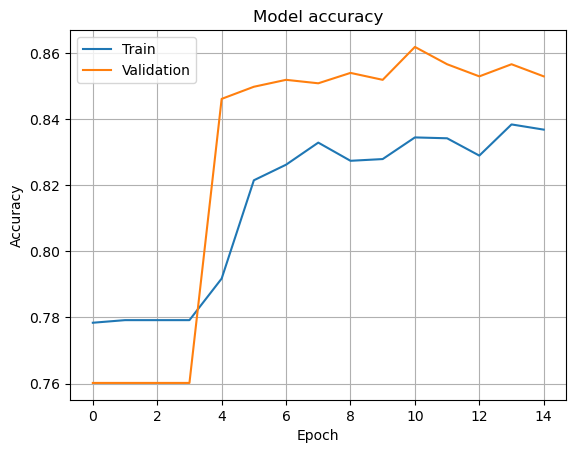

In [40]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()


Looking at the Training vs Validation Accuracy, we can say that the model performs well on both datasets giving an accuracy of around 82%. 

This means that the model captures the underlying patterns quite well in our scenarios.

We will also look at the Classification report to better understand the accuracy of our model.

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
# Evaluate the model
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {accuracy}")

y_pred_probs = model.predict(test_dataset)
y_pred = (y_pred_probs > 0.5).astype(int)

print(classification_report(y_test, y_pred))


1194/1194 [==============================] - 3s 3ms/step - loss: 0.3288 - accuracy: 0.8580
Test Accuracy: 0.8580402135848999
1194/1194 [==============================] - 3s 2ms/step
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1886
           1       0.67      0.64      0.65       502

    accuracy                           0.86      2388
   macro avg       0.79      0.78      0.78      2388
weighted avg       0.86      0.86      0.86      2388



The classification model demonstrates strong performance with an overall accuracy of **86%**. It performs exceptionally well for class 0 with a **precision of 91%** and a **recall of 92%**, resulting in a high **F1-score of 91%**. However, for class 1, the model's performance drops significantly, with a **precision of 67%** and a **recall of only 64%**, yielding a lower **F1-score of 65%**. The macro average metrics indicate a moderate balance between classes, highlighting the model's difficulty in effectively identifying class 1. Here class 1 indicates that the batsman wiill score more than 30 runs in the upcoming match, while class 0 indicates that less than 30 runs will be scored.

## Neural Network for Bowler Performance Prediction

In [42]:
bowling_df['atleast_1_wicket_taken'] = (bowling_df['wickets'] >= 1).astype(int)

We need to create new metrics which will help us in predicting whether the bowler will take atleast 1 wicket in the upcoming match.

These metrics are created using the recent matches playerd by the bowler.

In [43]:
# Aggregating player bowling statistics
player_bowling = bowling_df.groupby(['name', 'season']).agg(
    total_overs=('overs', 'sum'),
    total_maiden=('maidens', 'sum'),
    total_conceded=('conceded', 'sum'),
    total_wickets=('wickets', 'sum'),
    matches=('match_id', 'nunique')
).reset_index()


player_bowling['average_conceded'] = player_bowling['total_conceded'] / player_bowling['matches']
player_bowling['average_wickets'] = player_bowling['total_wickets'] / player_bowling['matches']
player_bowling['average_economy_rate'] = player_bowling['total_conceded'] / player_bowling['total_overs']

# Adding recent form (last 5 matches)
recent_form = bowling_df.groupby(['name', 'match_id']).agg(
    conceded=('conceded', 'sum'),
    wickets = ('wickets','sum')
).reset_index()

recent_form['recent_avg_conceded'] = recent_form.groupby('name')['conceded'].rolling(5, min_periods=1).mean().reset_index(level=0, drop=True)
recent_form['recent_wickets_taken'] = recent_form.groupby('name')['wickets'].rolling(5, min_periods=1).mean().reset_index(level=0, drop=True)



In [44]:
# Merge columns from summary_df into batting_df
bowling_df = bowling_df.merge(summary_df[['match_id', 'season', 'toss_won', 'decision', 'home_overs', 'home_runs', 'home_wickets','away_overs','away_runs',
                                          'away_wickets', 'winner']], on=['match_id', 'season'])

# Merge aggregated data with recent form
bowling_df = bowling_df.merge(player_bowling[['name', 'season', 'average_conceded', 'average_wickets', 'average_economy_rate']], on=['name', 'season'])
bowling_df = bowling_df.merge(recent_form[['name', 'match_id', 'recent_avg_conceded','recent_wickets_taken']], on=['name', 'match_id'])



In [45]:
bowling_df['captain'] = bowling_df['captain'].replace({True: 1, False: 0})

In [46]:
# Create features for the model
features = ['home_team','away_team','bowling_team','venue','innings_id','fullName','captain','average_conceded', 'average_wickets', 'average_economy_rate', 'recent_avg_conceded','recent_wickets_taken','toss_won','decision']

X = bowling_df[features]
y = bowling_df['atleast_1_wicket_taken']

In [47]:
numerical_columns = [
                    'innings_id', 'captain', 
                    'average_conceded', 'average_wickets', 'average_economy_rate', 'recent_avg_conceded','recent_wickets_taken'
                    ]
categorical_columns = [
    'home_team','away_team','venue','bowling_team','fullName',
                    'toss_won','decision'
]
# Define column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

pipeline.fit(X)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['innings_id', 'captain',
                                                   'average_conceded',
                                                   'average_wickets',
                                                   'average_economy_rate',
                                                   'recent_avg_conceded',
                                                   'recent_wickets_taken']),
                                                 ('cat', OneHotEncoder(),
                                                  ['home_team', 'away_team',
                                                   'venue', 'bowling_team',
                                                   'fullName', 'toss_won',
                                                   'decision'])]))])

In [48]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [49]:
# Fit and transform the training data, transform the test data
X_train_transformed = pipeline.transform(X_train)
X_val_transformed = pipeline.transform(X_val)
X_test_transformed = pipeline.transform(X_test)

X_train_transformed = X_train_transformed.toarray()
X_val_transformed = X_val_transformed.toarray()
X_test_transformed = X_test_transformed.toarray()

In [50]:
# Convert to TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_transformed, y_train)).batch(2)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_transformed, y_val)).batch(2)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_transformed, y_test)).batch(2)

We will create a Sequential Fully Connected Model with **1 hidden layer** with 5 nodes.

In [51]:
 # Neural Network Model
model = Sequential([
    Dense(5, activation='relu', input_shape=(X_train_transformed.shape[1],)),
    Dropout(0.5),
    # Dense(64, activation='relu'),
    # Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


We will visualize this Neural Network model


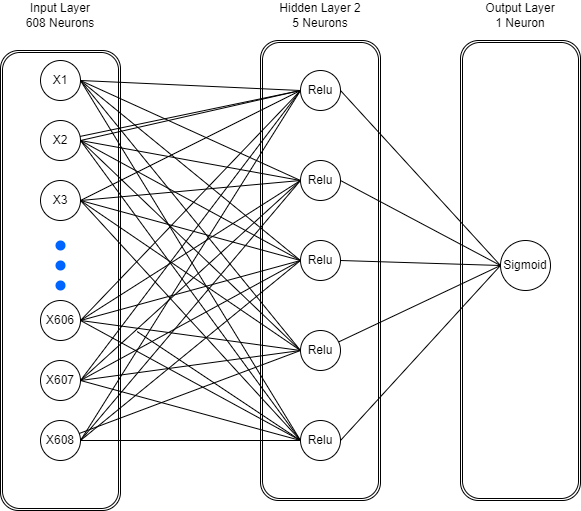

In [52]:
# encoded_string
encoded_string = 'iVBORw0KGgoAAAANSUhEUgAAAkUAAAH/CAYAAABZx6lPAAAAAXNSR0IArs4c6QAAoEh0RVh0bXhmaWxlACUzQ214ZmlsZSUyMGhvc3QlM0QlMjJhcHAuZGlhZ3JhbXMubmV0JTIyJTIwbW9kaWZpZWQlM0QlMjIyMDI0LTA2LTI1VDEzJTNBMjIlM0E0MS4zMTNaJTIyJTIwYWdlbnQlM0QlMjJNb3ppbGxhJTJGNS4wJTIwKFdpbmRvd3MlMjBOVCUyMDEwLjAlM0IlMjBXaW42NCUzQiUyMHg2NCklMjBBcHBsZVdlYktpdCUyRjUzNy4zNiUyMChLSFRNTCUyQyUyMGxpa2UlMjBHZWNrbyklMjBDaHJvbWUlMkYxMjYuMC4wLjAlMjBTYWZhcmklMkY1MzcuMzYlMjIlMjBldGFnJTNEJTIySjRfMWFHaDNVWEV2SEJmSnZ3UHclMjIlMjB2ZXJzaW9uJTNEJTIyMjQuNi4yJTIyJTIwdHlwZSUzRCUyMmRldmljZSUyMiUyMHNjYWxlJTNEJTIyMSUyMiUyMGJvcmRlciUzRCUyMjAlMjIlM0UlMEElMjAlMjAlM0NkaWFncmFtJTIwbmFtZSUzRCUyMlBhZ2UtMSUyMiUyMGlkJTNEJTIyWDhTUG9rQUJtZVVCSHFER0N0bS0lMjIlM0UlMEElMjAlMjAlMjAlMjAlM0NteEdyYXBoTW9kZWwlMjBkeCUzRCUyMjEwNTAlMjIlMjBkeSUzRCUyMjU1NyUyMiUyMGdyaWQlM0QlMjIxJTIyJTIwZ3JpZFNpemUlM0QlMjIxMCUyMiUyMGd1aWRlcyUzRCUyMjElMjIlMjB0b29sdGlwcyUzRCUyMjElMjIlMjBjb25uZWN0JTNEJTIyMSUyMiUyMGFycm93cyUzRCUyMjElMjIlMjBmb2xkJTNEJTIyMSUyMiUyMHBhZ2UlM0QlMjIxJTIyJTIwcGFnZVNjYWxlJTNEJTIyMSUyMiUyMHBhZ2VXaWR0aCUzRCUyMjg1MCUyMiUyMHBhZ2VIZWlnaHQlM0QlMjIxMTAwJTIyJTIwbWF0aCUzRCUyMjAlMjIlMjBzaGFkb3clM0QlMjIwJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTNDcm9vdCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIyMCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIyMSUyMiUyMHBhcmVudCUzRCUyMjAlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTEwJTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMnNoYXBlJTNEZXh0JTNCZG91YmxlJTNEMSUzQnJvdW5kZWQlM0QxJTNCd2hpdGVTcGFjZSUzRHdyYXAlM0JodG1sJTNEMSUzQiUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjB2ZXJ0ZXglM0QlMjIxJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHglM0QlMjIyMjAlMjIlMjB5JTNEJTIyNzAlMjIlMjB3aWR0aCUzRCUyMjEyMCUyMiUyMGhlaWdodCUzRCUyMjQ2MCUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTIwJTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmdyb3VwJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHZlcnRleCUzRCUyMjElMjIlMjBjb25uZWN0YWJsZSUzRCUyMjAlMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIweCUzRCUyMjI2MCUyMiUyMHklM0QlMjI4MCUyMiUyMHdpZHRoJTNEJTIyNDAlMjIlMjBoZWlnaHQlM0QlMjI0MDAlMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0xJTIyJTIwdmFsdWUlM0QlMjJYMSUyMiUyMHN0eWxlJTNEJTIyZWxsaXBzZSUzQndoaXRlU3BhY2UlM0R3cmFwJTNCaHRtbCUzRDElM0Jhc3BlY3QlM0RmaXhlZCUzQiUyMiUyMHBhcmVudCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTIwJTIyJTIwdmVydGV4JTNEJTIyMSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB3aWR0aCUzRCUyMjQwJTIyJTIwaGVpZ2h0JTNEJTIyNDAlMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0yJTIyJTIwdmFsdWUlM0QlMjJYMiUyMiUyMHN0eWxlJTNEJTIyZWxsaXBzZSUzQndoaXRlU3BhY2UlM0R3cmFwJTNCaHRtbCUzRDElM0Jhc3BlY3QlM0RmaXhlZCUzQiUyMiUyMHBhcmVudCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTIwJTIyJTIwdmVydGV4JTNEJTIyMSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB5JTNEJTIyNjAlMjIlMjB3aWR0aCUzRCUyMjQwJTIyJTIwaGVpZ2h0JTNEJTIyNDAlMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zJTIyJTIwdmFsdWUlM0QlMjJYNjA2JTIyJTIwc3R5bGUlM0QlMjJlbGxpcHNlJTNCd2hpdGVTcGFjZSUzRHdyYXAlM0JodG1sJTNEMSUzQmFzcGVjdCUzRGZpeGVkJTNCJTIyJTIwcGFyZW50JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjAlMjIlMjB2ZXJ0ZXglM0QlMjIxJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHklM0QlMjIyNDAlMjIlMjB3aWR0aCUzRCUyMjQwJTIyJTIwaGVpZ2h0JTNEJTIyNDAlMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy00JTIyJTIwdmFsdWUlM0QlMjJYNjA3JTIyJTIwc3R5bGUlM0QlMjJlbGxpcHNlJTNCd2hpdGVTcGFjZSUzRHdyYXAlM0JodG1sJTNEMSUzQmFzcGVjdCUzRGZpeGVkJTNCJTIyJTIwcGFyZW50JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjAlMjIlMjB2ZXJ0ZXglM0QlMjIxJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHklM0QlMjIzMDAlMjIlMjB3aWR0aCUzRCUyMjQwJTIyJTIwaGVpZ2h0JTNEJTIyNDAlMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy01JTIyJTIwdmFsdWUlM0QlMjJYNjA4JTIyJTIwc3R5bGUlM0QlMjJlbGxpcHNlJTNCd2hpdGVTcGFjZSUzRHdyYXAlM0JodG1sJTNEMSUzQmFzcGVjdCUzRGZpeGVkJTNCJTIyJTIwcGFyZW50JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjAlMjIlMjB2ZXJ0ZXglM0QlMjIxJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHklM0QlMjIzNjAlMjIlMjB3aWR0aCUzRCUyMjQwJTIyJTIwaGVpZ2h0JTNEJTIyNDAlMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy02JTIyJTIwdmFsdWUlM0QlMjJYMyUyMiUyMHN0eWxlJTNEJTIyZWxsaXBzZSUzQndoaXRlU3BhY2UlM0R3cmFwJTNCaHRtbCUzRDElM0Jhc3BlY3QlM0RmaXhlZCUzQiUyMiUyMHBhcmVudCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTIwJTIyJTIwdmVydGV4JTNEJTIyMSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB5JTNEJTIyMTIwJTIyJTIwd2lkdGglM0QlMjI0MCUyMiUyMGhlaWdodCUzRCUyMjQwJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtNyUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJzaGFwZSUzRGVsbGlwc2UlM0JmaWxsQ29sb3IlM0QlMjMwMDY1RkYlM0JzdHJva2VDb2xvciUzRG5vbmUlM0JodG1sJTNEMSUzQnNrZXRjaCUzRDAlM0IlMjIlMjBwYXJlbnQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0yMCUyMiUyMHZlcnRleCUzRCUyMjElMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIweCUzRCUyMjE1JTIyJTIweSUzRCUyMjE4MCUyMiUyMHdpZHRoJTNEJTIyMTAlMjIlMjBoZWlnaHQlM0QlMjIxMCUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTglMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyc2hhcGUlM0RlbGxpcHNlJTNCZmlsbENvbG9yJTNEJTIzMDA2NUZGJTNCc3Ryb2tlQ29sb3IlM0Rub25lJTNCaHRtbCUzRDElM0Jza2V0Y2glM0QwJTNCJTIyJTIwcGFyZW50JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMjAlMjIlMjB2ZXJ0ZXglM0QlMjIxJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHglM0QlMjIxNSUyMiUyMHklM0QlMjIyMDAlMjIlMjB3aWR0aCUzRCUyMjEwJTIyJTIwaGVpZ2h0JTNEJTIyMTAlMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy05JTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMnNoYXBlJTNEZWxsaXBzZSUzQmZpbGxDb2xvciUzRCUyMzAwNjVGRiUzQnN0cm9rZUNvbG9yJTNEbm9uZSUzQmh0bWwlM0QxJTNCc2tldGNoJTNEMCUzQiUyMiUyMHBhcmVudCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTIwJTIyJTIwdmVydGV4JTNEJTIyMSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB4JTNEJTIyMTUlMjIlMjB5JTNEJTIyMjIwJTIyJTIwd2lkdGglM0QlMjIxMCUyMiUyMGhlaWdodCUzRCUyMjEwJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMzIlMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyc2hhcGUlM0RleHQlM0Jkb3VibGUlM0QxJTNCcm91bmRlZCUzRDElM0J3aGl0ZVNwYWNlJTNEd3JhcCUzQmh0bWwlM0QxJTNCJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHZlcnRleCUzRCUyMjElMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIweCUzRCUyMjQ4MCUyMiUyMHklM0QlMjI2MCUyMiUyMHdpZHRoJTNEJTIyMTIwJTIyJTIwaGVpZ2h0JTNEJTIyNDYwJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtNDMlMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyc2hhcGUlM0RleHQlM0Jkb3VibGUlM0QxJTNCcm91bmRlZCUzRDElM0J3aGl0ZVNwYWNlJTNEd3JhcCUzQmh0bWwlM0QxJTNCJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHZlcnRleCUzRCUyMjElMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIweCUzRCUyMjY4MCUyMiUyMHklM0QlMjI2MCUyMiUyMHdpZHRoJTNEJTIyMTIwJTIyJTIwaGVpZ2h0JTNEJTIyNDYwJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtNTQlMjIlMjB2YWx1ZSUzRCUyMklucHV0JTIwTGF5ZXIlMjZsdCUzQmRpdiUyNmd0JTNCNjA4JTIwTmV1cm9ucyUyNmx0JTNCJTJGZGl2JTI2Z3QlM0IlMjIlMjBzdHlsZSUzRCUyMnRleHQlM0JodG1sJTNEMSUzQmFsaWduJTNEY2VudGVyJTNCdmVydGljYWxBbGlnbiUzRG1pZGRsZSUzQndoaXRlU3BhY2UlM0R3cmFwJTNCcm91bmRlZCUzRDAlM0IlMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwdmVydGV4JTNEJTIyMSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB4JTNEJTIyMjM1JTIyJTIweSUzRCUyMjIwJTIyJTIwd2lkdGglM0QlMjI5MCUyMiUyMGhlaWdodCUzRCUyMjMwJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtNTYlMjIlMjB2YWx1ZSUzRCUyMkhpZGRlbiUyMExheWVyJTIwMiUyNmx0JTNCZGl2JTI2Z3QlM0I1JTIwTmV1cm9ucyUyNmx0JTNCJTJGZGl2JTI2Z3QlM0IlMjIlMjBzdHlsZSUzRCUyMnRleHQlM0JodG1sJTNEMSUzQmFsaWduJTNEY2VudGVyJTNCdmVydGljYWxBbGlnbiUzRG1pZGRsZSUzQndoaXRlU3BhY2UlM0R3cmFwJTNCcm91bmRlZCUzRDAlM0IlMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwdmVydGV4JTNEJTIyMSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB4JTNEJTIyNDk1JTIyJTIweSUzRCUyMjIwJTIyJTIwd2lkdGglM0QlMjI5MCUyMiUyMGhlaWdodCUzRCUyMjMwJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtNTclMjIlMjB2YWx1ZSUzRCUyMk91dHB1dCUyMExheWVyJTI2bHQlM0JkaXYlMjZndCUzQjElMjBOZXVyb24lMjZsdCUzQiUyRmRpdiUyNmd0JTNCJTIyJTIwc3R5bGUlM0QlMjJ0ZXh0JTNCaHRtbCUzRDElM0JhbGlnbiUzRGNlbnRlciUzQnZlcnRpY2FsQWxpZ24lM0RtaWRkbGUlM0J3aGl0ZVNwYWNlJTNEd3JhcCUzQnJvdW5kZWQlM0QwJTNCJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHZlcnRleCUzRCUyMjElMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIweCUzRCUyMjY5NSUyMiUyMHklM0QlMjIyMCUyMiUyMHdpZHRoJTNEJTIyOTAlMjIlMjBoZWlnaHQlM0QlMjIzMCUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTQ1JTIyJTIwdmFsdWUlM0QlMjJTaWdtb2lkJTIyJTIwc3R5bGUlM0QlMjJlbGxpcHNlJTNCd2hpdGVTcGFjZSUzRHdyYXAlM0JodG1sJTNEMSUzQmFzcGVjdCUzRGZpeGVkJTNCJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHZlcnRleCUzRCUyMjElMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIweCUzRCUyMjcyMCUyMiUyMHklM0QlMjIyNjAlMjIlMjB3aWR0aCUzRCUyMjUwJTIyJTIwaGVpZ2h0JTNEJTIyNTAlMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy05NiUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0JleGl0WCUzRDElM0JleGl0WSUzRDAuNSUzQmV4aXREeCUzRDAlM0JleGl0RHklM0QwJTNCJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHNvdXJjZSUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTElMjIlMjB0YXJnZXQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zNCUyMiUyMGVkZ2UlM0QlMjIxJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjM2MCUyMiUyMHklM0QlMjIxMDAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI1ODAlMjIlMjB5JTNEJTIyOTAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtOTclMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyZW5kQXJyb3clM0Rub25lJTNCaHRtbCUzRDElM0Jyb3VuZGVkJTNEMCUzQmVudHJ5WCUzRDAlM0JlbnRyeVklM0QwLjUlM0JlbnRyeUR4JTNEMCUzQmVudHJ5RHklM0QwJTNCZXhpdFglM0QxJTNCZXhpdFklM0QwLjUlM0JleGl0RHglM0QwJTNCZXhpdER5JTNEMCUzQiUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zNCUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTQ1JTIyJTIwZWRnZSUzRCUyMjElMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMTgwJTIyJTIweSUzRCUyMjEyMCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjM0MCUyMiUyMHklM0QlMjIxMjAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtOTglMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyZW5kQXJyb3clM0Rub25lJTNCaHRtbCUzRDElM0Jyb3VuZGVkJTNEMCUzQmVudHJ5WCUzRDAlM0JlbnRyeVklM0QwLjUlM0JlbnRyeUR4JTNEMCUzQmVudHJ5RHklM0QwJTNCZXhpdFglM0QxJTNCZXhpdFklM0QwLjUlM0JleGl0RHglM0QwJTNCZXhpdER5JTNEMCUzQiUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zNSUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTQ1JTIyJTIwZWRnZSUzRCUyMjElMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMTkwJTIyJTIweSUzRCUyMjEzMCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjM1MCUyMiUyMHklM0QlMjIxMzAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtOTklMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyZW5kQXJyb3clM0Rub25lJTNCaHRtbCUzRDElM0Jyb3VuZGVkJTNEMCUzQmVudHJ5WCUzRDAlM0JlbnRyeVklM0QwLjUlM0JlbnRyeUR4JTNEMCUzQmVudHJ5RHklM0QwJTNCZXhpdFglM0QxJTNCZXhpdFklM0QwLjUlM0JleGl0RHglM0QwJTNCZXhpdER5JTNEMCUzQiUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zOSUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTQ1JTIyJTIwZWRnZSUzRCUyMjElMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMjAwJTIyJTIweSUzRCUyMjE0MCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjM2MCUyMiUyMHklM0QlMjIxNDAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMTAwJTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JleGl0WCUzRDAlM0JleGl0WSUzRDAuNSUzQmV4aXREeCUzRDAlM0JleGl0RHklM0QwJTNCJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHNvdXJjZSUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTQ1JTIyJTIwdGFyZ2V0JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMzYlMjIlMjBlZGdlJTNEJTIyMSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB3aWR0aCUzRCUyMjUwJTIyJTIwaGVpZ2h0JTNEJTIyNTAlMjIlMjByZWxhdGl2ZSUzRCUyMjElMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjIyMTAlMjIlMjB5JTNEJTIyMTUwJTIyJTIwYXMlM0QlMjJzb3VyY2VQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyNTYwJTIyJTIweSUzRCUyMjM0MCUyMiUyMGFzJTNEJTIydGFyZ2V0UG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteEdlb21ldHJ5JTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zNCUyMiUyMHZhbHVlJTNEJTIyUmVsdSUyMiUyMHN0eWxlJTNEJTIyZWxsaXBzZSUzQndoaXRlU3BhY2UlM0R3cmFwJTNCaHRtbCUzRDElM0Jhc3BlY3QlM0RmaXhlZCUzQiUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjB2ZXJ0ZXglM0QlMjIxJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHglM0QlMjI1MjAlMjIlMjB5JTNEJTIyOTAlMjIlMjB3aWR0aCUzRCUyMjQwJTIyJTIwaGVpZ2h0JTNEJTIyNDAlMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zNSUyMiUyMHZhbHVlJTNEJTIyUmVsdSUyMiUyMHN0eWxlJTNEJTIyZWxsaXBzZSUzQndoaXRlU3BhY2UlM0R3cmFwJTNCaHRtbCUzRDElM0Jhc3BlY3QlM0RmaXhlZCUzQiUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjB2ZXJ0ZXglM0QlMjIxJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHglM0QlMjI1MjAlMjIlMjB5JTNEJTIyMTgwJTIyJTIwd2lkdGglM0QlMjI0MCUyMiUyMGhlaWdodCUzRCUyMjQwJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMzYlMjIlMjB2YWx1ZSUzRCUyMlJlbHUlMjIlMjBzdHlsZSUzRCUyMmVsbGlwc2UlM0J3aGl0ZVNwYWNlJTNEd3JhcCUzQmh0bWwlM0QxJTNCYXNwZWN0JTNEZml4ZWQlM0IlMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwdmVydGV4JTNEJTIyMSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB4JTNEJTIyNTIwJTIyJTIweSUzRCUyMjM1MCUyMiUyMHdpZHRoJTNEJTIyNDAlMjIlMjBoZWlnaHQlM0QlMjI0MCUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTM4JTIyJTIwdmFsdWUlM0QlMjJSZWx1JTIyJTIwc3R5bGUlM0QlMjJlbGxpcHNlJTNCd2hpdGVTcGFjZSUzRHdyYXAlM0JodG1sJTNEMSUzQmFzcGVjdCUzRGZpeGVkJTNCJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHZlcnRleCUzRCUyMjElMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIweCUzRCUyMjUyMCUyMiUyMHklM0QlMjI0NDAlMjIlMjB3aWR0aCUzRCUyMjQwJTIyJTIwaGVpZ2h0JTNEJTIyNDAlMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zOSUyMiUyMHZhbHVlJTNEJTIyUmVsdSUyMiUyMHN0eWxlJTNEJTIyZWxsaXBzZSUzQndoaXRlU3BhY2UlM0R3cmFwJTNCaHRtbCUzRDElM0Jhc3BlY3QlM0RmaXhlZCUzQiUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjB2ZXJ0ZXglM0QlMjIxJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHglM0QlMjI1MjAlMjIlMjB5JTNEJTIyMjYwJTIyJTIwd2lkdGglM0QlMjI0MCUyMiUyMGhlaWdodCUzRCUyMjQwJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMTAxJTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QxJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMCUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtNDUlMjIlMjB0YXJnZXQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zOCUyMiUyMGVkZ2UlM0QlMjIxJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjIyMCUyMiUyMHklM0QlMjIxNjAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjIzODAlMjIlMjB5JTNEJTIyMTYwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTEwMiUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0JleGl0WCUzRDElM0JleGl0WSUzRDAuNSUzQmV4aXREeCUzRDAlM0JleGl0RHklM0QwJTNCJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHNvdXJjZSUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTElMjIlMjB0YXJnZXQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zNSUyMiUyMGVkZ2UlM0QlMjIxJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjM2MCUyMiUyMHklM0QlMjIxMDAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI1MzAlMjIlMjB5JTNEJTIyMTIwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTEwMyUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0JleGl0WCUzRDElM0JleGl0WSUzRDAuNSUzQmV4aXREeCUzRDAlM0JleGl0RHklM0QwJTNCJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHNvdXJjZSUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTElMjIlMjB0YXJnZXQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zOSUyMiUyMGVkZ2UlM0QlMjIxJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjM2MCUyMiUyMHklM0QlMjIxMDAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI1NDAlMjIlMjB5JTNEJTIyMTMwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTEwNCUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0JleGl0WCUzRDElM0JleGl0WSUzRDAuNSUzQmV4aXREeCUzRDAlM0JleGl0RHklM0QwJTNCJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHNvdXJjZSUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTElMjIlMjB0YXJnZXQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zNiUyMiUyMGVkZ2UlM0QlMjIxJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjM2MCUyMiUyMHklM0QlMjIxMDAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI1NTAlMjIlMjB5JTNEJTIyMTQwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTEwNiUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0JleGl0WCUzRDElM0JleGl0WSUzRDAuNSUzQmV4aXREeCUzRDAlM0JleGl0RHklM0QwJTNCJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHNvdXJjZSUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTElMjIlMjB0YXJnZXQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zOCUyMiUyMGVkZ2UlM0QlMjIxJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjM2MCUyMiUyMHklM0QlMjIxMDAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI1NjAlMjIlMjB5JTNEJTIyMTUwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTEwNyUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0JleGl0WCUzRDElM0JleGl0WSUzRDAuNSUzQmV4aXREeCUzRDAlM0JleGl0RHklM0QwJTNCJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHNvdXJjZSUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTIlMjIlMjB0YXJnZXQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zNCUyMiUyMGVkZ2UlM0QlMjIxJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjM2MCUyMiUyMHklM0QlMjIxNjAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI1NzAlMjIlMjB5JTNEJTIyMTYwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTEwOCUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0IlMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMiUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTM0JTIyJTIwZWRnZSUzRCUyMjElMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMzYwJTIyJTIweSUzRCUyMjE2MCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjU4MCUyMiUyMHklM0QlMjIxNzAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMTA5JTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMiUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTM4JTIyJTIwZWRnZSUzRCUyMjElMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMzYwJTIyJTIweSUzRCUyMjE2MCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjU5MCUyMiUyMHklM0QlMjIxODAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMTEwJTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwdGFyZ2V0JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMzYlMjIlMjBlZGdlJTNEJTIyMSUyMiUyMHNvdXJjZSUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTIlMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMzYwJTIyJTIweSUzRCUyMjE2MCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjYwMCUyMiUyMHklM0QlMjIxOTAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMTExJTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMiUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTM5JTIyJTIwZWRnZSUzRCUyMjElMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMzU2LjY0MTAwNTg4Njc0NzA1JTIyJTIweSUzRCUyMjE3MS4wOTQwMDM5MjQ0OTglMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI2MTAlMjIlMjB5JTNEJTIyMjAwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTExMiUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0JleGl0WCUzRDElM0JleGl0WSUzRDAuNSUzQmV4aXREeCUzRDAlM0JleGl0RHklM0QwJTNCJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHNvdXJjZSUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTIlMjIlMjB0YXJnZXQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zNSUyMiUyMGVkZ2UlM0QlMjIxJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjM1OS41MjM3NDEyMDM2NjgzNSUyMiUyMHklM0QlMjIxNjQuMzM4NjA5MTU2MzcwNyUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjYyMCUyMiUyMHklM0QlMjIyMTAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMTEzJTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtNiUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTM0JTIyJTIwZWRnZSUzRCUyMjElMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMzYwJTIyJTIweSUzRCUyMjIyMCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjYzMCUyMiUyMHklM0QlMjIyMjAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMTE0JTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtNiUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTM1JTIyJTIwZWRnZSUzRCUyMjElMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMzYwJTIyJTIweSUzRCUyMjIyMCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjY0MCUyMiUyMHklM0QlMjIyMzAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMTE1JTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtNiUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTM5JTIyJTIwZWRnZSUzRCUyMjElMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMzYwJTIyJTIweSUzRCUyMjIyMCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjY1MCUyMiUyMHklM0QlMjIyNDAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMTE2JTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtNiUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTM2JTIyJTIwZWRnZSUzRCUyMjElMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMzYwJTIyJTIweSUzRCUyMjIyMCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjY2MCUyMiUyMHklM0QlMjIyNTAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMTE3JTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtNiUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTM4JTIyJTIwZWRnZSUzRCUyMjElMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMzYwJTIyJTIweSUzRCUyMjIyMCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjY3MCUyMiUyMHklM0QlMjIyNjAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMTE4JTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMyUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTM0JTIyJTIwZWRnZSUzRCUyMjElMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMzYwJTIyJTIweSUzRCUyMjM0MCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjY4MCUyMiUyMHklM0QlMjIyNzAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMTE5JTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMyUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTM1JTIyJTIwZWRnZSUzRCUyMjElMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMzYwJTIyJTIweSUzRCUyMjM0MCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjY5MCUyMiUyMHklM0QlMjIyODAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMTIwJTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMyUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTM5JTIyJTIwZWRnZSUzRCUyMjElMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMzYwJTIyJTIweSUzRCUyMjM0MCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjcwMCUyMiUyMHklM0QlMjIyOTAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMTIxJTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQmV4aXRYJTNEMSUzQmV4aXRZJTNEMC41JTNCZXhpdER4JTNEMCUzQmV4aXREeSUzRDAlM0IlMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMyUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTM2JTIyJTIwZWRnZSUzRCUyMjElMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteEdlb21ldHJ5JTIwd2lkdGglM0QlMjI1MCUyMiUyMGhlaWdodCUzRCUyMjUwJTIyJTIwcmVsYXRpdmUlM0QlMjIxJTIyJTIwYXMlM0QlMjJnZW9tZXRyeSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyMzYwJTIyJTIweSUzRCUyMjM0MCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjcxMCUyMiUyMHklM0QlMjIzMDAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMTIyJTIyJTIwdmFsdWUlM0QlMjIlMjIlMjBzdHlsZSUzRCUyMmVuZEFycm93JTNEbm9uZSUzQmh0bWwlM0QxJTNCcm91bmRlZCUzRDAlM0JlbnRyeVglM0QwJTNCZW50cnlZJTNEMC41JTNCZW50cnlEeCUzRDAlM0JlbnRyeUR5JTNEMCUzQiUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjB0YXJnZXQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zOCUyMiUyMGVkZ2UlM0QlMjIxJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjM1Ni42NDEwMDU4ODY3NDcwNSUyMiUyMHklM0QlMjIzNTEuMDk0MDAzOTI0NDk4JTIyJTIwYXMlM0QlMjJzb3VyY2VQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyNzIwJTIyJTIweSUzRCUyMjMxMCUyMiUyMGFzJTNEJTIydGFyZ2V0UG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteEdlb21ldHJ5JTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0xMjMlMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyZW5kQXJyb3clM0Rub25lJTNCaHRtbCUzRDElM0Jyb3VuZGVkJTNEMCUzQmVudHJ5WCUzRDAlM0JlbnRyeVklM0QwLjUlM0JlbnRyeUR4JTNEMCUzQmVudHJ5RHklM0QwJTNCZXhpdFglM0QxJTNCZXhpdFklM0QwLjUlM0JleGl0RHglM0QwJTNCZXhpdER5JTNEMCUzQiUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy00JTIyJTIwdGFyZ2V0JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMzQlMjIlMjBlZGdlJTNEJTIyMSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB3aWR0aCUzRCUyMjUwJTIyJTIwaGVpZ2h0JTNEJTIyNTAlMjIlMjByZWxhdGl2ZSUzRCUyMjElMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjIzNjAlMjIlMjB5JTNEJTIyNDAwJTIyJTIwYXMlM0QlMjJzb3VyY2VQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyNzMwJTIyJTIweSUzRCUyMjMyMCUyMiUyMGFzJTNEJTIydGFyZ2V0UG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteEdlb21ldHJ5JTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0xMjQlMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyZW5kQXJyb3clM0Rub25lJTNCaHRtbCUzRDElM0Jyb3VuZGVkJTNEMCUzQmVudHJ5WCUzRDAlM0JlbnRyeVklM0QwLjUlM0JlbnRyeUR4JTNEMCUzQmVudHJ5RHklM0QwJTNCZXhpdFglM0QxJTNCZXhpdFklM0QwLjUlM0JleGl0RHglM0QwJTNCZXhpdER5JTNEMCUzQiUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy00JTIyJTIwdGFyZ2V0JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMzUlMjIlMjBlZGdlJTNEJTIyMSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB3aWR0aCUzRCUyMjUwJTIyJTIwaGVpZ2h0JTNEJTIyNTAlMjIlMjByZWxhdGl2ZSUzRCUyMjElMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjIzNjAlMjIlMjB5JTNEJTIyNDAwJTIyJTIwYXMlM0QlMjJzb3VyY2VQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyNzQwJTIyJTIweSUzRCUyMjMzMCUyMiUyMGFzJTNEJTIydGFyZ2V0UG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteEdlb21ldHJ5JTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0xMjUlMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyZW5kQXJyb3clM0Rub25lJTNCaHRtbCUzRDElM0Jyb3VuZGVkJTNEMCUzQmVudHJ5WCUzRDAlM0JlbnRyeVklM0QwLjUlM0JlbnRyeUR4JTNEMCUzQmVudHJ5RHklM0QwJTNCZXhpdFglM0QxJTNCZXhpdFklM0QwLjUlM0JleGl0RHglM0QwJTNCZXhpdER5JTNEMCUzQiUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy00JTIyJTIwdGFyZ2V0JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMzklMjIlMjBlZGdlJTNEJTIyMSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB3aWR0aCUzRCUyMjUwJTIyJTIwaGVpZ2h0JTNEJTIyNTAlMjIlMjByZWxhdGl2ZSUzRCUyMjElMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjIzNjAlMjIlMjB5JTNEJTIyNDAwJTIyJTIwYXMlM0QlMjJzb3VyY2VQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyNzUwJTIyJTIweSUzRCUyMjM0MCUyMiUyMGFzJTNEJTIydGFyZ2V0UG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteEdlb21ldHJ5JTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0xMjYlMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyZW5kQXJyb3clM0Rub25lJTNCaHRtbCUzRDElM0Jyb3VuZGVkJTNEMCUzQmVudHJ5WCUzRDAlM0JlbnRyeVklM0QwLjUlM0JlbnRyeUR4JTNEMCUzQmVudHJ5RHklM0QwJTNCZXhpdFglM0QxJTNCZXhpdFklM0QwLjUlM0JleGl0RHglM0QwJTNCZXhpdER5JTNEMCUzQiUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy00JTIyJTIwdGFyZ2V0JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMzYlMjIlMjBlZGdlJTNEJTIyMSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB3aWR0aCUzRCUyMjUwJTIyJTIwaGVpZ2h0JTNEJTIyNTAlMjIlMjByZWxhdGl2ZSUzRCUyMjElMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjIzNjAlMjIlMjB5JTNEJTIyNDAwJTIyJTIwYXMlM0QlMjJzb3VyY2VQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyNzYwJTIyJTIweSUzRCUyMjM1MCUyMiUyMGFzJTNEJTIydGFyZ2V0UG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteEdlb21ldHJ5JTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0xMjclMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyZW5kQXJyb3clM0Rub25lJTNCaHRtbCUzRDElM0Jyb3VuZGVkJTNEMCUzQmVudHJ5WCUzRDAlM0JlbnRyeVklM0QwLjUlM0JlbnRyeUR4JTNEMCUzQmVudHJ5RHklM0QwJTNCZXhpdFglM0QxJTNCZXhpdFklM0QwLjUlM0JleGl0RHglM0QwJTNCZXhpdER5JTNEMCUzQiUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjBzb3VyY2UlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy00JTIyJTIwdGFyZ2V0JTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMzglMjIlMjBlZGdlJTNEJTIyMSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB3aWR0aCUzRCUyMjUwJTIyJTIwaGVpZ2h0JTNEJTIyNTAlMjIlMjByZWxhdGl2ZSUzRCUyMjElMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjIzNjAlMjIlMjB5JTNEJTIyNDAwJTIyJTIwYXMlM0QlMjJzb3VyY2VQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyNzcwJTIyJTIweSUzRCUyMjM2MCUyMiUyMGFzJTNEJTIydGFyZ2V0UG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteEdlb21ldHJ5JTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0xMjglMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyZW5kQXJyb3clM0Rub25lJTNCaHRtbCUzRDElM0Jyb3VuZGVkJTNEMCUzQmVudHJ5WCUzRDAlM0JlbnRyeVklM0QwLjUlM0JlbnRyeUR4JTNEMCUzQmVudHJ5RHklM0QwJTNCZXhpdFglM0QxJTNCZXhpdFklM0QwLjUlM0JleGl0RHglM0QwJTNCZXhpdER5JTNEMCUzQiUyMiUyMHBhcmVudCUzRCUyMjElMjIlMjB0YXJnZXQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zOCUyMiUyMGVkZ2UlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtNSUyMiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214R2VvbWV0cnklMjB3aWR0aCUzRCUyMjUwJTIyJTIwaGVpZ2h0JTNEJTIyNTAlMjIlMjByZWxhdGl2ZSUzRCUyMjElMjIlMjBhcyUzRCUyMmdlb21ldHJ5JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjIzNjAlMjIlMjB5JTNEJTIyNDYwJTIyJTIwYXMlM0QlMjJzb3VyY2VQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214UG9pbnQlMjB4JTNEJTIyNzgwJTIyJTIweSUzRCUyMjM3MCUyMiUyMGFzJTNEJTIydGFyZ2V0UG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteEdlb21ldHJ5JTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhDZWxsJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhDZWxsJTIwaWQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0xMjklMjIlMjB2YWx1ZSUzRCUyMiUyMiUyMHN0eWxlJTNEJTIyZW5kQXJyb3clM0Rub25lJTNCaHRtbCUzRDElM0Jyb3VuZGVkJTNEMCUzQmVudHJ5WCUzRDAlM0JlbnRyeVklM0QwLjUlM0JlbnRyeUR4JTNEMCUzQmVudHJ5RHklM0QwJTNCJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHNvdXJjZSUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTUlMjIlMjB0YXJnZXQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zNiUyMiUyMGVkZ2UlM0QlMjIxJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjE2MCUyMiUyMHklM0QlMjI0NjAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI3OTAlMjIlMjB5JTNEJTIyMzgwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTEzMCUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0JleGl0WCUzRDElM0JleGl0WSUzRDAuNSUzQmV4aXREeCUzRDAlM0JleGl0RHklM0QwJTNCJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHNvdXJjZSUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTUlMjIlMjB0YXJnZXQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zOSUyMiUyMGVkZ2UlM0QlMjIxJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjM2MCUyMiUyMHklM0QlMjI0NjAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI4MDAlMjIlMjB5JTNEJTIyMzkwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTEzMSUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0JleGl0WCUzRDElM0JleGl0WSUzRDAuNSUzQmV4aXREeCUzRDAlM0JleGl0RHklM0QwJTNCJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHNvdXJjZSUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTUlMjIlMjB0YXJnZXQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zNSUyMiUyMGVkZ2UlM0QlMjIxJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjM2MCUyMiUyMHklM0QlMjI0NjAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI4MTAlMjIlMjB5JTNEJTIyNDAwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteENlbGwlMjBpZCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTEzMyUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0JleGl0WCUzRDElM0JleGl0WSUzRDAuNSUzQmV4aXREeCUzRDAlM0JleGl0RHklM0QwJTNCJTIyJTIwcGFyZW50JTNEJTIyMSUyMiUyMHNvdXJjZSUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTUlMjIlMjB0YXJnZXQlM0QlMjJtdExkaTB3aE5jaG85NE9hRHRIcy0zNCUyMiUyMGVkZ2UlM0QlMjIxJTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjM0OS4xNDY5NjAyNTI0MDk4JTIyJTIweSUzRCUyMjQ0Mi4yMTQyNDM5NTM2NDc4NCUyMiUyMGFzJTNEJTIyc291cmNlUG9pbnQlMjIlMjAlMkYlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjgyMCUyMiUyMHklM0QlMjI0MTAlMjIlMjBhcyUzRCUyMnRhcmdldFBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDJTJGbXhHZW9tZXRyeSUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14Q2VsbCUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQ214Q2VsbCUyMGlkJTNEJTIyTWFiMXV3Q2Y1Y0k3QmRCVERHLWQtMSUyMiUyMHZhbHVlJTNEJTIyJTIyJTIwc3R5bGUlM0QlMjJlbmRBcnJvdyUzRG5vbmUlM0JodG1sJTNEMSUzQnJvdW5kZWQlM0QwJTNCZW50cnlYJTNEMCUzQmVudHJ5WSUzRDAuNSUzQmVudHJ5RHglM0QwJTNCZW50cnlEeSUzRDAlM0JleGl0WCUzRDElM0JleGl0WSUzRDAuNSUzQmV4aXREeCUzRDAlM0JleGl0RHklM0QwJTNCJTIyJTIwZWRnZSUzRCUyMjElMjIlMjBwYXJlbnQlM0QlMjIxJTIyJTIwc291cmNlJTNEJTIybXRMZGkwd2hOY2hvOTRPYUR0SHMtMyUyMiUyMHRhcmdldCUzRCUyMm10TGRpMHdoTmNobzk0T2FEdEhzLTM4JTIyJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhHZW9tZXRyeSUyMHdpZHRoJTNEJTIyNTAlMjIlMjBoZWlnaHQlM0QlMjI1MCUyMiUyMHJlbGF0aXZlJTNEJTIyMSUyMiUyMGFzJTNEJTIyZ2VvbWV0cnklMjIlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0NteFBvaW50JTIweCUzRCUyMjM2MCUyMiUyMHklM0QlMjIxMDAlMjIlMjBhcyUzRCUyMnNvdXJjZVBvaW50JTIyJTIwJTJGJTNFJTBBJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTIwJTNDbXhQb2ludCUyMHglM0QlMjI1MjAlMjIlMjB5JTNEJTIyMTEwJTIyJTIwYXMlM0QlMjJ0YXJnZXRQb2ludCUyMiUyMCUyRiUzRSUwQSUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUyMCUzQyUyRm14R2VvbWV0cnklM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZteENlbGwlM0UlMEElMjAlMjAlMjAlMjAlMjAlMjAlM0MlMkZyb290JTNFJTBBJTIwJTIwJTIwJTIwJTNDJTJGbXhHcmFwaE1vZGVsJTNFJTBBJTIwJTIwJTNDJTJGZGlhZ3JhbSUzRSUwQSUzQyUyRm14ZmlsZSUzRSUwQYZIPAgAACAASURBVHhe7L0HuB9F9f8/IL2XAFISIIAoHUVQIdIEpUlXBJTQjEKUFoo0KQaRqlQD8gOUjok0kaKAgiKISEcQIUjoRSA0UeD/f43fuc7dbJnZnd3PzOee8zz3uZC7Ozt7ZnbmPee8zznTffDBBx8oEdGAaEA0IBoQDYgGRANDXAPTCSga4jNAXl80IBoQDYgGRAOiAa0BAUUyEUQDogHRgGhANCAaEA30EhS9/PLLauzYseqII45Qyy67bPDBOProo9XIkSPVDjvsMKhtnsu/HXbYYWrNNdcM/lxpUDQgGvifBvgOEb43I4888oj+7k877TT10ksvDfz3/PPPP0h1F154obr11lvVySefrGadddaBv4X+hunPt7/9bXXKKae0sha5zgd0dfjhh+vLP//5zyveP6sT17bkuvQ18Pbbb6t99tlHTZgwwXtOFO1/rlop259j+V5c38X3up5ZigQU+Q6VXC8aSE8DVaCobNMfSqDo97//vbrpppsGwGOe3tIbfelxXQ0Y4P/Vr3514GDPHNlzzz3VpZdeWgneBRTV1XwP3Wc2KBoxYoRGxIsuuujASemoo47SC4Q5Va6++upq3333VSuvvPLApGCS/OxnPxs4SbKIPv7449pCtOOOO2qtXHDBBYOsRVWnTNow95pncZq1n0OfzjnnHHXkkUfqZ9ho/rbbbtMWKIOm+ft0000np776c1TuTFgDVaAoaynim15rrbX0d77hhhuq119/XX/f9nc2ZswYNXny5AFrL9/al7/8ZXXvvfcOsrDQFtYo5JJLLhm0dtgqLTv5mvXi+uuv17eYdSm76bBuIFihy/rD/c8//7z61Kc+NY0FzO4TfecZYi1KePI36LrZy2wLK83Z/+66/y2xxBJ6/5prrrnU8ccfP/CNzDbbbHrvAnixZ5k9+aCDDlJnnnmmtlDZ+615nRi/lwaqnubWKCxFBhTROxbAu+++ewAR828seFtvvbVeBO3TI9flgSKuq+M+yy5EZkHfY489Brn67AXQXvRtJG/6ffrpp4ubLuSMlbaS0oAPKAIg8a3zzXz84x/XC7ZZE0444QT19NNPD6wPACcOIB/96EcHucN5Xt51pj0OXtmNpmiRN+6LUaNGDYAd42azD0r08bvf/a7adddd1bBhw0r743rSL7KSJTX40tlaGjDzzoCVIrD817/+1Wn/MwcNYyAw3+S4ceNyQRGubeZxEb0lxu+llqILbooKFJnFx7Yi0W/b32//LWvBsVF0HVCU1VG2vfXWW08v1kULoD2ZmVQx8BRCThZpSzTgqwGbJ2PfazgztqUou8ibk/AxxxyjDj744IETrf2d0aZtUbH5SrRn/63o9O3KkbDXHr7vQw45RI0fP17zoozlmIOaa3+KdOnaH9+xkOvT0EAZKMrObxejQPawb9rgoMFczVqK6oKirHa7+l5Cj2pUoChvcHhhQ8qEf9AmKMoS23i2MZcbn/+XvvSlgQXwrbfe0qdCY1o3gwMiX2211QoJpKEHUdoTDcSqAR9L0XXXXTeIWG1AEZYdrDAmOCILirAa2VLk9q4Diswp27RvuxN4Nw5KuPIQ1oLs9fx7UX/yxsy43sTCHOuMbr9fbYCiLP2DPbUNUNT199LGaCQBimyLi32KylqK7AW4jqUoa7K2F1HAGCdDIuUWXHBBvQBWMfRtMNfG4EmbooHYNeADiupaiuwF39ZHEefC1X2W5R9mv3fav/LKK/UjAW2sDdlnlvUnO3Y+RNrYx13610wDdThFRftf1lJk/h/rpm0psvfWOu6zrr+XZhouvjsJUATPYP/999dAJMspMj5648uHMFaXU2S3baxApj1UyASaOHHiIPa/PRHtUx79EVDU1rSVdlPRgA8oMtYWvt8sp2jSpEkDViRcVEWcIr5hQBK/yzgXtv6K3FXZRZ42Iaqa6B/zd4isJm1A3j1F/XHpQyrjLP0MqwGX6DMbRJftf8Z6Y4KAspwiw7Oz53cIUNTm9xJW24NbSwIUAS7mnntuzYbP5u8wnAX+nZ833nhjgJBNFFlR9FnW5WWTNvkbbX3zm99Uv/rVrwYWvLxTYNblZp5n+34l10ibU1jajlkDPqCI78Q2v/O9P/bYY9NEeRJ9RiTN5ptvPhDpaaLPXKJT8yxF5n6jS9POXXfdNRCNSn8AZDYBNs8ibUeflfXHHjc76tX8u+Qqinlmt983lzxFLvsfoN2OwuT7MSDenqsnnXSSuvPOO/Vh3gQ//fGPf5wmBYB9T6++lza13zNQ5PpSMYGLprkfXN9ZrhMNiAbi10Dbudbi14D0MAUNlLl0u+x/Kt+LgCKHWWEQO5dms+s63C6XiAZEA32mAXNaNm79Pns9eZ0+0kAMoCil7yV6UNRHc1NeRTQgGhANiAZEA6KBiDUgoCjiwZGuiQZEA6IB0YBoQDTQnQYEFHWna3mSaEA0IBoQDYgGRAMRa0BAUcSDI10TDYgGRAOiAdGAaKA7DXQKiooKJfK6JrQwW4DOvscOJbRVZHI62DmF+HtRAqzu1CtPEg2IBnw1kA35LQpNZ82ARGoXTY0pWtX3veV60UBdDVTNe/lW3DXbGSjKS2pGRfu8Iq+mdhCvQcJGk94/L+cJ15i2n3vuuUE5FQQUuU8EuVI0EIsGXKNlzEHKzkVWtTnE8o7SD9FAKA2YQ8SHP/zhQQcEu335Vty13RkoMrXDsonTjJVo5MiRA6UzDBDKFlUtqhxt8h8MHz5cvf766wNh81lQZCeGM1Ynnk817qK6a5QYQaabbjo94Uwl73vvvXdQIknathNkZZO2mfpMkpDNfXLKlUNTA66HGRb6qVOnKr7FU045RZfZyIKiIut0UQkQUzn81Vdf1Qcskrqa7Nokb0RMZmDzLJNY1v5bUVLXoTmi8tZtacBktT7yyCPVJZdcovegvGTBMX8rbemmbrudgSIWuhdeeEEXTzUZo/m32WabbRAoMYvJqFGj1FZbbaX/xn8DlMosRWPHjlUHHnig+vGPfzwAcOzF1U7lb7J1kt7cLIJFoIhMt6Y4Yzb1Ov15+umnNQizSw+YRZT299hjD0XfyBLKok2fjAWs7qDJfaKBftaAOdWadzQgJPvOJpkq/26szjYoMt+ZbWm2v9e8CuNmPTClD8yhzb7PlBbib3YJIns9oCyJ6ZOpmzh+/PjcDaufx1LerRsNVFlIY/5WZp111m6U5PiUTkGRXTfIABxAg+0is0ER/26fuLIlO8w72pkyseQY9xtVt/NcdAyCOSkec8wx6uCDDy61FJWdQk2xWvu5IHUDyLKgyHFc5DLRwJDUQPb7LyuSahb6L3zhCwNriF1zkNpnZi3gm7Q3jqK6aAYUmYNYtmK53b/VVltN2cWqbeuTDYqG5EDKS3eqAVdQFOO3MqRBkQEozJaiSr1li06V+8xYY/JQcVFtoWylYBtg0U+7qGu22nAWjOWdPDmlupDFO/2C5GGigUQ0kAVJdrftsjsGkHzjG99QP/jBD7QbAeBj3NbmPuPW5hBTZimyLcf2oc1YjnD3A4qy64Pdpm3xKrJ2JTIM0s3INeAKipjLMX4rMam3M0tR1odvA4wzzjhD5XGKJk+ePFAZGzRZVs3adlGZ61gA55xzzgEytw3KzCBkT4L2M7KgKI+vYFuKikCRPeCufImYJon0RTTQKw1kv88iUGSuo1DsU089NQCK7G/Svje7HmUrhxtQVGUpKgNFeZZsXOgiooHQGvABRTF/K6H1Uqe9zkCRbVWxOT1l0Wec5mzzNICCRc4OweWl8wrNGcvQUUcdpUFRFlAZ/79xnxkOAfcZN18WFFVxivJA0Ze+9KVBp0nhFNWZpnLPUNFA9lvOWmeLQBH/no3C4d9sK4+9fmBFMtwgXG5cR0qPLMfQWIaKOEVFoOiEE04YdNA75JBDlHCKhsos7v49fUBRbN/KkHWf2QNBtEg251BRniI7Yiybw6jsJGbQsE2YtNuyo8Bs99ZJJ52k7rzzTg1ksqAo+w52G0XRLAb07bjjjrq9olxL3X9G8kTRQJwasL/Hom/egBVjYTZvkj04lbVl1hy+Y37eeOONXFCUjSTLRp+ZiB97DXjrrbc00CKoBBH3WZxzrV965QuKeO9YvpUhDYr6ZQLKe4gGRAOiAdGAaEA00H8a6Mx91n+qkzcSDYgGRAOiAdGAaKCfNCCgqJ9GU95FNCAaEA2IBkQDooHaGhBQVFt1cqNoQDQgGhANiAZEA/2kAQFF/TSa8i6iAdGAaEA0IBoQDdTWgICi2qqTG0UDogHRgGhANCAa6CcNCCjqp9GUdxENiAZEA6IB0YBooLYGBBTVVp3cKBoQDYgGRAOiAdFAP2lAQFE/jaa8i2hANCAaEA2IBkQDtTUgoKi26uRG0YBoQDQgGhANiAb6SQMCivppNOVdRAOiAdGAaEA0IBqorQEBRbVVJzeKBkQDogHRgGhANNBPGhBQ1E+jKe8iGhANiAZEA6IB0UBtDQgoqq06uVE0IBr417/+pa699lr1u9/9Tv3lL39Rf//739WLL76o+HeRsBqYeeaZ1QILLKCWWmopteqqq6rPfvazauONN1b8u0icGpDvo7txCfV9CCjqbszkSaKBvtHAnXfeqSZMmKAuvPBCtc4666j11ltPfeITn1DLLLOMWmihhfRG/e6776qZZpqpb965Vy9i9MgG+/zzz6u//e1v6s9//rO66aab1C233KJ22GEHNWbMGLX66qv3qovy3IwG5PvobkqE/j4EFHU3dvIk0UDyGnj88cfV4Ycfrn7729+qb33rW2r06NFqwQUXHNik77jjDvXwww+rKVOmqKlTp6oPPvgg+Xfu9QtMN910as4551SLLbaY+tjHPqbWWGONARD6wgsvqPPOO0+deuqpau2111ZHHXWUGjlyZK+7PGSfL99H90Mf+vsQUNT9GMoTRQNJauCss85S3/72t9XBBx+sgRFyxhlnqHPPPVe98sor2pUzatQotfLKK6vFF19czTLLLEm+Z4ydfuedd9STTz6p7r33XnXrrbdql+V8882ndt55Z7XHHnvoLgOIjjnmGHXKKaeor3/96zG+Rl/3Sb6P3g1vyO9DQFHvxlGeLBpIRgP77LOP5g3hMltttdXUT3/6U3X00UerFVdcUe25555q/fXXT+Zd+qWjv/nNb9Tpp5+u7r//fnXYYYepr33ta+quu+7SrjT4RieffHK/vGr07yHfR3xDVPf7EFAU31hKj0QDUWlg1113VS+//LK69NJLFSeysWPHqr/+9a/quOOOU+uuu25UfR2Knbn55pvVAQccoD760Y+q0047TVvovvzlL6v5559fnXPOOUNRJZ2+s3wfnarb+2G+34eAIm8Vyw2igaGjAU7ATzzxhLriiis0VwhSL8Tqk046aegoIZE33XfffTXxGvI73KMttthCLbnkkmIxanH85PtoUbmBm3b9PgQUBVa8NCca6BcNwJHAXfaHP/xBQSDdbLPNNLl6r7326pdX7Lv3+NGPfqRJ11dffbUmXH/mM5/R7jThGIUfavk+wuu07RZdvg8BRW2PgrQvGkhQA4Cg5ZZbTt122206zB432U477SSAKIGxZOE///zzFW4DwvfXWmst9dBDD0lUWsCxk+8joDI7bqrq+xBQ1PGAyONEAyloYMcdd1Qf+chHdJTZV7/6VZ00UFxmKYzcf/uIq4Akmj/72c90VNqjjz6qLrjggnReIPKeyvcR+QBVdK/s+/AGRZKhs7vJECpDZ3c9lif1gwZIPLf11lurp556SkeZ4Y7505/+1A+vNqTe4ZOf/KR2dxKVNnz4cDVx4kRJ8BhgBsj3EUCJETRR9H04gyLJ0NndKIbO0Nldz+VJ/aABommWXXZZHdGE6wzuhESZpTeyuM/gEuFCI1LwkUcekWi0AMMo30cAJUbQRNH3UQmKJENn96MXOkNn928gT0xVA1iC5557bvWPf/xD/fznP1e//vWv1aRJk1J9nSHf76222kp97nOfU9tss40aMWKEeu2116RWWoNZId9HA+VFeOuWW26pNthgg0HfRykokgydvRvFkBk6e/cW8uTUNPCLX/xCR5xdd911CvPyscceK4kZUxtEq78ksDvooIO0+/MLX/iCjkRjIxCppwH5PurpLda78r6PQlAkGTrjG8a6GTrjexPpUawa4LtfeOGFNRD60pe+pKvei6StgaWWWkpddtllivXj2WeflbxFDYZTvo8Gyov01uz3kQuKJENnpKP3f93yzdAZ99tI72LSAIkZKRlx9913axcaJGuRtDUA2RrX2cc//nFdmoUEjyL1NCDfRz29xXxX9vuYBhRJhs6Yh29w31wzdKbzRtLTXmuAKKXf//73OqQbSxE/ImlrACsRP6RUWHPNNXVUoUg9Dcj3UU9vMd+V/T4GgSLJ0Bnz0OX3zSVDZ3pvJT3ulQaomwUZF6sCBGui0ETS1gBRZxCusf5BooevKFJPA/J91NNbzHdlv48BUCQZOmMetvK+VWXoTPfNpOdda4DIxw8++EBvns8//7wuLiqStgYAQQsttJAGu2Z8036j3vVevo/e6b6tJ2e/jwFQJBk621J5N+1KBttu9NzvT2HRJ+wYMPT+++/3++sOmfebfvrp9XgKKGo25PJ9NNNfrHfb34cGRf2YoROSKDlW/vjHP6oHHnhAPfnkk+qll15SJjHisGHD1OKLL65WWGEF9alPfUrn8oCMmLJIBtuURy+OvptNUzbPOMYjVC9kXMNoUvQYRo+xtWKPqwZF/ZSh8//9v/+n6/3cf//96vOf/7wmFq600kpqySWXVAAhSmdwEgYgPfHEE+q+++7TxNLrr79erbjiirrO0y677BLbmDn1RzLYOqlJLirRgCz6/Tk9ZFzDjKvoMYweY2tlECh65513PuiHDLY//vGP1Q9+8AMNbAA1W2yxhbfer7jiCgWoAlAdeOCB6hvf+IZ3G72+QTLY9noE0n6+LPppj19R72Vcw4yr6DGMHmNrZRAomjRp0gcpZ7D9y1/+okgjgAWI/CprrbVWY33fdtttOp8HFqWTTz5Zrbrqqo3b7KoByWDblab78zmy6Mu49qcGwryVfB9h9BhbK4NA0d577/1Bqhlsserg+jv99NPVHnvsEVzPZ5xxhtpzzz11EcWUXGqSwTb4VBgyDcqi359DLeMaZlxFj2H0GFsrg0DR2muv/UGKGWzHjx+vfvrTn2r+0Oqrr96ajiGhwzP62te+pg455JDWnhOyYclgG1KbQ6stWfT7c7xlXMOMq+gxjB5ja2UQKFpsscU+SC2DLYCIwnxXXnmlWnTRRVvX79NPP60233xzXUgxBWAkGWxbnxJ9+wBZ9PtzaGVcw4yr6DGMHmNrZRAomnnmmT9IKYMtLjMI1TfddFMngMgMHsBovfXW0wTs2F1pksE2tk8unf7Iop/OWPn0VMbVR1vF14oew+gxtlYGgSKlSGCbRgZbSNWUH7jjjjtadZkVDRiutDXWWEOny4+ZfC0ZbGP75NLpjyz66YyVT09lXH20JaAojLbSaWUaUJRKBlsqFFOgsg1StevwQb7GPRV7pWnJYOs6onKdrQHZPPtzPsi4hhlX0WMYPcbWSq6lyPxjbJ01/SEPETwikiz2WkgKCb8o5jxG8vH2epak+fx+nTdDMcO9gN3w32C/fh/hNZVWi0mCIjJSE2kWIg9R0+EijxERaWTEjlXk4411ZOLuV7/Nm6Gc4V5AUfhvrd++j/AaSrPF5EARCxvZpq+66qpoNP7FL35RZ82OlXQtH280UyWpjvTLvJEM94OnXb+Ma68/JtFjr0egnecnB4rWXXddtddee9Uq3dGOCpUGaT/60Y8U9cZiFPl4YxyV+PuU+ryRDPf5cyz1cY3lyxE9xjISYfuRFCiCC0DEGQVcYxMKzBKJNmLEiNi6puTjjW5IkuhQyvNGMtwXT7GUxzWmD0f0GNNohOtLUqCIhY56XhdeeKGzBrgW/hG/559/fn0fCSop2XHppZeqZZdddqAtapyNHDlS7bDDDs7tmwu5Z/3114/ShSYfr/dwyg1KJQumJcN9+fSV9SDM5y16DKPH2FpJChR9/etfV6ussop3GD5gB6GEycsvv6xBD/+95pprDgJEhx9+uLrgggtqgSLC8++55x511llnxTbGyW5u0SlyiHUoxUVfMtxXT9IUx7X6rbq/QvTYvc67eGJSoOgzn/mMOu6447yjzmwgRPZrA5D4/fbbb6t99tlnICN2XUsRUWgHHHCA+sMf/tDFuHk9Qz5eL3XJxf+ngdTmjWS4d5u6qY2r21t1f5XosXudd/HEpEARtc3IJF2nxhkuM0L4yStku9JsJTdxn1H6g2K0/I5N5OONbUTS6E9K80Yy3LvPqZTG1f2tur9S9Ni9zrt4YlKgaOaZZ1avv/664revGGsRLjNcZ3nSBBSRCXyuueZS/I5N5OONbUTS6E9K80Yy3LvPqZTG1f2tur9S9Ni9zrt4YlKgyHS2jmIAPFhxJk+ePA2fyLTXBBTRBv2jpMa8886r5plnHjX77LOrOeaYY+C3/d/Zv5n/L7qGtuuKfLx1NTe070tl3kiGe795msq4+r1V91eLHrvXeRdPTAoU1bUU4ToD8OA2++tf/zrw3yYaLQQowkI022yzUVFXW7I4uW699dZqueWWU2+88YZ688039W/7v82/lf3NXF8GqKrAFv2A84T78LHHHhsE1pqArS4mqDyjdxpIZdGXDPd+cySVcfV7q+6vFj12r/MunpgUKKrDKXrkkUfUl7/8ZXX66acPRJvZ0Wi2kptYigyn6D//+Y+iMv1HPvIRDYQWXHBBHS1H8domUgWsysAWdeIgqUMCX2qppQaBsypAxd/rXCNgq8lox3FvCou+ZLj3nyspjKv/W3V/h+ixe5138cSkQJFv9FkRj8j8OzXL7JxETUCRiT6DrwQAAnxgMdpuu+10SZIXXnhBg6NvfvOb2sXWpZR9vFXWKxcrVh4gqwOkXFyNAra6mzkpLPqS4d5/PqQwrv5v1f0dosfudd7FE5MCRXXzFHWhSDtP0ejRo9UNN9ygPv3pT6tbbrlF/fSnP9WutTPPPFP/vwFHCy20UBdd60meIgFbnQxtqw+JfdGXDPf1hj/2ca33Vt3fJXrsXuddPDEpUFQno3UXSuQZdkbrZ599Vi299NLaIrT//vvrumgkhqRm2wMPPKDBESDKgKMVVlih1W7208fbBGyVWb1cLFtlZPi8+/m3lCX2eVO1HhjX+b333jtoGI466qjCCFRzIfceccQR6rTTThvIhO8zlpLh3kdbaV4b+/eRplZ73+ukQFFKJ8NTTjlFnX/++WrKlCm6zAhuNfIYnXrqqXrUn3/++QFwtPbaa2uAhCugDZGPt1yrkOOzpPei//clyruALV8SfVdgK/Z5U2U5Bth8+9vfVnyLppxPUUb77AxpCookw30bK1lcbcb+fcSlrXR6kxQoQq0pcQg++9nPqoUXXlgDo9/+9rdqp512Uq+88ooGSxCwETZkFlB+FlhggSCk7Oz0k4+3Nx+kC9gqA1lllq2qFA5VBHkXy1bs86aKY5gHipgJNnfQZLSfMGGCniRwA8llZoMiIlY52Jx88slq1lln1VGsjz/+eKm1STLc9+ab6/KpsX8fXeqin56VHChKKdrk1ltv1aTrjTbaSL3//vvqvPPOU9/97nfVRRddpIERi7otl112mQZHL774YlBStny8/fTJ/hdIV1m2QoCtv//97wNRi1tuuWVpvq0qa1cbI1AVjepiKbIjUe1C0fTXuM/qgCLJcN/GiMfVpqyrcY1HqN4kB4p48ZTykmC+ZxN76KGH1HrrracOOeQQfer82te+pgnYRMBl5eabbw5KypaPN9Tn0t/tZMEWvDiAApaTiRMnVgKxNixbRRYtLGXkGSvLcF/EKTJFn7OuNGM14pscNmxYI1AkGe77+1vh7WRd7c8xThIUpZTBdurUqTpnEYTNfffdVxe0JW8SOYNwp22//fbqyCOPzJ1doUjZ8vH258fb9luFmjdlli0fixYBDACZt956S5EPzLifi/SQtRTZSVwBVAYUXX/99YOaADStttpqjUCR2TR//etfq/XXX7/tofJqP9S4ej20Dy8WPfbhoGbALnUkPmABM4Md8yunVOsIl9+5556ruQxf+MIXNCD6+Mc/rnMXAYzmm28+7U6bYYYZclXelJQtH2/MMznevvVy3vztb39TuJNvuukmHbGJS/lDH/qQ5vRw0DCgA+tOUS3EPPeZKfcDPwhwNXbsWA1+DBHbjEYZp6go+as9kliK5pxzTu1yBBh94hOfiGagezmu0SghQEdEjwGUGGETSVqK0GNqVbE33nhjDYhY1ImG4dRKAVnkW9/6lrrzzjs1MProRz9aOE3qkrLl443wy0ugS13Nm2eeeUbn77rmmmv0d/DUU0+pf//73/r7AKxwgMBNBhfvK1/5igZLxq3G9XCL8sSXU2Rnv8+6z/bcc0916aWXarca4fZlhaXpi+EUEf7/ve99TwMjErrGIF2Nawzv2mYfRI9tard3bScLilAZFpgf/OAH+jRZtDC2oVoWPPhBBx54oNpll12cHgGIIxqNhZe8RY8++qii/IYR/o0FFJ7RJptsUtmmDylbPt5KdcoFORpoY968+uqr6q677lK/+tWvdEQm3wNlcQD8I0aMUJ/85CfVpptuqr8BrEAnnXSS/sH1zKGCOn5YeAAZBx98sHZHU9PPFRRxHdFj8Pr4TVLVffbZR5noM8M3yobkYx0i19jnP/95/YPbjzQbRWJHn5144omKdulztt5iLyZeG+Pai/fo9TNFj70egXaenzQoQiXjx4/X4OLKK6/sBBgBiDbffHNFNA6kaR9hEYcXgSttq6220gkeWdSN/PKXv9QEbJPo0aVtF1K2fLwumpRrshpoOm/effddDYDuuOMOdd1116l7EB8onwAAIABJREFU7rlH83hIagoYIWkpfJsvfvGLg9xLfGM2GAIQAUJIx4ErGWsRIKMqT1EvRzSbpwgABVD6zW9+03mZn9Dj2ku9xvTspt9HTO8iffmfBpIHRQYYYWHh9EeCxLYEUz2RKQAXX0BEnzgN4w744Q9/qEaNGqXDnXGdsbgbIfwXnpGd6NHlfcpI2fLxumhQrmm6eZI5GhCEKwzeHLl84NQQlYbriLI3AKBPfepTavjw4dMoPA8MYQF+8skn1YYbbjjAK8K9Nssss2hLMSADi09skpfRmm+dd5w0aVJPuyvrQRj1ix7D6DG2VvoCFKFUFshdd91VnX766TrHT2jh5Aev4JxzznF2meX14fLLL1fHHHOM5kTdfffdmptw7bXXDspmTWRNXqJHl3fKI2Xj6kuFQO/yjnJNNxooW/QhQgOA+MFa+eCDD2q+HPm4kFVWWUW7u5jfgKGZZpqpsNNFYIgbmM+0Q1+4jgMFliIkpQz35uU5VM0444x6veqVyGYeRvOixzB6jK2VvgFFKBagAT+AaBTM1UVcA59BwOQNn4BoEiJWVl11VZ/bc68loSObBu40uEHjxo3TJ+vFFlts0PVliR6rOmGTssmRBEmUVAD8u4howEUD9uKAexoAdPvtt6s//elP+na+MzhCWHMoVQNnDgBUFixgP7cMDHHda6+9pgHR3HPPrblHWE+Zx7aklOHe9BvOFGk6cBH2QmQzD6N10WMYPcbWSl+BIqNc8hhBwF5xxRW1VWeLLbbw1vsVV1yhT3P333+/JlR/4xvf8G6j6AZO2SyKLPT8hhcFWRxXQFaqEj26dIpBZtOC2Eq+pG9+85s95zW49Fuu6V4DhggNAPrOd76jFllkEUV0GO4uDgZEgUGGZj4BgHCFkVLCR6rAEG3xLAARZXKuuuoqBT+J74XErbaklOHe9Jt3g0uFSxD+YNcim3kYjYsew+gxtlb6EhQZJbNgAioANkSMYMpfaaWV9MJKaC0nXRaol156ST3xxBPqvvvu06HyJHMDUGHqdo0u8x1Y40LDnYbsvPPO2sVgomDs9lwSPZY93x7kbbfdVnM+cDECjhZaaCHfrsv1faIBQ4Q2bjAsQJMnT9ZABDI0ZT4AQ3B4KGQMCGqSb8cFDBnVUhqH7/SGG27Qofl8i1iB8ySlDPem/7gFAUbwCcl636XIZh5G26LHMHqMrZW+BkVG2XAPCIf94x//qBPBQdwECLEpAEQASIsvvriOhuHk+7nPfU6HB7ct5F856KCDdH00BHcfVi3caVlxTfSY1+fsxxsqU3bb+pH2w2rAEKENCOI3BGjI0ER3QYw21h9+My9DcNF8wBBvTGTnhz/8Yf2N0i9C8LFyFklKGe7tdyCogrWGAxLBG12JbOZhNC16DKPH2FoZEqAoNqWb/pCrhVMibgFzMiciDWtRkcvPNdGj/c5FH2/TTNmx6lX6pZRNhDYgCKDBAeC9997TqSEg9AN+bCBkE6KbLvq+YIhxg0RNZNkyyyyjbrzxRm29vfrqq6cpnpwd45Qy3Nt956AGMCIxJZF5XUjTce2ijyk8Q/SYwij591FAkb/Ogt6Be47NitMiQj4XUxtt+eWXz32Wb6LHqo+XiKEzzzxTEWG3wAILaNeasV4FfVlprBUNwPnB9fXnP/95ICIMYIG105ChsUqYsHisoS6E6Kp5U/QydcAQbeFCJpEjVhOiLyFRY8G1c3kVPTO1DPf2e/DNA4iwZkNWb1vqjmvb/UqtfdFjaiPm1l8BRW56au0qTuyQrXEP4E5DIEOfd955OiKtKJTZJ9Gjz8frkym7NaVIw4UasInQxgKEe+ljH/uYjtLCJYx7GB6QbQGqQ4j2mTd0uC4Y4l74bc8995wG5xC5AUbw7QBzWFFdJKUM99n3ueSSS7TVmGAL+Ixtiu+4ttmXlNsWPaY8esV9F1AUwbhSCw1XGj9G9tprL10w9uKLLy7soWuixzofr0um7AhU19ddyBKhAUEmNw9kaAqkUigVFxO1wAwIAgBR5b2puM6bJmCIPkKgZi4z/7GYkPZi4sSJuuwNmd99JKUM99n3ghtF2g8sRnnJLX30UHat67iGel6/tiN67M+RFVAUybhiNh89evSgaDfqP2E9MlW587rqkuixyccrpOzuJkgeERpwQ94fQA+k48cee0wHDGStQG1solXzpikYQrOE/fM+RHwCaHCDESEK+CNLfR2hnRQy3Oe927HHHqvLFgGM5pxzzjqvX3lP1bhWNiAXaA2IHvtzIggoimRcb731Vs3jgXRNCDJC9A3E60MPPbQyOqUs0WOIj1dI2WEnSh4ReoklltAWngUXXFBnhoYrRGkZymQYHpD5XZYhOlRPi+ZNCDBEH4888kjNoQMQkaeLIIKf/OQnapttttGWoyZFnlPJcJ83VkSkAg7RSxsSYj1oo1+ptSl6TG3E3PoroMhNT51cBaeAEGhywhghgzDAiPxJ/C6TokSPIT9eIWX7TwVDhMb9ZcjQFEQFAC233HI62uqf//ynLpjKeI8cOXKQJcg1Q7R/z8rvyM6bUGCIp5JcFR4NG//bb7+teUTnn3++zvJM5CUldZpKKhnu895zzJgxOlt4NoN3U52IhSOEBv/bRsh1NVyvpKWmGhBQ1FSDAe+fOnWqJl2zENpRKLgCcKFBvCY6rEzyEj229fEKKXvakSgiQgOA+CHSkIShWEIAQNncQHUI0QGn4KCm7HlDpXoAC7/5aWLFIXoS/gyAiAg5EquSIRuiOJnkCcUPKbFnuC96V6JQ55lnntyErk3009Z60KRPKd4rekxx1Kr7LKCoWkedXoHZ/9xzz1W402yhHACWBorHVkk20SMFKEMk4St67lAlZRcRoQE/ZH6mvh2RU1OmTNEACO4MiRJtV1gIQnTVfKj7dxaHkGCIfpCDC94MgIgDAK4iMmdT6BWLGHOpLZ3EnOG+aIwAjMwjLGuhRDbzMJoUPYbRY2ytCCiKbUSUUhtvvLGu+5RN/09iO/gmnLRdxCR6hJfSJigyfel3UnYREdpYgSjoS20wA4D43QUh2mUu+FyTdZNhIQpRSBj3GCAIQASZGovoIYcconMsMdfJSfS9733Pp6u1ro01w33ey2A9JrkjLkVI6SFENvMQWhT3WRgtxteKgKL4xkSTLHGfQbqmIKcRLBPUbyOHC4DHRQBQe++9t7rmmmsU1blDbG5Vz+0HUnYZEdqAIKxAbOhYgABAvSJEV42H69+LwJBZJFzbybsOAERRZQAR1e4fffRRzSMi0go+FYECgGqRaTVAzimAEd8x+ZyaioCiphr87/2ixzB6jK0VAUWxjcj/9efggw/WpRhwpdny0EMPacI1JFWsSS7CIFPJ/JVXXukEFJk+pULKtonQJiEibi4DfvhNNuiHH354kBUoFkK0yxwou6aIQB1q0b/yyivVdtttpwGR4cpRlmOzzTbTGz2JJ7FGAdpF8jVAUWuAEYccdNlEQo1rkz70w72ix34YxWnfQUBRpOOKRWfZZZfVXAvcabawyVBdm4i0pZdeuvINGGQ2dDafsWPHDopuq7w50AWxkLKriNAGCGXdYDETousOUVU0WYhFHyAEeOf3hhtuqLtKskaSTl5wwQXqgAMO0GCdUHyRcg3AM1x//fXVVVdd5XwgymsxxLjKWImlqF/ngICiiEcWIPH9739fu9OycsIJJ2jXA8CoSuxB3n777fUmBL8DflLX0iUpu4oIbQAQXBabB5QaIdp3DKvAkGmv6eZJ6RoAEa4zU+yUSEpIw7gdSUHAvwPYq6Iqfd+xX6+nOC7cQpI7QtivI03Htc4z+/Ee0WM/jupgsDudUnhXPhjwlfbnK6f1ViR0JPoEd1pW4GhQQJM6aWWS/XjLEj12pZ02SNlVRGhA0Morr6zrghkekPmdTY7YRobornRb9BxXMBQCFN1xxx0aEBFtZooL4wKCR0R9L7hxhOHvuOOOavfdd++1apJ6PvnIIF0DjOrksJLNPMxwix7D6DG2VsRSFNuIZPoD4ZfQZUjX/M4K5vT11ltPR/EUSd7HW5TosWt11CVluxChAUGkIyBhom0JSp0Q7TtGvmCoKSgCnAKIsAgRFGCESLwddthBu3BNjS8KG4v4a4B6iWeddZYGRuS+8hHZzH20VXyt6DGMHmNrRUBRbCOS059jjjlGu9CoGp4VcuBw6j7uuOMUyd7ypOjjzUv02Ct1lJGyXYjQACAS3eEaxPpjLEAxZYjuWrd1wVATUAR4BxBhyYD3ZmSPPfbQSSvPOecc9cQTT2gLB6T2tivCd63zLp9HwdwbbrhBAyOyoruKbOaumiq/TvQYRo+xtSKgKLYRKegPhWHJ8WJcEfZlt9xyi96IADlcl5Wyjzeb6HGGGWboqUYgQp944onqwgsvVC+//LKiP1SDtyPB+G+TqsBkhjYgqB8J0b4D0hQM1QVFTz75pJ6HhI3bObbOPvtsdeaZZ2oeEWMJeF9++eUVCUlFmmmA5JqkNyDlhqvIZu6qKQFFYTSVVisCihIZr1/96ld6o2EBZNCywsaDSR3itSko67O5mUSPELDr8BTqqLGMCA3wmXXWWbU1AfcXlobddttNZz+2+UApZYiuoyOfe0KBIZ95Y67FDQogggRMRJkRxg8eEYCIMb344ovV8ccfr+6++26fV5NrSzSwyy67KL4lovlcRECRi5aqrxE9VusoxSuGBChKKYNt2SRi8YM/gDstT9iM4NoQlWaL68dLDhRM8kQIbbLJJsHnsysR2jzYEKI5BeMmeO6559RCCy2ka2XRPzgq/UiI9lV8aDDkC4pee+01DYg22mijQdaf9957TwMiLEeQqSn8SloIuDAmPN/3XeX6fA1stdVW2np62mmnVarIdT2obGiIXyB67M8J0NegKMVaR2XTjGSOkK0Jdc5zk3EviyO5i+AY+W5uXA/xFXIsro299tqr9qz3IUKbh2QJ0W+88YYGPqZUBgkUyWdzxhlnKJL/sdmuu+66tfuY+o1tgSGfeQNPCEBE9B7pI2zZdddd1cwzz6zHCyFRIxYN8/+p6z+m/sPJI7kj/EKKR5eJbOZhRk70GEaPsbXSl6Ao1arYLpMDFxmuNH7yhFpJZLzG1WZCnX0/Xng6O+20ky7HcOqpp1Z2K48IPcccc+iiqDYXCCK0kSaE6FQyZVcqruYFbYMhH1CEdQh3K9FktmCxgBcG0R2B90aOLHISzT333DXfXG4r0wDfFNGopDnYb7/9Ci/1XQ9E6/kaED3258zoK1BEhBbZcjmdHnbYYWqttdZqPGq33XabPnlxImbhX3XVVRu32bQBSiWMHj1a4U7LE/ganBivvfZabUmp8/H+5z//0cAom+jRNSO0XbONPrZFiI4lU3bTMXW5vysw5AqKttxyS+3OhURtC7w2Nmd4RCa6DEsSlj3mlEh7GiDQAN0feuihCktdntRZD9rrcbotix7THbuynvcNKMJVxiJw+umna1JuaMHkv+eee+qQ4iIwEvqZRe2R7p8oNMKfs6Rqcw9gYdy4cToiDd5NnaScuDpIEEkWXSw+RBfBz8pGgmVLjXBf1xmiyZTNGOFaZPzZgOEf9YN0DYZcQBGEasLAs7X53nrrLc0jOvDAAwdyFB177LGKZI5Zrls/jE2M78ChCGCEq3nrrbeepouymYcZNdFjGD3G1kpfgKLx48drcjAJCXH5tCV33nmn+upXv6oX+7JkiW09327XhDzjTisS9HLTTTfpHxdQVESEBnjRxve+973c944pQ3QbmbK7GM+8Z/QKDFWBop133llnUieSLCu4bijZYdxpWAghV/ObWn4i3WiArOFwjMhhBECyRTbzMGMgegyjx9haSR4UsfFzAqVI6qKLLtq6ftmoNt98c4XroJfACO4QpGvqSpnK43kvj5uNMPssKPIlQtuJHqlXZVuCDCHalMqAGD3TTDO1PhZlD7AzZadGyu41GCoDRVjgiALMs/qQXwqrIvwhI3wnzAssRyLdamDixIk6jQXACH5fFdjttnfpP01AUfpjmPcGSYMiXGaUEsCK0QUgMgpk06K0Bgt9L11pvD/uC9xpZcIgA46okUakELljIEJn3WB5BFibEI1rCr7InHPOqbbZZhtN6AYAdZXXqM4nmBIpOxYwVLR5wtfD4pNH8ucbBADBIzLlaADjBD0YsnWd8ZN7mmkAdz8WXoAR0ZuIbObNdCrgMoz+Ym0lWVAEqZqwdLgKbbrMigYOV9oaa6yhk9D1kny98cYba6Bj3Gl5RGi4QFhu4PpgUbMzQmffz4UQTUFZ3r/LRI8hPqBYSdmxgaG8RZ9s6iTNvP7666exAv7zn//UPCKstqbUDLmLcJtddNFFOn2CSO80gAWPxI641Oabbz4BRYGGQsBlIEVG1kyyoIiFFrJxG6Rq1zGC2MtGa7sLXO8NcR0gh00HMvRmm22mHnzwwVwi9DLLLKNP94RPw7mhxALShBDddqLHEPopaiMWUnasYCgPFOECAxDlEfu33XZbbYWAUG2E7xIg/sMf/rDNoZS2HTVANC6RtAAjSq24cAwdmx6ylwko6s+hTxIUYZKH08Ai3WshuzJuA4BJ25IlQpPsEK4AmYNnm202HXm38sorT9MNe5BHjhypNt10U+3mwK1heEDmt0+G6FCJHtvWW1H7vSJlxw6GbFAE0MFKBEdrwQUXnEaVZFfHrWp/i2QfpxgsVkefQqW9mgdD5bmU8mHusXYKKGo+6gKKmuswxhaSBEVLLrmkjjQLkYeo6aBw+iIijcrfIcWHCM0CR2QPp3LcaUZMhmgWQ8AQOUz4DScIS08IQrRvoseQOgrVVlek7FTAkA2K4IsxxsyxrGB9JO8QAHvxxRcf+DNu7f3331/XQROJSwOsVbjSBBQ1HxcBRc11GGMLyYEiyMVXXHGFuuqqq6LRJ9FYW2yxRW3SNRmhIT+zufDbhwhtlADhGkLlDjvsMBAZBngE+FBrikzCcDxYDAFOWJiqygG4Krgo0aPr/bFc1xYpOzUwxHhMmDBBWz/JhQXgzoIiItDgEZHxnLlvhNp5uHGJihSJUwMs+pDmSZuQB3bj7HV8vRJQFN+YhOhRcqCIDM3U5LIX4hCKaNIGIA3LC1yVKqmbETrbrk2IhgBL9XgiypZbbjmdtBF3GKRKJPvxvvTSSzpyjKy35FwKJRCw4ThBwKb9lCUEKTtFMMSYMX64zAA+RRYFDgIEGBx55JEDw3zfffdpoMTcBJCLxKkB1gMy3hNJKqCo/hgJKKqvu5jvTAoUkU0Z0zybemwybNgwHYk2YsSIga5BZDaWH/PbJSN09t1cCdG43AiH5nRvwqLzQBH/Bp8I4MLCGBLA4NYEaJFME1N96lKHlJ0qGGKssPBgIYIjRHRlHigC/BL9mbXWbrLJJjphIFYIkXg1wKJPcemFF15YH+ZM5Gq8PY6zZwKK4hyXpr1KChThOiN6gkKTrsK1bNT8nn/++fVtAAFKdrABAGJYxHEXIGPGjNFm5VlnndX1Efo63FYAkcUWW2wACMHpyeYCWmmllSrbbZIhGuIrG9bll18+8JyijxfggguNxIxkIQ4ldqJH25IQqv1etONCyk4ZDKFT0jVst912GhCREDRv3mAVhaOGq5e6Z0bOPvtszVWBdC0StwbscSW/G2tGSItx3G8frncCisLpMqaWkgJFRLSsssoq3mH4hjtDWOrLL7+sAQz/jQnZACz+7e2339YAadSoUfoaHyE8H3cUofE2EJpxxhkrmzGEaNxgWHCaZojGmob7g5QFSNnHe/jhh2sQR/HYkPLCCy9oEi4uPNwxM8wwQ8jme9ZWHikbMHzSSSfpn3333Vf/dJlMNIQyAELku+L3hhtumDtvyHeFe4zxJL2DkRdffFEn8CSbdUirY4j3kjam1YC9HrDeYN3D7Y1LVMRdAwKK3HWV0pVJgSIW3OOOO8476swGQmTeRQBFeQJIIkO0r7WIKLQDDjhAW13KhER32WKp8C/sEhlNM0QTFYRJ/NFHH9WAqOrjJUqIcGtM6aEFq0KKiR6r9AAp+/vf/76eJ8wv0hyQKiI1MMR7Yt0BEGE5tTfG7Lwh/cTaa6+tDj744EHqoRAzVli+TZH4NZAd1+uuu06PO1mvy0oGxf9m3fawal3ttjfytFAaSAoUseGwwdbZeHCZEcLPwm670rKKtK1KPkrGdUJmbX7bkkeIJiLMzg9kCNE+z6u6lvIjuDcwjVd9vHCWAJxYdgAxoSXlRI95usi6yUiOeckllygsJiQtpD7Y9NNPH1qNrbRHRngAEe5jY1k0D7LnDSVtIPPbblmuu+aaa7RljHmeyju3osiEGs1bD5i/HKSgJ6y44ooJvU3vulq1rvauZ/LkJhpIChTNPPPM6vXXX1f89hVjLcJlVmQlAjgBispAU9Fz//Wvf+lsvySuM24wfs8+++yDABCutS4EIiVuHawAhN9X5SV56KGHNDBicWSTDC2pJ3pEH1WcoTqk7NB69mmPZKCMNfUD8zgl9uJAxmp4RPPOO++gR6ywwgqKMPytttrK59FybQ81ULSZY+nE8onFyCeJaw9fpaePFlDUU/W39vCkQJHpbB1tAHbY1CZPnjzAJ7LbscnX5GWpI/SPFPpLL7205hXBzVh//fVrWbbqPD97zymnnKLLe2AerwJF3AvRFt4WuuAdQkuqiR6rwFBWTy6k7NC69W2PCEUA0Xe+8x095nnCfDZ5irAgUATZFjh08IwIZBBJRwNlmzkZzMl4DTAiyatIsQYEFPXn7EgKFNW1FNkWIDbmrDUoL0LNd7ixFGEVgmtCPwlnhmR9//3366YwSRN5xo/57y7Ix3AE4Ei5gCL6ecIJJ+hFEZ21ISklevQFQ1l9dZUp23ecADIAItx8ZeHYLA5wiLA2ZvPZQM4nZxjfUx13tm+f5fpwGqjazHGV3nPPPVGUUQr31uFbqtJj+CdKi11oIClQVIdTxEmXyt3UBcN1hti8oSYuM3uADKeI2mPGL//WW29pUiqbB4ntAEj2bxsgGaAUeoMBEAGMqFo+99xzOyVrI0/NO++8o84777zW5mDMiR6bgqGs0trKlF1ncABqACLI9QQGlAmLA1GYHBqyoGiDDTbQCVRJbSGSlgZcNnNSk5BoVjKTi6UordndvLdJgSLf6LMiHpH5d5ILUg+MsHRb6uQqMtFnRLdRTgMQwoYCbwMBHNlcHSwmNkAy/92GVYlBhkBNSQbXDLa4/XCXHHLIIc1nWUELsSV6DA2G8l47RKbsugPCnGQOEk6fnfPZNslhBfH+zTff1BZQe95wwCBf0Y033li3K3JfDzXgAoroHofJeeaZZyCHWw+7HOWjXfUYZeelU4UaSAoU1c1T1MX4k6cIkzN1xnA3kN2XqDLyHpEYkSgwQu0BGRCfi4SNObRViUEmEs2UbXDRx5QpUzTx+vjjj9eLY1sSQ6LHLsBQVn9dk7Jx7wKIiHoklUCZYNEkHxH3ZN2u6Ip5TP+7Chpoa+4N1XZ9NnOidckNBxlfZLAGfPQouktHA0mBojoZrbsaCqxCWFcIhUfI2QJxGRP0jjvuqAmtVLEfP368jtTBcmRXFi/rZ1OrEoN8zjnnKPLJuFqK6M8tt9yiN1KACwkh25JeJXrsBRjK6rArUjbWIcAM0UVVQsoI5jPWxSwowrrKvKX4sEiaGvDZzKdOnaqTO+IqZQ0T+Z8GfPQoektHA0mBotRqn22zzTZqkUUW0aCCyvSELsMzAhhhOQIY8YN7oo64WpV4ttncfGsdUb6BKDa4V6QcaFO6SvQYAxjK6rFNUvaWW26pLYVnnnlm5fCRZwkLESA6u+hPnDhRwQUDyImkqwHfzZyyQwCjvffeW5PzRf6rAV89it7S0EBSoAiVQlrea6+99MklFoFfAdjApWALFhBcZYS5siEZThTXEAEEMJo0aZJ2qbHghJA8qxLhtQsttJBi4yUiDisW5GuI3i4RcBByKTZLVFrb0maixxjBUFafoUnZEKpnmWUWde6551YOHQCYeUo+IlJL2IsD8wquHKVMyN4tkq4G6mzmuFQBRnyf1McTEVDUr3MgOVCECw0Qkq3Q3csBIkU+IM24zuy+UA+K0xVRYLvvvrtabrnltOXFCHXPAEcPP/ywthrhagstDDIcIYrVAioBZHPMMYfmLrlGwOHyI3dRF6UcQid6TAEM5Y15U1L2zjvvrKMIL7744sopRYg9PCIAkeEK2YvD/vvvr1555RX1k5/8pLItuSBuDdQBRbwRaxgUAdbeNhK8xq21aXtXV4+pvedQ629yoIgBolYYkUuU7ei1EHUGz+KJJ54o7AoZtMkYzSYHeMKVwancFhIsAo6QbKRa03e0BxlLBJmuOfGRXLIqAs6kCkDnWJfIawO4a1tCJHpMFQxldVuHlA0Qh1jvYt177733NCDiHnts7XlDbTOAO0EDImlroMlmziEP6yPWZ0j7Q1ma6HEo6y32d08SFJGOnsWeit69FqIz4GyQ26dMACCYn3FFbbvtttqlkZcJ+IILLnCOVHN99+zHCzgjAukvf/lLbhNFXCVqfFH/arfddtPgDitT6LxKdofqJnrsFzCUHRxXUjYRj4BKspm7CAR8Eo4SQWmLPW+IquwCDLv0V65ppoGmmznrFqRrgFHT4tXN3qS3dzfVY297L08v0kCSoIiXWWeddXQBS4ihvRI2EQAGUVpVApggggvTM1mCqTUF6frnP/957q11I9XyGsv7eNEdobbZiudF72G4ShBwWRS599FHH9WXG2uSnbXbhatUpTPzd9dEj/0KhrJ6KiNls1lRc48Dw0wzzVSp4tNOO00nZ7z99tunuZZ5A4eIgq8+UYuVD5ULeqqBEJs5FACAMsAIy/dQlBB6HIp6i/2dkwVFWDkAGVT5pjp913LnnXfqUh533323WnXVVZ0ef9FFF+lQZnhEs846q6459cwzz2iOVB6ICBWplvfxQpxm/gpGAAAgAElEQVTGjUbGb377CNFzJKkkc7drBFxTq1JZosehAoayY5QlZS+44IKKSCEAkUukIBGFcETgEeVVRmfeAKzeffddAUU+H0jk14bazImmpQA2wAjL91CTUHocanqL/X2TBUUoFtI1ScXYoNt042QHkU2YbM/UCMojV5cNOpFzr7/++kA0EBwd+EYAI8jPedI0Uq3o44XDBLi8/PLLvefp6NGjtctlwoQJ09zrklepjlUpm+hxqIKhvMEirxBWSFJAMKfgB00//fSF4wrghkfEHMZqmSfMmyOPPFKH4YulyPsTifaGkJs5VkQsxtdcc02079tWx0Lqsa0+Srv+GkgaFPG6WC3gF5EosQtgxEa8+eabax5R3RIYEBQpoWByfrAxQdjmHYYNG1Y4inUj1co+XqxtBx10kHZF+gpEd7hF48aNc7o1hFWJNAdk2IZEDG+GRZmfLsbe6SV7cBGkeXh2WIhw0+LWJas6rmXmGOkYskKUI6TpomSORKxtv/32zoWEe/Da8siaGgi9mXMwxJoIH3IoSWg9DiXdxfyuyYMiA4yo1YSLpU1XGi4zIs04WdcFRPTXuP4AOSZTNKdxTltYjIYPH146Z3wj1co+3muvvVbnfeK0x3U+wgZM7iW4BQDFOuJjVSICCi4DPBc4TQib91Ame2KpIw8WgMh2g5aRsk888URFFFERF+7tt9/WOYmwUGYzWtcZY7knLg20sZmTsgMrJRy1oSJt6HGo6C7m9+wLUISCcaURRUOxyjbI15y+qQgO0djXZZY3ATjZk1APTpQRIsI4bQGMiPSqEtdItaqPl/eBLGlSAlQ91/47AI1kbvBTll9+eZ9bS6+1rUoQh7Gkvfjii9q6gYUKaxvFfKnijR6oNTfU5Pzzz9dWPgARnK08yZKy0RsuMXhERVwyEoly8ieRo4Ci/ptVVetBnTeG30Z07ZprrqmOPvroOk0kd08bekxOCX3Y4b4BRYwNFhjCkeG6kBsoRB4jNmM+ckof4GpwJVW7zBWS680555yDkjkSdYY1BGBUtNFl266KVKv6eJ999lm9QeJyqVPjjNPheeedp8uZuEQ8ueiGa7KcIbgyL7/8siK7LvmV+CHpIBwtEkuSabkOV8m1PzFdBxgkDQSAyMU6yqaFhejQQw/VusIymecyxXqE24ycRFRIF1AU06iH6UvVelD3KST3hLiPa3a//far20wy97Wlx2QU0Kcd7StQZMYIKwwEbDZIrCB1SoIASrA+sQHD+anKQ1RnfpBtGBCCKw6irN1/Ijvog8uGx31lkWouHy9AjLw2rrltsu+LCw6+j0v25Cpd+RKoAXNjxoxRuNdIMmlAk2u27qr+xPZ3uGdY5wBEJNR0FfJjLbXUUnrOYfnE8mZ4R4aUjSUJHhKcN5d54/psuS4eDbQ5rlhvAUaAbyz3/Sxt6rGf9Rb7u/UlKDJKB9TAM2KTJMkipl02SjZOCM1YlLAAvfTSSzojNZYH3EBsNgAq+EMhXGVlk4ANfbPNNtOh/ZzgjWB5werFBuiz8eVFqrl+vDyHqLK670zhWWq91TWf+4IhW6/ZRI/zzTefc7Zu1xpwMXzMzE1KLPCbhKCugmuUuWYnPM1mykaHDz744EAWbNd549oHuS4ODbQ9rqxlACNKwmy99dZxvHQLvWhbjy10WZp00EBfgyLz/v/4xz90Lg24KRBQAQ4AIXgTuHsASIsvvrhaYYUVNFcF3/iIESMc1BfmEuqJ3XjjjfrHFlwkgBQsRoA6H7Ej1XCFuLhBqG2ESwXSNW49X0GnEK85JRaFeee12QQMZdurSvQYIgLOVy+hrgfUAIiYF9TbcxWsf1h+4BExz7PCNwFoMhFnJIDkW+jXRT/29cB1XOte18W4ksOMdZR1F4DUj9KFHvtRb7G/05AARbEPAv3bZpttdBQVyR1twVKE+w9gVCfCCyL0RhttpEaNGqULOlblm4G3g9hFa330R2ZkgBH8ok9/+tOlt4YEQ/aDyhI95nXIJwKuV1YlCPkAIqLNfNInkLqAfESnnnpqqRuZFBMAoQ996EPatUbGePJXuYBpn/nRy2tTsBx3oZ+uNvOJEyfqkkAAIyzI/SZd6bHf9Bb7+wgoimSE4OOwcLAh4U6zhayxACMWdbgkvsIgAxRwB5r8SkWL1NSpUzXpGmuEj9vO7hPpEQB3uCLzCoi2BYbsPmQTPfrqjOtjsSrde++9GhDBk/OxwPEOWJQIDiDirEiIYoOHZ0p9mEzZY8eO1SVpsFBVgek6+u3qnlQ4hl3po8vNnGhd1gKAEXy2fpIu9dhPeov9XQQURTRC5I6B5IpPnpINtvzud7/TwIgcPbjUfMQeZCLoSHhJXhHqnuW5UwBfpAvAslRXDj/8cB0ZRh4kI12AIbu/AE3cRvCL2PhD1GNzsSrZBO+mz6QMC4AIlxZlYXwEVyIRmWS6LpLXXntN5ySiBA3WIVuYN4BjkmUut9xympTND/+egqQWjdqVTrvezIl6JG0GLjW+xX6RrvXYL3qL/T0EFEU2QqQSoOwHpueskDwSSw/X+ETDZT9el5pqkKbZjI07rY6avvKVr2hwd8ABB2gwZ4qLdp2B+lvf+pZCdwCjthI9tmFVgvvGGACUfccBdyvvDY+orGAnIAdeHWkdsmLPG0rpuGTKrjNP2rgntbxlbeigqM1ebOasWaQ3ARiVlZ/pUg9Nn9ULPTbts9xfrQEBRdU66vwKooogKQImskIkHRYjXBtEp7lI0cdbVlONUzbuMywVZKqtI5MnT9bEdRII9rocB6UwSHOAa6+rRI9NrEroDEAEsMybB2XjwbjCIwIEwicrEtyyWJ8g4lOguAwUGfdZWabsOnOkjXuwhKaU4b4NHZS12avNHJDO4WHSpEldv3Irz+uVHlt5GWl0QAMCiiKcDJTPIJcMbg84HVmhwj3AiCRpuFWqpOrjLaqphnsNoi6nbh+x3WS4r1gEL7vsMr3J91J++ctfak4Orj3yKvVKqqxKcLqIBAO8nXDCCd7dJFKRecP4lQlzbP/999fAK0/K5k02UzbWrHXXXde7r6FvSLEWYmgdVLVXtR5U3d/k7/AaZ5xxRu81pckz27q3l3ps652kXTUo6haiwAf9FG2S8gDD8YCgCGDJO8U/9dRT2pXGxllGokUHrh9vtqYamysbNFYW3GlVUsQZIoIOiwTk516TLSkiC1AjKSYRWbGIsSphoWM8iQKjBhliZ+k2/13EVaLsB6CayLEywWpGTiI4Q0XiMm8MKRvXGqR63HE+0XEh9Q94h4yOq6/LAsHM+/XWW08nea2b4yukHqrachnXqjaa/J3M86wruNNTll7rMWXdxdx3sRRFPDpYMyhhAek5T8gLhMWIEHhyHTXZ3Ox77ZpqgAc2TjbrInEhUGPx+MUvfqEj0not2USPWVJ7L/uHuwvek6leX2VVskndcDbIjg6PaN555y18DZKU4l4DIJLINNS8wRpoZ8rukpRtiiyTusA1C3zIcYaztsYaa+ggiZClgEL20bTV682cTP7QA6AJYLVNVXqtx1T1Fnu/BRRFPkJwcrBs4J7IkzfeeEMDI6KDinIL1f14TU21ueaaS2emzQIvFzBk9xlyOAsi2bpjkKpEj133EcsfpGgKsZZJHlfpnnvu0XXh2JCJIiuLgMO6yKZUxUmrO2+ymbKZuwsttFCr6uSdsVC1UQzateMAQoAh9eNilrrjGvKdcMszB7Eg+wYRhOxHk7Zi0GOT/su9+RoQUBT5zDAnYNxoRcVa33vvPQ2M2FDPPvvsad6oycdLpBrFHcn1AqjB4vPqq6/WjiYjuy2uBiwaMYhvose2+gyvZ5ZZZim0ClY9F1AAMZ6Emab2W14NOIAs1hSyu1dJk3lD212RspmbWCHtEiZV79bW33E5A259okPb6ktRu03HNVR/sVQCjMim7pt/K1QfmrQTix6bvIPcO60GBBQlMCtY9LGuVG1kFPxkY2WjtyXEx0sEFG40iojCdakbTTZlyhTt7jv++ON1/psYJESixybvsfPOO2sLWt1iulh8GBfcnlmxrUqAIepRUcIFsmsVVynEvKE/bZOycQEy59daa60mwxDkXlyYkImppRirhBrXEO/HmgYwgkPpU7omxLObthGTHpu+i9z/Pw0IKEpkNrBxsplVld9gQWaDtYm2TT9e203GxkM/CLcnuokIOF/BvUAkGmCkyPrl22bT69tI9OjSJ1xLuBKwdNQRQs8hF8Mjmm222UqboGr5/PPPr92gLlwliMOA2MUWWyxIRmublA2Pi3dvSsqGXE1OprIElXX02uQeNncst7GSrpuuB010k3cvAR7ojBxGlCNKRWLTYyp6i72fAopiH6H/6x9ABwCB22mHHXYo7TV++meeeUZvFkQp1f14s5yhVVZZRef6oWAsrgrM3gjgyDfcHjcfAA9gVKf4bFvD1kWiR9N3LDy4ECjYWkdwj0GYZjNZc801S5u45pprtHWP5xUlz8tylYgOgguEpYfTPDylUNm6Q5GySQNAQAIgJBbhuyNiE25VjFJ3PWjzXS655BI9jpQDwYKZgsSoxxT0FnsfBRTFPkJW/6hBRV00IlyWXnrp0p5DXiQzNgs0oMMn1UIZgZrTL9wlA4jsSDUAm0/hR1xy5FyqayVpa+i6SPRIfilcB4BLMkrXEfhDAGQSeVYJxV4BtJR3cRV7caBcSxlXybjifEPhm5CyqXbPQYEozNhk2LBh+jsdMWJEbF2rfUhq+0WgCRB1CTAaPnx4249r3L6AosYqjLIBAUVRDktxp3B93HjjjfqnSnB/wHHAGuMCilyiyZ599lmdYwSAZru+TKRaWU21vP5yPQCvLKVA1Xu28fc2Ez2ShwiXAYCIyL46QpTVv/71L0XBzSo59NBDFVmus1yzqvvKFv0m2brznluHlI3rDCvZhRdemPsqZGOHt0ZBXVsAh5SdKBPuPeKII9Rpp52mXY6+AlglqCBGF1rMm/mxxx6rD0kAo5gsyHnjH7MefeerXP8/DQgoSnA2EB5PEU+SO1YJYedsApyqObXmVTt3AUP2c3B74fLJun1caqpl+zt16lRNvMaytfvuu1e9Tqd/byPRI/wfXAUAorr5kXA9ErYPj4gkj2VCUV5cTLyLrxWnzqLvwlUqsyr5kLJxE+PSLQrDB9gwr5ivyy67rFYTaQsALICiMpdjU1BEeD5pEs4666xO56zLw+qMq0u7oa7hMIfuYogmLHun2PUYajyGWjsCihIccUjBuKlYeHGnVQmDTB4j3Gk2KPIFQ/ZzCP8ePXp07km4rKZaXl9xMwCMAFkxlIqw+xgy0SNuOVwELPZ13SqAHHhEAKLVVlutaujVBhtsoPk2e+65Z+W12QtCLfp1rEoupGyTtLQo6iwPFPGORx99tBo5cqQGR0RSwu2aMGGCfn0sq4AlGxQBKLGy4dohuzyWqccff7zU2kQ7uIex0sYmoca1zfcaM2aMTv1RlnG9zee7tJ2CHl3eQ64ZrAEBRYnOiKuvvlpH7wAoqiwODDILOos/2Yznm2++2nmGjLpuvfVWHTkE6brIzF1UUy1P5RBvx40bpzcRop1ik6aJHtl0cQ0AiHA/1hHyUQGIGHcXq9rpp5+uOWUurta8/rS96LtalQDZWNdIO4BVyGTKxvJFJukiC5iLpQiAhGA5Its64NFsxMZ9VgcU8W5k1uZ3bNL2uIZ6X1yf88wzzwBgDdVuqHZS0WOo9x0q7QgoSnikWcix/kycOLH0LexBnn322dWbb75ZO8+Q/SCTibYqTUC2plpRpBrFPKlbBU8kRqmb6JFq9dQkAxARvVVXCKmfeeaZtYWwStiMKRcCkdnFotQLUJT3zDKrEmAZdyu8NpJdUv6G/0cneVLEKSI4ACtR1pVmrEaktYAo3QQUwfeCL8bv2CSlzZxkmLhIcTvHJinpMTbdxdyfIQGK4NNA3CPaB0InJ08iVt59910d+cMCuPjiiysidCirQfhxXfdG14NN/SD6i6m+SBhkwrEJsWaRuf322xWWJlxgTYQNCasHJ2uXtlwi1XDJsckZd0aT/rVxr2+iR3RDdmMAUZOaXBB+cdswdi7Cxs6cduGdlc0bF4K+S39cr+F55G2CW2T/UOSWSEUKIfPvzD2uzePImWdlLUVYgrAMoUfI0wYUZbkrzFOAZBNQRB/47gDDcGSweMQiKW3mjDPrGy5gIjZjkpT0GJPeYu9LX4MiolM43RNKDBiAK8BJnQy4ACE2X05yACQy0OJaYuFkkYQMysYSY/SIPakee+wxzS8ied3aa689aL5lOUOAIjYRNmrAB64V9NJE0DEndtxprlIVqQZHhEUQd1qM4pro8corr1Tbbbednk8uoLHoXZmTRDLBI3LJ4YLlEHcfB4AmEmrRLwI6WeBj/p/cSNkf0kDwb3yrZEMHOJFvCatnmaUoS7QGFPFd4E4mMIB0BoAfQ8S2AVURKLJdbkX6NZai3XbbTWcaN+CoKEdUk3HyvTfUuPo+t+71AGFTqy+m8imp6bGu/ofafX0JiiCzYm5lAwHU1EnsBmBgwwdQcdKL6WPMTlJS5GMRgMMDEbQIDJnB5n42bPTCe26++eaN5v3GG2+skzf6FHZkMyPXET8kf+QH1x6CVQASLZE7TfvW6MUqbi5L9AgQQif8xppXV9i44RExB13qQ8E7IjIRALzpppvWfay+r2zRDwl0sgCI52aF56EDeFL//ve/9fcI+AvJKTLuNp6RdZ8ZrhH/juuNA1ZZWL/NKQKcsh6RyR1wVIf03mggMzenuJmzDgOMCFbgoBGDpKjHGPQWex/6ChRRPBUyMSdHFqwQtZCIIuFkyMmP0yVVyGMUssFyeoZ3wYZo1yYr+njZsCleiaWnSR0y9I4lhE1lkUUW8VJPUaQaPCQWP6wkyy+/vFebXV6cl+iRHE4AIixyTes5UUZlgQUW0HPPRXCjvvLKK7rGma9kgQ7vQP4o2qQfWctOmUXHBei49g8ADyDiu8ZqsMkmm2gLcN3oM9xn3M9vSqPY0WeGb5QNyWcNOPzww7VllZ833njDO/oM1ytke0A/4AhLdC8k1c0cazQWU6zivhn029BzqnpsQxf91GbfgCKsOhBROeUV5S1pMnCQWznhkSwvNpeabRli0YDYa0fklH28v/vd77TFCCCFS62uYOkBlDEOdSQvUg0eDYVw2UzqZn2u0xffe+xEj3DSWLDhRDWt63XiiSdq7hcWBhdBT4Cwhx9+WAMpBKADmMnj6eS5r2wwQ9QaLswTTjhBUWMtJNBxeR9cZYAhgPESSyyhQTduLgAzUpWnyOUZbV1TlqeI/gOOOGgBjrq2hqa8mfM9QLKHI8q31ktJWY+91Fvsz+4LUETUEos2p78mZNaqwcJUz+kONwYlLXotWTcZbho2ZACGnW266uPlvQBGnITrugnZfCFdYznBnVZXspFq5C6Cw1O3gnzdfvjeR9j2tttuq/PXkFjRxdVV9gyi8LDiwSPKhvAXAR2iALEUkiLBBjxF/Jw8S4/tuqqaN7468rkecA0gohAyxYfRK4ERgHhDWq7KaO3zvNDXumS0Jg0F4AgACzjqKkdXL8c1hJ5Z6zmEAYyIsOyVpK7HXukt9ucmD4oARKSFx8Tum7G3zuAARDjZsWH1ChiVJV2ET4V1hUg7Iy4fLz57gBHEU9wJdYRF/vvf/77CndZU7Eg1Nvj11ltPuzFjFawYuFUAGuSBwlpXlT/Kfhcb6OBewdpJ4kUIxlUWHZ7JnCBUnc0ilEXHZd6EHg/AJWCIyDBc4FipZpxxRm0txH1iE837pfYZrk7AEa55wJFP/cA6+u/FuNbpZ9k9HADgHAKM+EZ6If2gx17oLfZnJg2KOClCYORU3QUgMoPJBsQmzeLdpSvNNQM1p2usBSZ/kOvHS8gzwAj+SN3wV1xG5BVhcw4hRKoBhiAQY8mCKxWbsDkDiEiqCNncJHoEnC611FLeritAEITejTbaaBqAYwCPbdEhcpITM9muXaLTXPXnOm9c26u6Dv4S3xTfNFY3fphLP//5zzX/By5RVrCuwKerE0xR1Z+6fyd4AYspOaJ8BBc24AgXKHpYZpllfG53vrbrcXXumOeFlC+64YYbNDCaZZZZPO9ufnm/6LG5JvqrhWRBEdYIXER33HFHqy6zouHG5bTGGmvojNJtk69dwZDp6zvvvKN1gyULM77PxwuRFSsYGxCFS30FYIW7B8tJ3czN2WcSqQafC+vLTjvtpHljJlLNt39NrzcWHcPT4X2xjlHUltxWxqoDgfy1115Tc889t84XBJgxYeV5biv+jXEiGg+itk/dJ0jykNEBjSHFZ940eS6cIUAAuYMARow3gAgXJBFmgE1+8oSDESAE8m0sAqgBpNU5MJFAElAIOMJaiF6YGyGlq3EN2eeitjgkkVX/mmuu6eJxg57RT3rsXHkRPzBZULTOOutoImsbpGrX8YJMicvIlQjr2q65zhcM2e2zsVIXDdDGidMnCR8EVxZ1E93j2282dkDr5Zdf7ntr6fWcpDkdUgQV18ree+8dpP0s0CnKn5PNo8MmjtsR8i/6yoId3GCQ17fffnsngAl/CtAHjwgg5SJwrcjbwziHlrYXfRNmD7ABDAEiyGYOIOL/ATtYvgCdZULeMfiEIaJNm+qQaFV4h1jvmghzDXDEGmNyHJFuI4S0Pa4h+ujTBvMGvhku9y6l3/TYpe5iflaSoAjeDDwin9N0W4OA2wTLSl2Ccl6/moAhuz02FiKIMC/7gCLaIOSYjZ5CslVlPPLeAesZLrimEVjZtrGGsHFidSHKCjcd7r6s1AU6rhYdFmHGngiYsk3bNdEj0WHkIzr11FOdXUFYFchJBLeiSS6kom+jzUXfhNmT74fNH3chbjIAEb8ZYyxtuM2qpJ/XAyyR6AdLGOAohPu4zXGtGqu2/r7VVltpCgXfT1fSj3rsSncxPydJUNSPJ0MmSSgwZE+4rbfeWk2aNMkbFNEGPB6AEQDk7LPP9prH1157reZ6YNq2+S9ejWQuNkAHzhQ5a7CA4V4hmR+uOixIeVFXVW4r47ry6Rt8H3g8rvmDyhI98lxcLgBJH5clljLAmUstNJ93M9e2sejbYfZs9iYcnfmFqwhAhGuaNAdEmrnOnX63HBNRiksNCyzgiEzZdaWNca3bl1D3vf/++zq5IyC7q4CMftRjqPFIuZ3kQFG/cQjaAkNmUmKpYNPnpMnGW1Yrqmgic3qHyIiLwkcwawNIcKcViW3Rccmnw7sQ1QVnB7cVpU0Ak7gLActwjyDf1gE6ru+GZZD3IvTeR/ISPXI/xGw2Ox9eDC5b3HJYy+AttSGhF307zB4rphH+G2sX7lbeBwsjgMjVhUg7Q4VjCHkbcPTiiy9qcFTHEht6XNuYe3XaJGkpedqwHO+33351mvC6p1/16KWEPrw4OVDUT9EmbViG8uYog4xpmefVAUW0CU8CArcLT8gAnQcffFDzmli84UNU1bryseg89NBDmvN0ySWXDGS3raqpFuL7JXEcAJEs4HXETvSIJQ3eDFYkeEQ+ocW47SAfw0FqS0It+naYPdYhTvNGAEC4d5lXU6ZMUaNGjdKh93X4QUMpGhX3I+AIiynfl0+G51Dj2ta8a9Iu+awARoceeqhO5tum9LMe29Rb7G0nBYr6JS9JV2DITD4GmUWC+mh1QRH3AYwYAzYyTqplhGRDOsa98/rrr2urRlnUVZ0PhY2BrMbksCH0HSmrqVbnGfY9uO0Ahk0TSQISADPwgXAzElWHO85V2AyJuoRX16aEWPTtMHvKhdgCD49NDED06quv6lIx8LOYK3VlqOUtw3rLfGD+A444KFRJiHGtekYv/46rEVca+Z+gD7Ql/a7HtvQWe7tJgaI6GWztOkdECyGEAJsCj7hgTF0j/mZqH/kOnEsG267BkA2KDNGak7rZnOq4ruAZ4b+HZIz1yQXosNkRhVUnRLlqHEjuh7WFqB9bimqqVbVX9HesMpChQwGR//znPzqEn3xSWEZcEz2S6gAuE8AqW9m97rsV3ddk0c+G2Wf7ituH9qkPxzxkjpAGgo29qQzFDPekqQAcwa2Cm7XCCisUqrHJuDYdm67uh6gPMMIKieWoDRkKemxDb7G3mRQoqlvryBDvCOMmUy4Ahv/GjM/iTfLHvL/5DF5ZraMuwVAW6GDNId8LPnZqac0wwwyaq0F0GX9zibbKJgwEVGGdAYwQNVQlbPpsgpCuAQGhBYsDFhySJWYlr6aa7/PJ8A0IIWQ+lLD5E7JPdN9FF12krUUup3z4TLjO2PjaljqLfl6Yvd1PIsq22WYbbdkgagzhe4QXFZIwPhRrIXJYMTmO4NUwRwDeWakzrm3PtTbaJwgDQjrAqI0s4UNFj22MTcxtJgWKqqpiFynaBkIAIAQQlCcAqJEjR+qF2kewVBiwYO4LBYbygE5Zgc8s0MHETi6b/fffX5/EOZ2jB8CRa3RPVheQg0mYBjAaPnx4parI9IzUCe+vbFwpfRoky3hR6ZVsTTVXDgauQkqmkP4hVFFa9E8/4RHNO++8msAOcKWmU1nldIAT5G67hIuLbupe47vo54XZ288mdw+kfcqXmDQG6JdcT20k34N8DaCFd8P3XoenlNUd3zlrBMVciTxsO3FrnbHDFWnAkclxZOrF0Z7vuNbpQyz3UMAb2gCWI9b1kDKU9BhSb7G3lRQowl1DuG6dkh5YhFgUcfvgUjOuNHuAslYkn8EDAFGMlt8uYMgX6LiQkPNKQOQtghB84fnUJQsbvbCx4W4EGFWVJJg6daoOmwcQ4CoJLZB0Ac2APzI8F4ldUw1gUnaCJDweMAUgmmuuuYJ0GWsZ+YhwwwHijGB5g2dUlOgRCwscJKxKuEi6ENdFvyjM3u4jySUBRGPGjBlw3wLw+LGLvLbxXlikAAkkgsSFW6ckCHMc6xMADgtMyLxkbbwzbcL/472Z8z0Q7FAAACAASURBVAYcTT/99EMKFKEHLOToAGBEXcJQ4vp9hHqetNONBpICRZz42Mz57SsG8OAyy7MSAZQwObNocwL0zR7LyRHXEIvuhAkTNMGPzZ9/LyIkNwE6Pu+f9/HigoHn03RxJ+IL6w9Wgqq6W2wqADHcaW0IYepYgAAYlDkpk6pINTYTItsARK58H5d3AtAQkZcXMlyW6JHM7Viq6HdX4rLocxJnw4WEbofZ2320s1Sb/DpE4WGNzRZ5bfPdmH9Y5QA2HI5YC1ZaaSWdygE3MOsK3ysgD6vWfffdp93rzAHmNla8Nnhxbb4zbT/wwAMaHPF9MFYUffZN5tp2H9tunzWfscSVBjAMIS7fR4jnSBvdaiApUGQ6W0dFmLyx4EyePHmAT5TXDuCIhboOMKJ//CywwAJqiSWW0JaRLBHZBkJ1XVe+75/38Zq8LnBuqgBE1fM4iVN+g9M01rIy2XjjjTVwMe60qrZ9/04SQEAawKiKv1QUqUY+Id6JzTCPk+HbJ3M9rhyi9qrKEWQTPVL0Ej4dOXx8wXrdvnJf2aJfFmZvP9POUm0igQAlhN4XFXlt0meXe7GgsDnihgQwQMoHCBEpCfAEIOFahqzM4QHCbsh54NLHNq7hm4CMffXVV2tXLS7butGobfSv7Tb5rtgDSGYbQgQUhdBifG0kBYrqWoo4IQCKWIRZzM1/57nQ7Gvz/l40hJwwTZFSgNAcc8yhyxQYrgu/AUq9kKKPl40fcnIIjgrtUIIAYFTmHgOM8XfcSAsvvHAr6oDbRXkE10gxO1KNPFhwfQBEoQra8pJsQpzWaXu22WarfG870SOnXPhg5EjqUormTVmYvd0/O0u1cRWa0PuyIq9dvuNQfBbjStJTEp7yvZqs4kNBF1j7ZpxxRu0KbSoCippqMM77kwJFdThFhDDDMSFk1SSNs6PRAErkSjEuNftvPkNmOEXcj2uEaCjqdAGQOJXiQuC/AUfmp6tTf9nHi9sDi0oIAjR8IVxyLLS4J4qEemUQxUMsTEXPoBYSleuLXDp598Eh4iS9yCKL6HIbeTXVfOaEuRbLCDwi5oCduLCqLVxM8HAIwW+j4GvV87PzpirM3m7PzlJtk5E33XRTpyKvVX2Tv9fXgD2ujA2WbdxqHAiGgjAHOfBQYLqJCChqor14700KFPlGnxXxiMy/c2qA12DnKarLKbKjz/jYsMIQ8QFfAR4IVhFI4myM5scGSFVupyZTqOzjBbzhPoN07Btxl9cnuEUQWctOoJjsWZSwhuBOa0MgdjNfcNPtvvvulY8A0MGvwkJEuQBTmgQA5xqpVvSQT3/601q3cDl8BE7LaqutpsP2cTd1WeySftrzBkuVXc2+7D3sLNW2dRRelGuRVx89ybV+GsiuByQ55DAAQAIctRG+7tfDdq9mzcMlShFlDq51RUBRXc3FfV9SoKhunqIuhiCbp4iPjagaIt4ASAAj2/JAhXMDjrAkwTVpy9VW9fFiRof8izUC60pTAViQTwdSdVEk2GWXXabDsnGntSW8D8CI/EJlp2CA3HbbbacBke3684lUK3oHgACuVQjJvkIyQxZvuBBEpgHWCMsPSfwu6xPzBnALyIVgbKrZl91jZ6m2a7Kx6foWefXVl1zvpoGi9YDDHONEjUQi7KoiSt2eFudVWKr5tthT6vIbq9bVON9celWlgaRAUZ2M1lUKCPX3vIzWhL7DV4FgS0XzVVZZRRO47Zwh5vlcB0hqw9Xm8vHi7rjxxhv1TwgBELKZstDiUssTEjqiE6wxbQnga9y4cZp4vdhii03zGIAQliB+c3LMk6pItaK+w6kh5Bwe0Yc+9CGvV+ReQBmA1Qi5oXwSPXo9MHMxxGPcKmSixgXtQsi1s1TbzdHnOkVem/Rf7i3WQNl6wGHN5DgC0AOOcPv3o8AvBRhhFYZ07isu66pvm3J97zWQFChKsfaZKdjJCZ/NmU0aYFRVkyekq83146VP5MIh2VkI4R0ARljN8kL/IUPjRmPTDUlqzvadsg8kqwR02gLgABDhOuN0XCa+NdXuuusuzSMCEOEC8xGshvCIiBLKZrl2TfTo87zstSbMHmDkErqdl6XatIlbuUmR1ybvIffma8BlPSCNCOAIC7jJcdQVB7LLcSPIBGBEPUOs5T7iokef9uTaODSQFChCZbhBsMDUScDWlspxMcCPufnmm3MfQXQH3AquwZWD5YhoHCwQLlmSbVcbGzv5bHxcba4fL+3CJ2Ah9F0ginQLyZixwgWEtSwrnNJwoVEUtE3BWkX0IjmkEAqqAoj4fywcruJSU436cAAiIqxc+EzZZ1Pdm8jHIpJ4VaJH13fJXpcNs8f1WwWK8rJUm3bRVYgir3XfR+6rD4rMnRxcAEdXXXWVBkdEmPabkKCVQxFrKwDeVVzXVdf25Lo4NJAcKMKFBgjhI41F+KAM7yKvTxT/5DRCGCxRTeRDARjhKgMY+VRIp31fV5vPx4t1gs0cPk4o7goLK/qBU4UbJSsQPPl3H3BSZ+zZ5OkHbjKi41js65jNeTb5nbBAASRw/9l8MUANAKxOLS/KXbDx0G5ZkrmyRI91dJMXZl81b/KyVJtnhy7yWued5J7moMi0wHyHb8QBBnBkknD2i45J1MphmzW5Kgmteeeq76NfdDPU3iM5UMQAEdGFGyFELaOmA457gCg2TsxlgisCYMQmbE5bJBHDegIYoNp7XcFFY7hInHayUW2+Hy/pCR566CFFQcVQ8tRTT2lAQjgswNCWa6+9Vi9I5C6ir20JBVjXWGMNze8h4hCSZVPJ1lR77LHHdD6s22+/vVbTJAwkESYpBVwkm+jR5R77mrIw+7J5k5el2m63jSKvvu8m14cDRaYlrOGAI1y8gKO2DzJdjiEBMVAbWEtd6jn6rqtdvos8q74GkgRFTF4S80GO7bVgcSDSyqVcBhsmwAiOjSkXAB8DYHTPPffoD7JpXas8Vxv8AMJuOd25EGbRKdYU+koixFACMAQYmdQKdrvog2zfJhQ+1DPtduCkAaTpB0By+eWXD/YYSNGASZ4Bsbis/lrRQw899FBtBQTw+4id6JGINRepqmZPG0WLfl6WavuZbRZ5dXk3uaZcAyE2cyI2AUdYRAFHTdNWxDJmvBN7C8CoKiN+CD3G8t7Sj/9pIElQRPcBD5xSiJDoleAegThNTSFXwQwN2IDMalsD2FQBR7iuTAJJ1zbLrmOThc9ENmTIhJiGXRJIAuDgF+GmxO0XSt544w0NjMi9YyeMfPbZZzXZGvJz07IjeX3F3QSARQ9klCYDN9wcF06Xy7u/9dZbmkdENB1lORhb3GqUi3ARiNnw5XCb1Sl4TLg7VkgAN1a3MqmqZm/uzVv087JU28/qqsiri07lmnwNhNzMAfAAiaWWWkqDo2xgQIpjQMQdh9SqQ3dIPaaop37tc7KgyNTugjDbZuLDooEnsgpXDLwKO2Ovy0TB9QAw4jQCQDECMAAY4WqCaxTqvexBpt9lrja7/1g8iEQDyIWMPIGIDDAioeVZZ5018EhAEkR0fkIKRYQBRJxmCWtHAA4AJYBiCIFTRAg71j7fSDWev8EGG2id7LnnnrW7A6Ai2pF5k5fo0aWavf3w7KIP7whiOpaivDnfiyKvtZU1hG9sYzOnYgDgiMMqoAI3cMpCEl9K0hCZWiRt6DFlnfVL35MFRQwApGvIsoRb1zld1x1ESnoQPcbHX7dqNnwd3FkAlGwGWYACRGzcKXnEZN9+F328ea423stYkrAwAR4AFSRiDC2UsJhlllkGuYuIViJSrK5es32E1A4gorAnySJtIZs2um9qmTvxxBN1+HzWYugSqUZ/2FAIHgiRIwpSf16iRxNmb5IwuoylPW+wAjBXiRLMq+HX6yKvLu8j1/xXA21t5u+///5AjiMOCayPKRfSxQVOTjkTsZqdP23pUeZpbzWQNChCdUQA4QPGJdAFMAIQEWIPj4jSGE0EUMeGzGaD+dkW6rFhNcItg9WoycnL9eMtimrDcoMFA1JvaIGkTtp9E5JP0kcWI0jXVT59l74Q2UfOHyw4WYEsSi0ywGfdKDQAOXMBjlJRrqWySDXmE/2DwOqbz6js/U2iR0jbRNZQ2oYDhE/tNXveYMlijOws1eb5UuTVZSbGc43relC3x8wHkwDS5DjKS1hbt/0u7+NAhUuc9xFQ1KXme/es5EGRAUZUIce/HcrllDckuJ7YxNlAmwIi0z4Zn+k7wGjYsGHTPBYSLeAIYFTFFSmaRnUXQRPVhhWDd0e3uHiwJIXUM1FgzzzzjLaWzDDDDANp95sWqQWsQN6G51IkRInBg4BfRI0yH/nnP/+peUQAcxdidTZSDXce8wneUaiEmXb/KV2C+Z++AYx8hXmDNQ8wVEbQlyKvvprt7fV11wPfXhN0AJiAL2nAUVmaCd/2u7ieGopQHVj3slb7rvTYxXvKM/6ngb4ARbwOVhfyw+CKaIN8DakaawluiFCuHTMMpk4awAhQkJUHHnhAAyN4PYCjrFWpakKH+HjhqKBbLC8mgWTW1VbVj7K/U3+INAAAI1Mwlg3drkXm0z6EalxzLm4/QCmghPB0eEGuAmBgLOBS+IipqTbXXHPp0GZSBYQUO8wePRAVt/3220+TCqHsmURFcrqHW4H7oAgUSZHXkCPXTVsh1gOfnrJ+AY5wLwOOmvDmfJ4b6lo4ngAjKA12lHHXegz1PtJOuQb6BhTxmpCvmbiEibIRhMhjRB4iXFwU9cQF40uqdp2Apk4aoKBI4MTQF4CRT46dUB/vzjvvrF1aWHCMq83Ua6M+kktUW5k+CP/HYmOScwJobr31VlcVDlxHP3HJ+ZCoAaZEgJEzyUVIHUCkXFWESlFb8C+wYjGvsOj4RKoVtWnC7NEbm5AB776JHk2Watx+ZRmtpciry0yJ75pQ64Hvm/FtM2c4BACOsJKmInDmAEZY7vlekV7pMRWdpdrPvgJFZhDIY8SmQPg5G0OdkiBszFif+BggDLrkIWo6Cew6aUVt4cYC+FHcFHBEBFeVhPp4ARqEy+M6JDmfLVUJJKv6aP4OF4aszugfKwUuJp8q1qQ0oAI2PDNfwapCFm8WvjKBY8VY8c6uIffZ9gCAVL3nWQAsfgBG/Mw+++y+XdecOuYpnKGiavYuiR7tLNW0VwSKpMir9xBFc0Oo9aDuC+FGBhxxIAAcwdFMQTigcfAjTQnrUq/1mILOUuxjX4IiMxCAGnhGABsIc2wYK620ks6IDX8HixIfJqHKnI7vu+8+7ULh9A+g4iQT2lVWNUnsOmll12LZwKUHMLJLTOTdE/LjxTpCWROsCEsvvXRuF7NRbSSPtK1IedFLdkNYxIyLiXeDdO0C/gCLhKXXDeknUg1+EYCniFQO4IJHhDuxDtjmPTkxo8OHH354wF3nGqmWVbhvmH1ZokeTpRpQRc22onkjRV6rvuK4/x5yPWjypuR4AxzhsgYckacrdgEQ4YqG6gAHsao2YOzvI/2bVgN9DYrM60L4YxJTERn/NhsQmwmbIMn7AEic+InwInQbM2mvQkmzddLKJi0ABa4R0RG49ooiPEIvguSrIXzcNYS8jquN9wF4AKbIawTALRNIkIwvgLZJQsYHH3xQg2eIyXlZegEzuFCzpUp8FheSYQL28orFlkWqZZ9RJ8yeNvISPeZlqc6bN1Lk1Wek47w29HrQ9C3Jtg84wgqNdTKboqRp+6Hvh4OIRZfIUQFFobXb+/aGBCjqvZr9epBXJ62shXHjxunM2gCJrbfeeppL21gEec7HPvaxWlFTuACxSpifbK028wK4QQkpp1YZZF/yCuUJAAWTPIAI8nJTwRUFZwuLjk1qx7UHb61JMWJTWwlgUiZ5kWrm+mw1e58we7sNk+gR6ymbEcAI8ryR7LyRIq9NZ1Yc97exHoR4MyJxAUccPJiPyyyzTIhmW2kDXiU8UBLuYsV2LZ/USmek0aAaEFAUVJ3hGsurk1bWOi4jrEYADFxqtrWkjUUQ8i4nOlx4m222We0Xr3K1EbEyduxYvfD87W9/m+Y5uHqw6gCI4AOFEgr0wmvCVYTw37jU4BFBkK4juGjJSUQbABEXMW5EACinU4AkGwbv3bQuHVZJXIG4JwF6dnZ1+padN1Lk1WXE4r+mjfUg1FuzHpgcR0Q2MtcJ4ohR0CMHEigXAopiHKF6fRJQVE9vndxFNBRJ87J10ooejjsQXg2uQoAR4fN5m1uozpPFGWIz5NxQgCTP1UbFaiwnbMqYro3Aj8GaBCBqw90JuR5yOZYowMP5558/oNM6OiRfEEVo4YP5CqdS8i0tssgi2pVoW3R82zLX43JkrsCjIuqO97NrV9mLA5wPuHmQ4EXS1kDMoMhoFh4i4IhDl8lxFLLUUIgRRI+st1h/BRSF0GgcbQgoimMcCntRVCetrNuTJk3SViMK5mLxaHMRJBs0hGHKlrQhxtXGhv3II4+oZZddVhOhKT1iLERFmaRD9AfrCZw0wvyx1NQV0gMcf/zxGkD6iB1mjytxypQpA5FqRAFS3LaOAPjImm6yVBOQQFJSQKcJlbbnDYEHZBtPNTNxHR316z1trgehdYZ1GHCEJRNwtO+++4Z+RO32bD1yYMOqK5K+BgQUJTCGZXXSirpP8j2AEdWe+WmTELjhhhtqcnpTd07VULBpX3jhhZoQT6JH+ENEFdq12qra8P07iebOO+88bZ1xyVqd1z4uAdxf1LRDV65SFGZfN1LNPBewzIefLXYJhwrAaRI9cg2WITJWE5kJMBJJXwMpgSKjbQIQ4BvB6QMcUTey12Lrkez5lJnKK8Tc637K8/00IKDIT189uxoXGlmX8+qklXWK0wsnfyw63N+GmRf+E/wiTnNEVrUpcIswrfM+ZDA3ZG30EiKBpN13QAPWGAigAAlAAxEyvgI4xbWJK8BFXMPsfSLVeC5AeZttttHkcdyOeWIneiQXEbXOuK+NeeOiC7kmvAZSBEVGC9QIBByRCR5wxHfZK7H1SIQsB0M4Rk0LTPfqfeS5/9WAgKKEZkJVnbSiV2GQWTyIULvjjjuC1i0zz2QDBXThHqK8RhuC5YT3YKOmHArcHDupJq42CrQCkABLRVFtLn2DfAyPiCSQ8HfOPvtsnckbYORTqBaiOJYXXIx5xVSzfakTZl8WqWbanzx5sgZEcNTIA1UlRN/xzugYt52AoiqNpfP3lEGR0TJrAeCIXHOAo7z0GW2PSFaPJGNlzSHdxn777df246X9ljQgoKglxbbVbFWdtLzn2oMMBwUrS7a4YYj+QgaG6+NSb8z3eZCpWfj4DZeIMH0AEBFhWGKyUhXVVpVAcp111tFRdfbihnsQqxicLVch7xVkdJOtvOi+EGH22Ug1k+/FzlLt6uLEZUbagPnmm09n3hZQ5Dri8V/XD6DIaBkuHOAI6yfgyA4UaHsk8vRICRMsRsaS3XYfpP3wGhBQFF6nrbdI2QvIv2V10uxO2IPMpk7ExFtvvaUj1ODnhBRAwOjRo4OWRYHgC3cIdxY5TMgNArmaBRH3FiezKpCXF9WGBYgFjNOdHdmCfjDP5xEnt9pqK53JmwSWVcJijWWuquQIbYUKs6dPjOv48eMVfcWdSUoDk6W6qs/83RR5xfpnOEW0CegVSV8D/QSKzGhQrJrvjcMM31Loda3qsGkfGnBrs66QlDIvb1z6M6i/30BAUaLj61Inzbxa3iJIODsWltCbHURIeDcsDHX4N9nhwCUGIIIDYxOdcWWRmwnyMuU2sGz4ZJkucrVR9oWILHIJ5UV2TZ06VZ9GAaZ5GalN/4mUIycRFiAi5vLErmYPaOH6UPLmm2/qaDKsWoAjAKRLpJpd5HX66acfIOivvvrq2u0qRNJQI9S7dvoRFKFNiiybHEcclABHbaTqKFtXzd/qRA33bkbIk4uMCNMpxRr4wQDRSFQVtwZc66QVLYKUPAEYsVmSa8PO3tzkzQEwRGxRdqOJEPEEIGKjznM/jRo1SofKYz0CGAFWXCw42T4ZVxuWKKLbCDvHVYcFiRNftugr7iieBSgrqtdENApWMxbmrBRVs2+iq+y98IF4NidoeE2AI6xqea5Gc2+2yKs9b/7973/rMcCVRnqEUHmpQr6ztOWmgX4FRebtX3311QFwZHIctZFKokqPJmoYgBTigOg2unJVUw2IpaipBnt4PxmJ2bgxGZdZSao+Xoi3RExgNYJgG0IAK4TMV1WcL3oWRGcAEYvamDFjci/DrYb1iGt5R4DRcsstpwnRdYQCj+QbgUuUjWrLutoAUPvvv78mXi+22GKDHgdoINFiHih0qWZfp+/2PQBDyqJQtoM6bUhVpFpekde8eUOpE8BTNtFj0z7L/d1poGo96K4n7T4JigGWI9zgBhxh/QwlLno0UcOsJyNHjgz1aGmnRQ0IKGpRuV007VInzeXjxZ0El4YNHnDkUpW+7P3IBM3pCOsEQMNHWMwARESWVfFYcGMhACFAIsCIrM+41XwEHg2uMxaxrBTVaqOfADIWPCOEr5OTCOAAWDXiGmbv0+e8a02WalyAeWTyvEi1oiKvRfMmL9Fj037L/d1pwGU96K437T8JizjgCIsp4IjcYyHEVY8nnniiBmasEwQuiMStAQFFcY+PU++q6qS5frw8jOg28ukAjPDLN5Hf/va32rWFlQJysouQJwdAtN122+W6nrJtwPGBdI3l5rOf/az+87bbbqvTArB5uwiuJiw78IiIaiuTbFQbGXcBkiy2uNpYfKk7h/6M1Amzd+l39ppsluqyNuxINTJbY3HjHWwpmzfZRI91+iv39EYDPutBb3rYzlOZs7jiiRBjrpvM7XWf5qPHww47TNdII11ISGtV3b7LfcUaEFDUJ7ODOmlsymRehljrurnlvT5gBu7JKqusorlGTfzxuHJuvPFG/VMlhPMDiODz4KZxFd6ZNAC33nrrwC0seFirsJiUCXojHxGAaLXVVnN95MB1WFnQO7mLKPgKwRkXJO8AWOI9Xn75ZQ2W6lSzd+2QIaFns1RX3U/YPtnBIWVTxsTmT1Ut+naiR9xp5I4SiV8DVeMa/xs06yHWUsARlmHAEdzMOuKrR9KHPP30014pPer0S+5ppgEBRc30F9XdRREPvh+vealx48bphI8AoyahpdyLS4nkjkVCxmcAEeRkl+SC2XY23nhjDUSMO42/Ex323HPP6ZD4vA2bLLQAIvIIlUWSVQ0yJ0+I13PMMYcmfmNtAqhhwcNCtssuu2juF9FbocUlS3XRM3G1UeQVIHXMMcdMU1PNdd6w2ONiBBiFjKALrStp778acB3XftcXaxvgaIEFFtDgqChookgPdfSI9R1LMuuDSJwaEFAU57jU7lVenbQ6H6/pABFWWI3Y1HEJ8UH7ChYFLBK45SAx58lGG22kN1QAWB0hFQDuMzg+Nh8KkIQlhJxOgBZbKBNCRlzX8htl/cLSQlJJFjui7+aff35NfqeAqyFtU57EZNnOi2rzfW/fLNV2+7gL+bGLvGZrqsExc41GhVBP5msKym6yySa+ryLXd6iBJutBh93s7FHkEwIcwYEkYtMkPa3qQF09kj4Elz8VCkTi04CAovjGpHGPsnXS6n68piNYcdgg8YcDjAAwvnL11Vdriwzh7NlwbsLXP/zhD+tNuong/sEylD2FkcUZPgHAaNiwYfoRp512mg6/v/3225s8Ut9L6gAsTrjfsJgQBp8XxWcnkAQocUI1Yf/ZBJJVnaqTpdq0SaZqyO+4G/OKvJpINSxs8LJwRbpktKZdwCG8tCqCfNX7yd/b00DT9aC9nvW2ZUAK4AgeJOBomWWWKe1QXT3i1udQRHFovhWRuDQgoCiu8QjWG7tOGpuv64m/rAPkusFqRP2xE044wbuvpL6nBhjWLCNf+cpXNCk6RGkQ3pETGFYL3Gm2wO0hOzPAiKgxQAg8ohCV3wFDTz31lE4giesM8vfFF19cqZ+iqLYqVxuACjK5T5Zq0xncZeR3AhBWWXRYHLgW8ITF0KW+FMkqyWckiR4rh79nF9TdzHvW4Q4fTCCFSQBJRCrgiELTedJEjxzeAEYcnmyXf4evKo8q0MCQBEVP/VOpX92v1DOvKrXIPEpttKJSw+ftvzli6qRBnA4BitAQHBaA0T333KOtRpSR8BFORywGWG/g33BqcgEQrs+AJwAnCXdaVvh33DuE7hMNglWjiRBmTwoArDa8gyFsAsgASriTXKWsVpvtaiP3EICI3748L5La4WLEYsdPldiLA5wwfrDGVbkX0G/MiR4BxVg9ySNFuDYWPMYSiyjuYayJEM4pFQHHDf23mRm5ahxC/73JZh66L7G2h6sbcIRr3eQ4sksB0e+meuQAwdxiXWoaCdemHikJRToDShZxqIJD+cwzz+i9gKSuM844oy52TSoUEgBz0FxjjTV0ShKXLPpt9r1O20MOFB15tVJH/P8/WTliM6W+m093qaPXaO7hFEJphlCgyLwYId2AIzZXEj+6CuRjNlU+GEJTq+qCubZrX4cli8g5NvCsAFboQ5HryPV5uCgBdiwYbLB2ZBl10/h/LGN1gVeeqw0XIxs5wK+OCxNLFguWK5E9u+jbNdWykWp5eost0SNuVdyBLOyQ+hmjlVZaSS255JIaCMEvIyIJgEQkIW5RwqgpQoze2LggzacuTTfz1N/fp/+k3AAcXXXVVRoc7bvvvgO3h9Aj3zPAiENVEd/Sp78hr+UASfQuFnaS15LcduWVV9ZuxUUXXVQDIQ4RHCYASETWoa97771X0xIo2M2awyGu7joY8n1c2xpSoKgIEBll9SswYpCZlExyF26I6+ShMCvACNcRG6ZrdBUbOhmUAQ+4zkILHyZuNEjXNi+AJGpwm8iBhBUHV5prn00f7Wr28847r7ae5JUWYVEgIg0uE4tJUyHCi4SQRLPhdjOE7SpXm3muKfKK28xV8hZ9Ug7kRaoVtRlDokeI72xsABtAabT7TQAAIABJREFUDdY9X2GuAKoAVLhUyAmVqoTYzFN997r9hmcH3wgLNOBot912a2wpMn0hRQA8JtziuKt7KYAbgl2wkGElZa3EAj777LN7d4u1ggz+BKAA/liD4KYCpmKWIQOKcJmNmLYM1TRj848f9J8rjUHmo+O0ExIUGeWRPZrJjmWkqlo9f+cDWX755XVOnxBcorwPjI0bFx9WFYRTC4RueEQAJmqzcepjszNJH6s+VLuaPeVEuB+QVJSMDRBKGgKsDfC66ko2S7Wrq808zy7yylxwlbLNMxupVlZTrVeJHtnAmJdYgHCXrrXWWq6vXngdYB7LKBYlNg9TRqVxwx02IKCovrJvvvlmDY440DG/QlngAQ4EJ2B1DsFzrPOG8FCZ21ja8TCwRoeSBx98UFcdYD3mW7QtbqGeEaqdIQOKzvqdUmMuqFbbhB2V+vp/EyP3jTDIxvcLz8inmryrEvAzswHhTsJqBB8jKzyXUxHuCOqicRIZPXp0a6duNiwAxQYbbKCjw8aPH68zNxshPw/P5zQD16lI8qrZ835Ym7KJMrNtoG8SRF577bWuqhx0nUuW6jxXGyZ5rEi4gnBjEXqfLWxb1SGXzbOqppp5RteJHrHqkHKBSEBOqKGFkzTlInCjpuZScxnX0Prqt/ZYM7A4wqk0nM2m74hFE6ANMBo+fHjT5pzvB9wByEjSy5oG9aAt4aDKmgi/kYCYGA8VQwYUHXGVUkdeUz3U391UqSO+WH1dSlfYg4xPGFdaW0idiY7VAGBkh2XjvuA0BCAyIfl8jOQGYWNto4o0QIQ+8JFDAOSElxWzuGExyma2Lapmj0UMIOJaRoQIO97Ztzhu3SzVJqqNKD90C4cLUrarq83oyGfzzKuplveNdJHoEfCLlY7x8XWP+nzX6BmeEd8TNf5SEZ9xTeWdetFP9Mg8Y/zhA+FWw2XeROD7sRYBjMiS37YA6nEFtnV4KOq/OVSQI4rDS0wyZEDRULcUGTMvfBusCKD1tk64RPQAjIg84OQDUY9TEIAoG8XDv+PKyqsoH+JDgVj9yiuvKOp7FQn94tRHPwwQKapmj9WHzLe4zSAbughERBZLrFJjx46tvKVJlmrTuCnyinUOEnGdBJJ1Nk+7plpRpFqbiR4BRJD3GT/X8akckJILIJcCpnHNpgKM6oxrEx316722Hsl7xqGLABI4Z/8fe/cC/E9V3of/E4GAAQU0ihJBvDdCxBpbaqxWaWO9VBM1Wk2sQwdvacjUv0i1VaeoxFSRZjpKDWgGx2lSG1MYNcWJdhRLHaVlYrRGy5iCFRQZC0RDG5GC/77WnF/2t+zlnL19dj+f88x85wu/7+7Zs8+57Ps8l/dTZymP1YP7WVTsS1MKC7JAakz0LOlzi1AGWaoCsafwXvR9n70BRfseU1T2fbfVSes7keruc+o599xzixOPuBKxPHUiNZ87LdWS0tVX3DqhBhr3UZs1yt8BI+ZjFiwuM9atqvWIK851qZW2+dRlO7GWtfH9DGGpDvow1uKk8BBVi7y2udqqBJJDPp5dmWpTED1ymRkz8WNzAKKgb8BIdo6P2VQHja65nvL3IeOa8pxdv7aqx7vuuusAx5FyHuZDXyqHV77ylYWLKbWWYazOzznnnCLFnjV5SLxj7POarhObxYothf/8888f2two9+8NKKKtfc4+qwYENtVJG2VW/UUjTiBnn312URj1UY96VOFSK5fgCM/CVQSwOGljWh5DkKM5/aAjwEsDIPlpE24xQI4ljTuoGpTMxMy0HVPctu45rBfI2gBE7ryqDGGpLrdFhzI8YsqXtBFI2qiGBJJ2ZaqNSfQYXLE2+ildZk3zhx7pyxguMU6i3O8MisbYYZp5ioCZQAAZOI76FNVmtXbfRRddNE6H/6IVFiIB4/bDPlllo3ZmsykSbmQks8AvwWK0V6CoDRjtajq+d27aBOvqpI014Z1wBAkDFz4W3HU+0oCRU1RVBCvKkBMDI+18qGjLxyksMqmuLFJ1J/lymj3Qwrol+6KcUcUaoDabzYRLrq9gAgesZDGVZQhLdbmdUOSVyzJVqllt0s/FQ+FQYcFKDdQOz2/LVBuL6JHbQtbMFEHVsXo0v2XXILpbsmRQNM7odOnRYQw44lIO4KgpU7WpR/i0xERqZwwRQ4SaxH67TQtR9V1YjAStO0RvO8Zo70CRwQiM1jd+Z7N54NG7y2gdJl7b4q3WSRtj4Un9d8oBiMqM1xYioGGRizWqnp6kvLPC9LXEhL47CbEc6EcQ7jF9wl1UDmAsp9kjYyTirrjIgLdAMcANBxRIsR8qwCLrmBgmMoSlutyXuiKvQ/pq3pgfNimlDmyiIasttVabfrRlqg0hehSXJo5o6hiMGF36iIkvWjKPUdfHPOY98zXxjNZiLIEaYBk4SnG9KxlkzZlTVVd46hgEayqr5jZiiLr6K8aIlXfb1ta9BEVdg7Nrf+/aBMt10kLB1L46+PjHP16wBQNEftfJa1/72uJEDRhVS1X4f4SIfcEHK4wMJwsMA3RZQo0hfBl1afblaxFSAkYYWbEe+2jb3MYSoEIciqw0sQeAkf/vK11FXvu0W503fWu1VZ/dlKnWl+gRI7V7x+Ah6qOn8j0sgAA0RuylStd+sNR+L61fqXrkNheMjb4EwIkt7WEvAoxQngwB2+IMkTFu05raNYasreIuHWK3JRkUbUvzMz43ZvGGOmlSQQ899NBevTORASGTuhqgXG2QP5vVCDjgUkMXT/DZSCG3OFJp77lpnIDEMtWVwXDqEuzNd80a5fTWFhgbapt9+ctfLlJvAaSx5IYbbihI2hAL0sWQOJSUIq8p/W+bN6kEknXPrctUSyV6FFwNCJetginvOMW1XLcA9VKDrmP2gyn0smtt9tWjQwFwhAAUOOraK+nNGgeMJKMANqni4MtStaR10vQO1g93+FS0MV26y6CoS0M78PfYxcuSwg/uI5MqrAgAEVdGmSCxrR2p6oCReBrAKAAZpTjUVGNGDZxGMf3xfO66uppn7hfo7KQleJjVJ8Yqpn/SVlmwWJjGEm45Lh8WBSVB+vI0pRZ5Tel/7LzRppgjWV8h9T/F1VbNVFN4U6rufe5znwLgtoF0ABcXVZ/SHSm6SLnW+vHxEn+2REkZ1yX2fyl9GqpH1nLgyFoBjszlNnHoBIwAm7YM1mobKD5OOumkYj5OScw41rigI6ALe8o2SoJkUDTWSC64nZTF62NEfIxiReFMgMQCD/fH3uu6Sy+9tABHAmUFIhOZYF/5yleKlNEYsakwSwMwVWHx4aIKafayOWwqwZ3W1D6rBWsVAPXyl7+8qAKtpMlQKbNU2xiBLc/qQ9aWWuQ1pe8p86babqqrrS5TzZhpx1wU5F4VAB6YNL5LE4AbqO+bkj3l+wwZ1yn7tba2x9IjAkN7p7lszrOUNwlA9Iu/+IsFuaOKADEicUSdyrGz2GKe3fcalAQylfV9bsmgaG6Nb+F5qYuXOdfJIoY3SOAyQASUmMh9xWkGMHJKYDlg8VF6w8koBEA3tS3TTTq/OCJFWssiUFjfuDJsPHThY6V9fa+jCAj3u0awNUBEkIwpYBvLZF3X3zqWau/3J3/yJwU4TJE+RV5T2k+dN01tp7jaqplq+oA7ivsS71JZuM5YppqK3F5zzTWF1VLV7rJoT/2lNnGvDRkp333ve98UtRXXokXgGl6iC22scU1Wyo7dMLYeubjsUdxHwFG5mHVZddYCazhgVHdYqKqZtZ2VaMxaZlMPJV431iLhFHNLBkVza3wLz0tdvNKkbej8um28EU7qABHLR7mkx5BXFGcCHPngo893anI6KmexldsHbMQRcUWVA5XLafZihxAnlsWmgsvIh7VOQg0iAcxlCWSQdRaptvfuYqlWQw0VgWy4GOlb5DWm7XBN6ryJbTvG1VbOVHvmM59ZFA4W91aeZ+gTuAOaAkcBG9ZAljg8WeTmm28uAAtQVJ0T5f4PBUVi4gD8MSyLsXqNvW6qcY19/q5cN4UeHSACx5F5DRzJ/KyKOW1uORTU/T1cD0BJ4lhDLFH1HYHDX/iFXyi+A3NKBkVzantLz+qzeLkkWGma6qRB8ACRoD8Ld0xh6gWMZF1wcwncZt1hpakK4MbFhd8iSF2affU+cUWCrlnDfHTLIs7HCYzlSeZZVViOACqxI4ccckjnq8ewVAsCVwrERzxYppoa/p3f+Z2CKqBPkdfOzpYu6DNvUtoP17a52pRoedvb3lYUGr7tttuK4r4IOQl9GeumrLM6UOQ+lcAf+tCHFuDIR0hWT3AtyB4DlsqgCMBmHQSUxTuxTCkb02Zt0g4LILfo0mSucV3ae4/dnyn1eNNNNxXgCLgOHEfmXllYPGX7AkYSNurE3ohrjMttbWKfw5EmxnROyaBoTm1v6Vl9Fy+XTl2dtO9+97sFIAJYpKpPJU5CPlisAQAMa0FZ/A3pF+sS6Uqzr/ZTPA8Ga/wdZeFyYWpmmWgS4EVWGmB01FFHNV6nbacdrsUuNyDg50MvOwXYqxMfW0SUV1555eQp6H3nzZD50ORqw7zLBSA4XwVxlkEZewBVU0mPGEsRgEQAHPMHh0worRDcZ31AEbJPnCt+L022Ma5L08EY/ZlDjzjTgCOWHuCompHl/1nL68haHSSsG4eJJTBXp+pcnKG91W91NOeSDIrm0vQWnzNk8VbrpPkoAUSC/ACKqUXwNPCD+JHrxOmIMAvbLFhznKBYq4CmrjT7an8FdwNdIWPNyUQNHgClS4IlADCqy2Trw1Ltg6wuEQuD8ihlCUVe6X2Ok9+QedOlu9i/V11tGIEBYRQO5qINv+mU3BRTBESzElVdacFqxEVqPIeAIunW6vn5vTRZwrguTSd9+jOnHrmTucwdsoAjle2DiFu744477hbrePnllxfs1fahtYowDl6AqjV/yvfZS1AUGK2/+aebzfHH7DejdczkKtdJkx3GtcSVMKcACp6N+JFLTxyRfoXMMi4PgCgmzb7cbycxViinLSAEcSQLlSDvGGEpc0oDjFgwggxhqVbpPaS3h/bairzG9LPPNXNu+rH9A3wBYiCZTvw0SdVSxBLEMsT9JXg6gKIqEzbQpJTLEFCkT/TH5Zv6A+Sl3tN0fZ1uljiuseO/pOu2oUfWUuDIwQA4cqgjYhJZTINr2b/Zm+68886DiHDN/7IFPLiLyweCtli7ofpve051fXqWLGQhCnPWRNs7UNRUFHYfa5+lTHCp8XzTgt988LchFrMYIIvESclHramafUr/xKwIipVyz/oQU0i13D7LjQ8pYCRj5L3vfe9gluozzjij+DDifSIpRV5T3r3t2m1s+tX+sBQBvwEkplqKqoHWPgpcWkA998JZZ51VgJ8QiB2e3xZTVHa5NekvWIoE2CvpMvRHe33aqANL3IEsvZ/73OcKF3j1mqlB2Vjzc9vtbHN94FwDjowVcOQQx6oivi7MT0DJni1rlpTnPut6sKQqdD0lEIodpzpQJKGF9T41Mzf2mV2Hhh/5f+DyB0OqYg/pyBz3NgGi8OxdBUZjLF6LS+CzD4pU0Loq73OMIUuOPnCb2AiwQXu/oQLMAFmCrPsQhvnISt9GZ2DDAhyHsFR7HxscUkL9wmjbp8jrEL2MMW9Sn7/NmKLyR6LqPguxRv4dQPURaQu0XkpMUR2QsoYQhj7hCU8o1k8M2BoTlHVZwdYCyraxPqrrSQIAcGQ/RngrDACNCJfTqaeeWnB8CQ8IFhrxiOZvkACgWOCFKXAdm9sASkhgELIQDhLCCjyTa1iYgVAK68D6QH0RXNPaL7chpjJ4F8rPKbu4Pcc9wZKrDYdV3HdVWo3UfSXl+r2xFHGZnRiRJPX1t282JxxMdZOiz0VeO3Txqi5v44TYx6yTlqosC5iPnDVHTA1yRy4vvEZtfEMxz+ESxA4t860vyHLqZtFwuomh7u/ql3gqwAqzs82hWkC36/6hfx86b2KfP3f2mU3Xxu63AM5y9lnY1Ksp+cHt4CPgByjP2WfdIxwDuGKuWSIow8AfwKW9qA7sdWtonCtYe4AjFCbiLAEMFiTJIBizifkOMNXxdJXdWvbCQFuBUNL6IEANUAQscbuFv7HmapsFMrinhTVIWNGvcB33Xhl8hecAYp7n3ioo4iZ89KMfXbgL55K9AUUX/6fN5pU/TFJqlYtestm84sldV63r70M+bk4f0s9l+wQZo05aqga5QfjLFXtVcoMbT/Ch+BLuLsDIgu8jNpOrrrqqIH5URJY7LVUCS7Vq1ogkudIUYBwiOJJsLMZP/2wOc8qQedPWz6pLrK4kyBg8RXPqqvqszFO0Te3/5bNjAFfMNXWgTJZocEP6wNe102UVq/t7X0uZ5APs2EIMxBLhm+MiDnUlaaUaRxcAUhkUua5MQQGohP8HispxeWV6izaXc3CNIdN1TzWZQYxfHTeYA7AMNL/nkr0BRed+ZLN58+93q/Wf/7+an+c+p/u6NV3R9+PmhAD9M7FXZUidtBTdWUyyvDCcMgmH0zl+GkVd/Qi6xWvETAwcpbi/LEQbmvdkEhZ0rb2UWmRVlmq8SjJCAKPYgO2qTspFXnHiMIPLSCtvcCl67HNt33lTfVaTSwzdgziIBz/4wQduGZPRus87j3VPZrQeS5PLbSdmfcQArphrUixlUthZMrsSEcouNfFHwa3l0ILyI/ByVUFRGTA1gSKAsdxGADySZQIoMrJlgNVEmBr0PNdM2BtQlC1FPygsDm3ZOuVJhxxQIKbJ3ZTy3KdOWsrEBoZkGwEtKspXA6BZjMRHnHfeeUWzTLO4hyxmf4sRlh2nvUBAiSnWO0tn7ZI2lmpxReKBAKNUV1pdkVd0BAgzuTDnkphNv6kvufZZrn021zzd1nOGrI8p+syKw5puD7zrrruKNP1gKWIhYsGW2VouWxOISMtuLX1rsxTFgKIqt1e2FE0x4gPbzDFF8aBI+iNg4KfL6pJSJy12CAEKIEXAnwBo/893XxUggUXnPe95T8FqTVi1WI1YIFiN2iwrrC/uBf7KIhhRHFVb3aoYlmqp3oDR+9///sINFitNRV5xdUgVD1xNse31vS5l06+6xNRbMgbhp8rGW+6TcbJZO60KFHUtwC2Wyhgdeuihja+gPhLASM9LEUCYC0P69BIlZVyX2P+l9GkpemTZBoZYklkogSIhDtWYomrWZHClcWWVLUVdMUUxoCgmpijEGoXg7xxTtIWZnbPPui1FuH64fwCitpo6Yfhi66TFDHe1mr1MHx9VgYMsRXWCAl7ck1OSDzHhfwaMpHL74AqIrAorDysTKvkqe7TyGUAM7qK6yvUpLNXa8sEWoC7NvkvairwKNgQUcXfMUQ+obdNPcYk1vbOgZvFbxgEYEiRqYweIBNLHcJOoXQeELKm2k3g3Y77EYrDGYikf8661sPS/b1uPslFlvMqYFWspQ5hLui77LOiyylMUEguq/EEhc0wGmz3J/hoCrWNAEWtUavaZPZILrWzNytlnM6yCzFPUTHbndIsXByAqx3l0DUtXnbSu+/1dAB7r0JlnnllkUVikCBr9WxcAABJkf+BSKov/5ydHcMaXXRYLnRUJaKoTMVOEO60sfViquZJ8JJ3eBGQ3SUyRVxYzpUCABynVU0p1029yidmIjVWsmF8hmB0YkrVHbLbGWvC802usPOQhDynubaqBFtvOGNfJytF3H6qlyrY/5kvVS2q/tqVHh1aWIXFGwJBDBHdZF09R6vuVgZT/bsu27Nt2132Zp6hLQyP9PTBa3/idzeaBR2dGa2pVENNH2QerSmQXo/amOmld9zZVs3fakZUUy5wtoNnHuVpfjEWI1ciJAwD6W3/rbxVFFFVYB6Sa3DoKtAq6VnYjZJENYan+4he/WAAjYEt/qpJS5BVoEEcFGKUyeHeNR/nvNn3ZLIgyWQ1TXGJ1zylnlAU+lXAd9l064C4D+lIEkJcdWWWmTmljrGul64tTawO/Yz2rbzvb+pj37e9S75tbj0hhgSFWGGCIyytILKN1jC6r5XECx1CbCzym3T7XZEbrPlrL93RqoGvx+siyyABEzKV9pVonraudpmr2uIi4xa644oquJg78HSjjfuFGAXyqwkwMjLAQMTsrG8Lc3CZcMwK9ZVGMwVKtpAhgBPAJZA/Sp8irUxuQERMQHqvEqktMBhwdCe4WM5RiPSw/s5pRVgaF3K9OurfccksBiIILNLbP4TouUBZB47stkQggniNl3m6jr137wTb6tMZnzqFHwdKAkB8hBMDQz/7szx6krlz7bNzZszfZZ+OqbV2ttS1em7iTAEB02mmnDX6xcp005tw6CdXsWTlYpwT2BUF+6KQtjoilJkVkUvBH83/j/6gKYkYWJb+BCVXMu0Rw82GHHbb50pe+NApLNVZwwEgwtZiZIUVeARYggtuzr7S5xOhnCMO91GBuMj8sQ7JfytWuWQkBIs8p12zq8y7ivARu4nOKGdc+z2i7hx6tH3NvKJP52H2rtjfHx3zqd1hC+1Pq0SEhgCHWR+Vo6tzlr3nNa4rYxzq2e5lnRx55ZJGe7/faxP6Bo8jv8r4x9XtkUDS1hhfQftPiZVURUAwQ1VlX+nZdLA+Xi3IgrDdlCWn2ddXsb7311iI2BbBJydYqty8T6bvf/W5h4akKF5b2uWo8g2m2bLGpe19ZaCxpYnnG+tiKwZK1JwaGC+xZz3pWkSmSKgLKuZoEcNs0YyRkiYV6Ym0usSGbfjWjrGplQkwpfkiclTEbQ1j2zCvAGnvuXKIEwumnn15YW5caXF3WxZBxnUuna3jOFHp0SAKGBFA7MLAMnXLKKbXqkIUqFMBabqJNkZXr8CRxYW3Cnc5KzWswp2RQNKe2t/SsusVrMTmBAER+jy0Cp8W9hDpp5TT7pmr2Cheq4cN6NETwDgEK1bgO4EPckeBrJTT8dpryAa/beAJLNbM1wOajO5Y4vaEbEDcFrPUVpJYy0gRfhoDlcltDssT6bPp1GWXVd2PZsqEDm8ZkTAF2xReZb3MAI4AIwA1M5mO+y1Rt9RnXqfqy5nbH1CNLNDCEvgMQ8tPmrpYAcvHFFxeAqC1L2BoTC7mk7MzYMZfF+Qu/8AudiTax7cVel0FRrKZWfF118UoTB4R8SFOJBVPUIMUSkBCnJP4FGGp6HhcLvo0xgmWDK6XsyhAT5IPtGWXxgRbjAhiVLRZllmouJK4813KnjSEsVMCQsTn++OOLDa6vAAACx1mdgMqxssRSNv2mjLLqO9ns9U/8UNlt2vfd6+4DjHwMZKSNZd2re473kGnG4sU1uBZJGde1vNM2+jmGHlmgWYXsewEM4edqE3ObO9qBM2YNsQbjzDr55JO3oaZez3TYw0GGi25uyaBobo1v4XnlQRZzARDJ2Onroop9BYCIW0fsEMuM2Jw6QbjIVCyOqG8wb7Vd7+fUhZgRv4/Ngxm2LrPJKQ0w4rdmwRCEDVxoI4jYq1//9V/fAFxDBWGkH+BUkVcWMpkdNrs+wiXGLSnA11g7OcYSJ7Y9L2bTb8soK7dtc4slZOyjg+o95h56BwUppwi+FlStMjiL6BpcZmX9xIzrGGOw620M0aPyRCxDkhkCGGraH8t6ZPHhCgOIWMRj5Nxzzy3iKGUYr0XEuSryre9zSwZFc2t8C88rD7KCp9xToUTHFN2pptlLa//6179ekOxVRbFZcT42iLFZicUDqWcmUM/pS7ZbmwAWMt8EY9fVe5PdpL6aU1pfEUuDdVZGW5mQksVBDSS8HF1S5xLjFuTKAUCZy8eQtk2/LaOs+uxUQsYx+q4NAJaLVLyFbL0xeIxkCiLAwxGDLmLpQdV1uhzyMR9rbHahnT56vPTSS4u9Dps0MPTyl788WhUOUdY5YFTnKm9qCC3JSSedVFiL7F9LF/QprEQOe10VFaZ4lwyKptDqwto0yLgn8A+xfkDhU0lTmn1TnTR+Yx+WGPbi1D4DGdxe0loBhnvc4x6NTQSWau4x1o8TTjihcKk5rQSRUq892R7igVKlXOS1LpbGBgkkAo+HHHLIQc3HusRYiAT9juHOqdv0uzLKqjrpS8iYqtu26815rlsglFWnD/g2JqxPxlBA9ZJ5iLp01+dj3tXmPv49RY/cxcAQgA4MvehFL0pSmXlnbYslSr3Xg4QysCSvIbbINwHFhsy6bUgGRdvQ+szPNMihEnxsQdjULral2Ye2qnXSZIEBI1MuVGzHN910UxG/8/CHP7z2tepYqmVFcZEARniFgoh9cpLhTkuRuiKvdfcjd/zyl79cbH7iDfQtBFPGuMRuuOGGwkWIwZtla4hUN/2ujLLqs4YQMg7pd9O9QA2Q5gPDhSxA/TGPeczGHGFh88FiAZIdiJHanDGvxXsAVKx5a3OV1eki5WM+xTjsSpsxehQvBAyx1ABDqDhSBY1HSBAZAsaR0AJUU7iTU9+p6Xp7rlhXVrFtyV6CosBo/c0/3WyOP2a3Ga3Fcogx4TKT9j0FKGpLsy9P7HKdNNYhm4Q4Ii69KUTKPTePDxofvIy7qrSxVAvKFmvE5AwQBFOuvguUTgEdTUVeQ3/KLjF8S0CUExPLFTCUEmvFTK7eG7cV7p6+Ut4c1Ccr1yhra3MsQsa+/e66jyvXfBBvJp7MHAGEUBwo/QIg0beMRHEbPkgnnnhiV7Or+XvMx3w1L7PFjjbpUWZpSKvHLWSf60t5glnf/JPd2Ie2o6yekIDC6pxSlmcuFfsWSIzYNtfX3oGifap9hq/HidjmP4SEr2lRxKTZV+/18XFicfphbakr1jrGIsSuzS8tvklq9vOf//zio44mIEgsS/VrX/vaoq9iSLSD+FGmGjeaBdQlTUVem1xiQBAyNs+RXs6VlyrejbUJMKorahvTnndTwVr8kxirmDiGMQkZY/qYr0nXQAZF6Tqru6OqR8HMwTJknwCGhhxKPNP+7RA2lKYk9F9igLhJBz50IEsRyTCA49lnn11B3RRoAAAgAElEQVQkSGxT9goUNQGiMADnPnuz+efP3uZwjPdsp14LyknXghoTFFWr2aem9fvQOqFbnFO5I1Dhix2RIURYzGxQsr4Qmol9ko3BUhQTLAsUsBoBLKxGzNgsXKGwadPIlYu8skgEd1iMS0y2GxoB8Sx9YphY8JQ/EdyZIiGjDCDjbuI2irEwTkHImNLvfG2cBjIoitNT11VlPQJArEMhk6zPeq0+T3aw7NSxs8a4tVmT7WlLYLoWp+hw7BA7RWxp1zhW/743oIjL7MTXdavn62/fbE44tvu6pV9hkokjYt0YcxMUl+FjG6rZx1hKyrpiApae7zeAob1yYcMx9CoNG5CQ9loWKfm//Mu/XFh7xIoARHz9sQJoAkYATah478TVdBpECUBXQBjTsNgmpvAQGxTjEjN+Tp/ep5ytFttnZncbdFfmnfaqGWUyt2LB9JSEjLHvmq+L08CY+0HcE3fzKnpEEmudy0gFiMYKBZAMw4Uuc3cKQTuCnkX1gW1ajFiI7MdK5Jx//vlTvGpym3sDii7+T5vNK/9Nt34ueslm84ond1+35Ct8CC1OVhEyxibYVM0+RQ8WuKwoAOHYY48twAWQIL6jqU5aSvuulWUGDDoJPf7xj7/b7cqOCEbm+uqb7mkjARgEbquxVi7KGlxirmFx8TyL3vv1JRKUPYU/CTBKbYMLVUCxAO6m9N+mjLLYeTMHIWPqPMjXN2sgdlyzDus14CDEKmSNs+aKL4yxpMbqU3ajZI4xiGzbnslihAJEZtw2Yox8B2Ql42lbgoUo6GpvQNG5H9ls3vz73dPyn/+/5IBzn9N93VKvUOfGh7pc+2voJtiUZp+iAyDEwuOSkTIepK1OWkr74VquHhaYcuxQ+Fsgq1SyAxhjxekruD9YjcQaiZEKIE9Qu/dklaI3J8kxxGlUiipg5HkpInBRRhrWaamuZWnLKOuaN3MTMqa8c742g6Kx54A4P2AIf05wk8VaUmP7AmRZ4w6KfWMBY5/lOjFG6lRORXLa1JdAfvq+971v6zFE1T7uDSjaB0sRskLcPIrolaXr49Y0cWPS7GMXoI8xN5JAuqpU66TFtlm9DsBy+hGvVBYAxmnkoQ99aMHTJM6GBQcVQGpWSJU48dprry3qpwlCZpmTpQS09C3y2vbuUlXFYNk0EUymCCsdk7nA6wc96EFFrJJ4qLaMsrZ5sy1CxpR3ztfWa6DvfrCv+rSfcmGjawCGAufa2Hq0fzikAER9kiv6jo+sNIkj4pdYpKckeGQBE3rANcjlHhPP2fe9+t63N6Bo12OKxMog/mOJaUO+sWbe2DT7mInH1cR37EPcJMjFlLmwIUiJTpW77rqrcJtpp8wF4lSnqKDAa6ewINLe1chiRWFZa5O6LDGWJhYv7izxVTK0+Oad7oAvJ6EpRMafAHLAKDXA3fsyl2P5JuIg2jLKmjb9JRAyTqHbfWlz7I/5rupNBifL0H3ve98CDFVjH8fUowMPYGL/6xM7OMYY2DuxtaMa4W4fs1aaWmayYVnWsctvi5gxRk97A4ooY1ezz4AOMT91pSm8d8ri7ZNm3zbRAB1swvzHaou1iRME0i4bw6GHHhozfw9cA8TdcsstG+bYIIGlWtBinavMJiTmpuxqdC8glZIlhksE0zW3HSoAG4s4g6lErAFgxKUWW78uZJR98pOfLKxk3q9L6ubN0ggZu94h//3uGkjZD/ZNf9jvASE/wAkw5EBVJ2PpkVsbJ5k1KTN3m8KqLrnDoU7mMrJHh68+WWpiFX1PAD60MKhJfKv6xnLOpZe9AkVtwGit6fg+viachYWRt+/iHZpmX/dczMHiayx2wb4x4oTSVCet6X6uHK45wDBkUtSxVNfdb+GrRYbVGBgDGvpkiYllYqVjMQIcuNSYwhEATiHAI2DkdNcWt1RXo0wNMPfiX2qT8ubgY8FtAHgKzFR5O8s6NTDWx3ydb1/fa/M6gCFUJsBQV8HVMfRo72Z15qKzhy1JHGhZlsVSsYojojz11FOLbFbcb8ANslNZucCUJBelkL7whS8UbPz2UlZ7oQsvfelLl/Rq0fseFrofjB04tkRNBEbrG7+z2Tzw6PUyWovYB4b8tKHvrsU7NM2+aYwtIoDjrLPOSpoGTXXSmhoRF6QUR8iuamOpDm0Elxg3lP/mBpO1F1xiKR0ORV4BoGB65i8XiA0YsUhNIfoN3AR6gPIz2mqUoUQQeH3xxRe3uuDK84Z+/PhwZFm3Brr2g3W/XVrvHRoCGBKTaa+KPcgM1aNDHEDEre9QtVRxwFM3TQq/g67945vf/GYBhByWDjvssOL7c/zxx28e9rCHFRY2KfbiSLu8A0t8572zFC1xEPr0iUuKWRIgkvEUe+IvxxSNkWbf9FymUoGJgqj7SLVOWlMbTL0sPIAJaWKptvm5rq6WmDpXYoyc2lKlXORV8VgATaad/xbwDRjZGPTThjG2qM8FGLGweRaJqVFm3jCNs7I9+tGPru2WzcEp0WlvSnA3tk5ye+0aGPox3wX9WpvAEKsnIMQyFMMbVn73IXoU/wkQveIVryjWbpblaCCDouWMRXRPBKzJVPBhi1nIdYt3jDT7pg4DJvonjqha7T32Jct10po4LIAZwdWeo7BnmaXavwNAsS4xp0QByCw8sVJX5FXwsg2P9S2IkyCKAMDIJji2MFkDRk64QFpsjbLwUQCMmMGrYt7c5z73KVxmsQH6Y79bbm98DQz5mI/fm3lb5NYx79VBDGn15ngf6atHGcIAkQxSVt4sy9JABkXLGo/O3nB5+MgCRI961KM6r3dBeZD/83/+zxvkYDIqWJuAhzFFoLE4IkCljjwx5VninGwe/NF12QqCjGVI2FjEVnGF8cvLKAOIylXlu0gPbVSYqZFLcvnFSF2RV+BB0DVwpZhrEK4ulhyptqwuLEljibkgjunLX/5yEbDJ6hUrXHv4hqo0Dj4Y0pC/8pWvFCArg6JYjS7/ur4f8+W/WXMPgSDz2aEhgCFunyHSV4/2DXuEeMAsy9NABkXLG5PGHgl8A2h8BAW8xUp5kKW7A0NT1By78847C0CEHqCJPTm2z+E6nEKAEeBT7rOPuBRz2QzqiwnOxjDt9BXA0D3vec+kx2GqBSpkammrTZqKvLpH2ingKvutKt5DZgdgJA5qiISMMm7QkF7P7SiQ2hjHCvAGwOIoKRMy/s7v/E50mY/YZ+Xrtq+Bvh/z7fc8vQfq/rEM3XzzzQUYGmtf0pM+erTmWWXLluT0t8p3TKmBDIqm1O6IbfvQSi0HiASxpYhBZlW65pprCr6gPjxAMc/D1yMDbmyOHh9/QAfx4lFHHVXogMVMmiiXl5gqWRIxrsSu9+CC43JzsmyScpFXuq0TAddI0ICVqgBfrEb+DhylpqjWZZSFZ9x2222FK02cEDdrjJgTsgNZ3sSp/eIv/mJBu99n0495Xr5muxrYh3EVKwQM2Y+AIfFzY0uqHsUuCVBOLdA8dr9ze+0ayKBoBTME87IPFjCQwsAc0uydSriWfCyncoMwTXPb8NmPKSFLDOhhecGAygIE2GGXDizVYz5TrTIuo7pSIawnXHVS4ttAmGBrQNTvporZUuKBXcAopihuW0ZZ+f3FYxlr2SDAY4xwv7EUsWSFGK7UTT/mOfma7Wtgl8fVPgQModgAhjDLTyUpekRYqEKAA9c97nGPqbqU2x1BAxkUjaDEKZtgscCbARD5HSvlNHvWjympFix2lhxxREPZWNuyxJAkClQWCwCQYGMus1TH6qbrOi4k8UWCxcvcIeKxkKvhIuKi6hJlNNDaAz5NgnCT1Yj+gKO6gGf3xmSUVZ+ByVvmG7drmwRCRqdp5UAEXgOdKZt+ly7y35ejgV0bV9bRkFaPagIYSjk89h2ZWD1ecMEFBZu/OMe+Qd19+5jvS9dABkXpOpvtDtYIQIhLI7akQ12afezi7fNiOCzEEYl16kPQFWqJhXR5rpxygHTVGqNul+wuNdRS4mZS301BV7FRgrYRFQJrapoBYdxLscKyxbLEndYkyM8AI5sm8POMZzzjwKUxNcra+oL/RBA5S1tVWJSqhIxOtNyVl19+eQZFsYO8suum3A/mVMWNN95YgCHWIdZdYMhhZi6J0WOo62hts2pnWb4GMiha6BhxGwFE4mhiSzk0pdnHLN6+ahA4iEVaunms1NUSC0CoLUuMlUhpC64hbqm+ddJi+/nGN76xyL5CBtm3yCtwIcNLf5vij0J/FLQVOA5ACS5naSJdNcq63kdwKSDJhRooEoBngKiOkPHFL35xAQTFJE1pYezqd/77NBqYcj+YpscHt2otBTdZyCRrclFP2Z8uPVrPKtADRHOCtSnfeR/a3gtQJDPJBxQ5H9Iup37xNk7o3BVcBSwSeF5Qu/sgqXa+LUHIBxAJ6A3szm19CdXsm9LsuxZv3/dkFmZRwXbaJm0uMWAoJkvMBxq48NtGOKROWsr7qntkrmDn7htALmvuAQ94wAGQ0/Z8ujTmXHisYXVxTSn9D9ciiJOyDxgJ9GbVo8M6tm3rghuCxSiDoj7aXvY9U+0HU781qy3LELARwJB1tS1p0yMg5Dviu2OPy7IeDew0KBJXo6I3bgogQ4YNkj9BeICQzASsyz56iACBEQBDwU2xMVwPU6Sut00PpyB9ff3rX19km3VJTDX7KTZBdW2UxRBHhHOjLMElFsgTu1xiXe+IDPJXfuVXihpf5cDhPnXSup5V/furXvWqgpXb5tY3ToGZn464Q7nT6qSaUWZ+cqlJ/RcAPYaYK6xeSCeti7YgVFWtHRLEPHHnTRWgP8Z75TbSNDDFfpDWg7SrgXhgSBJHAEN9CpSmPbX76iY9OkwARIpTc+tlWZcGdhIUcTmJNwFsgBrullRxogaqACrxMj6OUwuLFkDkWV31slKq2Y+9Cd56661FHBGeoODa6+sS69Ipl+A73/nOIu3eWFQltU5a1/PKfxdo7cdGzD3opHrEEUekNHHgWhYuwfLcaWWpZpRxlYUNH5gCjG644Ybi+V0ElF0d8x7SgY899tgC7CCSbBPzhhuN1SqDoi7trufvY+8HU725EjPAkAODuetgtCSp06O6YAAR1zuKkizr08BOgSIp22IyWIAEjMZkCHUNmYyjt771rYVFyYep6aTf1U7X3314ACIZQEBYk/SpZj/2JqjqsTiin/7pn66tJRbrEuvSiQBlQAK3h6woBQbrJLZOWtfzyn8PRV5lmgHXQOp3v/vdzSWXXJLSzEHXylxTTiRYH2MzyljHzGsbLZ2kSpmQEX/L+eefX2TDAP5tsRjmjWvPOeecDIpSlb7g68feD8Z+VcSswJBio7h9YkIIxu5DTHtVPSqHY+8TZ8n1nWWdGtgZUMSqA5lfeOGFhcthbBFP4qTClTK2S83HFiCSYi49ukn6VrMfYxMMLjHZV9yMrBltWWJD9c9adu211xaxXQgbAYgmiamTltKfcpHXsotJvBkXXl+rIfcZyxqQjeI/tkaZvjuBAkay/egitpK39HoflUDIGPQA4AtWBYyaaBTK80YbgtyzrF8DY+wHU2gB+DcnxUayDMVwd03Rj9g2y3rE5m8/dBC3vrOsVwM7AYq4cXCxiJMY6mJoG0ouInFGglTVyBpDBLUCRD64TZw7Q6vZ990Eqy4xDMyKjyIwVA5jKgkuOSBXxpkMsK5g7K46abF9rSvyGu5liZRFwo3Wx2LI6hVM6sA1EJwqaqpxqcVUrbcezFVrw7ytCjezDfyyyy6rXTfleXP66adv/Iw171PfO18/ngb67gfj9eAvW7L/hUwy4BwYktywBinrUXzlT/zETxQWrizr1sDqQRFAZFMXY2NSTi3f+MY3Cs4gi2CMD4QgVkVZm1Lax6hmH7sJtmWJsUxw/1j0fWK0YsblO9/5zoZrLrBUAyBcN1LEY6SpTlrMveGauiKv5fsBCRYTmYyxUq5RprAt1y53oDT/PiKDEjBCzGjePOxhD7tbM4GQkbtMJlmTeBd9YjGq9qc8b66//vqiHfFdbZxLfd4n3zOvBmL3gyl7xdUUCBcdCoEhB8M1SVmPXGYOIVnWr4FVgyLuJAHVMqHmAERhuAEjp2axP0NcaYCVlFLBvFXpSrNPmXpNm2BKlhjLEOtIKAGR8vyYa7/2ta9tMDA7JbKYybiSAQU8pEiok2ZupJrf24q8lvsgLkjNNVabNmmqUaZvwAh32hChJyn7gBGLGqkjZOx6BnJQ8xgwUlA3SHXefOpTn9ooHmtuZt6VLq0u9+/bBEXWRABD1hEwdPLJJy9XWS09o0cubesvJyKscghrO71aUBRcGVddddWkLrOmoeZaUpi1ryuF9UMmU13gbkyafcoULA8yfUmVDz/luKAm1yOrA32rwTaFaBsgQkHg3cUsyW7jNkSfkCp9OEJiiryGfmCIBgpYCn/pl37pbt1ryygLF7MQ+kErMETMQ1YjmWSCUtVTqyNk7HoGSysLIGAU2NPrPp7oEWTSiVW6173u1dVs/vsCNbANUMS6CQyxXAJC5uoYBZy3qV56RPPikJBB0TZHYtxnrxYUyURixp8iqDpWxYKv1bXqIi+stueE5MMqy6IsKWn2sX10MjvppJMKF5Tn8duXgVBXrI6PpE0MH9EURGmsfAARix/mZSK4WVqrU1hfCWyy+IVkybVJbJHXchu4U1jPWKYe/vCHH/hTbEYZMI33CC/VAx/4wL6veeA+48uqBqT1NePj5wKMWLHEdTV9PAFXrspc7XvwsG2lgTlBEW4hYOgTn/hEAYTsJbtQ/yuQyaLNsH4zKNrKVJ7koasEReI6xBHZxLct/OHcYLEZSeppKbmg/0H6pNk3vXedS+ymm24qsuYE+aYsXoCKxcbprlyPayydIxIUQ+R3IDljiZAuDnQMlVB3CDCqi7vRfmqR13KfxHtpW9HePjXKcBKZC9xpQ4Qbj7sRWOEKExAPnB199NHJzXLpsRS5X6ZdE6O1OS+dnw6yrEsDc4AiawIYYiEKhIsKOe+CSFywdoVRZMb3XRjRg99hlaCIS8VpeAweoqFD6qMqswcjdpewfHAJIc4L0jfNvvysLuLEvpsgwMeaYQMYW4AfMVkAkfgsgvlamjo3XVtwcEpfpL7bxOrqpPUt8lp+vjmIdJM1LrVGmQ0V0zVQI1anj/jgGH/AVcA+4UJjwQRsUuOq3K89FiOn4KZNH40E1wH3X7Dw9el/vmd+DfTdD2J6ynoIDN18880FGNq1uWFvQm9hP1H6J4OimFmxrmtWB4qACC6dqeJb+gwfN4qPSFvQNdI9GUvSspFLDkmzT60l1mcTVGYEN05ddfU+Oirfw7pw0UUXFYConNqueCLT+tjWh7o6aTazvkVevUvIKHMSZukDSp797GcnqwZ4ETAtripFqoSMhx566EG3A95ijbghBYKq8Zci4rpOPfXU4l5gvs7CyAUIvJrTTcSaKc/M186jgT77QVfPzH9gyN4GDCGh3TVhRbWefHvQaUyhx13T2RrfZ3Wg6KlPfWrBLjxVWnifQQTSnPZl59QJ14aPlI8Hl0Zqmn1blhgrCytFm6QuXrEpgojFESkJMaYAh+ILAKJyv1H6Sw0HFu9xj3uM+ciirWqdNLE3xiK1yGtdRpmiuNyiQIKyGKkiNo7LK9Yi10TIWH0uDhjASOA5q1GqC9S8YbnDE9XkdjVX0Cbo04Me9KDUV8/Xb0EDqftBWxcDxxDrPTDUVk9vC6862iMRuorFFEsUAN+Yehyto7mhwRpYFSjippD142S+NFHA00cRA3NZACABzgCR4FQuo6Zq9uX7ulxiKe+fsngF/oojEvMU3Fopz2q7NrBUsz5V413wIEn3n7KAYigXcPzxxxd11ACxWOnKKFOCA3gQ4J0qdP6oRz2qCLpuK7uh3S5Cxrpn6xNrD/CFZyhWzBtrzpxmbWuiY8AVJmAe+MqyfA2k7Ad1b3PbbbcdSKvnQhVA3bdY8vK1tdng6AqJH+XY0aF6XMO772MfVwWKuM5svL/927990FhJiVSCw6nVx4Vcc801RQaNsh8WLh8364DgbG6Bumu/8IUvFAGryPWCYPz1QSCCaetSsP3NvztJlF1oThU4iAAi/ZB+L8uqzs2W6hJLmawpi5cbhBto7No9gaW6jncIoPD+fbOmUnRh7AVIAqjHHHNM1K2xGWU4lvwIeE6Vt73tbZs/+qM/KmKBmiSWkLHufkzdgJFneJ+Yj1h53nCTiZ8yf+tEUDaKCUkQWZatgZT9oPwmYswCx5CMUZahXeer+rM/+7MCEEksEFJQlr56XPbsyL1bFShCUMfNUJeGDygp3hmYoX0AMDADK9xP5f8HonyAXauWlGsAIQu8fF25Tdc5EZ177rkHgFd5+nDD+OCo30P8FivCtQAcAWY+KCxKZKhLLGXqxi5e7y7YGfgbS6os1dV2r7766g2XKLfZ1AScocirFHpm/i4iytSMMkBL+r+YgxjQUdWF+CruxSpjdB9Cxqbx805cataQA0CblOeNjwOX9aMf/ehiPteJOe7jIdA7y3I1ELsfhDdgwQSGuMpCJlmXRXO5b5/WM8kmvjl1h4FUPaY9OV+9LQ2sChQ5rXJH1WWdlYEPZQaAhIeH1Uh6to9glZfH3wCdUIgwACEnd4R+0tiD9altkGShsRCIrZDtBAzpL5eKBSXNeUyXWMqEiVm8+qyf4oiUjxhDqizVdW2yrPjYsvRNKeUir0g3nf7UBRPHVBWWPeNPUjPKzB/uJK5UlpMUufzyy4t4OR8hY0aARW6/PoSMTc924geMbrjhhuJg0ETaWZ03wJmx4n4M4L/8DKAQMPK3QACZ8v752nk0ELMf6IlkAvsi92sAQ1Nwlc3z1ulPYd1mTZYUUiexekx/cr5jmxpYFShiSQAsmiwKwWVGoWX3GMsQYkRpxCZ42X1WthoBTP6fy8zJ6IILLigAUfhwtrnPuGR8XHxkkDPi5BCQJz4nsEcfd9xxScSJY02MrsULMIR++qiNIVWW6ro2uRQFqQu8nlLqirzW1Ukr1ygDhtQz6iOAjblWx1be1R7Xqg8PUMayBbhx32pzbAFegCNWUhaqqjTNG64TwBmQrgpAad47HLAqZVmeBrr2Axxh9j/EiwEMHXnkkct7kQl7hF3fvtFWZqhLjxN2Lzc9oQZWBYqke/rY+F0nwVrkb8BJsAoBOqxLrDk++mW3GF6NslWpDIpsCK730QC4ZDBxHdRZjm6//faNjeOuu+4q0soFEgvODezRMVliU41z1+LFt8GFyD04htSxVFfbBSLx6sjYe/zjHz/GYxvbaCryGuqksZCx7JgLsu4AhaGiuKU4m1hSz/A8VhzcRe4TQwd4TJnRg3aB25R7WKyRgPcgbfMGNxdW9jrKhlDOATBKpQIYqvd8f7cGmsZV4oGxE99n75vaetvd0+1cIRlGKEQXOXDXvrqd3uenDtXAqkBR6GzTSwM7IaPIhzAERVetQWWAI5MtxBdVLUVO6CGGqBqXVNcH/fMjPZU1CthQ8R2bst+KiG5D2hav2BKAjntxDAks1T6WLApN4qOq9pGCplNKW5FXoFWcmjIfCNlYTsY6EQNZ4ov61MbDn4QnCK9VIGScUkfaRikBDAJGwSrVtekj5sPIzdp3yCGHHNRFbeBSqpaymfo9cvvdGqiOqzEChu64444CDLFO7quIAzWfkTN21fbrWh/7qsO1v/eqQFGbpagMdAxK2apTjRuqXtsUU8SF4uPNWtQFigALi0hKudgQ1cZ99K+99tqCBNFvH9wySApgye8x6l81TcamxYtVWnacOKLqR63PxK5jqa5rh0UG4ER8OKW0FXktZ5SFAOeYOmkp/ZWJpY4YcBMjZUJGp3WutDZC0Jg2U64xHoAR1xj9mJddjL3W2Ze//OXiQ3LUUUcd9Dgs3ayAXQHdKX3M1w7XQHk/YBm83/3uV1iJ+7CfD+/NclqwF5r39gEFlrskg6IuDa3z76sCRU0xRSHdHoAJ1qG6bLQAcMQMcd/EZJ8BM9xndWn/5SEPMUV+c8uICRFkXY5N4Ropg6QAlvzG/VEGSVXwNITQsG7xyvoSRwQQjeG+amKpri4L7kXWD+U3WPOmkqYir00ZZTF10vr0VXwZCyFLTJtUCRmx5wr0FHTddWLt06+2e5yWWfC41LpAkXZCggFgFLIr/btMRskG1s8+Wx/GHp8h7SH0dLhEnCoRQo0yyQ77LmoGsm4CRIpmx0gGRTFaWt81qwJFddlnTXFE4d8BKZtymadImiXQhESRhADtLp6iEJNUN8zl7LPw95QsJinPZZBUBU9NFqYYt1x18d55550FIMLCPEZtoiaW6jo9+YDecsstm/e9732TrZa6Iq8xY9FWJ61vZ8XdoHrAxcRFVydNhIysMKQpBb5vn2Luk9AgSw89AO6krkLCLH8spEg/y6dsYI+l1W/u5Czb0YD9L7BP+29B1KF213Z6tJyn2huUapIQg8YlVjIoitXUuq5bFShq4ynattqrPEXl/gTrBAuJQF6xJinCutJkYYpxy1UXL5oBp8XUEhd1fRYQDMyJJeqqyu7DiBhSmjmT/RRSLfKamlFWVydtaD9l89h09QVHUlnaCBkBZUHXMmDEGc0t5g0wx2oEuHVl47EwmessRmUeG8Hi2jD+ZUvS3O+zj8+zHgLhIqulmCEusxgL4D7oi2sbPYe4qtTahRkU7eYMWRUoamK0XsLQ1DFaV/sVy4yc+j5dbjkBxfhlfKyc/AXxIhjkrhvilmtjqa57B4SGPqxjWKfq2i8XeX3xi19cuDD7ZJRV66Sljkfd9dyLTPPcFSSWkNGcF5fEnTa3lDcHBHZ+zOE28MslzSJhrpXdEKy1QCFrUpbpNSA+LGQBhrT6UIIof8x/qH+HM4AImBdakSpZj6kaW8f1qwJFa6x9Vp0G4jSQ+/lgizfyM1bGU92UQ2HgI4aATRC4gGp8SoJ6WXj6uOW6WJKeAkQAACAASURBVKrr+uFjCRTg3plKAFNBwoqyDtVvqJOm+vdYQv8KrAKGKYSMCrn6Ce60sfrT1U5108dUzZUGGLUF5QowF7fHlVYmhgRUjU1XfFVXv/LfmzXALQYM4f4ChgRQowgpS/6Yb4qsSYCI96Hvusp63M2VuCpQZAiUhBAQx/KxFHEqttHj3ImVumrrsfemXmeQWYuALx/5EPTKLRfimOrcc3XZckAHV4iPtBNWjFx33XVFcLWg7sc85jExtyRfI66J9QvY88EGNmX/DRGszAJSx/qI6xtCQ8GuQEMsIaO0flY2QddTZilWdVW36X/sYx8rMtR8UADdJh4i1i2kp9ZGcP15b3GB+JvG4sQaMr67dC8LJDD0x3/8x4VuASIEsnWy7x9zcX7mrwzhUNeyz1zYdz320dka7lkdKOJOsNH6AC5FxIsAaX3Sp5sy1cZ8N4PMiiK4vCtgtvxcbrkyaAJqEDMeeuihRTux2XLcbCeffPKgDahNH2IlxATIokGvkBqz1dQ2FxfyTUVyu+qkxYwXcMWNJJ7Lx4vVJFaAPKdb838uadr0gRvASGAqqxGAXCcyeqwJ69UHiHhvwEic1NOf/vS5XmVnn8MCDAxJXgCEYlzT+/4xl/UqVk9ixRDZdz0O0d2S710dKKJM5IgCP+tqoM2tbJlO/NGsIUMkJjuqb/sGmaVBwG8KKCo/r8pSzS1Xti41ZcuxRvHdAwRjk1jSGZeO7EEfhlT26Bh9Ivdsq5MW04ZrfLBkdLHUCUZG1+CDFivGzUZOj/h/5pCuTV//sWGLU3vnO99Z2yXldUI8W6iHBiQpoyDw2pzIkq4B88icB7DNLaVVYqVrXGPbWeN1XNesm2McLvZZj2sc+9g+rxIUiVkQr9BFwx6rhCHXSe9XGXysD/LQTLXquwAzrB2Ag/IkfUCRjx926i6W6vDs4JYDhrhKuDzLrrqhJJYhowyFAuuJOJcpS2HU1UmLnTNlQkYfMlY2wqrlB0VBrHhPLkt15eaQmE1ffSjASFkEViPguyrWKWDEpRaC84Eo4MihYm4Rmyi+TeaRgGSubOCXBcwHU4Yc16ssLeVagOIQpDx3X6vPC2n1DobAUJ95HzOu237PKZ7PrfjNb36zSL4YQ/ZVj2PobsltrBIUUSiXhhOqMg7bEintPlRXXHHF6F0YI1Pt1ltvLfiIuMD6puBWWaqBQGZn7rAu4WLxoamm/pfdctWYpjYSS4ACS7VNTbwKlxmuJT9TS6iT5oQZy/xbJWQs9xHQ4ubjBq4DEk3v84IXvGCDgZs7bWpJ2fSBeeNtPdYxWMueYykyr0MQO2sRJnhgaQ4xdizMCiCbx/iTxLgBGIAQq4v+AEgsv7I0kbYCdTLpWIT7uMiHvps1EdLq9RkYGkLRkDKuQ/u+lPsDAS8wPCTjtvw++6jHpYznlP1YLShyWkaKd9VVVx2U4TKlssptB3K7PrWtYvs4NFPNB5R7QsHTPqCojqVacO3ZZ59duEsAkyYBFJEVchN18ReV26i65YCmr371q4V1BMg75phjinEHKrybopVju+Wa3kkMDauBjZX1rU2aCBnL94jxkoloDh1xxBFR00KwNYuf32UuoKibEy9K3fSBXcDohhtuKIKwy5lnHm3NsBgJbg2WVXpULBl/11TCsmwNADZATZ8kDVYtoAqgUjB0LMtw2zvTZwBD1jJLh7k/VFLHdejztn3/BRdcULisrd9qJt6Qvu2bHofoak33rhYUUbJNymbHRYS5ei5RysNGbnOc4+TYJ1NNSroYIqfcPou3jaVarSuACNBqshpxO7DgBKtA37EpW8xe//rXF/w+nn3TTTcVp+WypWmoWy6mj1yJL3vZywpg1BTQ3UbIWH2GDDRA8JJLLol5fHGNseWuYqWcUvrMG/1RWBc4cjo3j8rC+gKUSIMOAErgNZDN8jumANJceyxA+jJGDCJ3n8xBFiXAj9VubAF4gaELL7zwQCbZmAC477iO/Z5ztBfK9wBE6EfGlH3S45h6W3pbqwZFlOukLb5IQOccwAgg4gYQRzTl6bZu4sRmqkmbBkZki4mNSF28sSzVTVYjQFW8hnHpK02xVW1FXuvccgE0jVlbrqlOWiwhY1UnAKTYqxTrQyhiOzaQKPctdd6U76V3oEe5HcBWfE4Qlj9riDsKaEJlIXicq2oMS4jnODBhbgcspnCxcwmzUpoLYx2MrG9giHs4EC4+4AEP6LuEGu8bMq6jd2bCBsMBBiAaa16NtT4mfO3c9EANrB4UBWCklACXRdVkP1A/B93O/G8jx/MzNyAqd6QtU03gsTgim2twE6Rsgqks1VWrkbgfnESCrLl5UqXt3ZqKvMY8o84tV86YSyWxrNZJ874phIzlPnOfsTqluGIxQ7MysSoY3ykkZd40PV+2HHAEGJV5ma6//vpifkqPRncgdk2NN3FYQwvgOiitaT9g0bVeES8GMDQloesY4zrFfBuzzRRXd9/n7oMe++pmzfftBCha68lw6MSps6bgTGJFKPPqxCzePizV5f4Hq5EAbJxIXF0p0mUFqyvymtJ+27XlzLi6orxHHXXUgbilMnhyogdkuPNwJYmViSVkrPZH3IuAYxa2WGGhYEngTptCYuZNzHNleAFGiD+Bo+DGENDMYsStxbooE0+s2JDsoDVZjn//93+/AEPc48AQy9McMta4ztHXPs+wl4j9U3Qai/xUsut6nEpvS293Z0ARRa81hmDoJAlxN9KGBRKi+C9L1+L92te+thHIGeoA9e2PdHEfN9XVYzPUYuKlqkVe+/av731tbjkfdqCKC0xsTNXilJLpAljd+973jmbQll7MGieza4rYlq55k6pP8wMbOgCtvALh1mQxwvTNUsQtjY/JPEqVtcQYypoEhu64444CDAWG+dT37Xv92OPatx9T3OdQYx9TyJj7dErZZT1Oqbelt71ToCgoe63ZJkMmC4ZgbLYqq1drqrUtXkASB5H06BTOnGpfWZrU9eLi0mZXhpqyIywcXTXKykVeU61PQ/QZc68PGpcHd49+4oypWpqqrN9l0AQAlUX5AbEPNnSZezECSHA5TlFodYpNnwua1eiEE04orEbKlojFAoyOP/74IuBa2rlA7Bh25qCjNWSjCkAHhu53v/sVAdSx1A4x8yDlminGNeX5U12L1Vs2I4JG+8/Usqt6nFpvS29/J0FRUPpaeUlSJw1Lijgi5IBO3NXq8E2Lt8pSnfrc8vWCWRHf+dCRtgy1FA4mrjgp/VWuoyF9HXpvHSFjXZ20FLdcAE9in4BabrmHP/zhUV190pOeVLjvxgr4DQ+dctOXDfae97ynmC8+YgQ452IDmljdgD18ZDGyVN4yPF0hrR4nEiCNtHObMuW4buu9rDWAiCtWduAcsot6nENvS3/GToOioPw1M9jGTCBEdAgAy4R+5RgdXEFVnqJUluq2fihGyR3iOfe85z0PupSrRMwNrpBQvV4gtkD1rhplMpPwwoi9WIo0ETL2qZPW5JbzzrK2xGc1WZrKbjnuMwHygq6HBimX9Tz1po/LSsr8Yx/72AIcAb8SGVjMACSWSxlpD3rQg1qHf4kM99zRwBAGausTGOJiXYJMPa7beEdWN9nHdD6X7KIe59Ldkp+zF6BoyQMwtG9cSlw2SnDUidO2gp2sCVdeeWUBjqos1UP7wOVzzjnnbF784hfXNsVtEFxf4kq46rqEFcGPDz7CxiVIFyHjWHXSvKuA+eOOO64omlqtK+f/q2AJwOCOu+iii4rfY8hcm776dTiXACMfN24zWZQySb2XTKI2WVotRO/Ancx6BwzFsL+PMV6xbcw1rrH9GXodC6n4LOtzTtk1Pc6puyU/K4OiJY9OR9/EEbG44CM69thjG682yDYMp3B8MZihP/rRj44SnKukg8rn+lKVakbZt7/97QNWozY27P/wH/5DkcEGxGEhXoLEEjIOqZNWfk8uOmATMHz2s599kArq3HJq2wHAKBFYXKqgKfy/GJ5YmXPTx63FbSZIlnURUGJ5BAxl/7EG1QkXObZp5VKWImLL1PvzDkuUOcd16ve3j7CQbsOavEt6nHqc1tR+BkVrGq1SX20E4ogQJGLXbpPyIAtwlfHDvM/dhtyxr2An1gccPU7rQdoyyrrYsLmOWLWUwOhT7LLvuzTd14eQsU+dtLrnA65itbTH9dglAIK0fgC1jlqAhUmAexsnU9ktN/emL/4GMBLrBhghdeSu9O/cg3XBs8AHGoQ+pTu69Nn370Aafib9X6LMPa5T6cCBjOseu3xsmZwx+7IrehxTJ7vQVgZFKx1FgaUsCDFZFgaZy4prRVXzww47rGAC78r86lIN0OJkLy6EpNRqK8caBauRvindMVeR1673G0LIOBZ5nEw0FhMxYDHCVepH9laddJFYli1MrDOei+uFO2gst1zXe3imOYWtW+A14M+dhndGQHsQsYKsadyWSxMFZgXLo8lYmuzCx1zWJbc8QDQF63fMmO2CHmPec9+uyaBohSPug8EVhbwxRgyyD4y4DTFFQWI4gpraF5fk+dh4SUpGWWizajVSS467TNzRtoULD3/MEELGmDppMe8pW8lPDGWCD7Gge5bEFFeZflTdcsgEWWBYPjAsl0ksq+651Gd1vTeAbJ6r8cYaqYYfty9ySxmWhGUM+GRVrBMuRRamL3zhCwf9mYVB9lubuPfcc88tAqXve9/7dnX3bn/n/pUNNXZGYHJHam5Y+8ccWzkrN0AkaWNbsnY9bktvS39uBkVLH6FK/2wIiO3EETlFt0lgqUbmWM0+K9/XxSZdfQZAhpNIHAeXDItTbEZZXX+D1cipX1+2LVwfPpx0PdSFF+qkGYPYFPvq+4tTkqlH3wBPl/hgsKwADUOkuum3kVimuOVS+gR4c6l5f3ODVQDwQ/8g41HmWlNtM8CGxYxVIZScufnmm4t4NaAIH1KTDAVFKCQAOtaMpcmaP+bWAA4vgGjb2Xxr1uPS5uSS+pNB0ZJGo6Mv4m2cmp2O2zZ0zZRZqhVRbQNF4bFtdcfKXVMlHuBSqZ74CMuS6iv6J3sOqZ1+xrJh931e232yhRAM4nwa6xRarZPWp9+sIVyeAEFX/AQdYoUG7hRa7Sspm36KW64a09RFIwCMAUZXX331xn/johFLgsvoHe94R/H/dVIHilyHx0YfgCPUByxSXMtEORlrqwyKuFElKgDvKCeMhcNAm7VJOyx7YqKWJinjuqS+S7xgfQOMhuw3Y73TWvU41vvvajsZFK1oZJ/whCcUGzk23DapslSnLt6mCvWeyU3mYyBgGxgKxHt91Vgt8loXa9S37ZT76ggZU+7vupYbDr2AE64MsT7C6oGx/JJLLum8nasU2ASi+krqvGl6Th8Sy7psOVYXoPXOO+8s5h3rGwCLnyYWFFUtRYHoz5zGicRlGDIpg/usDyj6xje+UVAK+L00GWtc53wvB0Lxi4D+i170ojkf3fisNepxEYpbeCcyKFr4AIXucRHcfvvtG+6YNqljqe67eMtxQirAs554vtT+mA9zl2qbirx2Zah1tZv69yZCxtR2uq4HagQHi9HpK1wGZ5xxxuZVr3pVZxMyDNVEK5N6dt5UuqDvvEl5hmtT3HKCvWXYXXfddRuZcoL7Dz/88EZQVBdTBPQ7XFQBUrAamd8CpYeAImtVX/1emsw1rmO99/XXX38goSNm3o/13K521qbHrvfJf/+hBjIoWsFMENSMr0Yc0SGHHNLY4yaW6iGLN1QyBxwwC/soNxFFpqgypsjrHFajLkLGlHeKuRa4NB4+7H2E5Ud8jd9dRWAFW4ul8fsRj3hE8uOGzJvkhzXcwNICPHOdycIDhnwkWcxIOXGg2kTVfcYSxDLE/SV4OoAiQdxlAZoe//jHDwJF5c11LF2M1c4SxjX2XYwzC5FCwUurfbgmPcbqO1+XQdHi54CPgTgigMhG3SRtLNV9F2/ZUsQVIFVe/AdXgxiPvpJS5HVKq1EsIWPf92y6r65OWsozpMoDVTKxukQQvIBf7rRU6TtvUp8TYyliucGvJehcphsrmHcTy9RmKaoGWgNFgBbAzcrEFc0iFAKxQ9/bYorKLremd82WotRZUH+9EimC6SWXLE3mWh9Le+9d70+2FC14hMVOAETASFvFcMGmAkV/7/d+r9Z6kLp462KKpIRLz2Yp8jFyau8bU9SnyOuYVqM+hIxjTpM+ddKqz1dCgntGjEWXsCipI4eWIUVS501T231jigAhSQX/9t/+28LtqIyMzCOFVYlYojFjikIK/4UXXng391mINdIn81cwdlugdY4pSplp9ddyfSrxE4Lgh7c4bgtjrY9xe5VbG6qBDIqGanDC+88888ziFNxWId7HTsApQHTSSSfV9iZ28TZln/lIiIPxnCCxmWrVDg0p8jqG1WgIIeOYQz20TpqiqSgMkDsCCm1y+eWXF6zP3GjmQqzEzhvtjZl9pmSDAHxgKAChv/f3/t7dut03+4z7jNvUb7QW5eyzEG9UTclnHRIsz3Lhh9UqZ5/FzqT065DN4qqqKx+U3to0d6Ssj2l6kFudQgMZFE2h1RHaRBpn0/7sZz/b2JqgQ+UcACL1rpqka/G28RQ58UpNV7Kgzn3XlqlW7c9YRV77Wo3GIGQcYWgPNDG0ThriTIVjjV8XBxISQRw/rHyxUp03MW6upppr5fIhdc9XMiYAISzQwJCftpp+XTxFse85xXWZp6i/VpG4cvlWY736tzjNnV376jRPza1OrYEMiqbWcI/2BYTi4xBH1FQQlWmZxJykmhZvDKO1TBz10c4777zWN+litB67yGuq1WhMQsYeQ9p4y9A6aVyn0vzx9rTJN7/5zSJuBi1AU4D23IzWLAEBCNW5x7r03MVo3XX/lH/PjNb9tIvNnlXanO7ir+r3hPHuyqBoPF0uqaUMipY0Gn9RP0wckdOSMhNVCSzVyOeaKodX76ku3tgaZZdeemnhMvjSl74UpaWmdqcs8hpjNZqCkDFKIZEXDa2TpjaZ0hchALjpsZiduaYAqaaCsXPUPtMHrjGAqM091qW+XPusS0P1f1/qx9x+Zj0DRHjQli5L1ePS9bb0/mVQtLARQkqH2dnmUJUyS3VKfbDyIGsXM/Lznve8IlCaFahOWA24zbAx18VztKmtbIFS7NUHcMoir01Wo6kJGcecOkPqpHlP8UXck4oEt7m5xDLJ3gK8y8zS4b/Lbq4xN/0+7rEY/T71qU8t4qUkASxFWDpYJrmclyhjjutY7/fBD36wGEeAqMk6PtazxmpniXoc6932uZ0MihY0+hdccMHmox/96OaKK664W6+qLNUp3TbIAku5wvB9vOENbyi4btpEiYJbbrmlqEzeV7iGAKo77rijYMIeyn7d1Y+y1UiWHE4gQchvfvObu25dxN9j66TVZXNxudL3YYcdVrgdqrE9AfR89atfLYqkCrruck8M3fSHusdiBoULDQhR+mEpIs4LSFtiMVg6GjquY+tZ0gadsZg+6UlPGrv5ydpbmh4ne9E9aziDooUMOCZqgEUckbpVZaljqY7ttg3nGc94RrHZqB3URnYX2kTUyOIgU4vVqq9g4ebuA8ZCgO/QOmldfWE1UgaAy441bWmEb139D3XSLrvsskJ3MW4ugMePsVaPrgsg4O4h3Glt0nfTH8s91qWr8PeHPOQhBehvqoEW284Y1yGaNN+RTC5V+o7rFO+Daws5I2uyPWdNsiQ9rklvS+/rXoAisQfMshag+BjuHW6E73//+0W1bdwj3EinnHJKwcNjkcqAmUtuvfXWwp3BrRUCqMOzm1iqu/pWzijDKRRTEDa0qRI7q04bN1LX89XdElwtsDekgadkqnW13/T3QMioEKqPPusbF94SpcnNxdUk5V6ckKyyAHrK1p+mbC58Un5Y+poESzDgjdCx7WSesulP5R6LGTexKEDkErKVpOs73CypHEVVhynjGqP/vtc4dNlrHZjq4if7tjvXfUvR41zvuy/P2WlQxLTuBMlqYLNCuIb4zckSEMIBhHkWQHKys7FzQ9hc+bWd+OYwgWPn9cEDJMrCdeXjJuX+9NNPj5qTdRllKYs3BDoCNH2lWuS12k5Xplqf59YRMqZmqPV5bts9KaSF1crxrFx96qRJ8+caZS0CbpvE2sCKDbQ2Sde8mcM9FjsmT3nKUwpyStbJbYk0fECzzv29rT7VPbdrXOfo67e+9a0CEKFVCJbLOZ475jOWoMcx3ye39UMN7CQocnJECw/YADV9gjDFKfhwAFQywaY6+Tkl4ZupnnK7WKqrE7gtoyx28QKGgqu58AJrcOpCaSryWm3nf//v/12cEP1wqfk58sgjUx9XXN9FyBiTodbrwQmkhVXQ4/8xUreJmCiiEG+K4LdidVQf7Ygjjmi8lVvVT9NHqWnezO0ei3l3MXeCza+66qqiOv3cgln7tNNOi6pJN3ffqs+L3Q+m6icrKED0tKc9rchuXatsW49r1dvS+71ToMjGiJ2WBQjb7BgxBj7yUp1ZlHxcu4pwpgz4xz72sSIYGAgpZ4HFsFSXn9NleYldvFx3J598cu+NKqbIa1U/MVxJbTqNJWT84z/+483ZZ59duBHF7XjPWIkhLawDPax/XaSFXX3oWycN0OEmu+SSSxofATSxJgm6lpHW9vH8whe+cIBTSLq0APYucsWudxv77w4xDkNi8JQAmUsQnLLkOjzNYVke+l6x+8HQ5zTdL/mC+9Y6XLNsW49r1t2S+74zoMiGqCyGkhRTmNCZxtU/kiE0xsbHfCyO6F3vetdBlqxYlmqTKjZGJ2bxCnQ8//zzi5NuH0kp8lrXfhurdlN/+hAy1lmNYtxcTaCnDkz00V/TPUPqpImPO+OMM1qtnCx05qL1UweKrCfzvswyfeqpp475iqO2xUImvujDH/7wLMAIIAJcQ1bnqC8zUWMx+8FEjy5iFcVx1s23qZ45Vbvb1ONU75Tb3RH3mY3wAx/4QBE/NKXpnIlcnJGgQGntQ0QKKqtTOV08lqU6te5Y1+L98z//881P/uRPbi6++OLCpN1H+hR5rXtO7LulEjKWa3MpnSL2g8vxnve85+aGG244iLOnms7e5ebqo6+Ue/rWSQNwxRf53WThBGad2gFMwemk6h4DmGOyFlPeacpr17gfTKmPOrCbkngxVt/OOuusDWZ1pLC7IF376i684z6+w+otRWs8GcqQ4uoLqdOxLNV9rCkmddfiffWrX11k4rUVnm1bHEOKvDa122QFayNkrHNzXXvttUVauwKeVbDDJQQIvvOd7yxca0uWvnXSxNcJqJZ52SQAojnJ4gEABfcYC9E2Pp5jjMPaLMdjvHNsG137QWw7KdcJZ5DEIgt4qEs55blTXrsNPU75PrntH2pg1aBojTEEArhZOcQRKdAZw1I9NO6mbfHKlBEfIm2/rahs04IZq8hrU/vleCmp5q997WuLWDEV0gGeAHr8Fqid6uYaEms09ybSt07aP/yH/7AI6mYNKks5e4w1ScFfNAbBPbb2TX9tMYZzzae5xxUthkMOcsb73Oc+c73m5M+ZW4+Tv1B+wLpB0RqzTYAbcUSyiWT9eAfp+NJS63hlYmuUdc3ltsUr7kQJjpDp1NVW+e9jF3nVdtnNFUCPQGBZRTLWAB9ZPo94xCPuZvkZ4uaaMkMtRadd1/apk8Y9yo32xje+sQDAddljXGgKxtI13VZPTGtyn1V1uKZs1K7xH+Pvc37MA0u7eevAsksypx53SW9Lf5fVWorWyEuCK0m2j+DWLpbqroyylInVtHhl6nCrCExNlSFFXsturrKlp8nNhWFbFiA31yc+8YkiJkFMF7ffmLIWq1GfOmmsqhIQ7nvf+xY8XXXZY+gR/uiP/qiIt9olUBTmyFp4y8ac03VtzfUx7zNPp373MdufS49j9jm31a2BVYKiNTLYKjfho/+hD31o08ZSHZtR1j20f3lF3eK95pprCk4iHD8sBCnC7fLkJz+5schrOZurCnpS3Fx1hIz62Te2KvYd12A18oFHFQEkYr2ukyq5opM6jhiB5k0iIFuMGCLEXd30l85wHztP+143x7j2sWj2fZ9t3TeHHrf1bvv83FWCorXVOvp3/+7fFZYNcUQAUR1LdWzWVZ/JWrd4pRBzQ/WpDRZ4RmTh1YEe4K8ptieGtNA7dhEyumZKna3BaoTnRcYlYIShPUgbueLzn//8onwIQFUnl19+eVGtnBtNQOxaA637rJN9uWfqj7lDC3JGjPzm267K1HrcVb0t/b1WB4rWVhXbx0UcERfV1VdfvbnooouKsh0hRXpqq4cJWF28YpoESLdlJLmPm6sKemSPsEAccsghd4vpianNFbMgYgkZQ1tTWNdC20u3GmEEVqpDP7m9lFhpI1eUvYf52fg3FeAUmI1/SamRDIpiZuy6rpnyY26/+Nt/+28X8Wt443ZZptTjLutt6e+2OlD01Kc+tTjJ9indMdVgyCiT2fOpT33qbo8Q++Tjg2vGiR4gOumkk4qitGI4poqPKXekPMgADU4iH08usCZLT52bS4Yatxsm7uOPP34SdfYhZAwdGTMOq/xywWrk32TSpLBhT6Kkv2g0uMfQUigqjMUay3QXueJHP/rRIr4IIL///e9/ty7ikuFSRWOQQdGUI7idtqf6mN9yyy0FIELQuHSKizE0P5Uex+hbbqO/BlYFisQCOOUCGEsT7gtpzZh/gyg58u1vf3tz1FFHFfFEANFhhx1W1KUao+ZXjA5kc0m157ZjyvZBV/5BP1LcXF1FXmP60nVNKiFjXXtj1lSrtr8Uq1Gde0ysGomtk+YkD+SaF3UiNd/hI4Oirlm7vr9P8TEXR8hlpuh2k2t2fZpq7/EUetw1Ha3xfVYFirjOBPApeFkWpGCI5sTuhKBhFg0M0coUWKg333zzBuuywqtO0nXXIvN7y1veUtRNC/f7t7Jw1WinKv7NKSmUAMGwLbuLiMlWOwAAIABJREFUVYaryfOmsmTUubnKpIWAAssaixaeEGR+gqxja3PFFnntuwDaCBn7tjmVJW5bVqMvfvGLBbFim3sstU4a3ic/dXQQ9G5zkFLNDbLmlPy+c2hX75viY/685z2vKKuibNG+yBR63BfdLfk9VwWK8Pk89rGPra1tBihdeeWVRWwFYaV50pOeVAAYPC3l/weiBKi6FheQawAhVqjydVXg5QTkOdKaq4INWjozhmTp6uKIVJrXJrJBliFARMA1zpgUcQpLcXOVY3vEhpQH2UeViyVW+hR5jW3bddLtcSRJES+XPElpo+3aqWK25rAalbPHjENIo29yj6XWScOSbX5yp6GKqIp5g2BUbbQMisaakdtvZ+yPuYPgHXfcUeyp+yRj63GfdLfkd10VKMJi/I53vKMAGVUpAx9/CwBJbStWHydeH13/XxZ/O/fcczfvfve7C7BTBlfh2tC2umesTnXCmuLE7SPvQ8MyhRiRFYfgJnr605/eOBe4tLizpsjmMsjeXSmHlI/b0CKvXRPfJiqDjVWNbqeUKTLVprIatWWPdekotU6a+c6dy/V7xBFHHNS8ecOl6fSfMm+6+pj/vl0NjPkxf81rXlNkKpqz+yZj6nHfdLfk910VKGKeVZTV7zoJLi9/K7vHWIZUzRZfI/ur7D4rW42AIP9ftQhVr6l7tmrZitECTbKnpJ7feeedBRgSeEi63FzV2lxjZXMZZJWp1TdL+biNVeS1Tl8AGquVGBhgdy6ZIlNtDKtRjHssVkepddIEaAPll1xyyd1Akbp8YtJkuLG8Zlm/Bsb6mAs1+PjHP17UM6sC6vVrqfsNxtJj95PyFXNqYFWg6PDDDy+Ajd91Eiw6/uZDFSw9QA3rEmsO0FK2Bsn+KluVqqAoxkrkebfffntRgoKrywbxrGc9a/PgBz94cG2uMSaDQcZp41QXC4qmKPLqXZoIGcd4z5Q2xo7v6mM1SnWPpbxfap00Vs0zzjhj86pXverAY8qbA0AEGGVZvwbG+JgLxBcqABBxse6jjKHHfdTb0t95VaAodLZJqcBOMOMiGAwB0VVLD4uS07GFzd0Q4ovqLEVV91rbgOofwjvkkuKJnvCEJxxEYjikNlffifTe9763qK2WkkU0VZHXGELGvu/Z574pMtVirEZV95gYrybOoD7vFe5JYRXmPhPr5nfg0CpvDly/6vVZN1nWrYGhH3PubhZwgEic5L7KUD3uq96W/t6rAkVtlqIy0KH0AHpko1WBTfXatpgiQEucj0DsNmEpAnqkOPsY2TCk48tIO/3004vf+InmFM+X/Sa+KRYUTVHk1TunEjLOqaexM9XqrEZjusdSdJNSf0r5HJmJgdSzvDmwPAnGFj8ieD/LejUw5GMuKB+It7+xLu6zDNHjPutt6e++KlDUFFMU0u0F6wbrUF02WgiUFjMkBigm+8y14oPq0vDLgxtiivwO4mMbAJLfxx13XAGOwk816HvsyfKyl72sSME///zzo0DRkCKvbX0fQsg4tk7a2hs7U03GoWxDlkNuw67ssaneNaZOWng2Nmvg3phVN33WAZlo2suyXg30/ZgLM7B3feQjH2lNGlmvZtJ63lePaU/JV8+tgVWBorrss6Y4ovDvgBQrT5mnSLX6cmp9mZMo8BQZiNh4IteWs8+aBlGQOHAUfsoASZD2mMJFI4YIQd+hhx7aCYq6irz27dsYhIx9n933vqGZamX32DOf+cwCSNzvfvfbKht2U520qo7MeW405I4OAmULo/9+5CMfWbidudKyrFMDfT7mDkzIGYHlF73oRet88ZF73UePI3chNzeBBlYFitp4iibQTVKTZZ6imBt9fAI4msLVdsoppxRp+FisYxavGKyf+qmfKupdjSFTEDKO0a+UNlIy1brcYzGxRil963NtqJNmvgHKTfLpT39685znPKdIaqi6XdVX+xf/4l8UsUdZ1qmBmP2g/GbXX399AYhwuJUD8df59uP1OlWP4z05tzSlBlYFipoYradUUGzbVUbr2PvCdWO62pzytRfI1LoWrzpYUq+rTOGp7xCun5qQsW+/+t7XlKmWmj3WJ0Otb5+b7hNrp1wOdvM2wQf2ute9rtbC+IIXvKAIxuZOy7I+DXTtB+U3QtUAEGHEl5Ga5S81kKLHrLf1aGBVoGhttc+GTIO+rrarr756o2iuTK/A59S2eJ36BUFLt3bdUJmTkHFoX1PuL2eqvfCFLyxuZTURdJqaPbZtqxEGcdJVJ818ALDPO++8g6gcBFtLYPD7EY94RIoa87UL0EDKx1yogSoCShZlOVgDKXrMuluPBlYFiqjVB1+hSieXpYhTN1/7pz71qUm6VHa1cblxTTVltallRTdqwQVpWrxjF3ndFiHjJEqvNBrcY9KRcVGpIO/k3Ndasm2rUUydNPMGsJY8UOW3EkSurA1gmGVdGoj9mKsdecwxxxSEt1nuroFYPWbdrUsDqwNFXGhAiAyIpYj4C0AkFIOdul9Nrrbvfe97xekdcCpL3eIds8jrUggZx9Y791gowlqtPSZTTXkMFrkya3lqH7ZlNYqpk2beWGfm90033bS5//3vf9DrcaEBhsFylvru+frtaCDmY/7KV75yY/6rDJClXgMxesy6W58GVgeKqFiKMzdNXQ20uYcAuJDqf91118396APP+6//9b9uMHNLvVdapJrVVl28YxZ5XRoh4xiDkEKuODRTTX+3ZTVCXGqucKfJVKxKed6ogo7zqCyXX355YbUFxMdwvY4xdrmNbg10fczFkrEC/sEf/EF3Y3t8RZce91g1q371VYIiJHOXXXbZIhYtn/tzn/vcrWdlAGbKiuDFKaf9c7U55b/vfe/b4C3i+nnyk59clCF5/etfP2jyLpmQMfXFurLHutpLyVRramsbVqO2OmnlzUGwLdesosdlwWuEzJE7Lcs6NND2MZd9yhIvQ/Fe97rXOl5oS73MoGhLip/4sasERXTylKc8pTDby5zalkjDF1NxxRVXbKsLxXNZiaRbf+lLX7pbP1iFMGkLBuYKEiNw4oknFq4fVoK+BJJrIWRsG5g291jfAR1aU20bVqOmOmnlzeGrX/3q5nGPe9wGozFm6yDf/OY3i6BrgfqhPEhf3eX75tFA08fcYRMwB4hOOOGEeTqz4qdkULTiwWvp+mpB0ec///lik77qqquK6vRzi+yw00477aBaUXP3wfNYftQfQs6Ha6hOyoOsIC4r0RACyTUSMpb1EtxjQCIiutTssa5xHqOm2txWI/OBJegTn/hEAZZJddNH2QBM4ygqV0VH5siNyJ2WZfkaqPuYf/CDHyxcoQARvrIs3RrIoKhbR2u8YrWgiLIFXUsV/eQnP3kg/XyOQZCNo54Z3/tcwdVN78Wdga37t37rtxpf3SCzarGq3XrrrYW1iNRltYU6bXW12tZMyDjUPdZnXg2tqTa31ahaJ61u08dzhLvmkksuOUglT3rSkzZcadteD33Gad/uqY4rQCuYHjA2jlniNJBBUZye1nbVqkERZTu5ii/68Ic/PAswAoikM4sjEr+zTUGSqLq6YGdlJJrEIB999NEFQWM1tbp8TxuB5JFHHrnBKK5+F6bsNcgU7rE+7z00U21Oq1G5ThoOorpCwgqBnnHGGQfF0XGfSeEWdJ1jUfrMkvnuKW/6n/3sZwtyRvQcgFGWeA1kUBSvqzVduXpQFIAR/hgZaVO60rjMBDS/9KUv3Tog8t5iO17ykpdsXv7ylzfOOTWLHvOYx2y4jLjX2kBRtRFZbczp3CasFieffHJRD4sVaUo9D11AU7vH+vZvSKbanFajUCdNBlIdKOI+Ux/N73IcESsS4U7LslwNlDd9PFSC5O1pWdI0kEFRmr7WcvVOgCLKdsI988wzNxdeeOEkwdfcTwgRuamW4CIIAZEywJokFHkFjOo+bjGTNBAyXnzxxRuxMiEWSUZbOfVfMPc2peoeEyfEqnXsscdus1u1zw6Zaj/5kz9ZcBwBGLEyl9VI4P5b3/rWzR133LE57LDD7gam3/Oe9xSM2J/73OcOdF2tNEHXkg+yGyZ2ROe/zqZ/4403FlmDEiYCmJ2/J+t+YgZF6x6/pt7vDCjygoKvFS08/PDDN29605tG4THCQ+TjcPvttxeZGUvIsMGJJLiaJYcVqElCkVelPFJBURchY3C1AUmsSccdd9xBIKlvVlvKMluKeyylz+Vr+2aqzWU1sjlwFXNN11kYxRDd+973Lj6sQRxO3v/+9xfZaFmWqQHjKuHiM5/5TJLleJlvs71eZVC0Pd1P+eSdAkVBUVJLBWDLomDV6VMSBFeHDZ6VRUD1kqpDi93gynKab5JykdfUxduHkDG42oZktcVO9KW6x2L7X75uSKba1FYj84ZbhWu6DhQJ1GflUh+NVS7IM57xjI2fbIHoMyOmv8e4OjyaPynu9Ol7tq4npO6r63q7/e3tToKi8qlVnBFgg2TR6YhlBSP2j//4jxcWJRYgzL6sL1wwTk+YXAEq8UNLcJWVp6c0cszV4jmapFrkNWXxjkHIWM1qG8PVtib3WJ/tpG+m2pRWo/K8AXDKFqHwjp/+9KeLAF3B5A9/+MOLfzY3xbsJuuaiybIcDYhBFCOYajlezhsspycp++pyep170qWBnQZF4eW//vWvFy4e8Q8IDn2AAKHvf//7mx/90R8tABI26FNOOWUjs0Y2BoLDpYnaZtxm4nue9rSn1Xavrshr7OKdipCxr6tt7e6xPvOnb6aa4Oizzz57c8EFF9SW7OjTl/K8wYKOMLUu8/Ad73hHsb4+/vGPH3iMWKlvfetbhbU1yzI0gF9M9qxs3QyKho9J7L46/Em5hTk1sBegaE6FTvmsV7/61QWQE/RdJ01FXmMW75yEjLL4yqVIqrXaWKuAu6nIFacco7Ha7pOpNrbVqDxvvv3tb7fWSXv+85+/efSjH13E3xEf3Uc+8pFFJhpXWpbtakCMJSs48HrIIYdkUDTCcMTsqyM8JjcxswYyKJpZ4X0fp5SIuI2vfOUrBedQVdqKvLYt3m0TMgZXm2rc3Ja33HLL5j73uU9hCTvnnHM2p556al+V7cR9fTLVxrIaVedNW5008wjDvKw03FlEFhpXbpurdycGaeEvwXpoHjmIWFv5Yz7OgGU9jqPHpbWSQdHSRqShP094whOKYG8VzaviVN5W5LVp8SJ/1N62CBnr3GNcNOppbTOrbYlTIjVTbQyrUd28aaqTRmfqognwd83973//Qo0veMELioxN7rQs82sAhch5551XWIge9rCHFR3IH/NxxiHrcRw9Lq2VDIqWNiI1/ZFJJx5KLECdIFRkPWpyq9UtXgHoIbNIQPmckuIe63K1zdnvbT+rmqmGUf3HfuzHWrs1xGrUtOnX1UkLnZCJJnvx937v94p/EmyNu8hvDNlZ5tNAtWxLeHL+mI8zBlmP4+hxaa1kULS0Ean055prrimCq7nN/K7KP/2n/7TIrpOm3iTVxRsIGZHv/czP/MwsGgjZY+KEHvSgBxVFWFPJFafIapvl5Ud+SGqmWl+rUdum3/TB9aoKy/pRl49gTMaOzZ2WZR4NAK4SRliIQoHfDIrG1X0GRePqcymtZVC0lJFo6Icaa6eddtrm9a9//d2uEL/hB1FeKPJa10x5kAERcTsAUXBxTKWCqbPH+ma1TfW+c7ebmqmWajXq2vTLddJCOj4diD0SX8SdJjWfcKEB8C984QvnVtPePU8MFyD0vve9byMAvipd47p3Cuv5wlmPPRW38NsyKFrwAAEuQE+5lELoLhcUt9mVV15ZcCq1iUFmaVJW4qyzztq8613vmvStU9xjY3aEq+2Tn/xkcTp2Uq5mtY35rCW1lZKplmI1itn0Q520T3ziEwW1RRBcOIo1+0AfccQRm8svv3wje5LlU7tZptHAtddeW8x7bkxlj7oOSZm8sf84xKyP/q3nO7elgQyKtqX5jueqaA/ESE0XfFwW7jK1pXx4nvWsZ3W+gUGWdcJCNNUmOIZ7rPNFEi7YR1dbSqZajNUodtPHrM5aCYweeuihB0YJ4eOf/dmfbS655JLi35QFQebInZZlfA1Y3wARgkacVU0SO67j93C3Wsx63K3xDG+TQdFCx1UWD2JJWUdlCUVef/mXf3njp0sQMjqhizlSC21MUFR1j4U4oSWm0de52k4//fQi7sKHZI5abV1jNdbfYzPVuqxGKZs+AIQkVXmcsiBDPeOMM4rMSVmFgq4BqCXUEBxL30to56677irmMtb+wBWVQdG0I5OyPqbtSW59TA1kUDSmNkdqCzPwK17xisLlVf1YhyKvv/7rv975tEDIyK00JoPtttxjnS+ccMGuu9pSMtWC1chvNbHqTkwxYDrQRXD7BuE+Ux/Nb0AImSN3H3dalvE08LznPW/zEz/xE1Gu8fwxH0fvWY/j6HFprWRQtLQR2WyKIFXEhSwvZSkXeW3rdpWQ8bDDDhsMipbmHhtz2NpcbU7fSsCsVWIz1eqsRn02/Z/7uZ/bnHTSSQfVSRMXByiF2DiuX660pdUVXOsY0yOme+7TGOkzrjHt7ts1WY+7OeIZFC1sXN/ylrdsfKAwPJelWuS1qdt1hIx9F++a3GNjDuMuutpiM9XKVqPXvOY1yWD6//7f/1u4I6t10oCge9/73gVY4j77+3//7xfcRfe6173GHLq9a8sY0WMbJUdVKX33g71TbscLZz3u5ozIoGhB4yqA+vGPf3xBfveQhzzkQM/qirzWdbuJkDF18e6Ce2zMYd0lAsmYTLVgNVJ2RQFlhZJj3GdB54ots7AhB/XRJqxx3GiyotBCcO2al9xpWfppwAGKq12Auwy/WEndD2Lb3bfrsh53c8QzKFrQuMok8zEpx3U0FXmtdruNkDFm8e6ye2zMId4VV1tMplo5dT4FFNH3//gf/6OwGMlMC26yT3/605vnPOc5RXzR/e53vyLoGqEjd1qWNA0AkxdffHEBiB7wgAck3RyzHyQ1uKcXZz3u5sBnULSQcX3ve99bxAT4cARpK/IaruGuEODaRsjYtHj31T025pCv3dXWlqlm3gRL0d/9u393o7DoySefHK2+UCdN/a1AIviOd7yj+JCzcCB/fP/731+407LEa4BFGBEmPdax3He1lD/mXRqK+3vWY5ye1nZVBkULGLFvf/vbBSfRRz7ykQNlN7qKvOo2NxtA9Nf/+l9vzTqpLt7sHptu0NfoamvKVCvPG4AI9001Q61Lk3V10gCkRz/60UXq+DOe8YziR0p/lm4NYAmXgAEQoTvoI/lj3kdrd78n63EcPS6tlQyKFjAiL3vZywpyRafoIF1FXgEbMRvcE//4H//j1rcwyNxjj3nMY4pMqr61xxagqlV1YW2utmqmGjdumcqhi9eoaXCqddJkR8qwlJUmjVwpEMHCiB2zNGsAez2XpMPT05/+9N6qyh/z3qo76Masx3H0uLRWMija8ojIGhGMipPokEMOKXrTVeRVBo8gyw984AOtjNbBPSaV/4QTTthcf/31RWHOJZIrbnkYZnl82dXGgiKuxkduaQSSIVPtsssu23DV/IN/8A8OCrRu4jVqU2K1ThqLh3npWVx43/rWtwp3WpZ6DUjCME+s/Re96EWD1JQ/5oPUd+DmrMdx9Li0VjIo2vKIyOx585vffCDmoqvIayBkxPvSFE9QdY+pTD8meeOWVbYzj1+6q83mIAiaheJjH/vYQdaJPlajap00mWhcwIKtBV0LHuZKy3KwBhxmQgIGZvChkj/mQzX4w/uzHsfR49Ja2QtQpPwAHzzyOIGjTuzShhGeKaWhkCW3EoDCT28DOvHEEycfKx8FfXEaJ21FXquEjOUaU+51kpS6DwBV3WN58U4+lIMfsERXW3neiHnz88/+2T8rUuuDpFqNqnXSfvZnf3bjB+EjLi6ZaVPLUveDuvdWO85+9PM///OFBXkMyfvBGFrMoGgcLS6vlZ0GRczxAAfAIHtGXSBxNTiAAKHDDz98c/vttxcA6brrrivibj7zmc9s8LOoPM9tMBXr7tVXX7156lOfWpyUxVW0FXmtI2Q0lYJ7DBD62te+VgRg4oCpusfyJri8hdfVozpXW3CzzVWrrTpvmjLVUq1G5Tppf/Inf1LEF3Gnvfvd7y5KgQBeU8iS94Om97VvPfaxj928/e1vH00leT8YR5VZj+PocWmt7CQo+s3f/M1iEwFsgBqnrFRR2NImCqy87nWvKwpajilOx/r1K7/yKwW4efKTn1wUeK0Wea0jZEzNHsuLd8yR205b23C11c2btppqKVajcp203/7t39782q/9WsHi7tAi6PoRj3jEaIpew35Q97JYv4855pjNRRddNJouNJT3g3HUmfU4jh6X1spOgaLPf/7zBfEhC9Cb3vSmzd/8m39zsL6RJ0odZlH6jd/4jVGqe1944YVFNfFPfOITRf+airyWCRmVQ2hyj3W9ZF68XRpa19/ncrW1zZummmopVqNynTTWI64iYEgygDijobKW/aDuPV/5ylcWh6VquZ+hOsmgaAwN/rCNvK+Op8sltbQzoIhV58wzz9wAHLJaxpZ//a//dWHVQUQ3xKX2jW98owiQ/tSnPlWU9Kgr8hoIGW+66abN0572tKKuUZt7rOtd8+Lt0tC6/z6Vqy1m3jTVVIuxGlXrpJ122mlFoViWES60F7zgBb0HZi37Qd0LskwDhtz4U0jMuE7x3F1rM+tx10b07mD3RzYbSUo/OICA1/LKTO/S07maEBlOJVwY4ozwA73hDW/o9Rj3CuI+77zzisBSrjCMvhYYEWPkBE2++tWvFoUzxQk9+9nP7vW8fKLprbbV3jiWqy1l06+rqRZjNSrXSVNEVhC3LLR3vetdm2uuuebAukgZjDXtB9X3siegQpAYMlWx3JRxTdH7vl2b9bibI756S5EN0Cby4Q9/uAhYnlpYeoCW5z73ucnA6NJLLy3IFmXAVYu8il3ipkN0JxMOezAwdOyxxw5+pbx4B6twtQ0McbX1mTd1NdW6rEblOmnc1OgmZLohc3zb296WpPs17QfVFxP7xEUPEOEVm0r6jOtUfVlzu1mPax695r6vGhQxkQuo/uQnPzkLIApqBIxOP/30IgA71pV21113FW4z5RIAHfwvuF9kvckeA4q+973vbc4///zNWWedNepsy4t3VHWuurEUV9uQeVPNVLvtttsKoE/qaqiV66RxFyMyFU/DiiojLUbWtB9U3+eDH/xgwUwPEEkQmVKGjOuU/Vpb21mPaxuxuP6uFhQJopTKe9VVV03qMmtSIxeFGAi8KjGb9j/5J/9kc/PNNxeWor/21/5aEVD62c9+tnCPCTBV/6yNkDFuOOuvyot3iPZ2+942V5v5PcSdXpepxhrSVEMt1EkDil772tcW68S6uPzyyzsHYW37QfmFuB6f85znFIBIFurUkveDcTSc9TiOHpfWympBkfiDF77whZMEVccOkuBrWTJXXHFF6y14hp75zGcWxVsFkT7gAQ/YnHPOOQVpndOhumcAUZWQMbYfXdflxdulofx3Gqi62lgvcV8FHixu3T5SzVQz75usRqFOmjqAgNEjH/nIgqaiyyK7pv2grEOEsvinuNMBozkk7wfjaDnrcRw9Lq2VVYIip01xRFNlZ6QMEnI18UV1PEaBXBETLXcAMIQ1m1ugiZAx5dmx1+bFG6upfF1ZA+aNbEtZnccdd1xRq20IgWQ1Uw1Le53VKNRJc+jhGr/hhhsK7qKmwOO17AfV2SWpgj7FTUnAmEvyfjCOprMex9Hj0lpZJSjCSC3TbAweoqEDgsdIRprYoCBlckVstACRzc/Jm2ugjpBxaD/a7s+Ld0rt7m7b1XkzVlZbOVPtl37pl4oDDinHGgnOllEq4Bg1hfI7stLqZOn7QV2fvRNm8le84hUbHE1zSt4PxtF21uM4elxaK6sDRU6RiA8/8pGPLEaXzN44h7gfyrXHfuZnfqbYzLnK9FfQqOwSpnLuMn+fQ/LinUPLu/eMtnkzJKstaKqcqcY1Z20AQwhYifg7cUY4ujxPhqkEhbIsdT/AVt/k8pNhBxDhIPOOc0veD8bReNbjOHpcWiurA0XqhYnD6VO6YyrlA2lI55z6yrXHBFEfdthhhXVI3JHMsltuuaUARPe///2n6s7d2s2LdzZV79SDUuYN4MLVBcT4SXG1hUw1a5sF5Z73vOcBqxErCgsV99mjHvWoIjmhLEvdD/7Vv/pXBUFrnWCwFysFAG5DUsZ1G/1byzOzHtcyUmn9XBUoUt1axhnCt6WJArMy0RAzEhajt7zlLZsbb7yxoA1wokUsiZRubsmLd26N78bzhsybVFdbOVONFQWwClYjCQqyy8QgYboO7qY17QdhRnC1OyjZD7YlQ8Z1W31e4nOzHpc4KsP7tCpQZCOxWSogWRaV7ZXgEMDsNEmw4bLUKPvxxCc+sUiHF78gOFsV+bprv/CFLxRARt00wmTPlC9jrHpPVfXatpkzmeMbchKUTfaMZzxjg4OEmZyFaxuSF+82tL7+Z441b1JcbSFT7UMf+lBhTT3ppJMKqxEwBGixtLJKIXZs2g+C5sMeYF2XpbzGm0bJveeee+7m3e9+9+a+971v8mCW94Nw86/+6q9ucJwhcd2mjDWu23yHJTw763EJozB+H1YFirinBC7X1TYDlK688soiLoEAM+IPbE4B3IT/B6IEO7v2//yf/1NcAwixQpXvwzBN/M09/t9z6jZJ6fnqFV188cWbV7/61UXcEy4i1iMBo8961rPGH73IFvPijVRUvuwgDUw1b2JcbSFTTZYml9o73/nO4iBjPYnFwV3Uth+EgxGrkgDtcFgKhyNr2mFpKlBU3g/CHiIpw6HuHve4x1Zn2lTjutWX2sLDsx63oPQZHrkqUCQwGX9JXdZZGfjQWwBI4hOc+qQWv/nNby7iFcpSPREGcCVN1uk0ACnXVTfYcjui6bTGAAATBElEQVQ2PASN7gOAjj/++AP8Q5istyl58W5T++t99lzzps3VxjL0xje+cXPttdcWrmkuND/4jLilm/aDJlDk3x1uHvrQhx50YGINJtYxsFTeF6TOh0OU/cMeoT/Bolw3wmE/AOpYugSVI2fsY3UaewbNNa5j93tp7WU9Lm1ExunPqkCR2mY20KYaZ8FcTjVl9xgrj8yV7373u3dzhZWtRja8skVI6nAAV06obZYiZnExQxSKn0h9tCkJGVOGPy/eFG3la4MGtjFvmlxtRx55ZGF9FU/ILX344Ydvjj766M79oMtSVLUGBzc8HQT3WR9QFPYDrjrFnwGihz3sYYuYXNsY10W8+MidyHocWaELaW5VoMhGCNj4XSfBWuRvXGPBKgTosC6FU2DZ1ca/X7YqVd1krn3JS16yeeUrX3lQm9XnS7P9sR/7saIsgo1YRs1SJC/epYzEuvqxhHlTdbWpIcgF5rf+WfNN+0FTTBGrDZd51ZUW9g/B0BInhoAi+8FRRx1V/ABEP/3TP72YwV/CuC5GGQM6kvU4QHkLvnVVoCh0tkmfAIz0dyLt1cZHqtagsivMybNsGg+giLvNKTLWfeY5+pclayBrYD4NOIQ0SdXlXT3wlJMvym0ATXjHhoCisB8ARBIwliT5Yz7OaGQ9jqPHpbWyKlDUZikqb4CUXDabV+OGqteWs0yCFUm9JTFCIUizGqxdZym6973vvXFCXJrkxbu0EVlHf5Y+b7osx3VxgA46XFshyeKss84qwE8IxA4j0xZTVHa5NY2kfSDvB+uY5317ufT10fe99v2+VYGippiicOJj9g7WobpsNH8XRFndGOuyz573vOcdlIlWTfGvTpwQQ+D30iQv3qWNyDr6s/R5ExNjmBJTVF7jVfdZiDXy7/YL+0hboHXeD9Yxx4f0cunrY8i77fO9qwJFddlnTXFE4d9tnDavsqlcEddyan059qDMYVI1r4dYhLoJU842WdqEyot3aSOyjv4sfd60ZaPScFPGqLXPZe63OMDAReaesMar1mUHKVxj9g4/t912W3T22dJGe+njujR9NfUn63EtI5XWz1WBoi5ekrRXH/fqKi/JuK0Pay0v3mH629e7lz5v8n7Qb2YufVz7vdX8d2U9zq/zOZ64KlDUxWA7h8KanlHHYLvN/pSfnRfvUkZiXf1Y+rzJ+0G/+bT0ce33VvPflfU4v87neOKqQNEaax3NMYhdz8iLt0tD+e91Glj6vMn7Qb95u/Rx7fdW89+V9Ti/zud44qpAEYWssSr2HAPZ9oy8eLc9Aut8/hrmTd4P0ufWGsY1/a3mvyPrcX6dz/HE1YEiJnPMth/5yEfm0E/UM57znOdsfv7nf74oBrtEyYt3iaOy/D6tYd7k/SB9Hq1hXNPfav47sh7n1/kcT1wdKKKUhzzkIUX2SF0NtDmUVn6GrDOp/tddd93cj45+Xl680arKF5Y0sJZ5k/eDtGm7lnFNe6v5r856nF/nczxxlaDoN3/zNzeXXXbZ5g/+4A/m0FHrM6TnPve5z9286lWv2npfmjqQF+9ih2bRHVvLvMn7Qdo0Wsu4pr3V/FdnPc6v8zmeuEpQRDFPecpTNi984Qs3/+gf/aM59FT7DGn4v/u7v7u54oorttaHmAfnxRujpXxNVQNrmjd5P4ifv2sa1/i3mv/KrMf5dT7HE1cLij7/+c9vHve4x22uuuqqojr93PJf/st/2Zx22mmbP/zDP9z81b/6V+d+fNLz8uJNUle++C80sKZ5k/eD+Gm7pnGNf6v5r8x6nF/nczxxtaCIcgRZvv3tb9988pOf3GCunktQ+J9++umb173udYsNri7rIi/euWbGbj1nbfMm7wdx829t4xr3VvNflfU4v87neOKqQREF/dqv/VoRX/ThD394FmAEEP3cz/1cEUf0hje8YY4xGvyMvHgHq3AvG1jjvMn7QfdUXeO4dr/V/FdkPc6v8zmeuHpQFIDRBz7wgSIjbUpXGpeZTLOXvvSlqwFE9JMX7xxLafeesdZ5Axjl/aB5Pq51XJe2wrIelzYi4/RnJ0BRcKWdeeaZmwsvvHCS4GtB1Spl/9Zv/dYqXGbZfTbOAtnnVta86XOl5f2gfvaueVyXtB6zHpc0GuP1ZWdAEZUItlTx+vDDDy8qWI/BY4SHSIXs22+/ffMbv/Ebiw+qrpsaefGOt2D2qaW1z5u8H2RQNOV6Xfv6mFI3a257p0BRGAi8JQKwf+qnfqqw6mCbThWs2U6b/+2//bcioHrJPERd75YXb5eG8t93GUzn/eDg0c37wTjrPetxHD0urZWdBEVByUCNOCPABsniE5/4xM1jHvOYghH7x3/8xwuLEgvQ//pf/6tgpP7iF7+4+cxnPlOQQgJU4oeWWrojZSLlxZuirXxt0MCuzZu8H/xwZHdtXLe1YrMet6X5aZ+706AoqE417f/4H//j5nOf+9zmS1/60uZ//s//WQCh73//+5sf/dEfLQDSgx/84M0pp5yy+Rt/429s/s7f+TubE088cVrNz9h6XrwzKnuHHrWr8ybvBz+y+cEPfnAAHO3QlJ31VXZ1fcyqxAU+bC9A0QL1PmuX8uKdVd0787A8b3ZmKA96kTyu44xr1uM4elxaKxkULW1EJuhPXrwTKHUPmszzZjcHOY/rOOOa9TiOHpfWSgZFSxuRCfqTF+8ESt2DJvO82c1BzuM6zrhmPY6jx6W1kkHR0kZkgv7kxTuBUvegyTxvdnOQ87iOM65Zj+PocWmtZFC0tBGZoD958U6g1D1oMs+b3RzkPK7jjGvW4zh6XForGRQtbUQm6E9evBModQ+azPNmNwc5j+s445r1OI4el9ZKBkVLG5EJ+pMX7wRK3YMm87zZzUHO4zrOuGY9jqPHpbWSQdHSRmSC/uTFO4FS96DJPG92c5DzuI4zrlmP4+hxaa1kULS0EZmgP3nxTqDUPWgyz5vdHOQ8ruOMa9bjOHpcWisZFC1tRCboT168Eyh1D5rM82Y3BzmP6zjjmvU4jh6X1koGRUsbkQn6kxfvBErdgybzvNnNQc7jOs64Zj2Oo8eltZJB0dJGZIL+5MU7gVL3oMk8b3ZzkPO4jjOuWY/j6HFprWRQtLQRmaA/efFOoNQ9aDLPm90c5Dyu44xr1uM4elxaKxkULW1EJuhPXrwTKHUPmszzZjcHOY/rOOOa9TiOHpfWSgZFSxuRCfqTF+8ESt2DJvO82c1BzuM6zrhmPY6jx6W1kkHR0kZkgv7kxTuBUvegyTxvdnOQ87iOM65Zj+PocWmtZFC0tBGZoD958U6g1D1oMs+b3RzkPK7jjGvW4zh6XForGRQtbUQm6E9evBModQ+azPNmNwc5j+s445r1OI4el9ZKBkVLG5EJ+pMX7wRK3YMm87zZzUHO4zrOuGY9jqPHpbWSQdHSRmSC/uTFO4FS96DJPG92c5DzuI4zrlmP4+hxaa1kULS0EZmgP3nxTqDUPWjSvLn99ts3RxxxxOauu+7agzfej1c85JBDNnfeeecm7Av78dbjvyX9ff/73y/WB31m2Q0NZFC0G+PY+hYZFO3BIE/wimHeHH300Ztvfetbm3ve854TPCU3OacG/vzP/3zzwAc+cPOnf/qnGRQNVHxYH8ccc8zmxhtvzOtjoD6XcPv3vve9zXHHHbf5zne+U6yPH9lsNj/4wQ9+kBfLEkZnxD5kUDSiMveoKSdgm8PjHve4zaWXXrp51KMetUdvv5uv+t//+3/fPP/5z9/84R/+4QbY9RHI0k8D5fXx7//9v9/8lb/yV/o1lO9ajAauueaazXOf+9zN5z//+WJ9ZFC0mKEZtyMZFI2rz31p7YQTTth85jOf2bzmNa/ZvPCFLyx+sqxbA7/7u7+7+dCHPrS54IILNk984hM3119//bpfaIu9z+tji8qf6NHWh59/+S//ZbE+MiiaSNHbbjaDom2PwDqf/5SnPGXzpje9qbAqfP3rX9+8613vWueL5F4f0MCv/uqvbk488cTC+vfWt751c8UVV2Tt9NRAXh89Fbfg26rrI4OiBQ/WkK5lUDREe/t77//3/7d3LiFR/VEcP9NmaBGEYS0SIkWhyEIqBdGGtCCKQCJoYWkPKFLRaZGYCxcuQnJhiQUFvdQWQVQQhKAWPRDsQUQvKKYUapE9EFrUbuJ7+F/5a40zOff1u/P9LeXe3+Nz5lzP/f3O+d4jRzT/pLKyUneJYrFY5sIIyMrz8vJ0p2hoaEjzYLq6ugKyMveXQf9wn7nTI+bm5sq1a9em/INBkdPEPeqfQZFH4A0f9saNG3L27FkZGBiQ9evXS0dHhwZIbGYSGB4elmPHjsmjR49ky5YtcujQIc2fYJsbAfrH3Lj59S68KLS2tk7zDwZFfrVWmvNiUJQmwAy9HeX4SDbE0Zn19oSEazYzCezYsUM2bdokO3fu1CM0JNGHw2EzF+ODWc/0j8HBQUGgxGYmAbwgbN68eZp/MCgy05ZJZ82gKCkiXpCAwIEDB7Tq7OjRo1JQUCDnzp2TjRs3kpdhBO7evSsHDx6Ut2/fSmdnp6DK5vz584atwn/TtfyjublZ8vPz6R/+M1FKM7L84927d3LixIkp/2BQlBI+8y5iUGSezfwyYxy1oIQbVUq9vb2abP348WO/TI/zSJEAjj+RRFpTUyOomkIJeXFxcYp387JEBOgfwfhtJPIPDYqoYBsMI/9/FfPmzVNFYirYBs+2bqxo9+7dukvU1tYme/bskezsbC1ZZTODACQVvnz5In19fdLe3q67Rf39/WZM3oBZ0j8MMNIsU5zNP6Z2ipBH8PnzZ5UvZzObwEyFTohzspHAvxB4//69rFy5Uh4+fKhHBDg+q62tlaampn/phtd6QODUqVNy+fJlwfEAjgbKysrk9evXgiobNnsI/M0/sCMXjUbtGYC9OEYgmX+EwuFwnAq2jvH3pGPkDiDBkgq2nuAPzKDIJUIl2sjIiOCfwPbt2/U4hoGRf0188uRJ6enpkVu3bmkQVFpaqhVnyC1is5cA/cNenm70lop/hHJycuJUsHXDHO6NMVOhkwq27rEP2kjQZfnw4YPcvHlT3rx5I9XV1QIBOx6l+c/SOBKAMOOVK1dkxYoVUlVVJcuXL6cukYOmon84CNfmrmGr+/fvq3/g8yyJ/CMUiUTiVLC1mb7H3VHB1mMDBGx4VNt8+/ZNrl69qt/NamhoEHxPCxUbrErz3tg4JkMlFB702CVCCsSuXbtk0aJFrDZzwTz0DxcgpzHEnTt31D/wonD69GmVpJjNP0LRaDROBds0iPvwVijYYrcIwm1UsPWhgQyckvWWheO0devWaVUaPhmxatUqDZIo8Oi+UfGwRxD04sUL/TQLclqePHmix2UbNmzgDpGLJknkH4WFhVJfX0//cNEW1lAQZkQQ9OrVK/UPFIyk4h+h69evx6lg64HFHBoSgVBLS4uWUFPB1iHIGdotcigaGxtVARZVaWhnzpyRCxcuyOTkpGzdulWTetesWaNCgfPnz89QUvYv++fPnyqo+fz5c01+v337tixcuFD27dsndXV1WmWKKrPjx49Ld3c3c4jsN0HSHhP5x6VLl+Tr16+ybds2KS8vl9WrV8uyZcvoH0mJpn4BKujHxsbUPx48eKD+kZWVJfv375fDhw9rR6n6R+jXr19xKtimDt/vV1LB1u8WMnt+SLhGQHTv3j1Nut67d68sXrxYnj59qjuT0HBB7tGnT5/kx48fKgvBlh4ByGssWLBAli5dqkcA0BrCztzatWtlYmJC8E8XWlKRSEQf/KwyS493Oncn8g8UvVj+gUpA+kc6lP+8F/6Rk5OjFbMlJSVSUVExZ/8IxePxOBU67TWQV71RwdYr8pk3LoIf7DAjaRGJ19ZDCOX7S5Ys4ackHPhJ4G0Ysikos0cQiuMzJFYj+R1HZhRmdAD6HLukf8wRXBq32eUfGhRRoTMNS/joVirY+sgYGTIVPIiwVY2qjmfPnkksFlPRQPydzV4CSBCFiCZyBouKijRvCEeW/JaZvZzt7I3+YSfN2fuyyz80KMJQVOh0z3hOjEQFWyeosk8SIAESIIFMIjAVFFHB1lyzJ1PoNHdlnDkJkAAJkAAJuEdgKijCkFTodA+8XSMhIEKSJRVs7SLKfkiABEiABDKVwLSgCBCo0GnOT4EKtubYijMlARIgARLwP4E/giJMmQqd/jYcFWz9bR/OjgRIgARIwEwCfw2KrB0jVJTMVLClQqd3hobOBRRsX758SQVb78zAkUmABEiABAJKIGFQhPUmUui8ePGifP/+XctBodAJBVsodOKbO2z2EMA3psbHx/9Q6LQUbDFKqgqd9syIvZAACZAACZBAsAnMGhRh6bMp2EI8bHR0VBVsP378qAq2/1X4B5uaw6uDZL+l0AkF23QVOh2eLrsnARIgARIggUAQSBoUWaukQqf79rZLodP9mXNEEiABEiABEjCPQMpBkbU0KnS6Z2S7FDrdmzFHIgESIAESIAFzCfwGwEu59BnfRq8AAAAASUVORK5CYII='

# # Generate HTML to display the image
html = f'<img src="data:image/png;base64,{encoded_string}" alt="Embedded Image"/>'

# # Display the image
display(HTML(html))

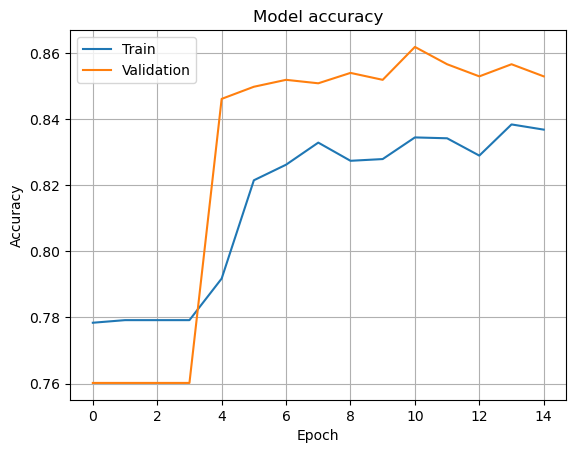

In [53]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()


Looking at the Training vs Validation Accuracy, we can say that the model performs well on both datasets giving an accuracy of around **85%**. 

This means that the model captures the underlying patterns quite well in our scenarios.

We will also look at the Classification report to better understand the accuracy of our model.

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
# Evaluate the model
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {accuracy}")

y_pred_probs = model.predict(test_dataset)
y_pred = (y_pred_probs > 0.5).astype(int)

print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))


1209/1209 [==============================] - 3s 3ms/step - loss: 0.6981 - accuracy: 0.4814
Test Accuracy: 0.481389582157135
1209/1209 [==============================] - 3s 2ms/step
              precision    recall  f1-score   support

           0       0.42      0.40      0.41      1100
           1       0.52      0.55      0.54      1318

    accuracy                           0.48      2418
   macro avg       0.47      0.47      0.47      2418
weighted avg       0.48      0.48      0.48      2418



The classification model shows an **overall accuracy of 48%** on the Test Dataset. It struggles significantly with class 0, achieving a **precision of 42%** and a low **recall of 40%**, resulting in an **F1-score of 0.41**. Conversely, the model performs better for class 1, with a **precision of 52%** and a **recall of 55%**, leading to an **F1-score of 0.54**. The macro average metrics reveal a considerable imbalance in performance between the two classes, indicating that the model favors class 1 at the expense of class 0.

## Conclusion

The models developed provide insightful predictions and recommendations for IPL player performance. The clustering model effectively segments players into meaningful groups, aiding in player selection and training focus. The neural network models for batsman and bowler performance predictions demonstrate robust predictive capabilities, offering valuable tools for match preparation and strategy development. Further improvements could include incorporating more granular match conditions and player fitness data to enhance model accuracy. Overall, this project showcases the potential of AI in transforming sports analytics and decision-making in cricket.

## References

https://www.tensorflow.org/tutorials/quickstart/beginner

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

https://www.kaggle.com/datasets/jhalls/ipl-dataset-2008-2022